## Strategy:
- Data Understanding
- Data Cleaning (Missing data imputation)
- EDA (Univariate--->Bivariate--->Heatmaps)
- Feature Engineering()
- Feature Selection (PCA)
- Model Development (Logistic Regression-->Dectsion Tree--->Random Forest---->GDB---->XGB---->Catboost....SVM)
- Model Evaluation  (Sensitivity,Precision,accuracy,AOC)
- Two Final Models.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
#opening the data:
data=pd.read_csv('/Users/rishismac/telecom-churn-case-study-hackathon-c58/train.csv')
print(data.info(verbose=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [3]:
#making a dictionary of the missing data percentage :
dict(data.isna().sum()/len(data)*100)

{'id': 0.0,
 'circle_id': 0.0,
 'loc_og_t2o_mou': 1.0028714695924228,
 'std_og_t2o_mou': 1.0028714695924228,
 'loc_ic_t2o_mou': 1.0028714695924228,
 'last_date_of_month_6': 0.0,
 'last_date_of_month_7': 0.570008142973471,
 'last_date_of_month_8': 1.0471578165402362,
 'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.0,
 'onnet_mou_6': 3.954342204888641,
 'onnet_mou_7': 3.8386262660895154,
 'onnet_mou_8': 5.2900755725081785,
 'offnet_mou_6': 3.954342204888641,
 'offnet_mou_7': 3.8386262660895154,
 'offnet_mou_8': 5.2900755725081785,
 'roam_ic_mou_6': 3.954342204888641,
 'roam_ic_mou_7': 3.8386262660895154,
 'roam_ic_mou_8': 5.2900755725081785,
 'roam_og_mou_6': 3.954342204888641,
 'roam_og_mou_7': 3.8386262660895154,
 'roam_og_mou_8': 5.2900755725081785,
 'loc_og_t2t_mou_6': 3.954342204888641,
 'loc_og_t2t_mou_7': 3.8386262660895154,
 'loc_og_t2t_mou_8': 5.2900755725081785,
 'loc_og_t2m_mou_6': 3.954342204888641,
 'loc_og_t2m_mou_7': 3.8386262660895154,
 'loc_og_t2m_mou_8': 5.2900755725081785

In [47]:
data[data['fb_user_6'].isna()]

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
5          5        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69991  69991        109             0.0             0.0             0.0   
69992  69992        109             0.0             0.0             0.0   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0                6/30/2014            7/31/2014            8/31/2014   31.277   
1                6/30/2014            7/31/2014            8/31/2014    0.000   
2                6/30/2014            7/31/2014            8/31/2014   60.806   
3                6/30/2014            7/31/2014            8/31/2014  156.362   
5                6/30/2014            7/31/2014            8/31/2014   86.193   
...                    ...                  ...                  ...      ...   
69991            6/30/2014            7/31/2014            8/31/2014    1.500   
69992            6/30/2014            7/31/2014            8/31/2014   71.875   
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   

        arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0       87.009  ...            0            0        NaN        NaN   
1      122.787  ...            0            0        NaN        1.0   
2      103.176  ...            0            0        NaN        NaN   
3      205.260  ...            0            0        NaN        NaN   
5       83.351  ...            0            0        NaN        NaN   
...        ...  ...          ...          ...        ...        ...   
69991  139.385  ...            0            0        NaN        NaN   
69992   27.362  ...            0            0        NaN        NaN   
69994  410.924  ...            1            0        NaN        1.0   
69995  289.129  ...            0            0        NaN        NaN   
69996  258.374  ...            0            0        NaN        NaN   

       fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0            NaN  1958        0.00         0.0         0.0                  0  
1            NaN   710        0.00         0.0         0.0                  0  
2            NaN   882        0.00         0.0         0.0                  0  
3            NaN   982        0.00         0.0         0.0                  0  
5            NaN   698        0.00         0.0         0.0                  0  
...          ...   ...         ...         ...         ...                ...  
69991        NaN   861       72.25         0.0         0.0                  0  
69992        NaN  1164        0.00         0.0       148.8                  0  
69994        1.0   221        0.00         0.0         0.0                  0  
69995        NaN   712        0.00         0.0         0.0                  0  
69996        NaN   879        0.00         0.0         0.0                  0  

[52431 rows x 172 columns]

## Checking the imbalance in the target variable:

In [4]:
#Checking the imbalance of data:
data['churn_probability'].sum()/len(data)*100

10.188716981671167

In [5]:
#creating a dataframe of 'isna' to understand the missing data better:
isna_df=pd.DataFrame(data.isna().sum()/len(data)*100)
isna_df=isna_df.sort_values(by=0,ascending=False)
isna_df=isna_df.reset_index()
isna_df.columns=['feature','percentage']




In [6]:
# Taking only those columns which have a missing data percentage less than 6 percent:
relevent_columns_df=isna_df[isna_df['percentage']<6]
imp_columns=list(relevent_columns_df['feature'])
imp_columns
data_refined_1=data[imp_columns]
pd.DataFrame(data_refined_1.isna().sum()/len(data)*100).head(60)


0
isd_og_mou_8      5.290076
std_ic_t2o_mou_8  5.290076
std_og_t2c_mou_8  5.290076
std_ic_t2f_mou_8  5.290076
std_og_mou_8      5.290076
std_ic_t2m_mou_8  5.290076
std_ic_mou_8      5.290076
std_ic_t2t_mou_8  5.290076
og_others_8       5.290076
spl_og_mou_8      5.290076
loc_ic_t2m_mou_8  5.290076
loc_ic_mou_8      5.290076
loc_ic_t2f_mou_8  5.290076
std_og_t2f_mou_8  5.290076
loc_og_t2c_mou_8  5.290076
ic_others_8       5.290076
loc_og_mou_8      5.290076
onnet_mou_8       5.290076
offnet_mou_8      5.290076
roam_ic_mou_8     5.290076
roam_og_mou_8     5.290076
loc_og_t2t_mou_8  5.290076
loc_og_t2m_mou_8  5.290076
loc_og_t2f_mou_8  5.290076
std_og_t2m_mou_8  5.290076
loc_ic_t2t_mou_8  5.290076
isd_ic_mou_8      5.290076
std_og_t2t_mou_8  5.290076
spl_ic_mou_8      5.290076
std_ic_t2m_mou_6  3.954342
std_ic_t2t_mou_6  3.954342
loc_ic_t2m_mou_6  3.954342
ic_others_6       3.954342
loc_ic_mou_6      3.954342
std_ic_t2f_mou_6  3.954342
isd_ic_mou_6      3.954342
std_ic_mou_6      3.954342
spl_ic_mou_6      3.954342
std_ic_t2o_mou_6  3.954342
loc_ic_t2f_mou_6  3.954342
isd_og_mou_6      3.954342
std_og_t2m_mou_6  3.954342
std_og_t2f_mou_6  3.954342
loc_og_mou_6      3.954342
loc_og_t2c_mou_6  3.954342
std_og_t2c_mou_6  3.954342
loc_og_t2f_mou_6  3.954342
loc_og_t2m_mou_6  3.954342
std_og_mou_6      3.954342
loc_og_t2t_mou_6  3.954342
std_og_t2t_mou_6  3.954342
loc_ic_t2t_mou_6  3.954342
spl_og_mou_6      3.954342
onnet_mou_6       3.954342
roam_ic_mou_6     3.954342
og_others_6       3.954342
roam_og_mou_6     3.954342
offnet_mou_6      3.954342
roam_og_mou_7     3.838626
ic_others_7       3.838626

In [7]:
# Extracting the numerical variables:
num_variables=[x for x in data_refined_1.columns if data_refined_1[x].dtype!='O']
other_variables=[x for x in data_refined_1.columns if data_refined_1[x].dtype=='O']
other_variables

['date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'last_date_of_month_6']

### As can be seen most of the non numerical features are date columns. Hence i have imputed them to 'recency' to have them as numerical variables too.

In [8]:
# Converting the dates to recency and finally converting them to numerical variables:
import datetime as dt
for i in other_variables:
    data_refined_1[i]=pd.to_datetime(data_refined_1[i],format='%m/%d/%Y')
    
    data_refined_1['recency_'+i]=data_refined_1[i].max()-data_refined_1[i]
    data_refined_1['recency_'+i]=data_refined_1['recency_'+i].dt.days
    data_refined_1=data_refined_1.drop(i,axis=1)

    


In [9]:
# Checking the statistics of the data and finding the columns which do not have any variance or std:
data_refined_1.describe()

isd_og_mou_8  std_ic_t2o_mou_8  std_og_t2c_mou_8  std_ic_t2f_mou_8  \
count  66296.000000           66296.0           66296.0      66296.000000   
mean       0.841648               0.0               0.0          2.075179   
std       29.563367               0.0               0.0         15.865403   
min        0.000000               0.0               0.0          0.000000   
25%        0.000000               0.0               0.0          0.000000   
50%        0.000000               0.0               0.0          0.000000   
75%        0.000000               0.0               0.0          0.000000   
max     5681.540000               0.0               0.0       1394.890000   

       std_og_mou_8  std_ic_t2m_mou_8  std_ic_mou_8  std_ic_t2t_mou_8  \
count  66296.000000      66296.000000  66296.000000      66296.000000   
mean     175.118852         21.089042     33.077030          9.910217   
std      410.697098         81.534344    108.469864         54.248186   
min        0.000000          0.000000      0.000000          0.000000   
25%        0.000000          0.000000      0.030000          0.000000   
50%       10.505000          2.030000      5.830000          0.000000   
75%      149.015000         15.310000     27.615000          4.052500   
max    13980.060000       5512.760000   5658.740000       3930.240000   

        og_others_8  spl_og_mou_8  ...   vol_2g_mb_6   vol_2g_mb_7  \
count  66296.000000  66296.000000  ...  69999.000000  69999.000000   
mean       0.033059      5.045027  ...     51.773924     51.240204   
std        2.232547     17.708507  ...    212.513909    211.114667   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        0.000000      0.000000  ...      0.000000      0.000000   
50%        0.000000      0.000000  ...      0.000000      0.000000   
75%        0.000000      4.002500  ...      0.000000      0.000000   
max      394.930000   1075.080000  ...  10285.900000   7873.550000   

        vol_2g_mb_8  churn_probability  recency_date_of_last_rech_8  \
count  69999.000000       69999.000000                 67538.000000   
mean      50.127506           0.101887                     5.558012   
std      213.101403           0.302502                     6.108002   
min        0.000000           0.000000                     0.000000   
25%        0.000000           0.000000                     1.000000   
50%        0.000000           0.000000                     4.000000   
75%        0.000000           0.000000                     7.000000   
max    11117.610000           1.000000                    30.000000   

       recency_date_of_last_rech_7  recency_date_of_last_rech_6  \
count                 68765.000000                 68898.000000   
mean                      5.494292                     5.871869   
std                       5.765762                     6.134773   
min                       0.000000                     0.000000   
25%                       1.000000                     1.000000   
50%                       4.000000                     3.000000   
75%                       8.000000                     9.000000   
max                      30.000000                    29.000000   

       recency_last_date_of_month_8  recency_last_date_of_month_7  \
count                       69266.0                       69600.0   
mean                            0.0                           0.0   
std                             0.0                           0.0   
min                             0.0                           0.0   
25%                             0.0                           0.0   
50%                             0.0                           0.0   
75%                             0.0                           0.0   
max                             0.0                           0.0   

       recency_last_date_of_month_6  
count                       69999.0  
mean                            0.0  
std                             0.0  
min   

In [10]:
# Removing the columns which do not have any variance:
cols=data_refined_1.describe().columns
cols=cols[(np.array(data_refined_1.describe()['std':])!=0)[0]]
data_final=data_refined_1[cols]

In [11]:
# Having a final look at the info of the data:
data_final.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 129 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    isd_og_mou_8                 float64
 1    std_ic_t2f_mou_8             float64
 2    std_og_mou_8                 float64
 3    std_ic_t2m_mou_8             float64
 4    std_ic_mou_8                 float64
 5    std_ic_t2t_mou_8             float64
 6    og_others_8                  float64
 7    spl_og_mou_8                 float64
 8    loc_ic_t2m_mou_8             float64
 9    loc_ic_mou_8                 float64
 10   loc_ic_t2f_mou_8             float64
 11   std_og_t2f_mou_8             float64
 12   loc_og_t2c_mou_8             float64
 13   ic_others_8                  float64
 14   loc_og_mou_8                 float64
 15   onnet_mou_8                  float64
 16   offnet_mou_8                 float64
 17   roam_ic_mou_8                float64
 18   roam_og_mou_8           

## Data Imputation and Scaling:

In [12]:
# Using SimpleImputer to impute the data with median values:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
arr=imputer.fit_transform(data_final)


# Scaling the data:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
arr_scaled=scaler.fit_transform(arr)
df=pd.DataFrame(arr_scaled)
df.columns=data_final.columns

# All the columns are now numeric columns:
num_variables=list(df.columns)
num_variables

['isd_og_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'std_ic_t2t_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'ic_others_8',
 'loc_og_mou_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'isd_ic_mou_8',
 'std_og_t2t_mou_8',
 'spl_ic_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'ic_others_6',
 'loc_ic_mou_6',
 'std_ic_t2f_mou_6',
 'isd_ic_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'isd_og_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'loc_og_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'std_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2t_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_6',
 'onnet_mou_6',
 'roam_ic_mou_6',
 'og_others_6',
 'roam_og_mou_6

In [13]:
np.percentile(df['recency_date_of_last_rech_7'],20)

0.03333333333333333

In [14]:
def outlier_removal(arr,k):
    upper_limit=np.percentile(arr,80)
    lower_limit=np.percentile(arr,20)
    iqr=upper_limit-lower_limit
    arr=df[(arr>lower_limit-k*iqr) and (arr<upper_limit+k*iqr)]
    return arr

In [15]:
df.describe()

isd_og_mou_8  std_ic_t2f_mou_8  std_og_mou_8  std_ic_t2m_mou_8  \
count  69999.000000      69999.000000  69999.000000      69999.000000   
mean       0.000140          0.001409      0.011903          0.003643   
std        0.005064          0.011074      0.028711          0.014414   
min        0.000000          0.000000      0.000000          0.000000   
25%        0.000000          0.000000      0.000000          0.000000   
50%        0.000000          0.000000      0.000751          0.000368   
75%        0.000000          0.000000      0.009347          0.002532   
max        1.000000          1.000000      1.000000          1.000000   

       std_ic_mou_8  std_ic_t2t_mou_8   og_others_8  spl_og_mou_8  \
count  69999.000000      69999.000000  69999.000000  69999.000000   
mean       0.005591          0.002388      0.000079      0.004444   
std        0.018686          0.013445      0.005501      0.016065   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000034          0.000000      0.000000      0.000000   
50%        0.001030          0.000000      0.000000      0.000000   
75%        0.004508          0.000873      0.000000      0.003293   
max        1.000000          1.000000      1.000000      1.000000   

       loc_ic_t2m_mou_8  loc_ic_mou_8  ...  last_day_rch_amt_6  \
count      69999.000000  69999.000000  ...        69999.000000   
mean           0.016817      0.015075  ...            0.015817   
std            0.025844      0.022452  ...            0.024428   
min            0.000000      0.000000  ...            0.000000   
25%            0.003296      0.003275  ...            0.000000   
50%            0.009278      0.008669  ...            0.007481   
75%            0.020369      0.018282  ...            0.027431   
max            1.000000      1.000000  ...            1.000000   

       last_day_rch_amt_7  last_day_rch_amt_8   vol_2g_mb_6   vol_2g_mb_7  \
count        69999.000000        69999.000000  69999.000000  69999.000000   
mean             0.019127            0.014046      0.005033      0.006508   
std              0.030784            0.022926      0.020661      0.026813   
min              0.000000            0.000000      0.000000      0.000000   
25%              0.000000            0.000000      0.000000      0.000000   
50%              0.009677            0.006743      0.000000      0.000000   
75%              0.035484            0.029220      0.000000      0.000000   
max              1.000000            1.000000      1.000000      1.000000   

        vol_2g_mb_8  churn_probability  recency_date_of_last_rech_8  \
count  69999.000000       69999.000000                 69999.000000   
mean       0.004509           0.101887                     0.183441   
std        0.019168           0.302502                     0.200218   
min        0.000000           0.000000                     0.000000   
25%        0.000000           0.000000                     0.033333   
50%        0.000000           0.000000                     0.133333   
75%        0.000000           0.000000                     0.233333   
max        1.000000           1.000000                     1.000000   

       recency_date_of_last_rech_7  recency_date_of_last_rech_6  
count                 69999.000000                 69999.000000  
mean                      0.182265                     0.200921  
std                       0.190603                     0.210235  
min                       0.000000                     0.000000  
25%                       0.033333                     0.034483  
50%                       0.133333                     0.103448  
75%                       0.266667                     0.310345  
max                       1.000000                     1.000000  

[8 rows x 129 columns]

## EDA

### Univariate Analysis:

In [16]:
for i in num_variables:
    arr=np.array(df[i])
    uq=np.percentile(arr,75)
    lq=np.percentile(arr,25)
    iqr=uq-lq
    ul=uq+(3*iqr)
    ll=lq-(3*iqr)
    grouped_df=df[(df[i]<ul) & (df[i]>ll)]
    sns.boxplot(grouped_df[i])
    plt.show()

KeyError: 0

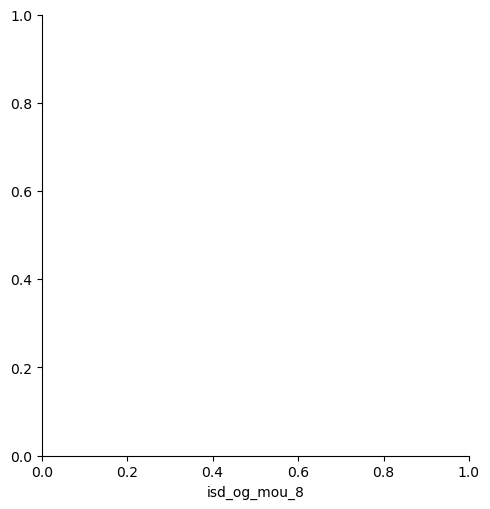

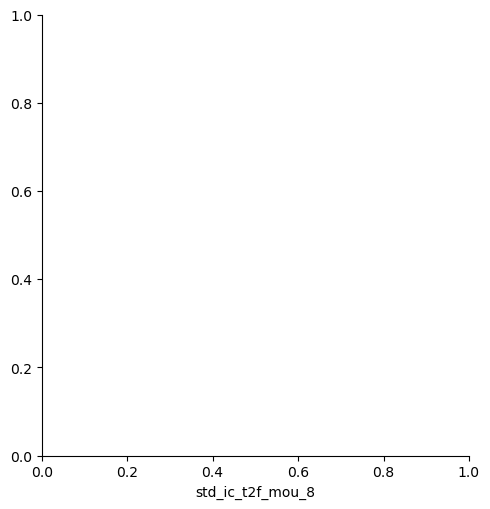

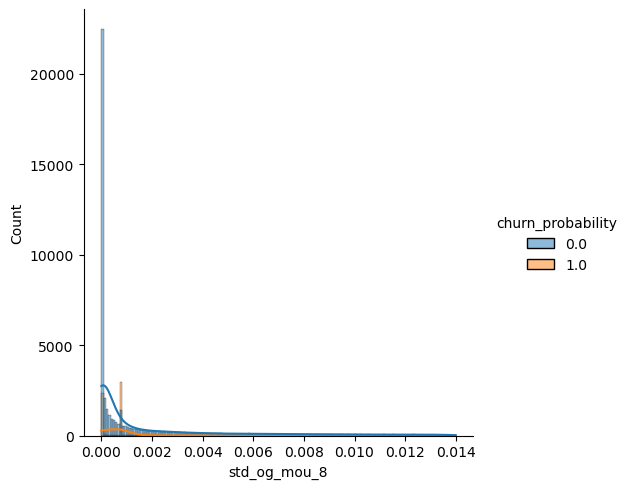

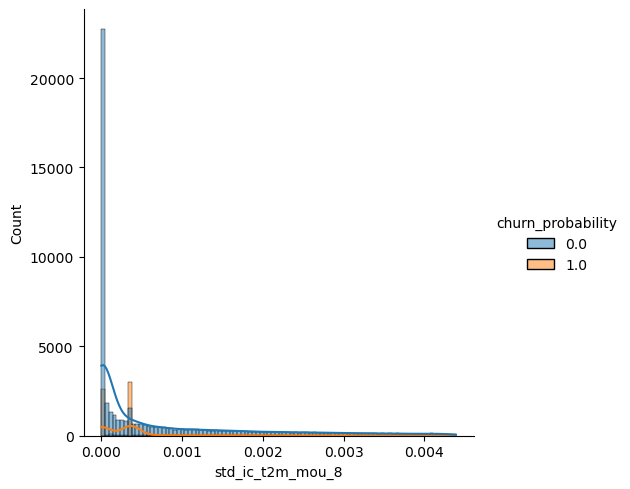

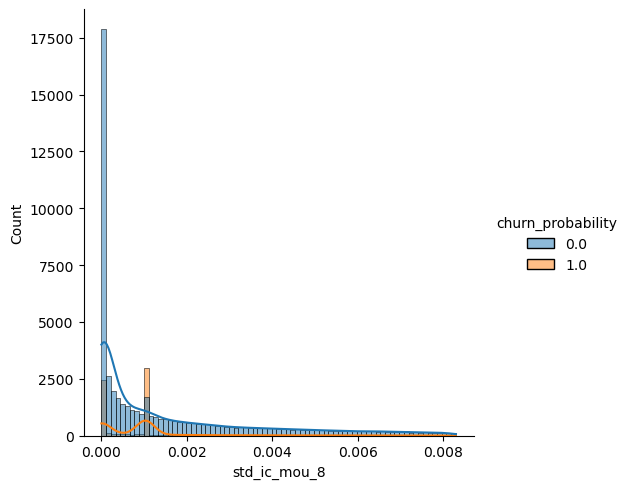

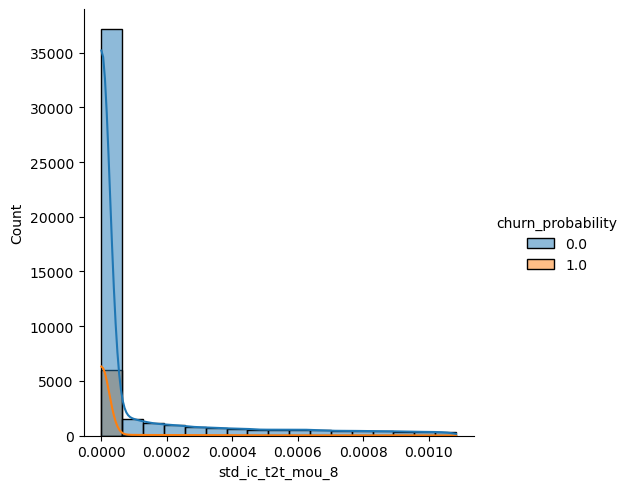

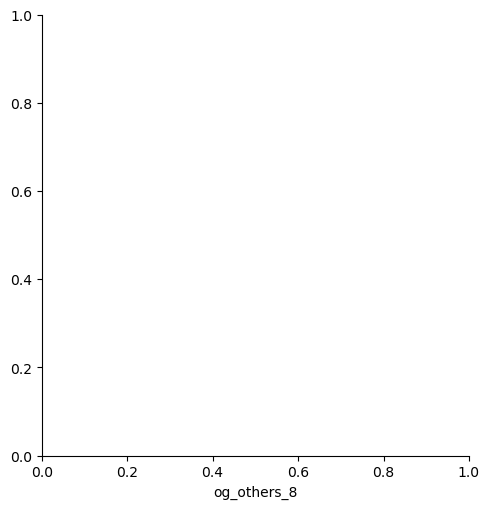

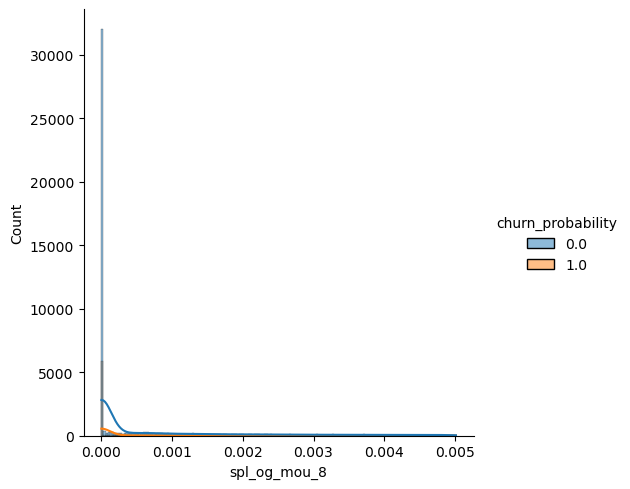

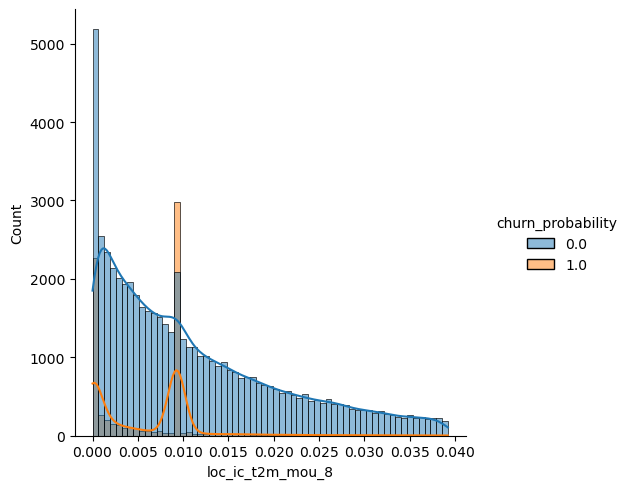

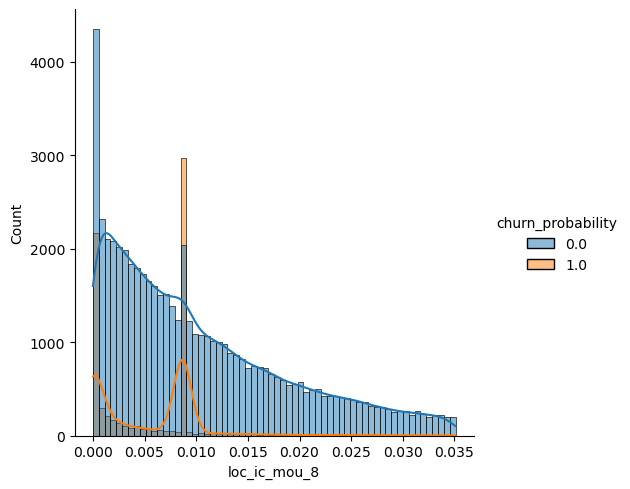

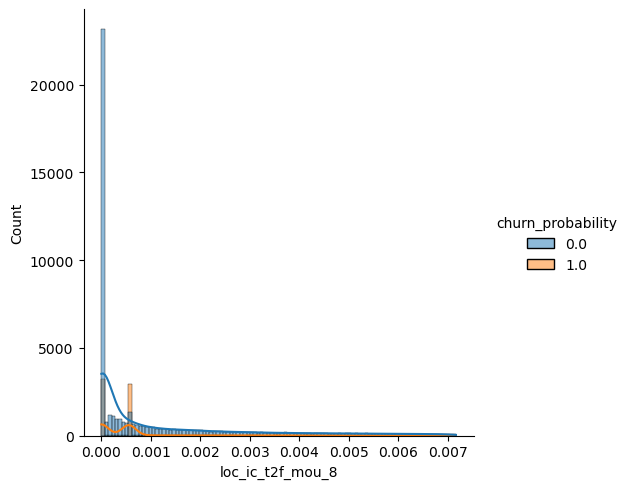

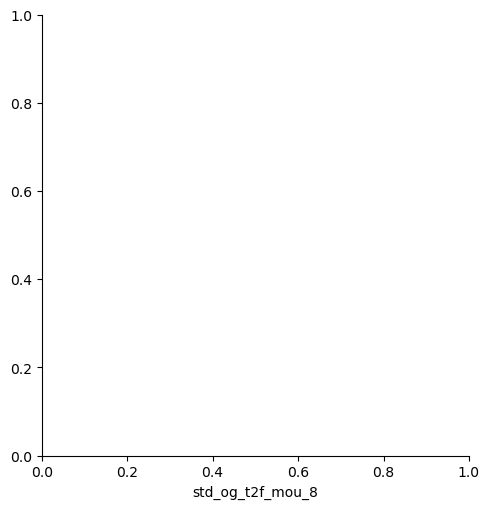

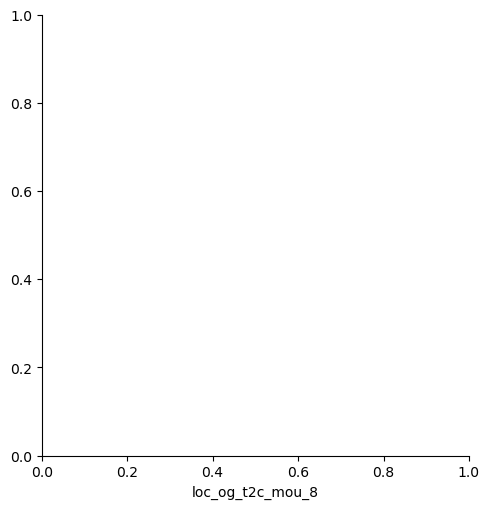

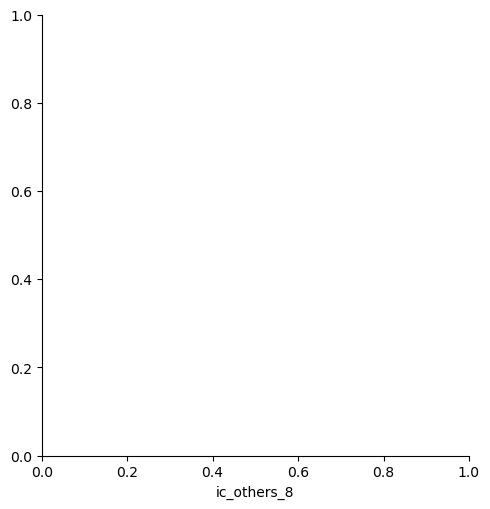

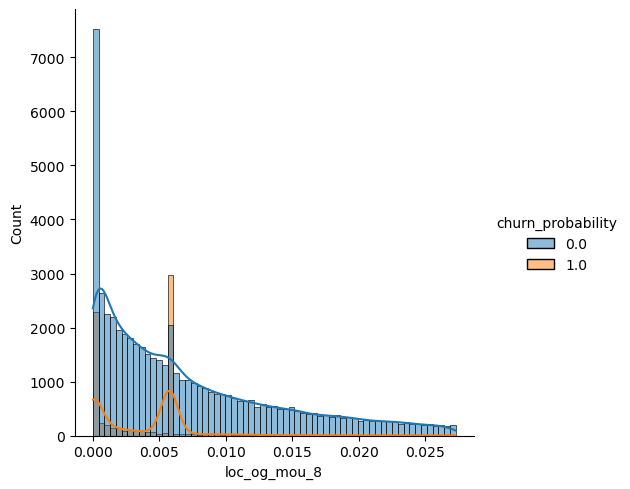

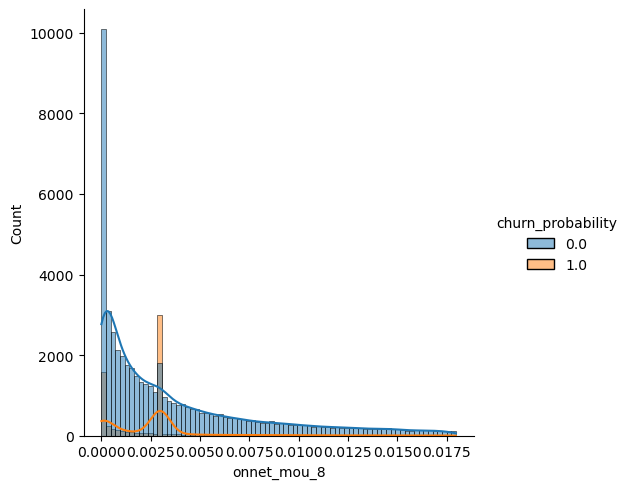

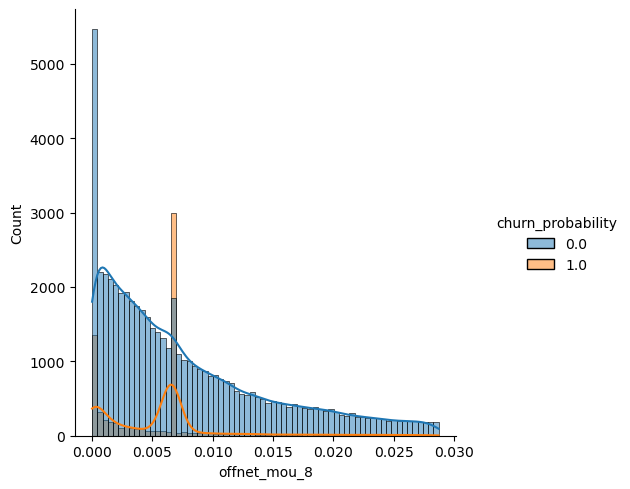

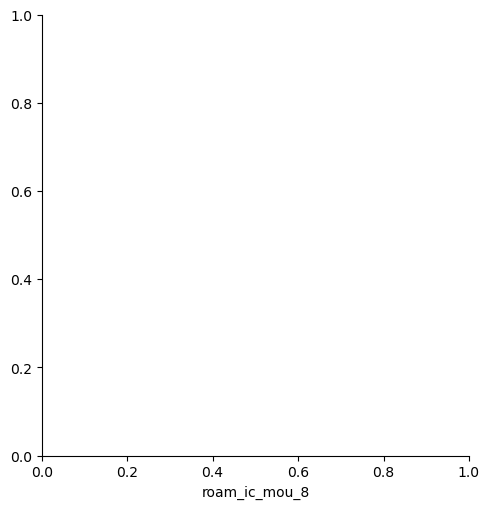

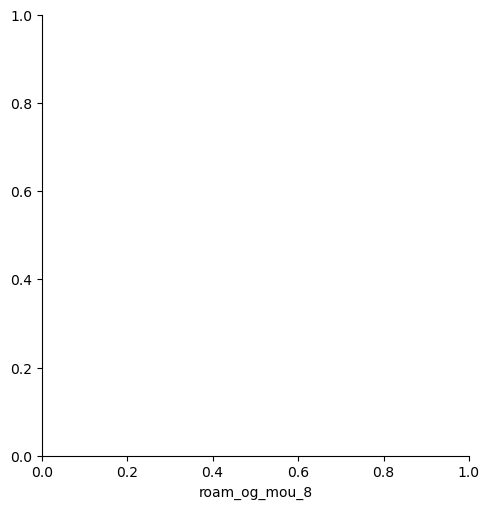

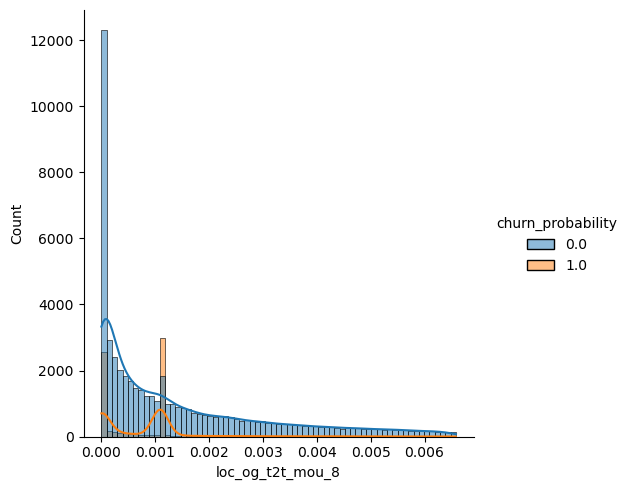

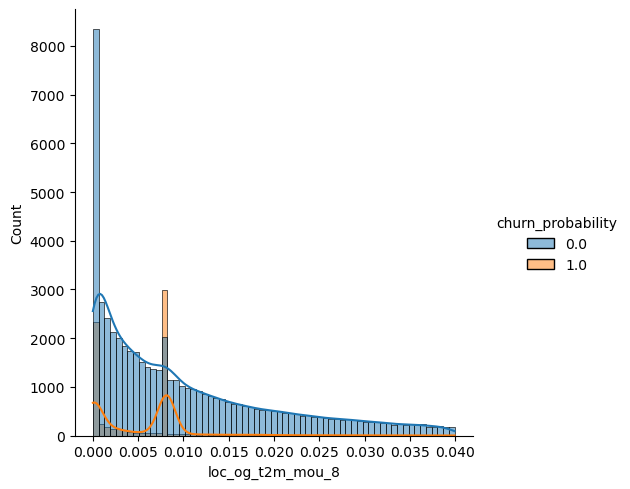

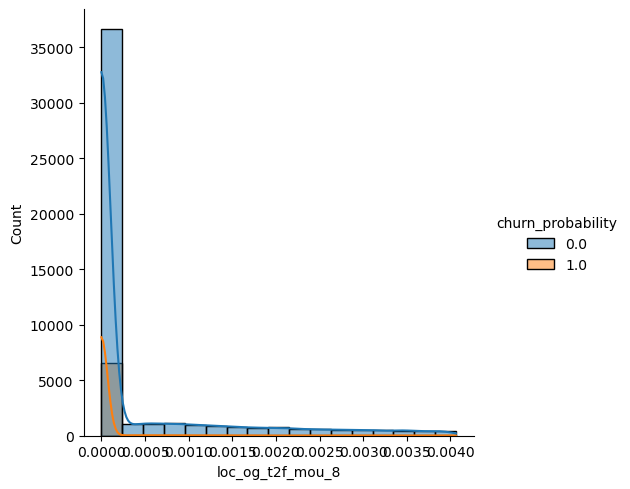

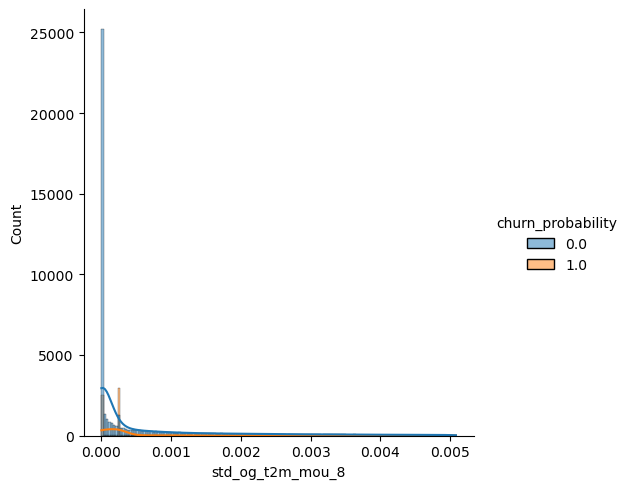

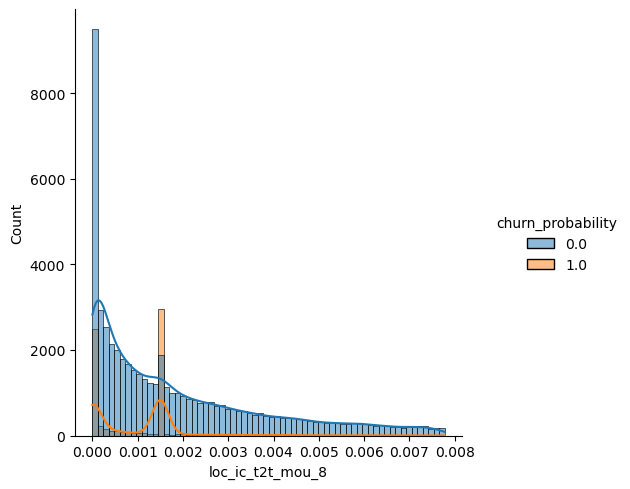

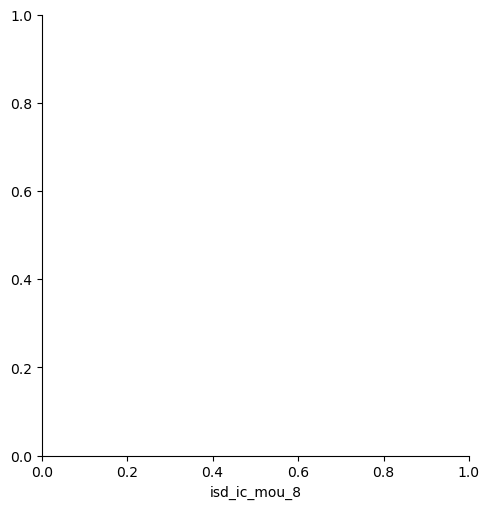

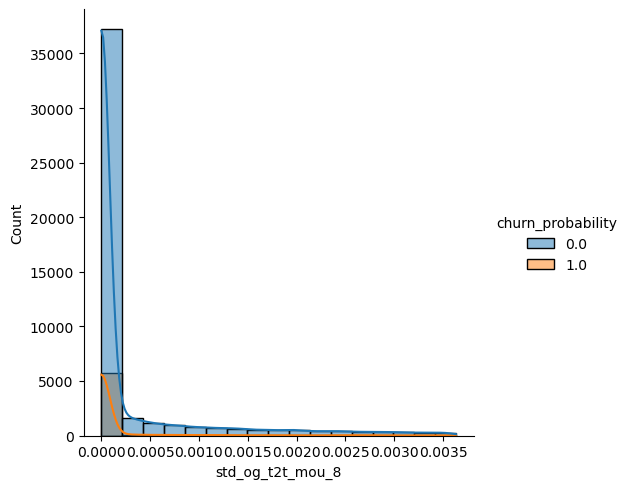

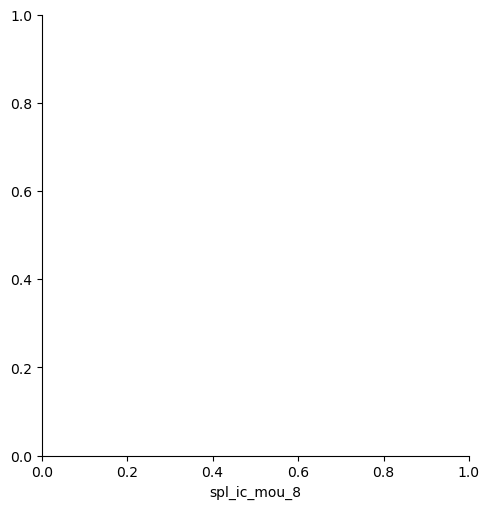

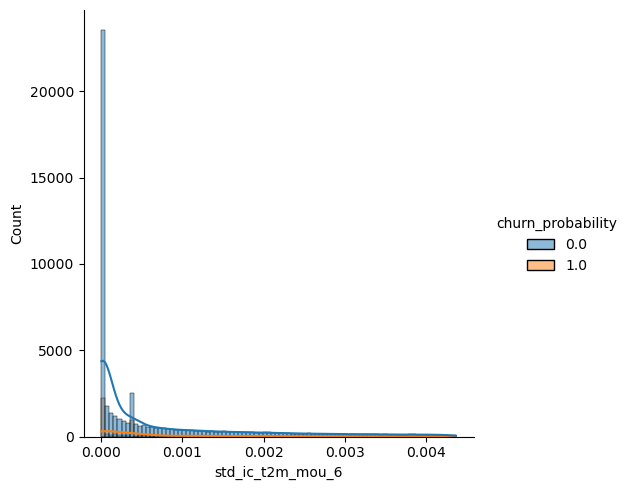

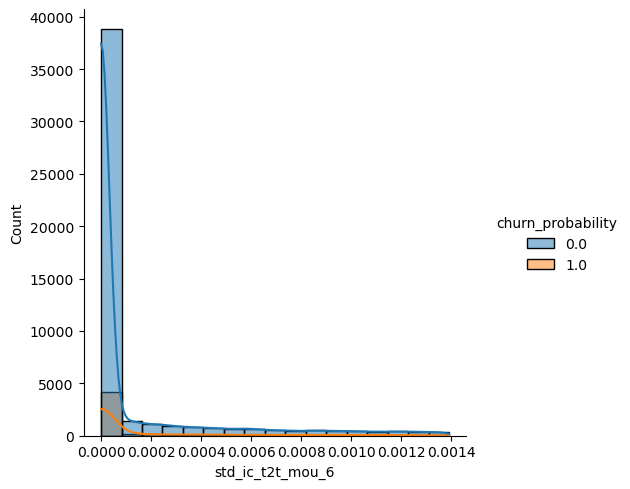

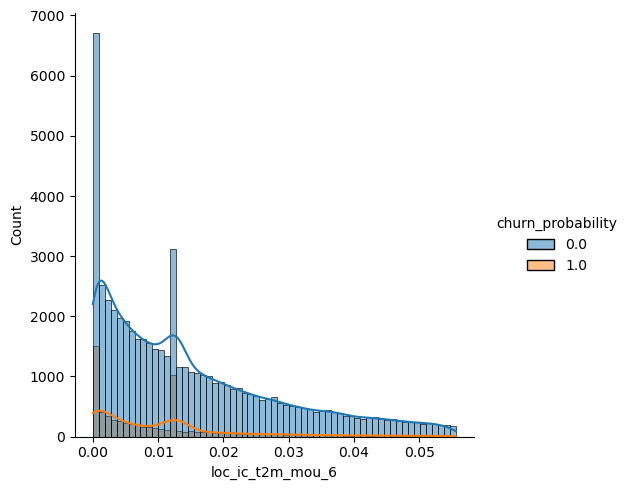

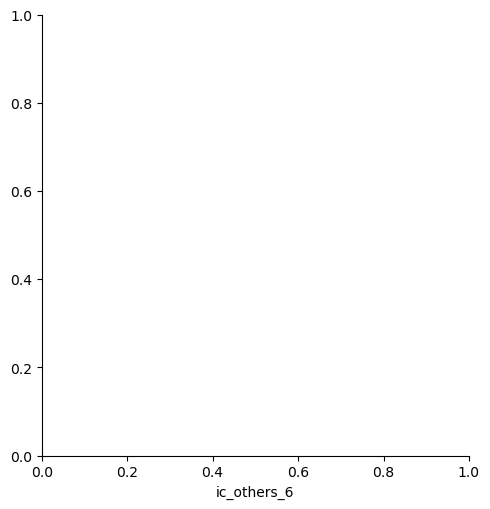

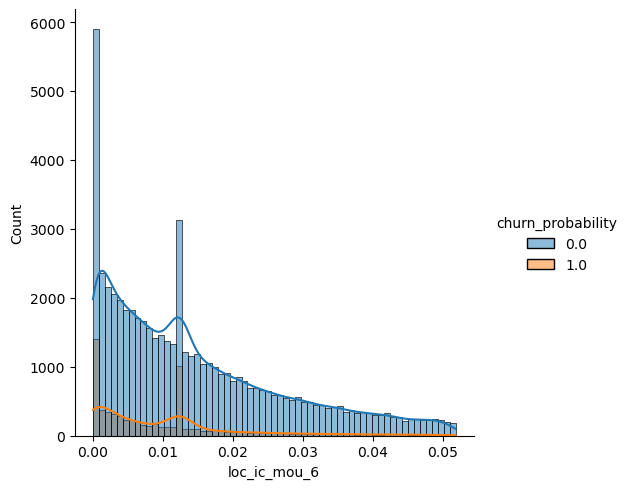

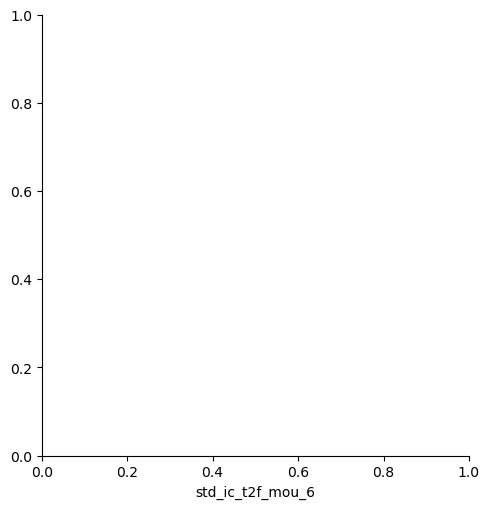

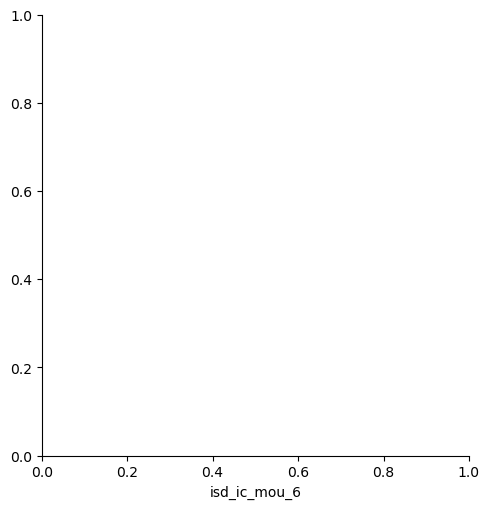

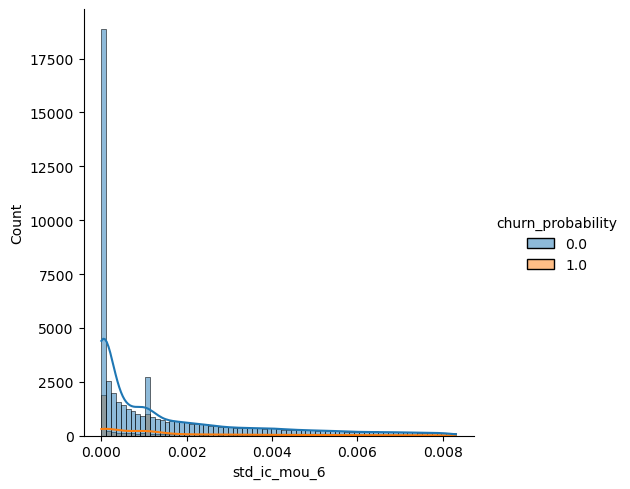

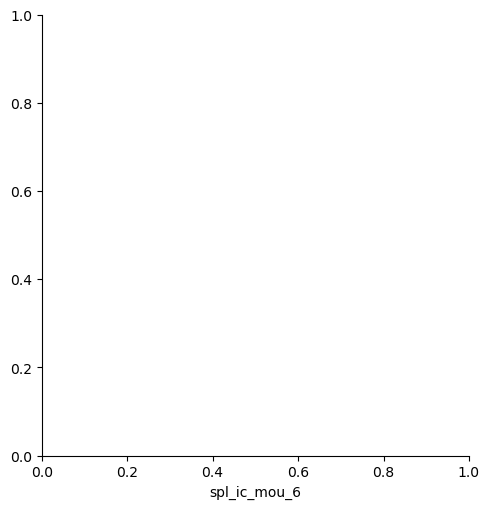

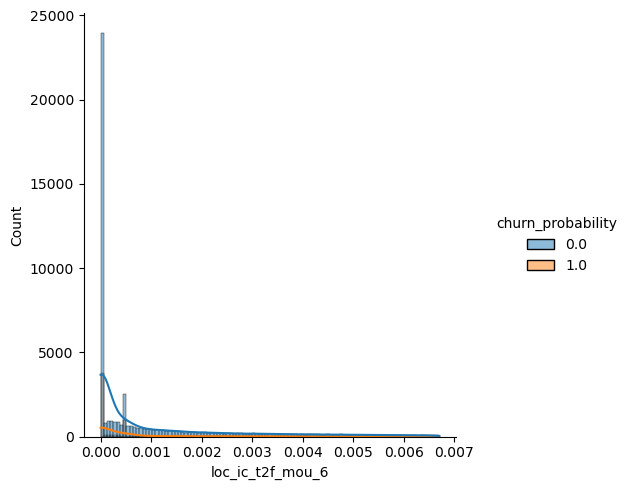

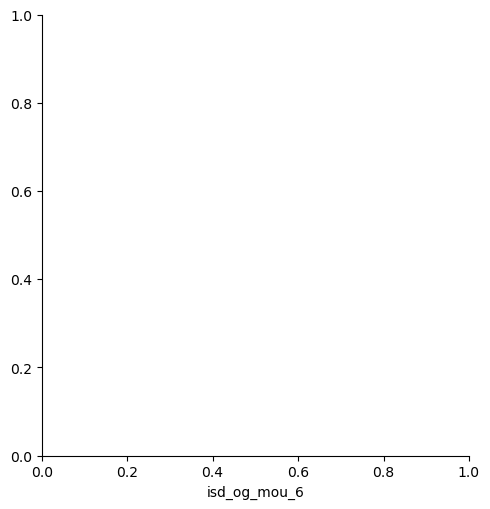

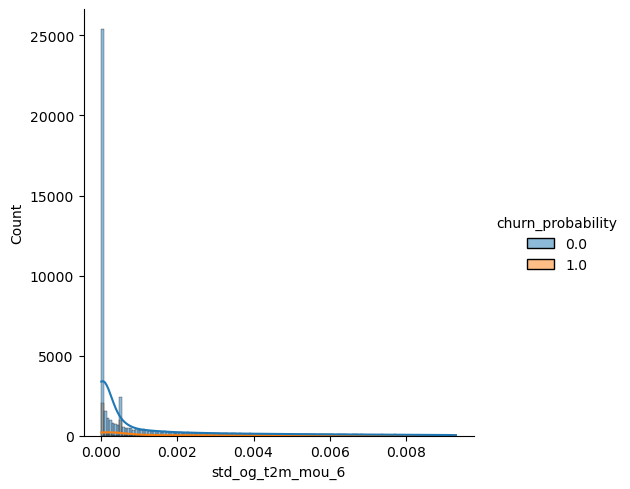

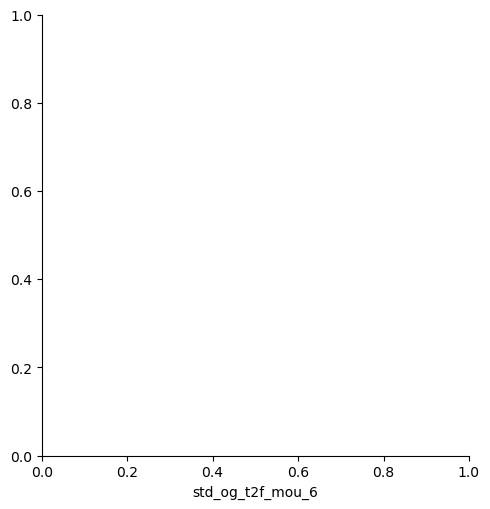

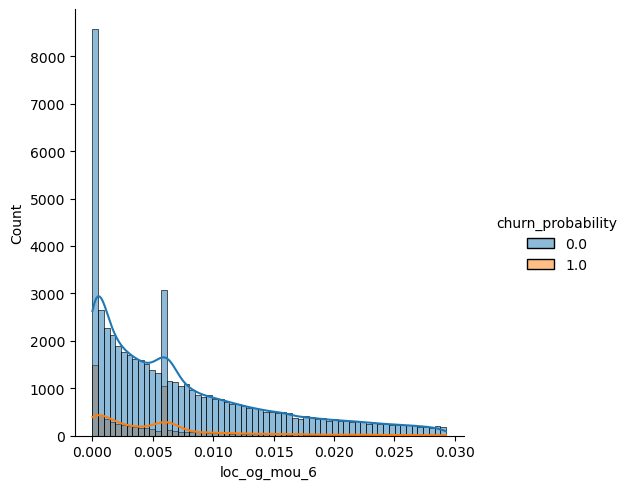

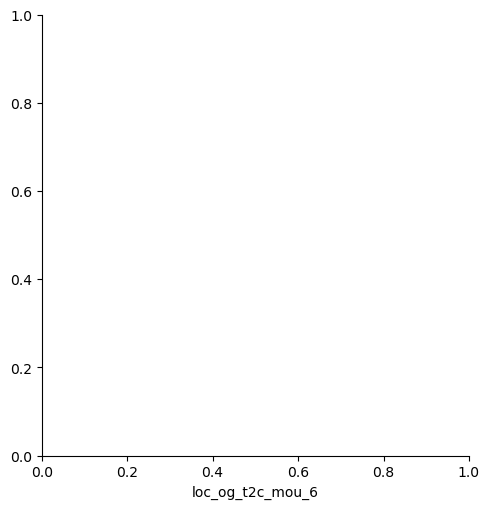

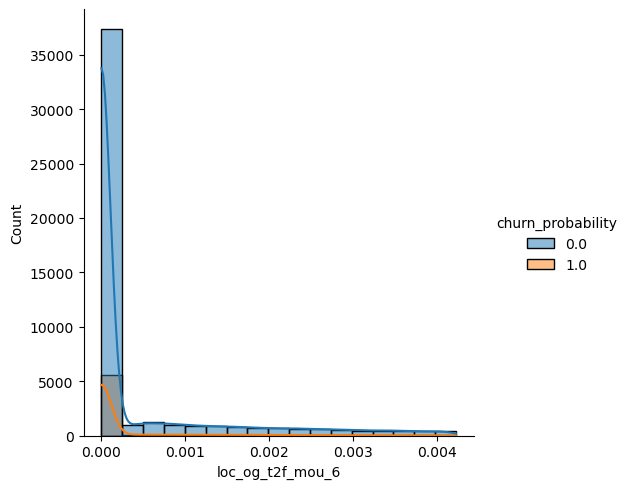

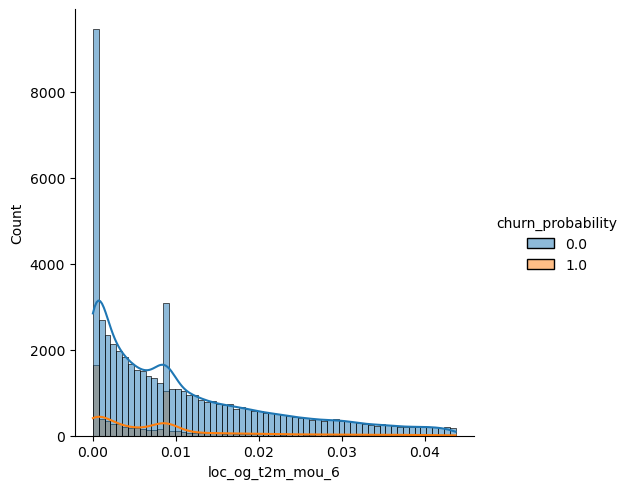

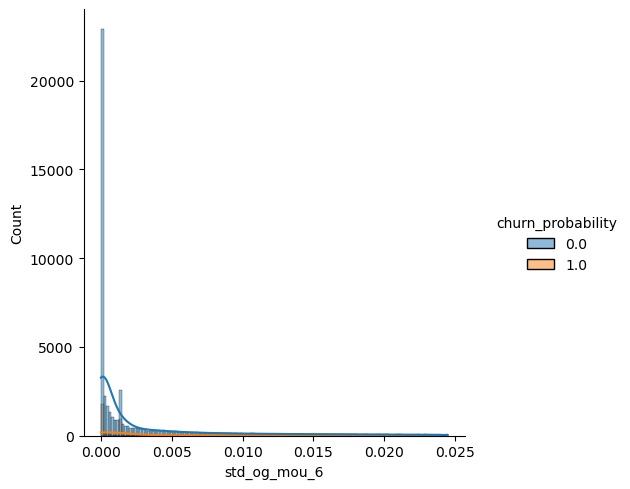

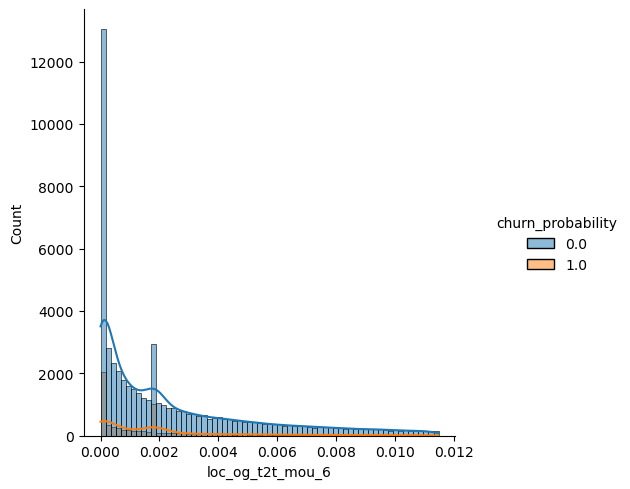

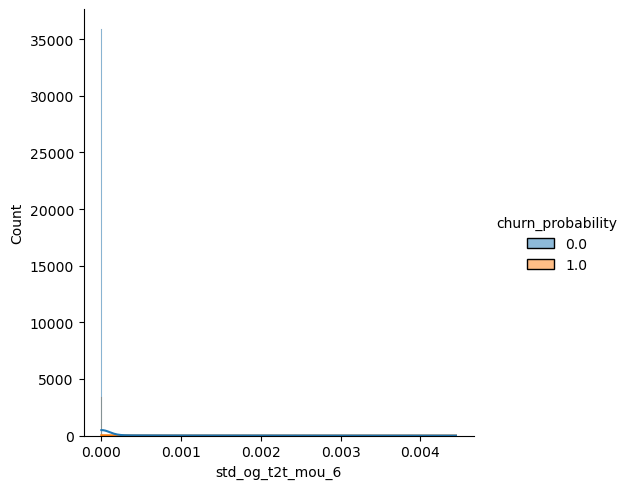

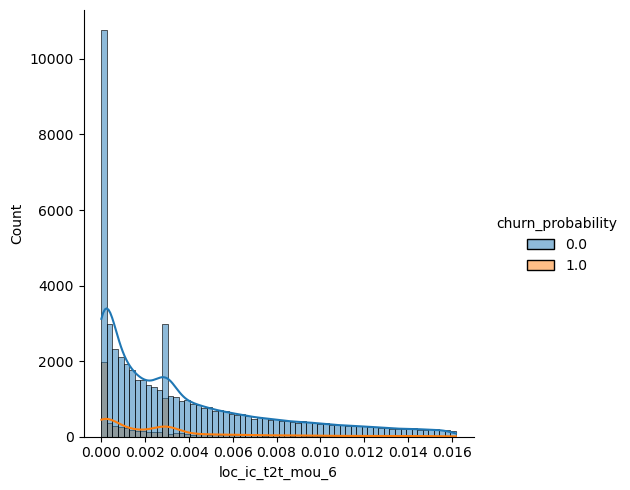

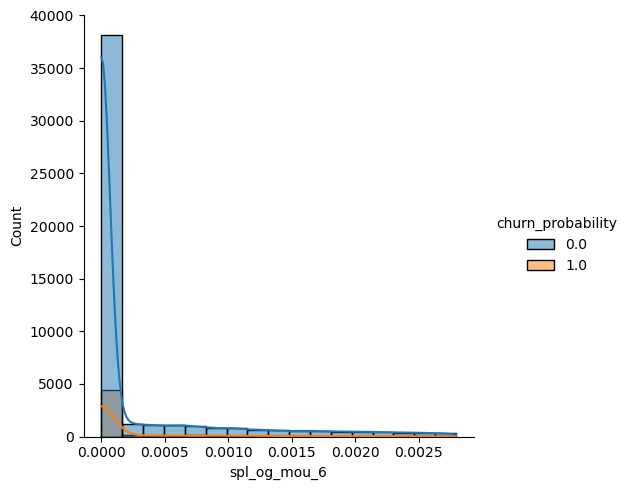

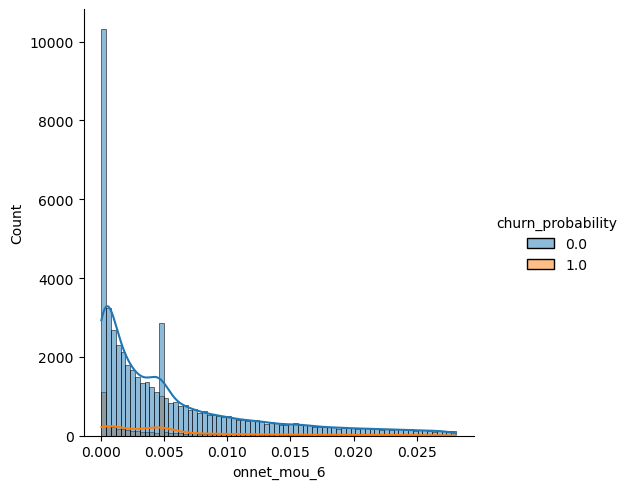

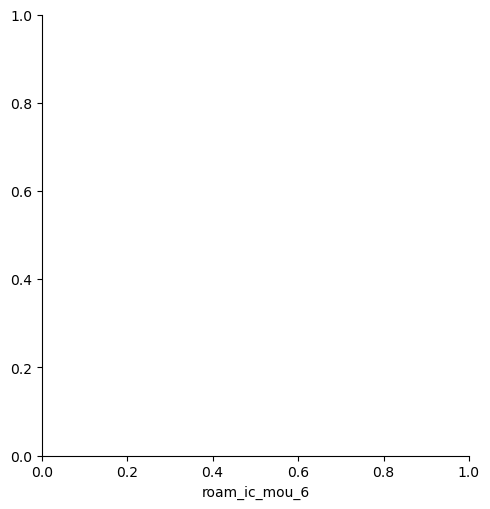

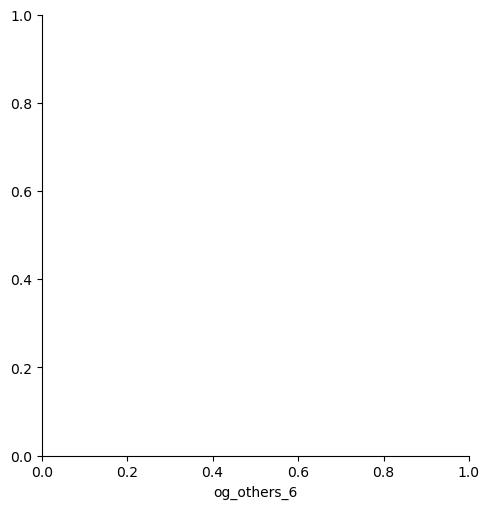

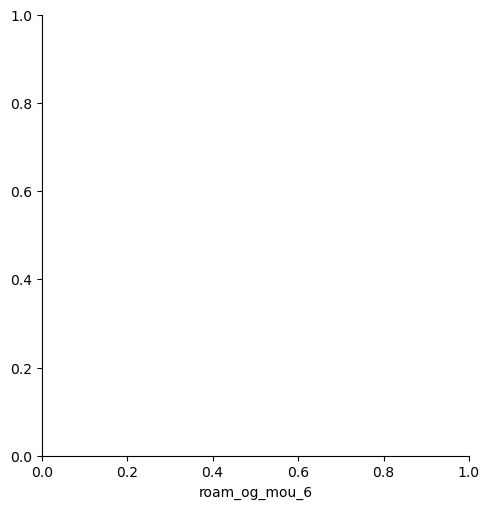

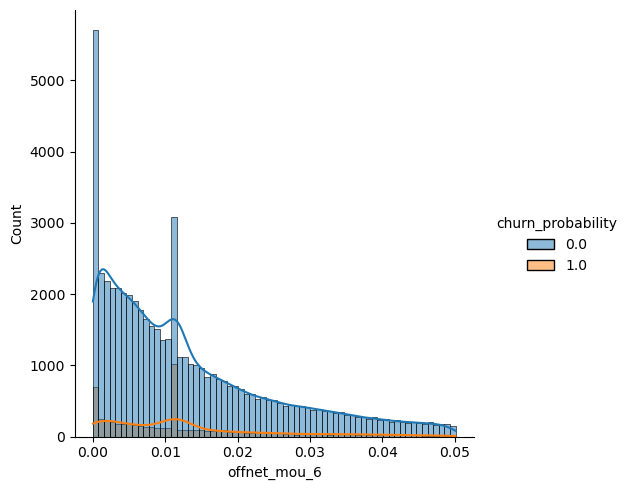

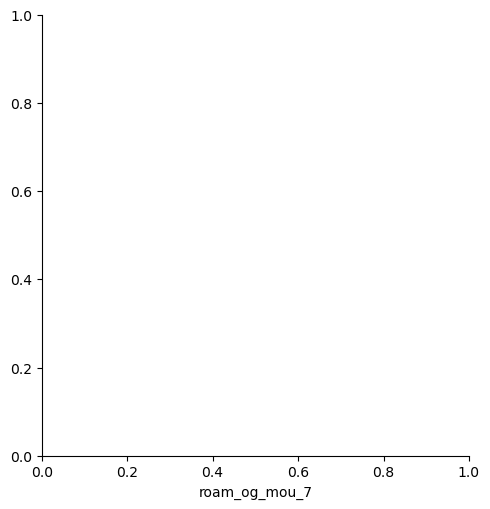

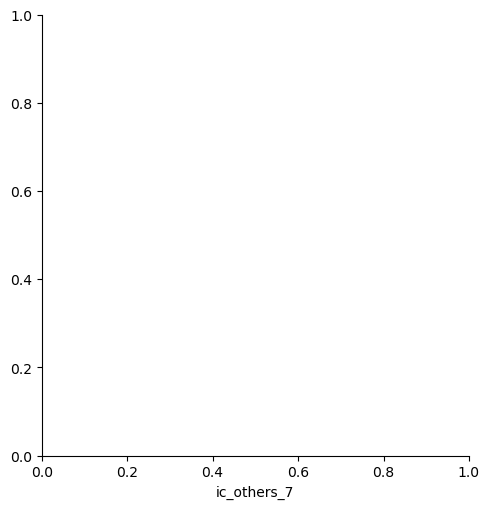

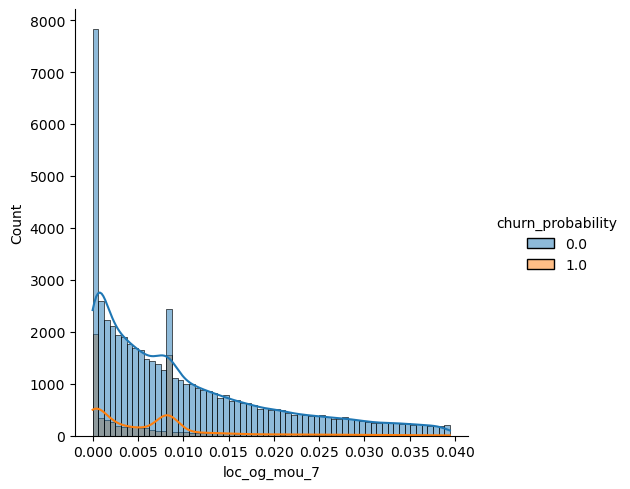

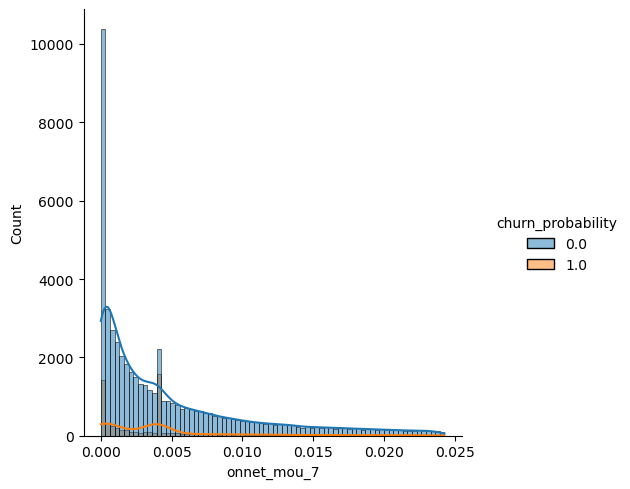

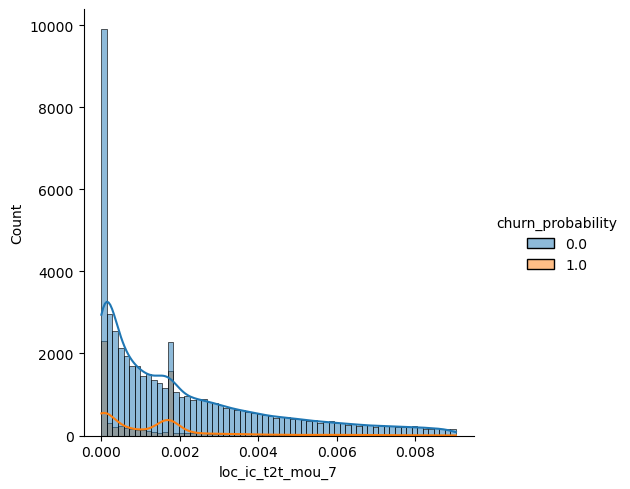

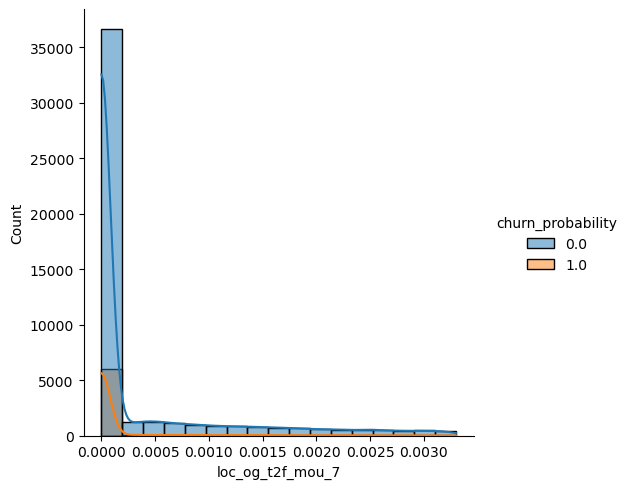

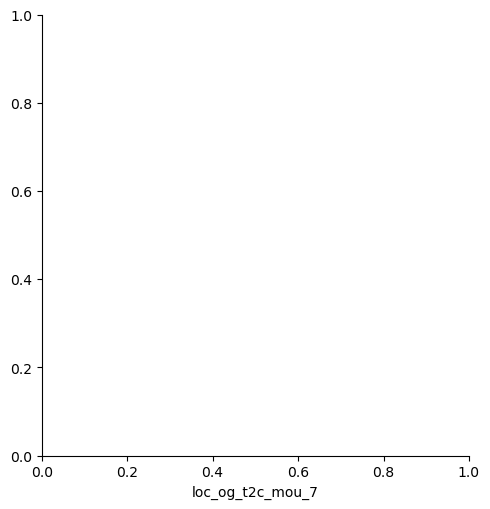

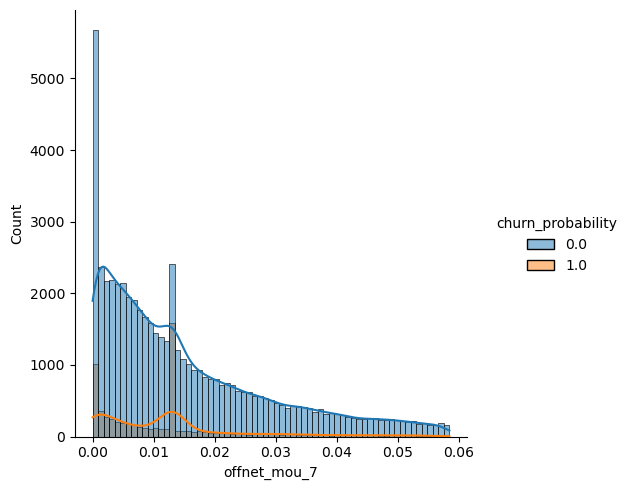

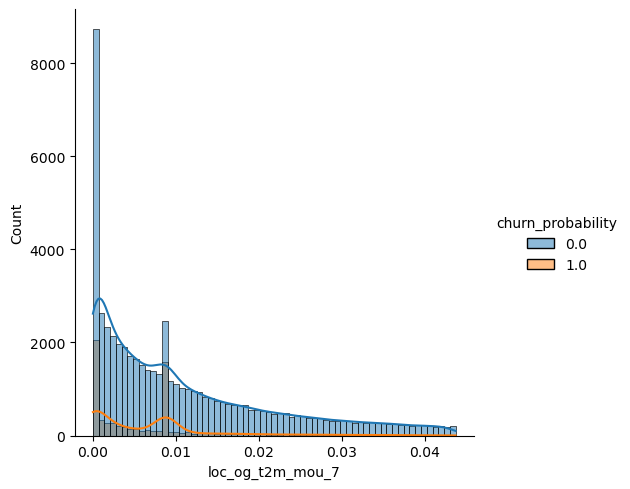

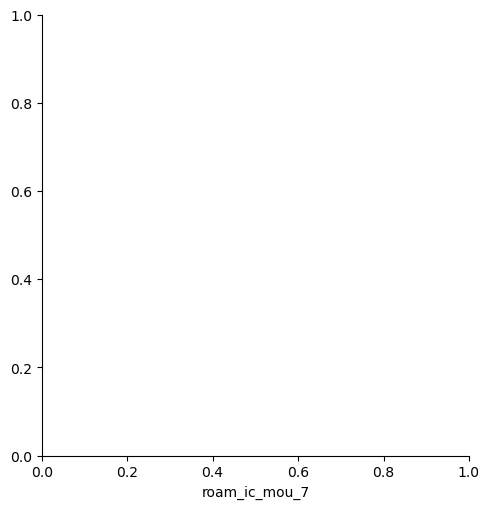

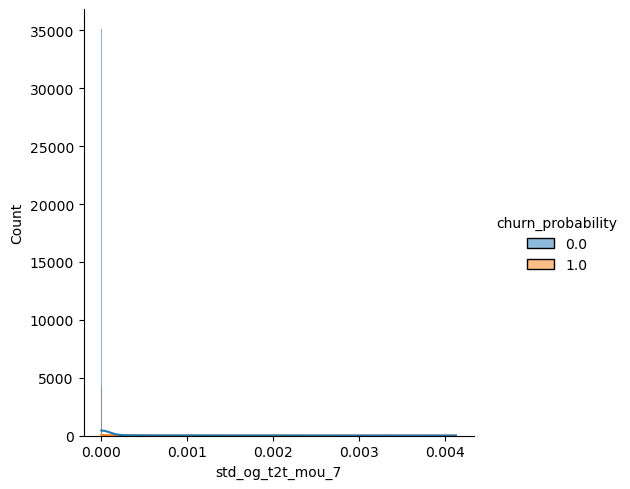

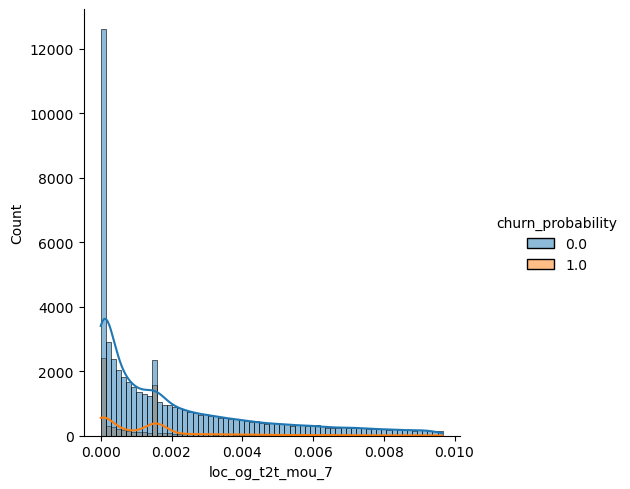

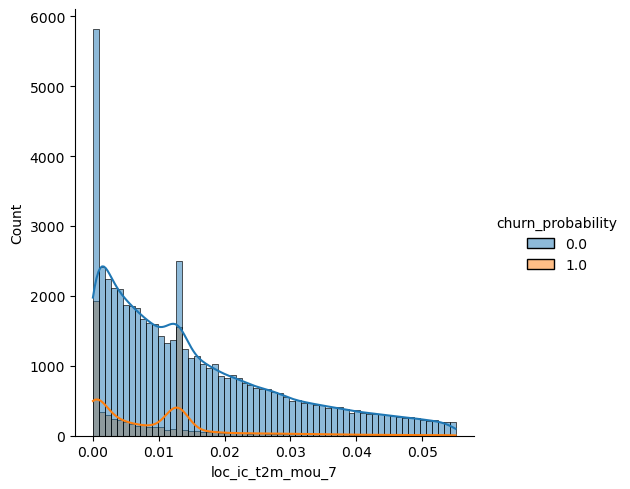

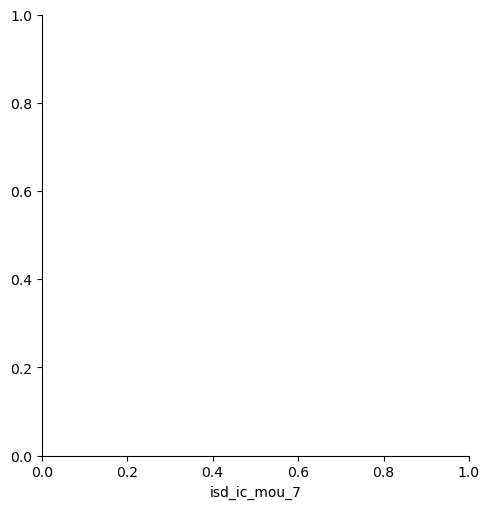

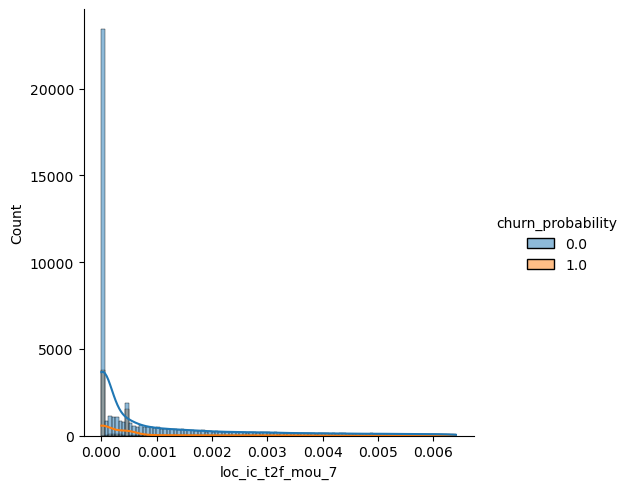

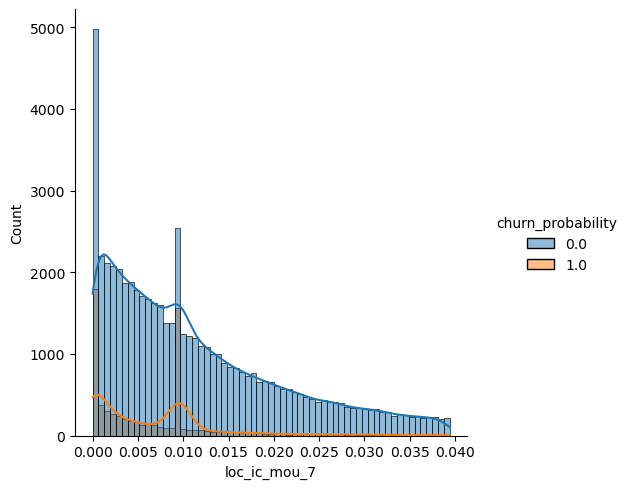

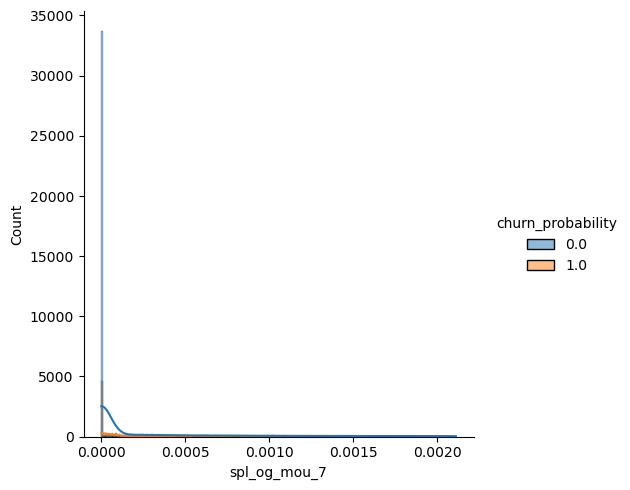

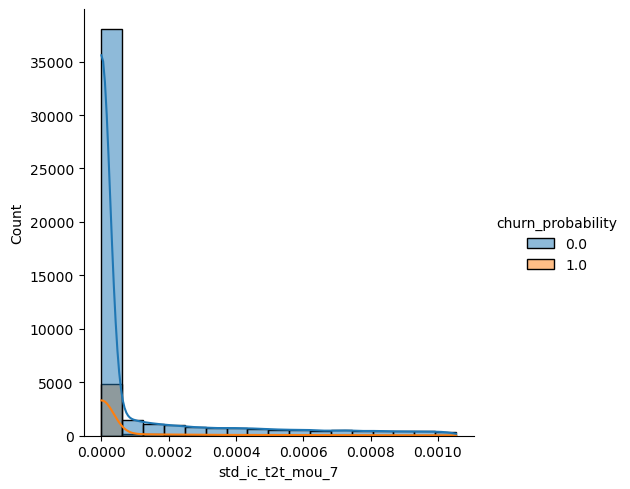

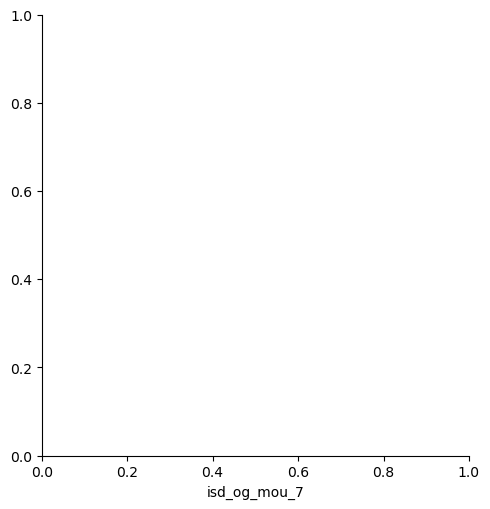

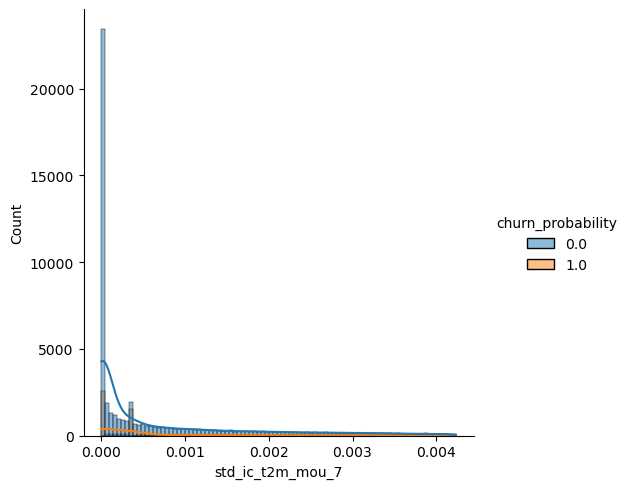

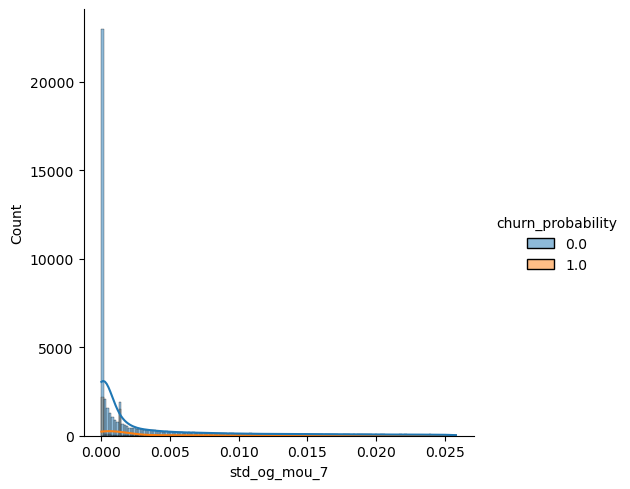

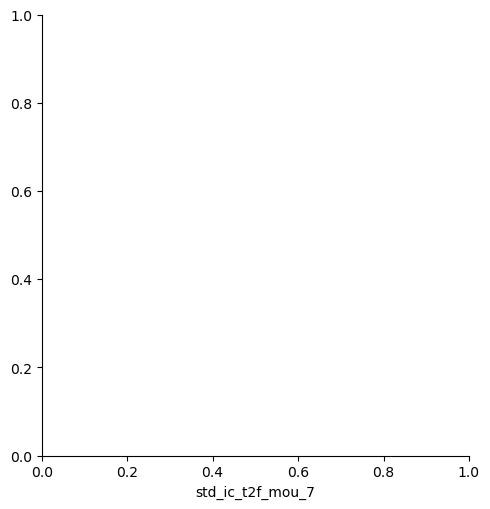

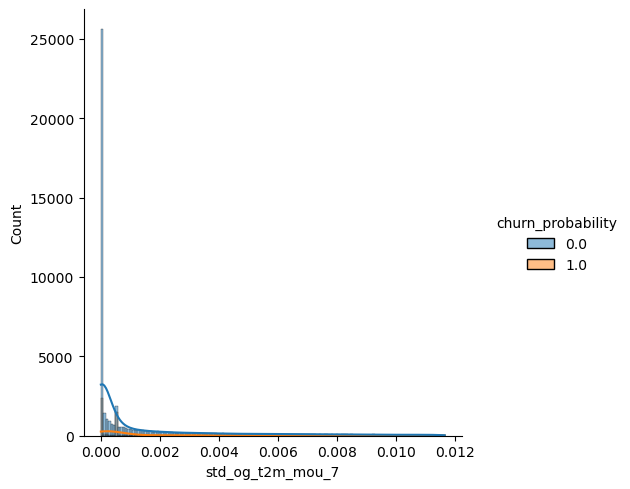

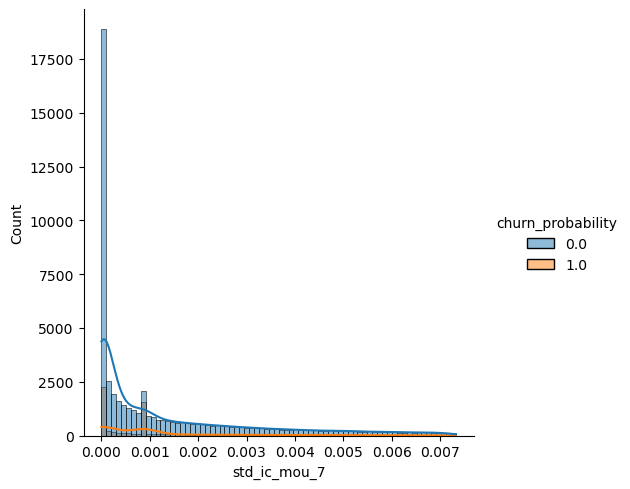

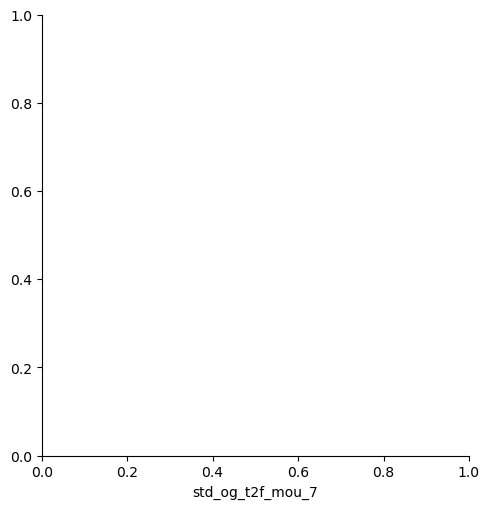

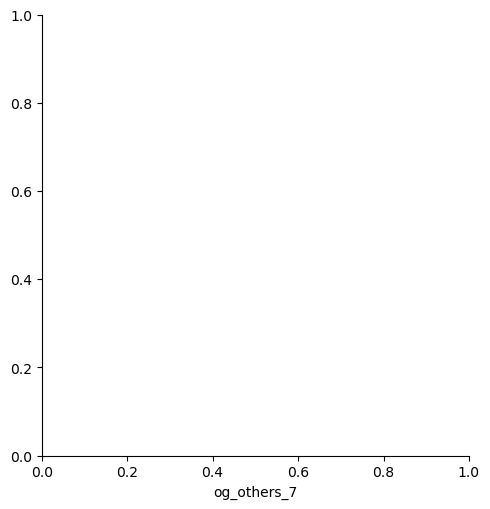

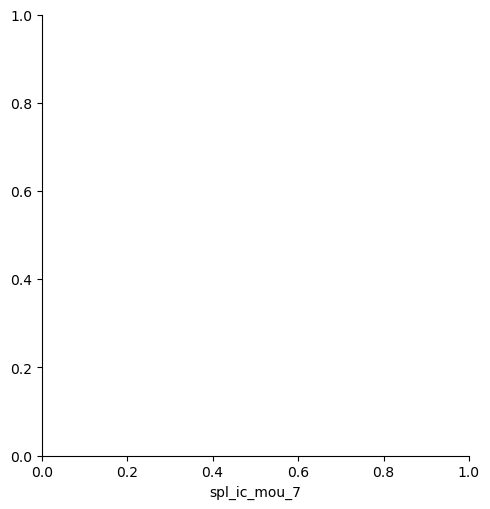

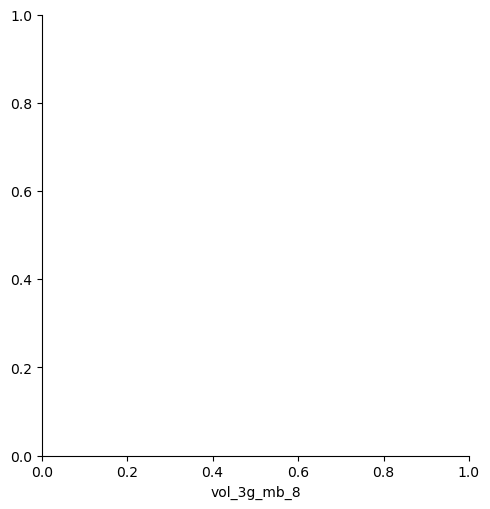

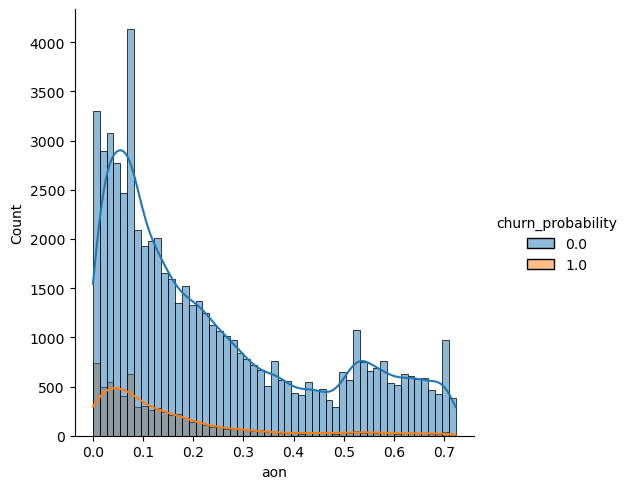

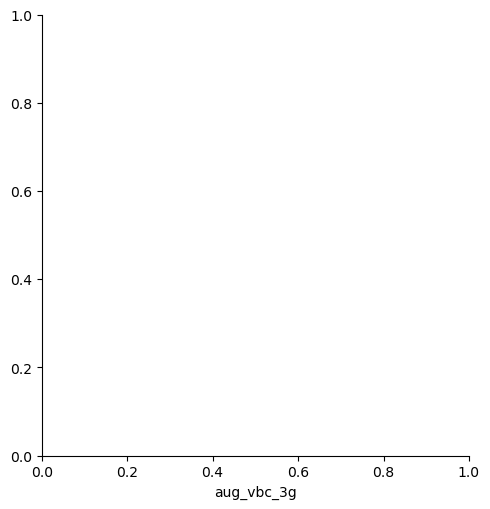

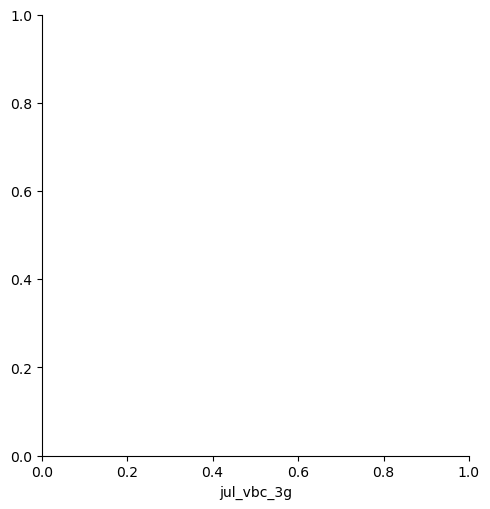

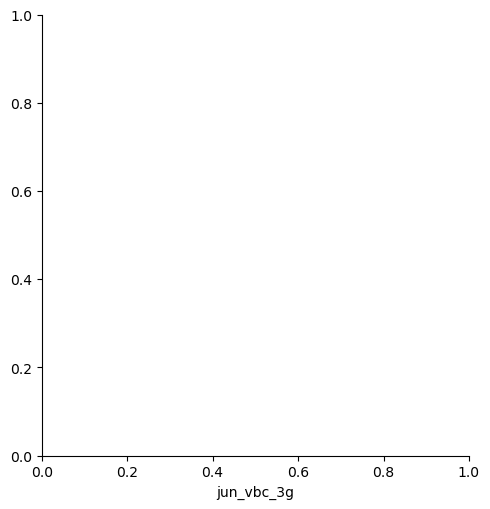

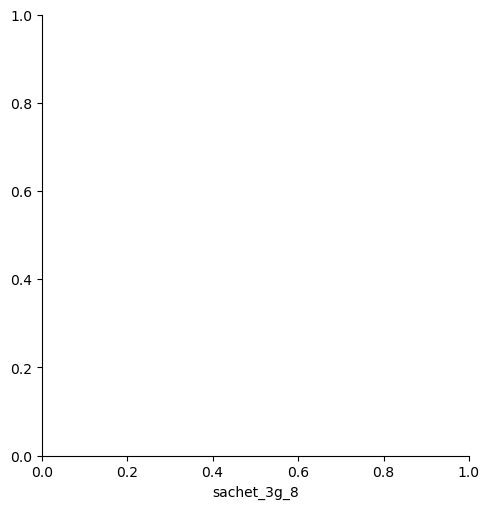

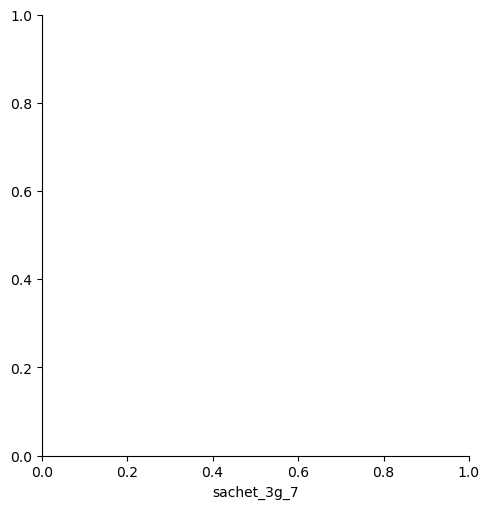

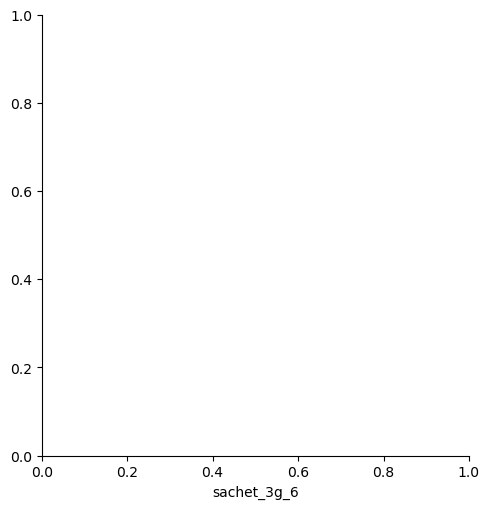

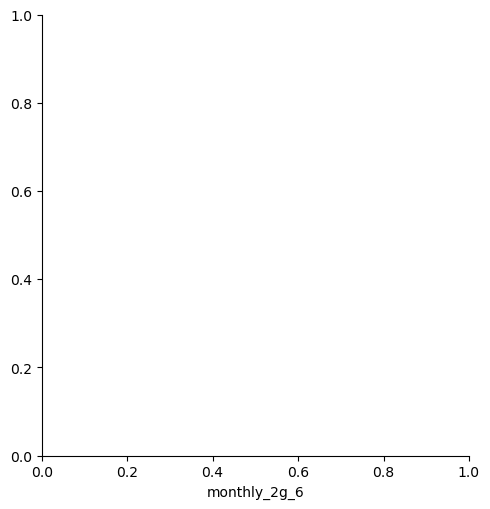

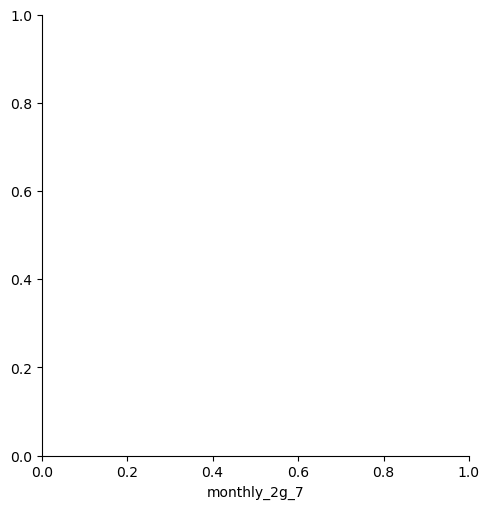

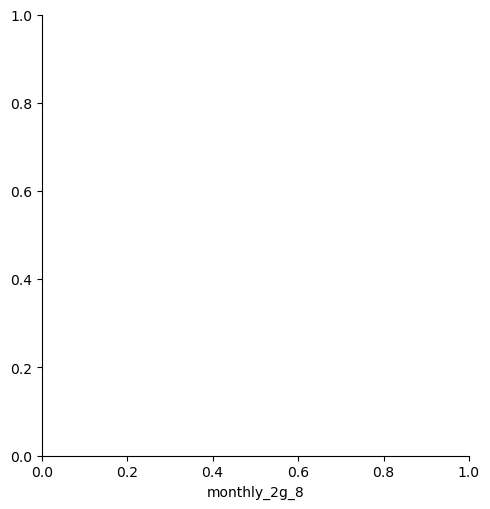

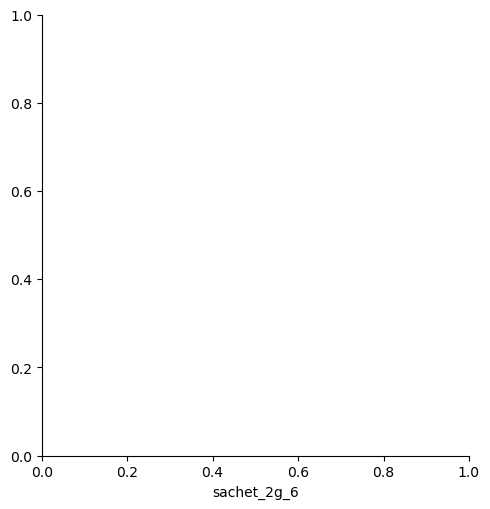

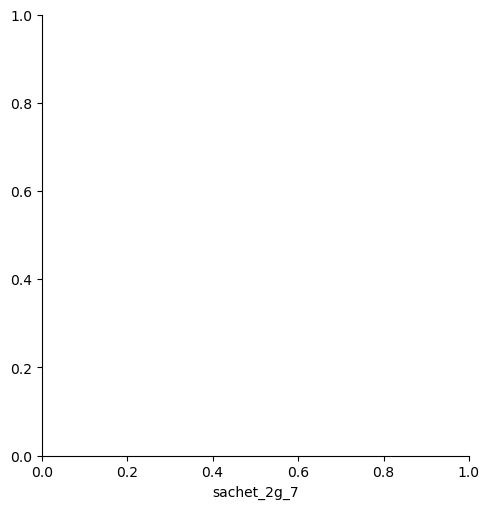

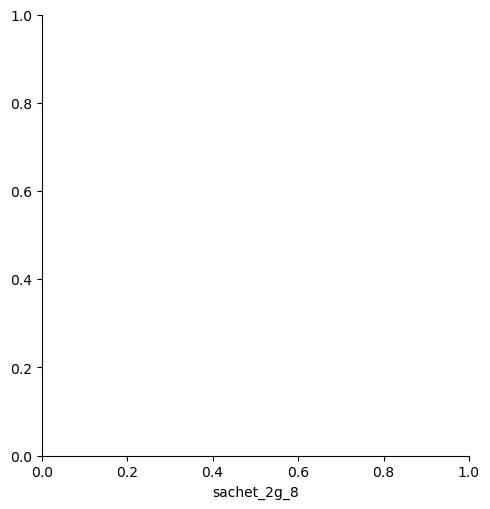

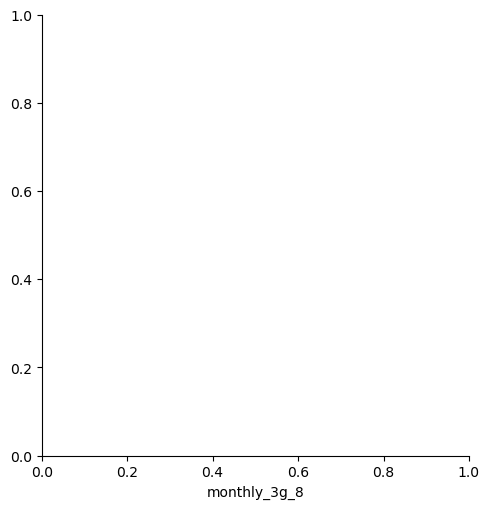

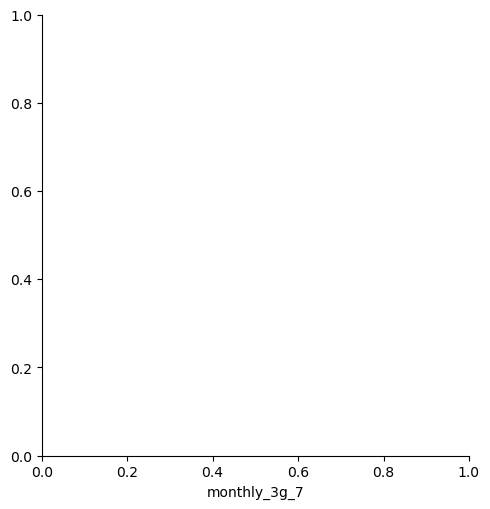

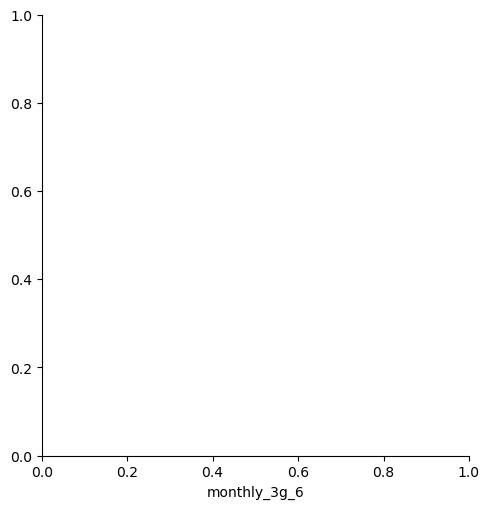

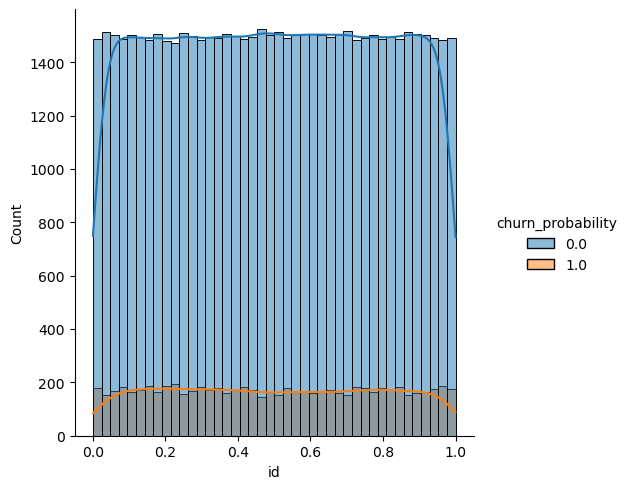

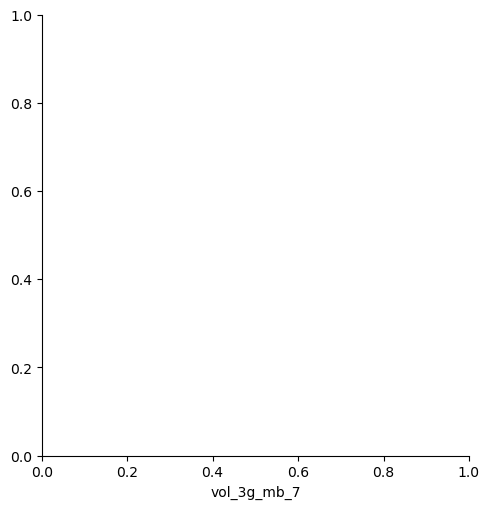

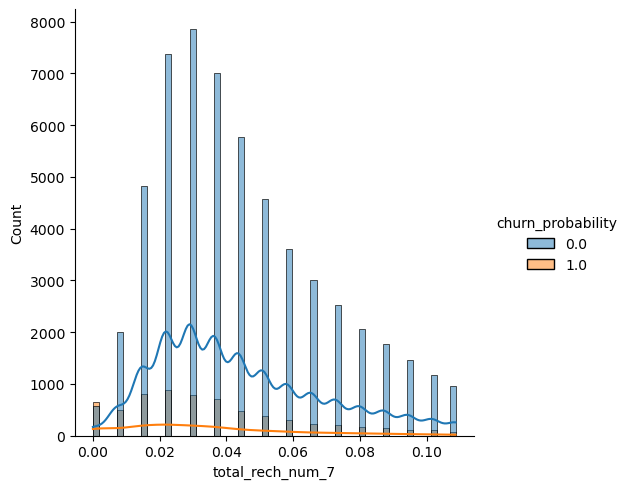

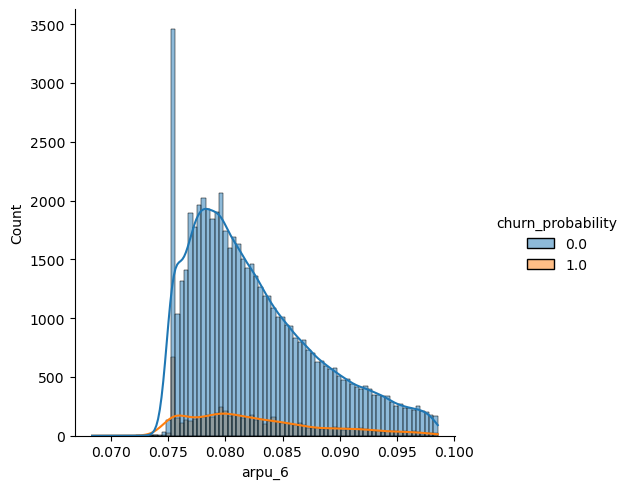

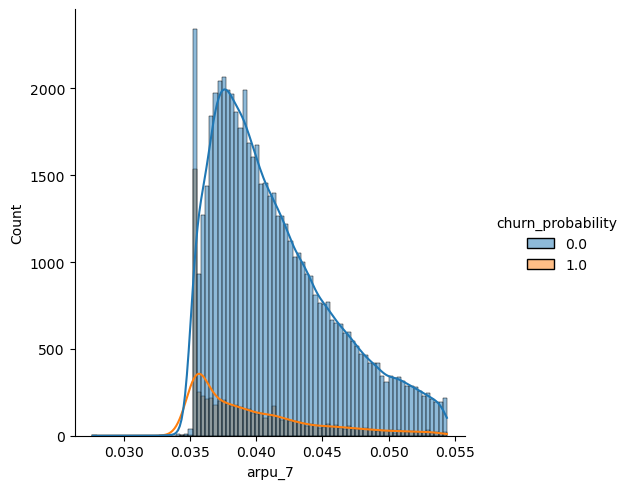

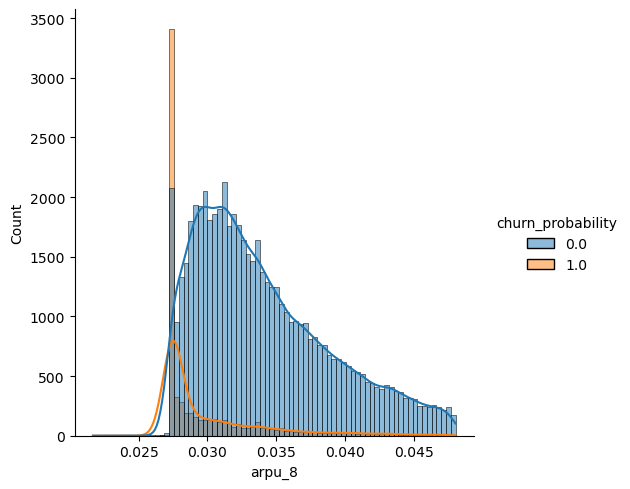

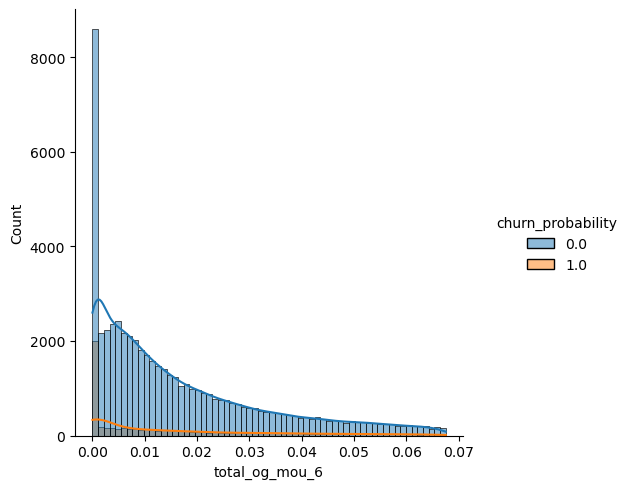

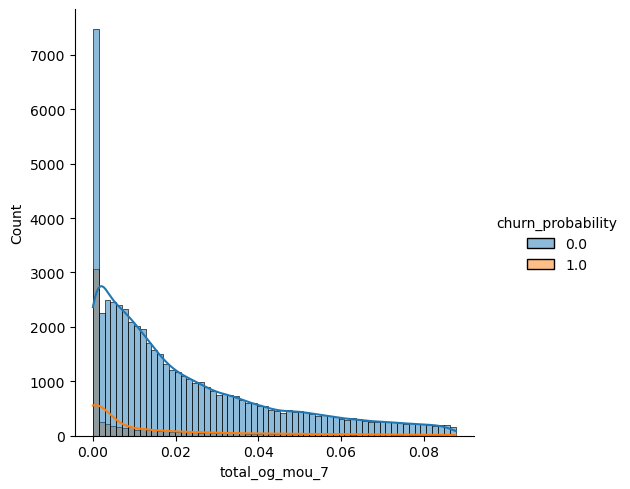

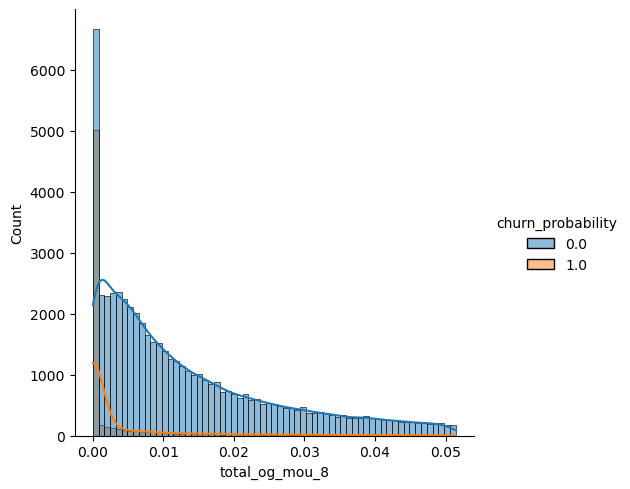

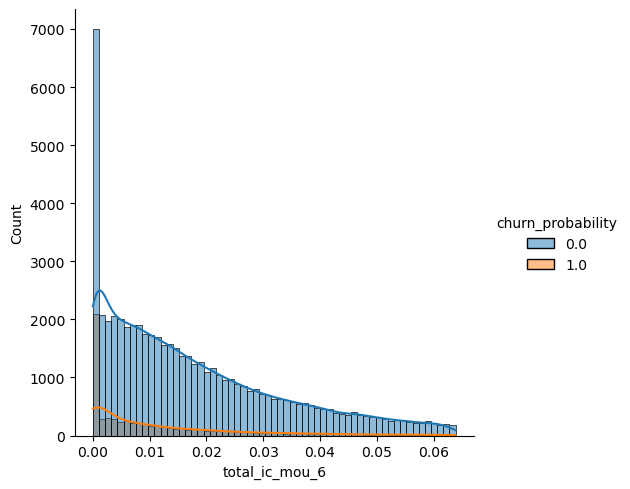

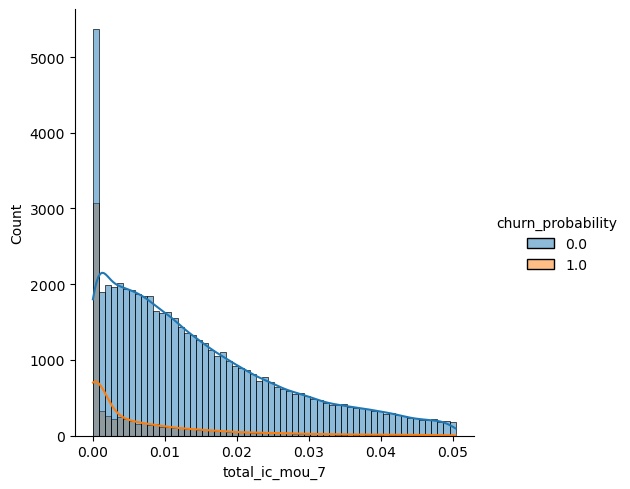

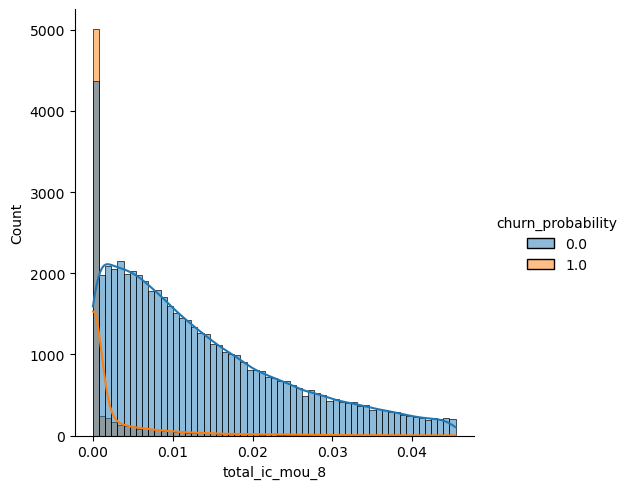

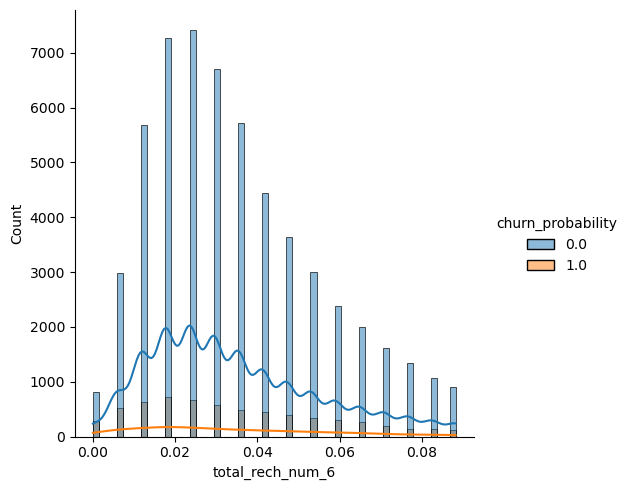

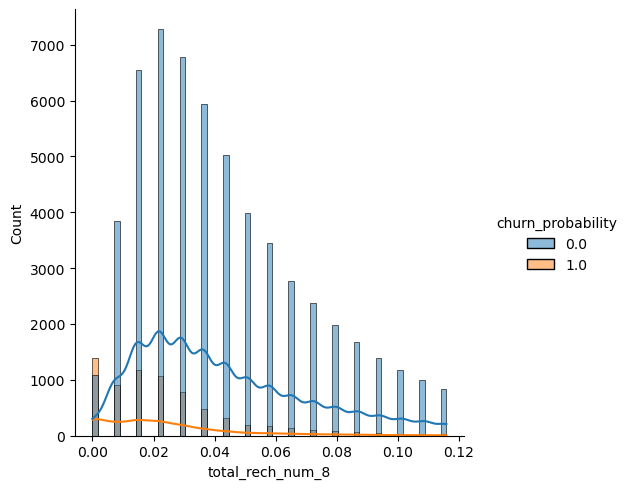

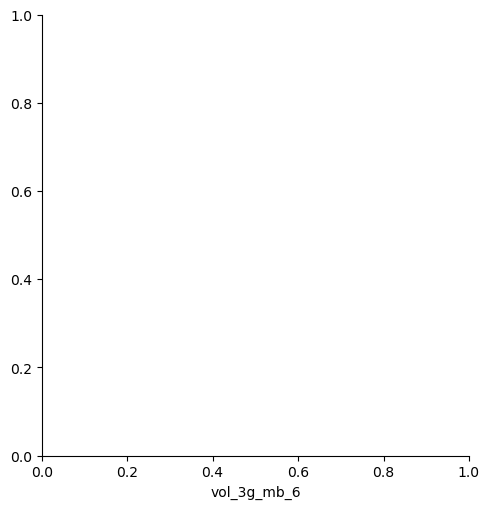

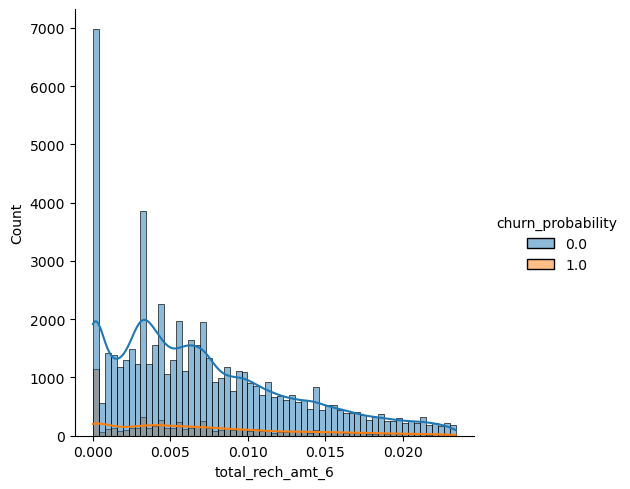

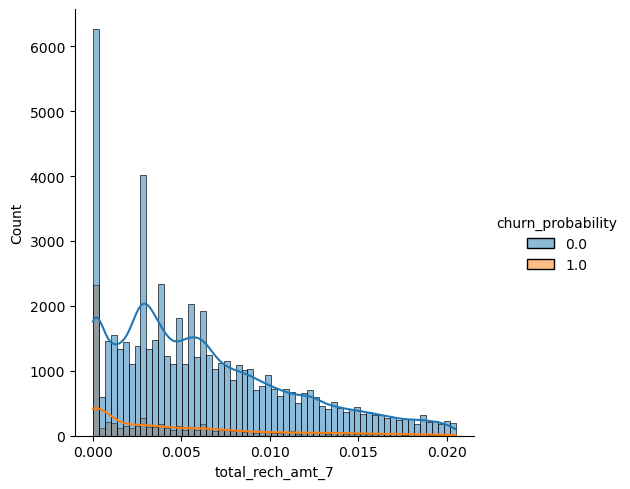

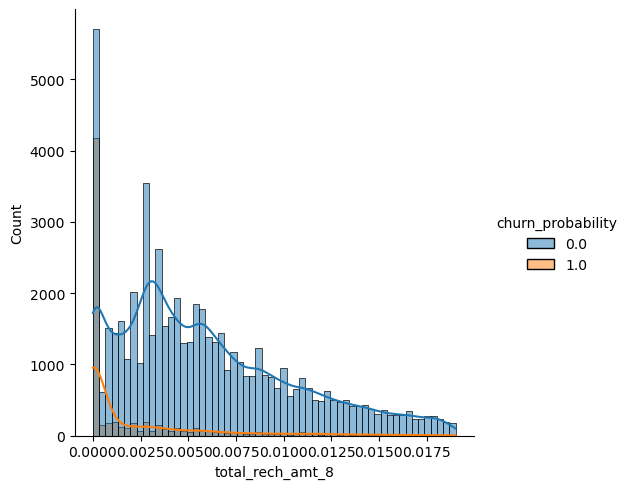

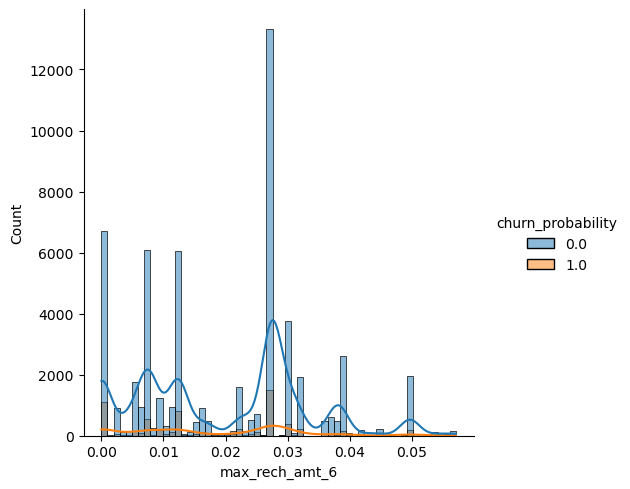

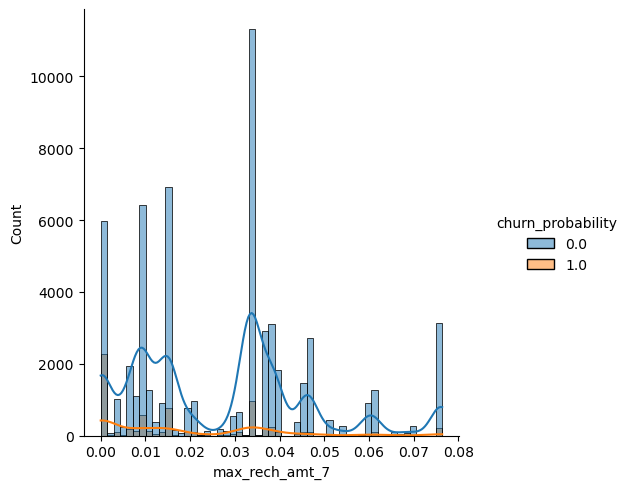

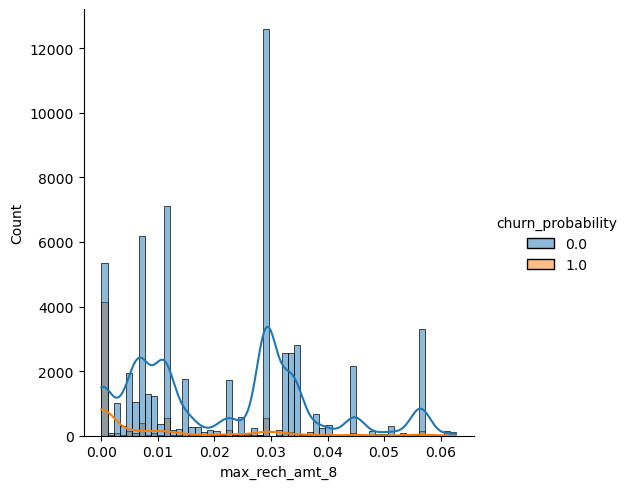

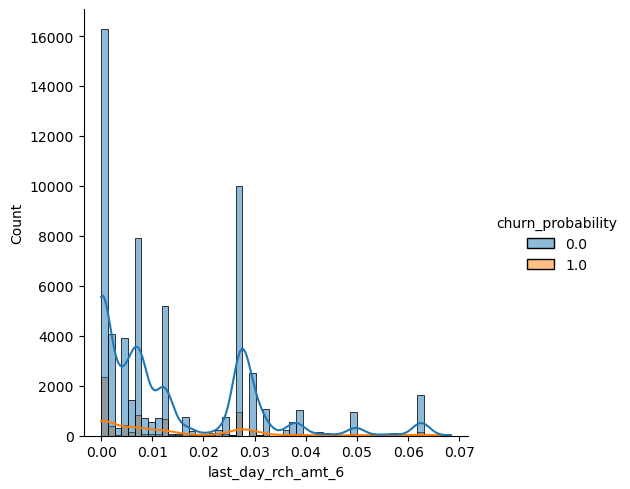

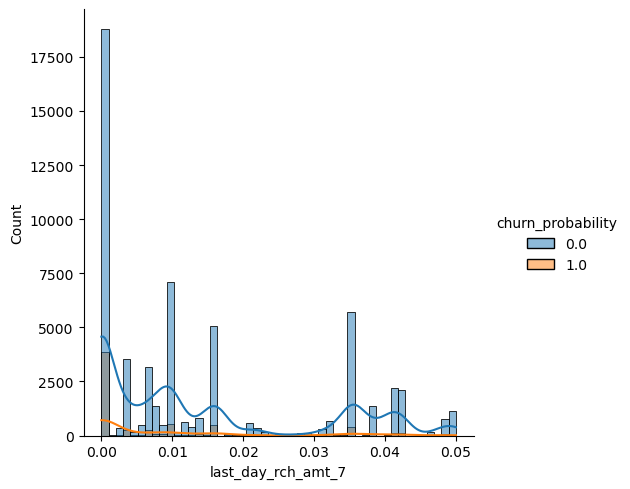

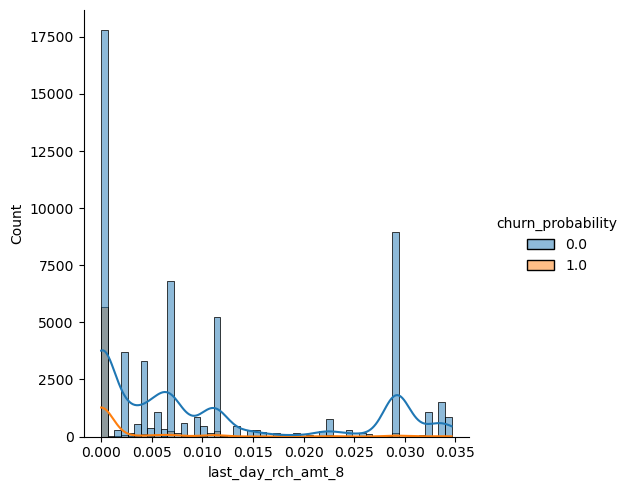

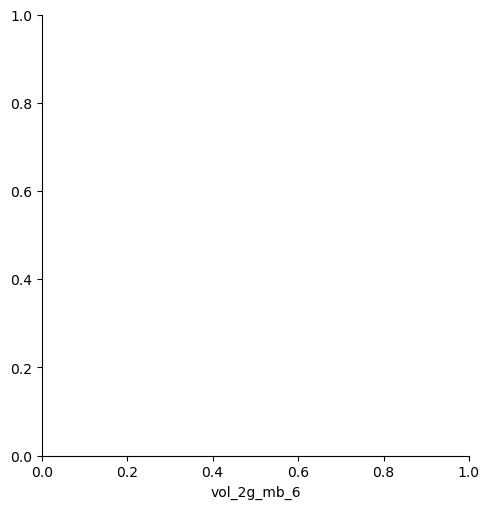

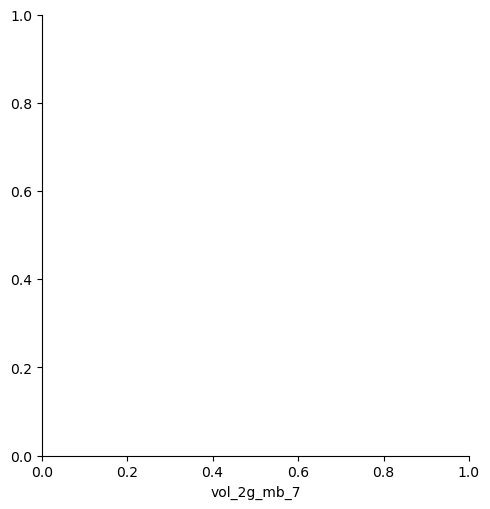

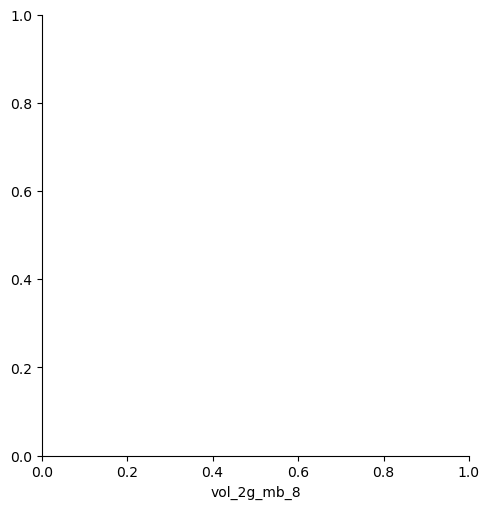

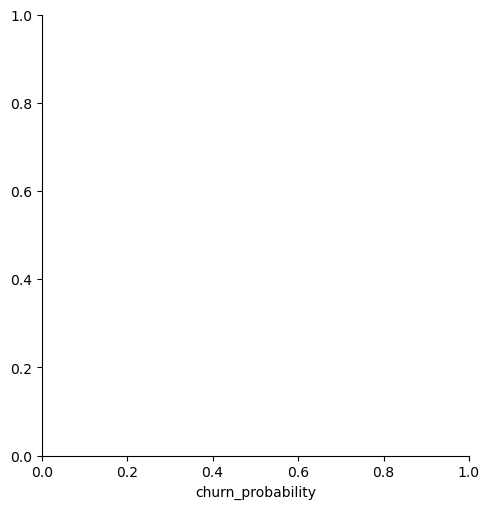

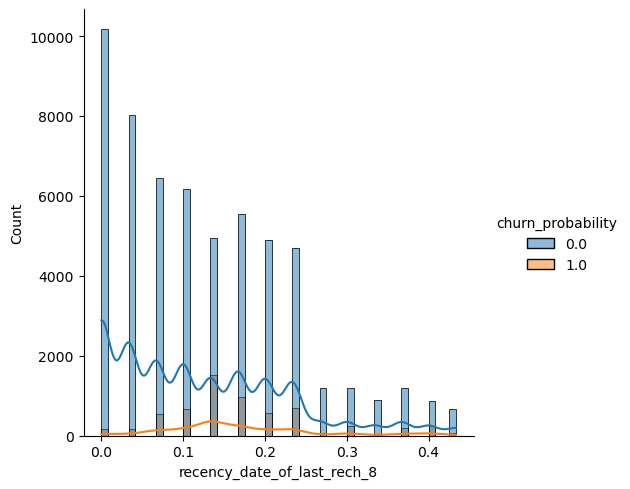

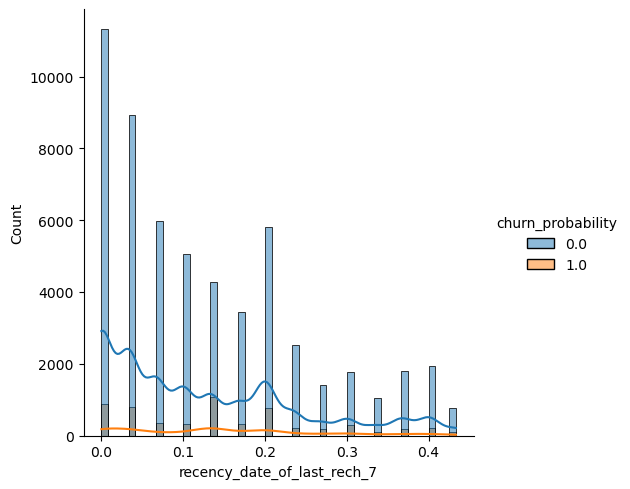

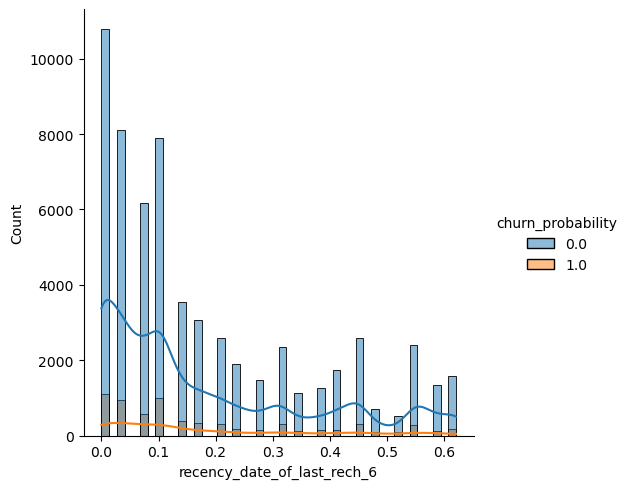

In [17]:
for i in num_variables:
    arr=np.array(df[i])
    uq=np.percentile(arr,70)
    lq=np.percentile(arr,20)
    iqr=uq-lq
    ul=uq+(1.5*iqr)
    ll=lq-(1.5*iqr)
    grouped_df=df[(df[i]<ul) & (df[i]>ll)]
    sns.displot(data=grouped_df,x=grouped_df[i],kde=True,hue='churn_probability')
    plt.xlabel(i)
    plt.show()

In [19]:
y=df.pop('churn_probability')


In [20]:
X=df

<Axes: >

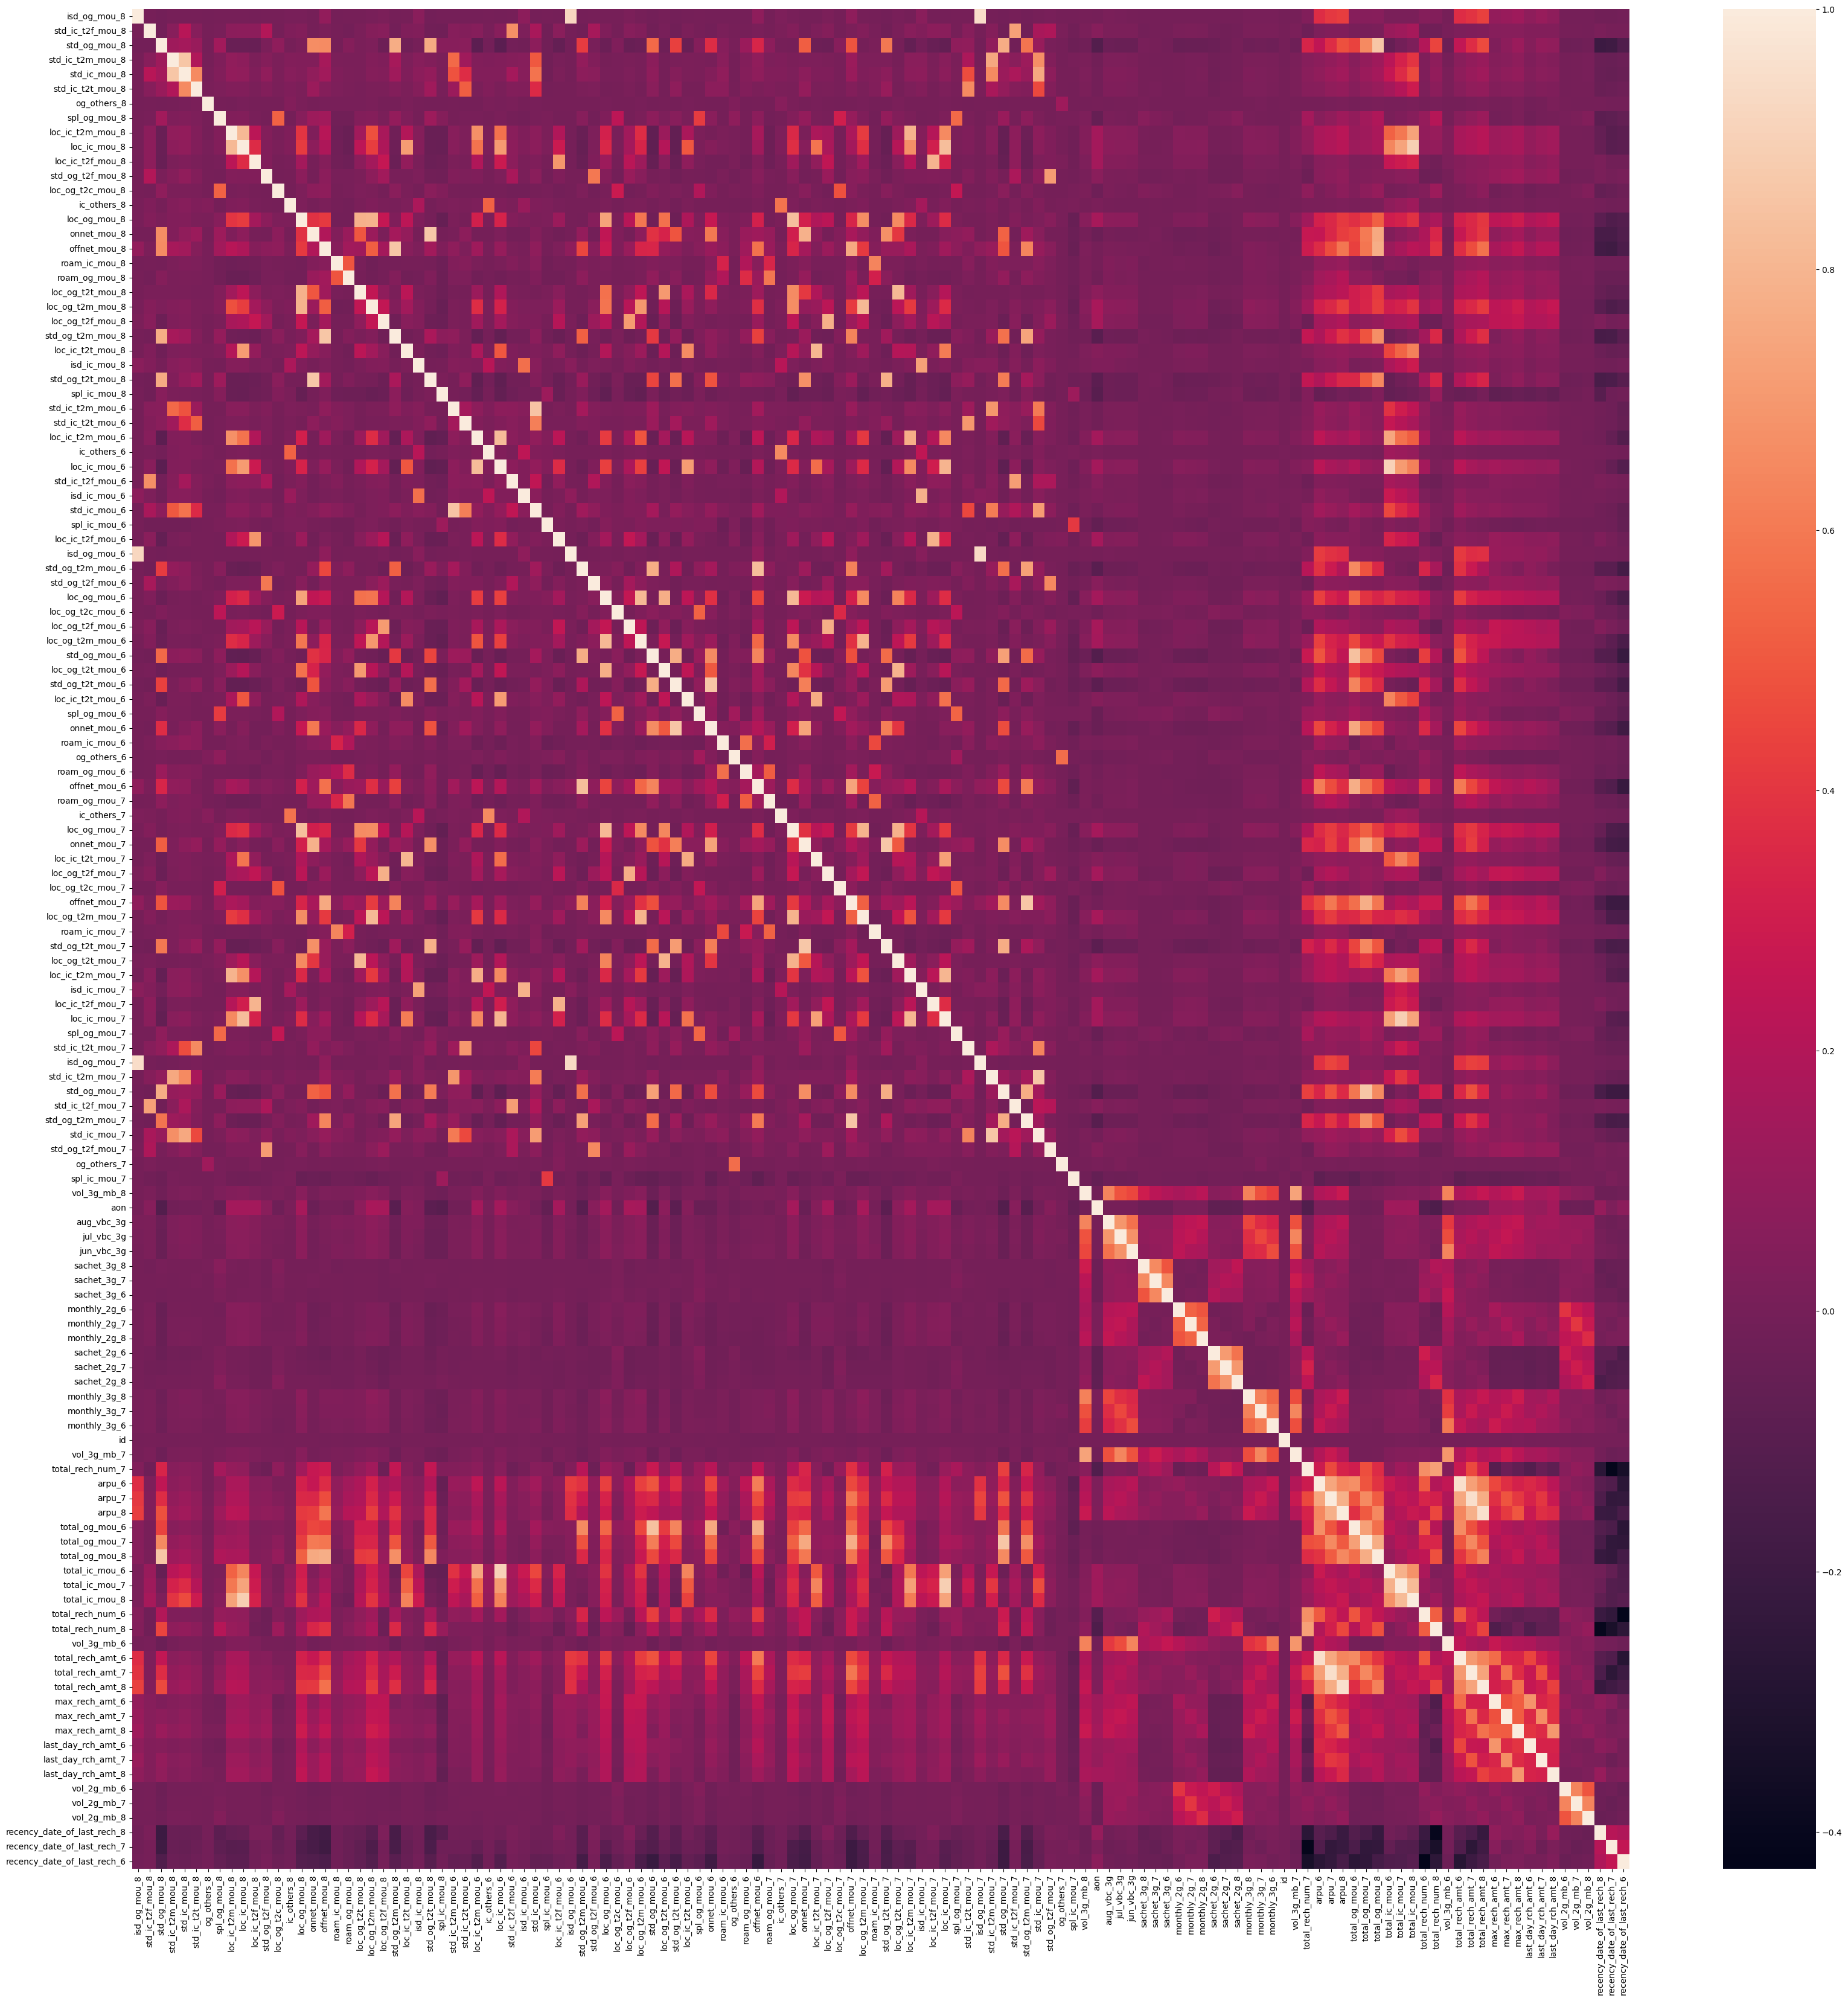

In [22]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr())

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X,y)

RandomForestClassifier(random_state=42)

In [26]:
forest_clf.feature_importances_

array([0.0013145 , 0.00181353, 0.01897211, 0.00753363, 0.00935868,
       0.00369812, 0.00010985, 0.00419205, 0.02038925, 0.026426  ,
       0.007552  , 0.00062819, 0.00219551, 0.00143664, 0.01414633,
       0.01351714, 0.01336593, 0.01349046, 0.01451883, 0.01107289,
       0.0140157 , 0.00506128, 0.00884151, 0.0194623 , 0.00160714,
       0.00583595, 0.00126115, 0.00526758, 0.00428699, 0.00744894,
       0.00227536, 0.00716615, 0.00153052, 0.00202437, 0.00596911,
       0.00215348, 0.00407269, 0.00132866, 0.00565877, 0.00134195,
       0.00669706, 0.00266907, 0.00280789, 0.00645827, 0.00681852,
       0.00584227, 0.00552978, 0.006298  , 0.00397943, 0.00715878,
       0.00359668, 0.00271218, 0.00406209, 0.00783914, 0.00697827,
       0.0020524 , 0.00611412, 0.00716053, 0.00584224, 0.00254844,
       0.00308534, 0.00781809, 0.00623865, 0.00694749, 0.00460705,
       0.00605924, 0.00875097, 0.00216795, 0.00472541, 0.00816831,
       0.00445839, 0.00379932, 0.00127033, 0.00463832, 0.00665

In [27]:
feature_dict=[]
forest_clf.feature_names_in_
for i in range(len(forest_clf.feature_names_in_)):
    feature_dict.append((forest_clf.feature_names_in_[i],forest_clf.feature_importances_[i]))
feature_dict
feature_importance=pd.DataFrame(feature_dict,columns=['feature','importance']).sort_values(by='importance',ascending=False).reset_index()


    

In [30]:
feature_importance=feature_importance.drop('index',axis=1)

feature  importance
0      total_ic_mou_8    0.094573
1      total_og_mou_8    0.051286
2              arpu_8    0.048050
3    total_rech_amt_8    0.033630
4      max_rech_amt_8    0.031638
..                ...         ...
123      monthly_2g_8    0.000564
124      monthly_2g_6    0.000544
125       sachet_3g_8    0.000544
126       og_others_7    0.000111
127       og_others_8    0.000110

[128 rows x 2 columns]

<Axes: >

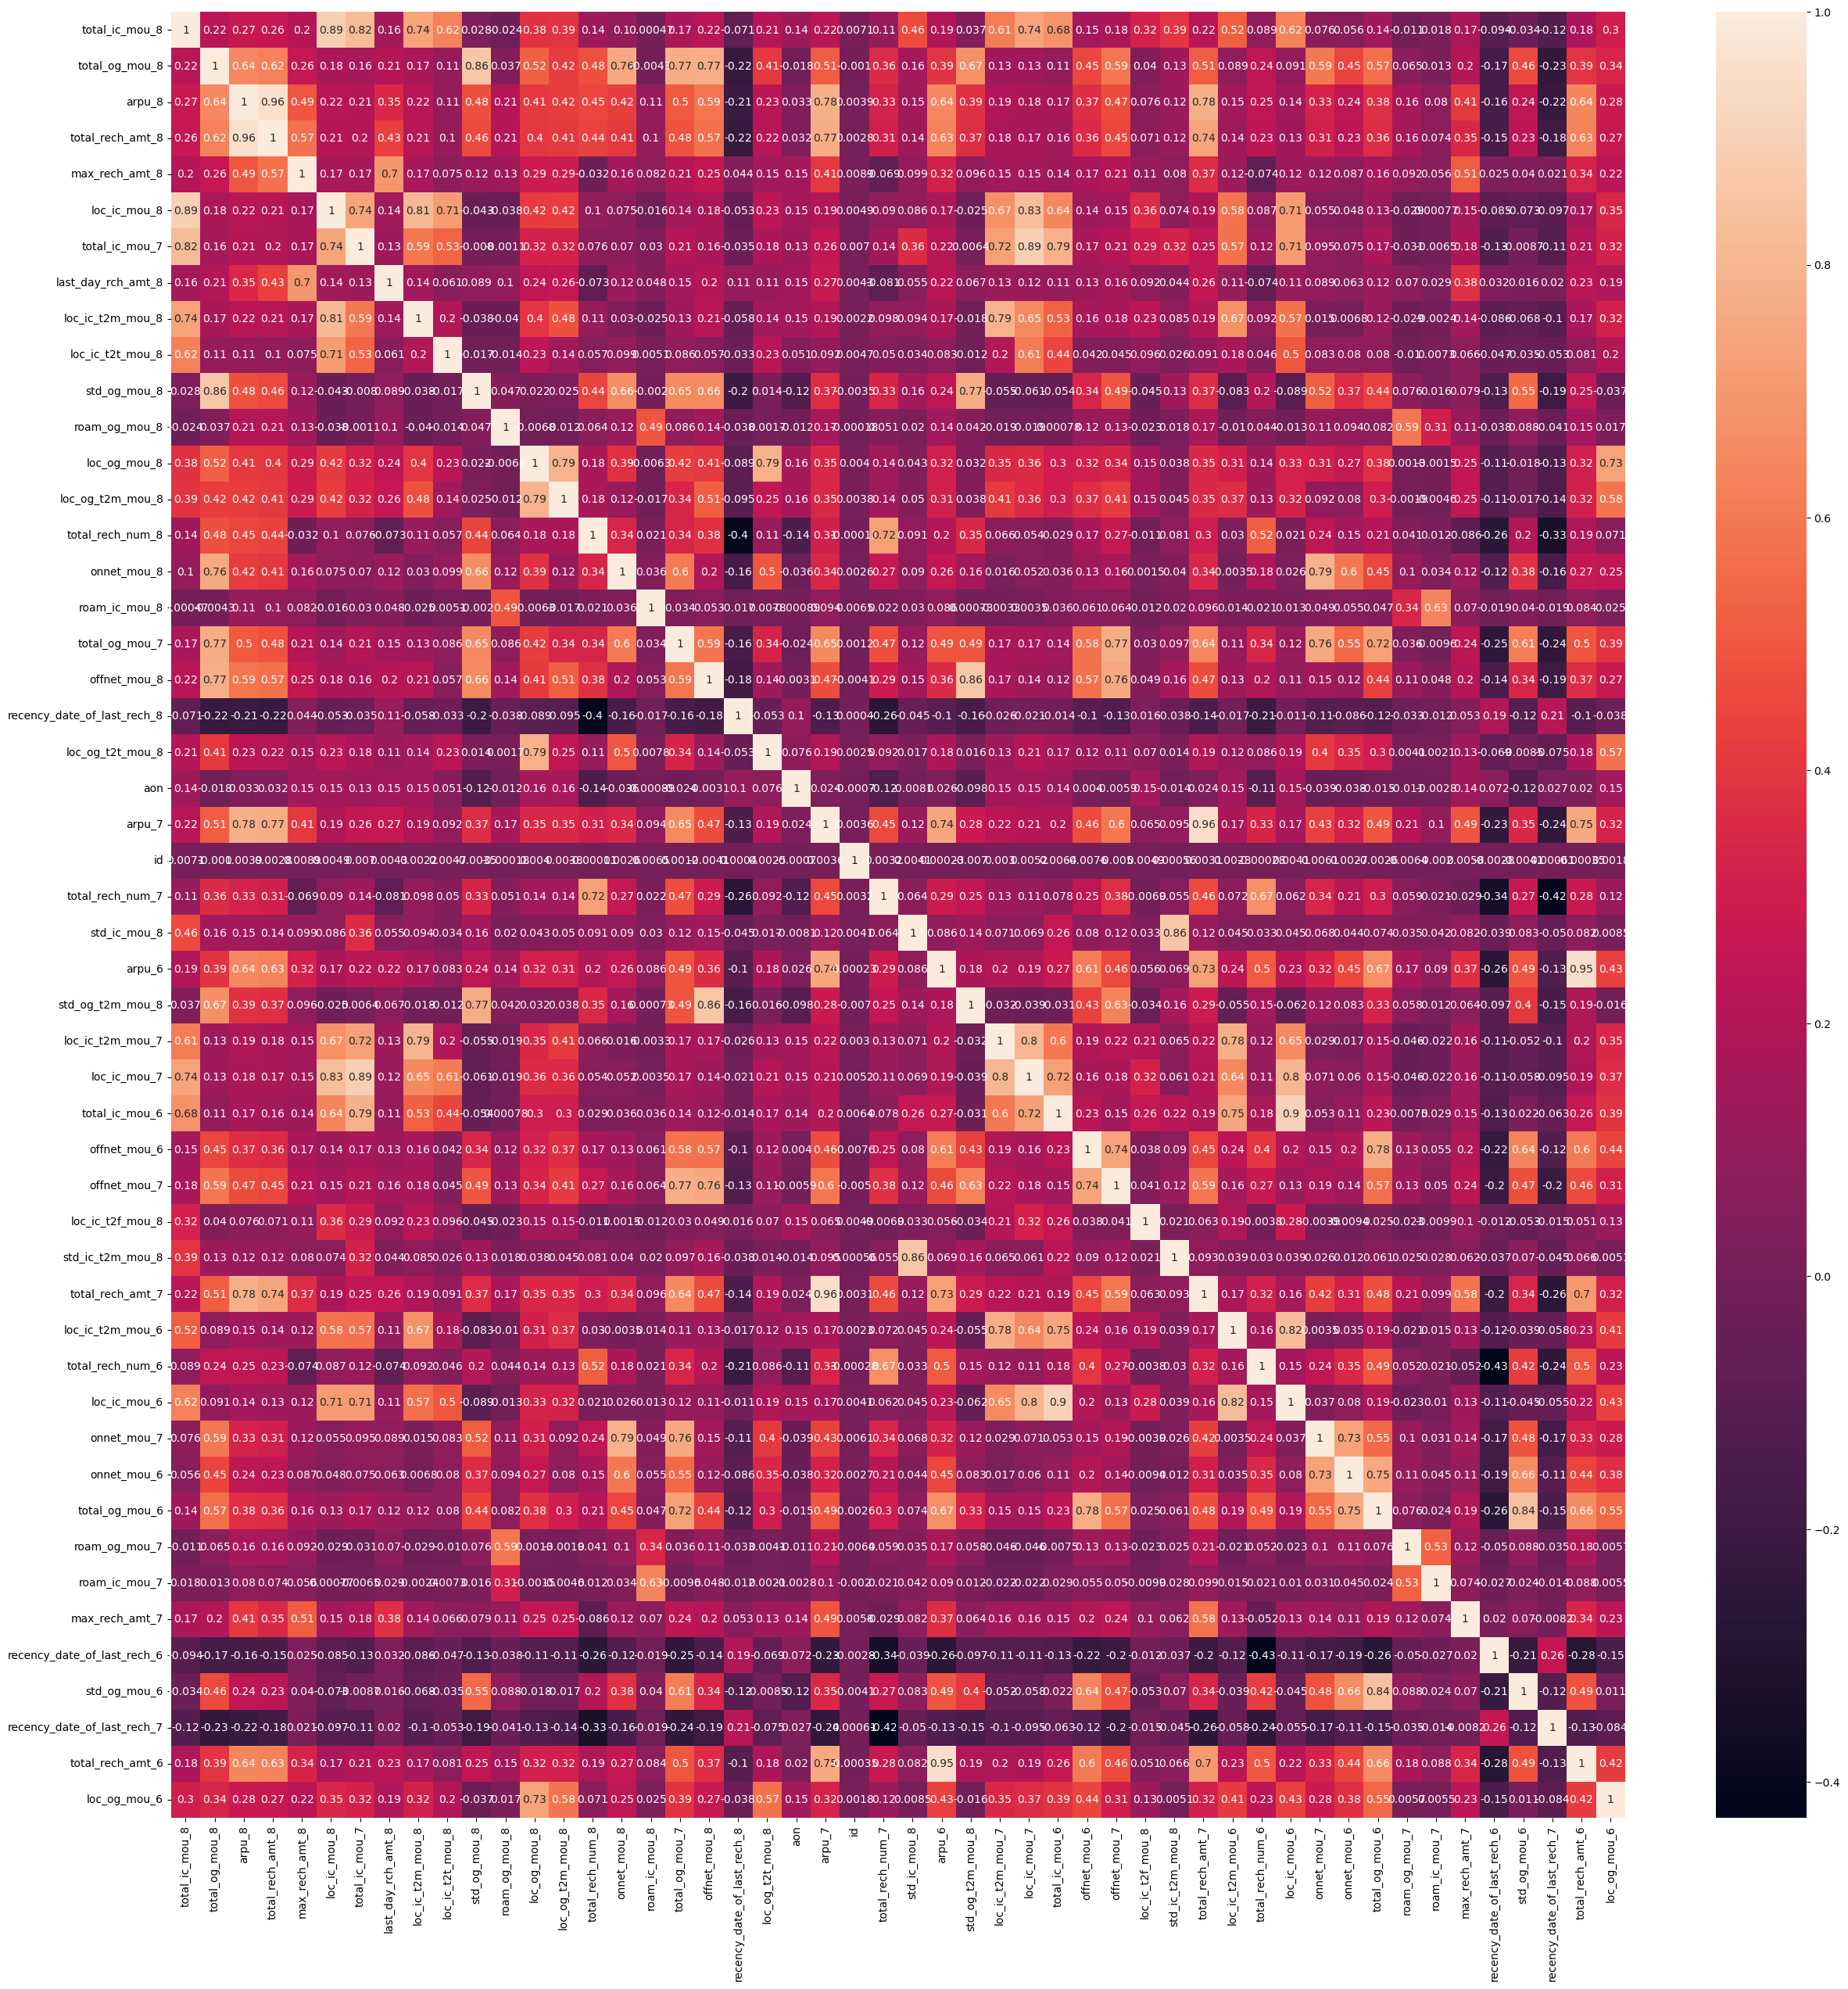

In [40]:
imp_features=list(feature_importance.feature)[:50]
plt.figure(figsize=(30,30))
sns.heatmap(X[imp_features].corr(),annot=True)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((48999, 128), (21000, 128), (48999,), (21000,))

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(X)

In [ ]:
len(pca.components_)

In [ ]:
cum_arr=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,X.shape[1]+1),cum_arr)
plt.grid()
plt.show()

In [ ]:
pca=PCA(n_components=24,random_state=42)
X_transformed=pca.fit_transform(X_train)
X_transformed.shape

In [ ]:
cum_arr=np.cumsum(pca.explained_variance_ratio_)
cum_arr

In [ ]:
sns.heatmap(pd.DataFrame(X_transformed).corr())

In [56]:
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression()



In [63]:
from sklearn.feature_selection import RFE
rfe = RFE(lgm, n_features_to_select=24)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('isd_og_mou_8', False, 87),
 ('std_ic_t2f_mou_8', False, 33),
 ('std_og_mou_8', False, 20),
 ('std_ic_t2m_mou_8', False, 14),
 ('std_ic_mou_8', False, 9),
 ('std_ic_t2t_mou_8', False, 34),
 ('og_others_8', False, 99),
 ('spl_og_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 17),
 ('loc_og_t2c_mou_8', False, 41),
 ('ic_others_8', False, 61),
 ('loc_og_mou_8', True, 1),
 ('onnet_mou_8', False, 51),
 ('offnet_mou_8', False, 45),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 35),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 36),
 ('loc_ic_t2t_mou_8', False, 19),
 ('isd_ic_mou_8', False, 62),
 ('std_og_t2t_mou_8', False, 38),
 ('spl_ic_mou_8', True, 1),
 ('std_ic_t2m_mou_6', False, 46),
 ('std_ic_t2t_mou_6', False, 28),
 ('loc_ic_t2m_mou_6', False, 91),
 ('ic_others_6', False, 81),
 ('loc_ic_mou_6', False, 40),

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['spl_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_6', 'onnet_mou_6',
       'offnet_mou_6', 'roam_og_mou_7', 'onnet_mou_7', 'offnet_mou_7',
       'std_og_mou_7', 'spl_ic_mou_7', 'monthly_2g_8', 'sachet_2g_8', 'arpu_6',
       'arpu_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8'],
      dtype='object')

In [62]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48968
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10302.
Date:                Tue, 26 Mar 2024   Deviance:                       20600.
Time:                        20:18:57   Pearson chi2:                 9.79e+15
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2118
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8838      0.281     -6.696      0.000      -2.435      -1.332
spl_og_mou_8          -5.1494      2.655     -1.940      0.052     -10.352       0.054
loc_ic_t2m_mou_8     -14.1613      5.084     -2.785      0.005     -24.126      -4.196
loc_ic_mou_8         162.7868      7.981     20.398      0.000     147.145     178.428
loc_ic_t2f_mou_8     -39.5893      5.325     -7.435      0.000     -50.026     -29.153
loc_og_mou_8          -2.8092      5.248     -0.535      0.592     -13.095       7.476
roam_ic_mou_8          4.4323      1.296      3.421      0.001       1.893       6.972
roam_og_mou_8          7.5813      1.857      4.083      0.000       3.942      11.221
loc_og_t2m_mou_8     -11.8032      3.604     -3.275      0.001     -18.868      -4.739
loc_og_t2f_mou_8      -4.8719      2.975     -1.637      0.102     -10.704       0.960
spl_ic_mou_8        -107.4380      8.658    -12.409      0.000    -124.408     -90.468
std_ic_mou_6          10.9934      1.644      6.687      0.000       7.771      14.216
onnet_mou_6            1.7428      0.702      2.483      0.013       0.367       3.118
offnet_mou_6           1.4142      0.836      1.691      0.091      -0.225       3.053
roam_og_mou_7        -22.6824      1.782    -12.726      0.000     -26.176     -19.189
onnet_mou_7           85.0762      4.684     18.163      0.000      75.896      94.257
offnet_mou_7          74.1990      4.009     18.509      0.000      66.342      82.056
std_og_mou_7           5.9239      1.723      3.438      0.001       2.547       9.301
spl_ic_mou_7          -7.1026      2.494     -2.848      0.004     -11.991      -2.214
monthly_2g_8          -6.0256      0.653     -9.224      0.000      -7.306      -4.745
sachet_2g_8          -10.6590      1.225     -8.699      0.000     -13.061      -8.257
arpu_6                11.4453      3.747      3.055      0.002       4.101      18.789
arpu_8                -4.0909      6.634     -0.617      0.537     -17.093       8.911
total_og_mou_7       -87.3795      4.784    -18.267      0.000     -96.755     -78.004
total_og_mou_8        -8.5524      1.750     -4.888      0.000     -11.982      -5.123
total_ic_mou_7        13.4998      1.533      8.804      0.000      10.495      16.505
total_ic_mou_8      -206.3382      5.974    -34.537      0.000    -218.048    -194.628
total_rech_num_6       2.6434      0.621      4.255      0.000       1.426       3.861
total_rech_num_8      -8.0342      0.860     -9.346      0.000      -9.719      -6.349
max_rech_amt_8        -3.0332      1.320     -2.297      0.022      -5.621      -0.445
last_day_rch_amt_8   -30.2558      1.898    -15.937      0.000     -33.977     -26.535
======================================================================================
"""

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
23      total_og_mou_7  375.15
16        offnet_mou_7  162.50
15         onnet_mou_7  161.88
0                const  138.50
17        std_og_mou_7   12.85
3         loc_ic_mou_8    8.18
26      total_ic_mou_8    7.92
5         loc_og_mou_8    6.75
14       roam_og_mou_7    6.44
24      total_og_mou_8    5.43
22              arpu_8    4.34
21              arpu_6    3.94
25      total_ic_mou_7    3.61
8     loc_og_t2m_mou_8    3.48
13        offnet_mou_6    3.36
2     loc_ic_t2m_mou_8    3.21
12         onnet_mou_6    2.81
28    total_rech_num_8    2.63
29      max_rech_amt_8    2.48
27    total_rech_num_6    2.34
30  last_day_rch_amt_8    2.07
7        roam_og_mou_8    1.92
11        std_ic_mou_6    1.46
6        roam_ic_mou_8    1.32
4     loc_ic_t2f_mou_8    1.24
9     loc_og_t2f_mou_8    1.22
20         sachet_2g_8    1.16
1         spl_og_mou_8    1.09
19        monthly_2g_8    1.05
10        spl_ic_mou_8    1.04
18        spl_ic_mou_7    1.03

In [73]:
X_test_sm = sm.add_constant(X_test[col])

y_pred=res.predict(X_test_sm)
y_pred

24511    0.123939
9575     0.012974
9447     0.301885
22807    0.121660
29657    0.241714
           ...   
1042     0.015811
44339    0.005302
33467    0.098901
64495    0.031991
12344    0.024399
Length: 21000, dtype: float64

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [91]:
rf=RandomForestClassifier(random_state=42,verbose=3)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9398095238095238

In [92]:
rf

RandomForestClassifier(random_state=42, verbose=3)

0.7814224875227666


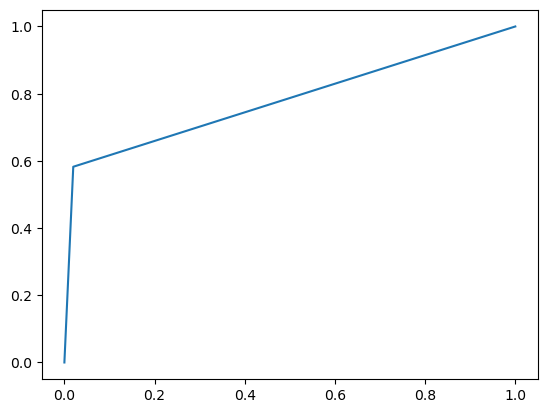

In [88]:
from sklearn.metrics import auc,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
area=auc(fpr,tpr)
plt.plot(fpr,tpr)
print(area)



In [93]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [94]:
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9007619047619048

In [98]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [99]:
models={
                'RandomForest': RandomForestClassifier(),
                'Decision Tree': DecisionTreeClassifier(),
                'GradientBoostingClassifier': GradientBoostingClassifier(),
                'LogisticRegression': LogisticRegression(),
                'XGBClassifier': XGBClassifier(),
                'CatBoostClassifier': CatBoostClassifier(verbose=False),
                'AdaBoostClassifier': AdaBoostClassifier()


            }

In [116]:
params={
    'RandomForest': {'n_estimators':[5,10,20,30,50,100],
                    'max_depth':[3,5,10],
                    },
    'Decision Tree':{'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
                     'max_depth':[3,5,10],
      
                    } ,
    'GradientBoostingClassifier':{'learning_rate':[0.1,0.01,0.05,0.001],
                         'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                         'n_estimators':[5,10,15,20,25,30,50,100]
                        } ,
    'LogisticRegression':{'n_jobs':-1} ,
    
    'XGBClassifier':{'learning_rate':[0.1,0.01,0.05,0.001],
                     'n_estimators':[5,10,15,20,25,30,50,100]
        
    },
    'CatBoostClassifier':{'learning_rate':[0.1,0.01,0.05,0.001],
                         'depth':[6,8,10]} ,
    'AdaBoostClassifier':{'learning_rate':[0.1,0.01,0.05,0.001],
                          'loss':['linear','square','exponential'],
                          'n_estimators':[5,10,15,20,25,30,50,100,]
                         }
        
    } 

In [103]:
for i in range(len(list(models.keys()))):
        para=params[list(models.keys())[i]]
        print(para)

{'n_estimators': [5, 10, 15, 20, 25, 30, 50, 100, 200, 300], 'max_depth': [3, 5, 10, 15, 20], 'min_samples_leaf': [3, 5, 10, 15, 20, 25, 50, 100]}
{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': [3, 5, 10, 15, 20], 'min_samples_leaf': [3, 5, 10, 15, 20, 25, 50, 100]}
{'learning_rate': [0.1, 0.01, 0.05, 0.001], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9], 'n_estimators': [5, 10, 15, 20, 25, 30, 50, 100, 200, 300]}
{'n_jobs': -1}
{'learning_rate': [0.1, 0.01, 0.05, 0.001], 'n_estimators': [5, 10, 15, 20, 25, 30, 50, 100, 200, 300]}
{'learning_rate': [0.1, 0.01, 0.05, 0.001], 'depth': [6, 8, 10]}
{'learning_rate': [0.1, 0.01, 0.05, 0.001], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [5, 10, 15, 20, 25, 30, 50, 100, 200, 300]}


In [106]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [115]:
report={}
for i in range(len(list(models.keys()))):
    model_cv=GridSearchCV(estimator=models[list(models.keys())[i]],param_grid=params[list(models.keys())[i]],cv=3,verbose=3)
    model_cv.fit(X_train,y_train)
    model=model_cv.best_estimator_
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    
    print(list(models.keys())[i],':')
    print('accuracy_score is:',score)
    
    print('__________________________________')
    report[list(models.keys())[i]]=score


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END .......max_depth=3, n_estimators=5;, score=0.936 total time=   0.4s
[CV 2/3] END .......max_depth=3, n_estimators=5;, score=0.930 total time=   0.3s
[CV 3/3] END .......max_depth=3, n_estimators=5;, score=0.938 total time=   0.3s
[CV 1/3] END ......max_depth=3, n_estimators=10;, score=0.937 total time=   0.5s
[CV 2/3] END ......max_depth=3, n_estimators=10;, score=0.930 total time=   0.5s
[CV 3/3] END ......max_depth=3, n_estimators=10;, score=0.942 total time=   0.5s
[CV 1/3] END ......max_depth=3, n_estimators=20;, score=0.932 total time=   1.1s
[CV 2/3] END ......max_depth=3, n_estimators=20;, score=0.936 total time=   1.0s
[CV 3/3] END ......max_depth=3, n_estimators=20;, score=0.923 total time=   1.0s
[CV 1/3] END ......max_depth=3, n_estimators=30;, score=0.935 total time=   1.5s
[CV 2/3] END ......max_depth=3, n_estimators=30;, score=0.935 total time=   1.5s
[CV 3/3] END ......max_depth=3, n_estimators=30;

[CV 2/3] END criterion=squared_error, max_depth=20;, score=nan total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=20;, score=nan total time=   0.0s
[CV 1/3] END .criterion=friedman_mse, max_depth=3;, score=nan total time=   0.0s
[CV 2/3] END .criterion=friedman_mse, max_depth=3;, score=nan total time=   0.0s
[CV 3/3] END .criterion=friedman_mse, max_depth=3;, score=nan total time=   0.0s
[CV 1/3] END .criterion=friedman_mse, max_depth=5;, score=nan total time=   0.0s
[CV 2/3] END .criterion=friedman_mse, max_depth=5;, score=nan total time=   0.0s
[CV 3/3] END .criterion=friedman_mse, max_depth=5;, score=nan total time=   0.0s
[CV 1/3] END criterion=friedman_mse, max_depth=10;, score=nan total time=   0.0s
[CV 2/3] END criterion=friedman_mse, max_depth=10;, score=nan total time=   0.0s
[CV 3/3] END criterion=friedman_mse, max_depth=10;, score=nan total time=   0.0s
[CV 1/3] END criterion=friedman_mse, max_depth=15;, score=nan total time=   0.0s
[CV 2/3] END criterion=fri

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeClassifier must be a str among {'entropy', 'log_loss', 'gini'}. Got 'squared_error' instead.

--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeClassifier must be a str among {'entropy', 'log_loss', 'gini'}. Got 'friedman_mse' instead.

--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeClassifier must be a str among {'entropy', 'log_loss', 'gini'}. Got 'absolute_error' instead.

--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/rishismac/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeClassifier must be a str among {'entropy', 'log_loss', 'gini'}. Got 'poisson' instead.


In [105]:
sorted_report=[]
for w in sorted(report,key=report.get,reverse=True):
    sorted_report.append((w,report[w]))
sorted_report
best_model_name,best_score=sorted_report[0]
best_model_name

'CatBoostClassifier'

In [118]:
model_cv=GridSearchCV(estimator=CatBoostClassifier(),param_grid={'learning_rate':[0.1,0.01,0.05,0.001],
                         'depth':[6,8,10]},cv=3,verbose=3)
model_cv.fit(X_train,y_train)
model=model_cv.best_estimator_
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
    
print(list(models.keys())[i],':')
print('accuracy_score is:',score)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0:	learn: 0.5659889	total: 29ms	remaining: 29s
1:	learn: 0.4712100	total: 43.2ms	remaining: 21.6s
2:	learn: 0.3985665	total: 54.6ms	remaining: 18.1s
3:	learn: 0.3344914	total: 66.4ms	remaining: 16.5s
4:	learn: 0.2957062	total: 78.1ms	remaining: 15.5s
5:	learn: 0.2665666	total: 89.7ms	remaining: 14.9s
6:	learn: 0.2462528	total: 102ms	remaining: 14.4s
7:	learn: 0.2312267	total: 115ms	remaining: 14.2s
8:	learn: 0.2181731	total: 127ms	remaining: 14s
9:	learn: 0.2064496	total: 140ms	remaining: 13.8s
10:	learn: 0.1970321	total: 153ms	remaining: 13.8s
11:	learn: 0.1895626	total: 166ms	remaining: 13.7s
12:	learn: 0.1848373	total: 178ms	remaining: 13.5s
13:	learn: 0.1805017	total: 192ms	remaining: 13.5s
14:	learn: 0.1779474	total: 205ms	remaining: 13.5s
15:	learn: 0.1736991	total: 218ms	remaining: 13.4s
16:	learn: 0.1711480	total: 233ms	remaining: 13.5s
17:	learn: 0.1694434	total: 248ms	remaining: 13.5s
18:	learn: 0.1676849	total: 264

168:	learn: 0.1178013	total: 3.17s	remaining: 15.6s
169:	learn: 0.1176652	total: 3.2s	remaining: 15.6s
170:	learn: 0.1174101	total: 3.22s	remaining: 15.6s
171:	learn: 0.1172914	total: 3.24s	remaining: 15.6s
172:	learn: 0.1170453	total: 3.26s	remaining: 15.6s
173:	learn: 0.1169290	total: 3.27s	remaining: 15.5s
174:	learn: 0.1169139	total: 3.29s	remaining: 15.5s
175:	learn: 0.1167877	total: 3.31s	remaining: 15.5s
176:	learn: 0.1165904	total: 3.32s	remaining: 15.4s
177:	learn: 0.1164199	total: 3.34s	remaining: 15.4s
178:	learn: 0.1163564	total: 3.35s	remaining: 15.4s
179:	learn: 0.1160406	total: 3.37s	remaining: 15.3s
180:	learn: 0.1157768	total: 3.39s	remaining: 15.3s
181:	learn: 0.1155455	total: 3.4s	remaining: 15.3s
182:	learn: 0.1153065	total: 3.42s	remaining: 15.3s
183:	learn: 0.1151200	total: 3.44s	remaining: 15.2s
184:	learn: 0.1149552	total: 3.45s	remaining: 15.2s
185:	learn: 0.1147116	total: 3.47s	remaining: 15.2s
186:	learn: 0.1145964	total: 3.48s	remaining: 15.1s
187:	learn: 0.

331:	learn: 0.0939581	total: 5.69s	remaining: 11.4s
332:	learn: 0.0938459	total: 5.7s	remaining: 11.4s
333:	learn: 0.0937045	total: 5.72s	remaining: 11.4s
334:	learn: 0.0935058	total: 5.73s	remaining: 11.4s
335:	learn: 0.0933328	total: 5.75s	remaining: 11.4s
336:	learn: 0.0932691	total: 5.76s	remaining: 11.3s
337:	learn: 0.0931458	total: 5.78s	remaining: 11.3s
338:	learn: 0.0930489	total: 5.79s	remaining: 11.3s
339:	learn: 0.0930310	total: 5.8s	remaining: 11.3s
340:	learn: 0.0929402	total: 5.82s	remaining: 11.2s
341:	learn: 0.0927994	total: 5.84s	remaining: 11.2s
342:	learn: 0.0927363	total: 5.85s	remaining: 11.2s
343:	learn: 0.0926382	total: 5.86s	remaining: 11.2s
344:	learn: 0.0925617	total: 5.88s	remaining: 11.2s
345:	learn: 0.0924145	total: 5.89s	remaining: 11.1s
346:	learn: 0.0923771	total: 5.91s	remaining: 11.1s
347:	learn: 0.0922256	total: 5.92s	remaining: 11.1s
348:	learn: 0.0920877	total: 5.94s	remaining: 11.1s
349:	learn: 0.0919314	total: 5.96s	remaining: 11.1s
350:	learn: 0.

498:	learn: 0.0771075	total: 8.18s	remaining: 8.21s
499:	learn: 0.0770840	total: 8.2s	remaining: 8.2s
500:	learn: 0.0769867	total: 8.21s	remaining: 8.18s
501:	learn: 0.0767895	total: 8.23s	remaining: 8.16s
502:	learn: 0.0766437	total: 8.24s	remaining: 8.14s
503:	learn: 0.0766035	total: 8.26s	remaining: 8.13s
504:	learn: 0.0765749	total: 8.27s	remaining: 8.11s
505:	learn: 0.0765169	total: 8.28s	remaining: 8.09s
506:	learn: 0.0764947	total: 8.3s	remaining: 8.07s
507:	learn: 0.0763784	total: 8.31s	remaining: 8.05s
508:	learn: 0.0762402	total: 8.33s	remaining: 8.03s
509:	learn: 0.0761691	total: 8.34s	remaining: 8.02s
510:	learn: 0.0760475	total: 8.36s	remaining: 8s
511:	learn: 0.0760200	total: 8.37s	remaining: 7.98s
512:	learn: 0.0759861	total: 8.38s	remaining: 7.96s
513:	learn: 0.0759689	total: 8.4s	remaining: 7.94s
514:	learn: 0.0758529	total: 8.41s	remaining: 7.92s
515:	learn: 0.0757825	total: 8.43s	remaining: 7.91s
516:	learn: 0.0756105	total: 8.45s	remaining: 7.89s
517:	learn: 0.07549

664:	learn: 0.0631355	total: 10.7s	remaining: 5.38s
665:	learn: 0.0630484	total: 10.7s	remaining: 5.36s
666:	learn: 0.0629635	total: 10.7s	remaining: 5.34s
667:	learn: 0.0629390	total: 10.7s	remaining: 5.33s
668:	learn: 0.0628635	total: 10.7s	remaining: 5.31s
669:	learn: 0.0627584	total: 10.7s	remaining: 5.29s
670:	learn: 0.0626647	total: 10.8s	remaining: 5.28s
671:	learn: 0.0626076	total: 10.8s	remaining: 5.26s
672:	learn: 0.0624985	total: 10.8s	remaining: 5.24s
673:	learn: 0.0624142	total: 10.8s	remaining: 5.23s
674:	learn: 0.0623386	total: 10.8s	remaining: 5.21s
675:	learn: 0.0622932	total: 10.8s	remaining: 5.19s
676:	learn: 0.0621843	total: 10.9s	remaining: 5.18s
677:	learn: 0.0621097	total: 10.9s	remaining: 5.16s
678:	learn: 0.0620791	total: 10.9s	remaining: 5.15s
679:	learn: 0.0620258	total: 10.9s	remaining: 5.13s
680:	learn: 0.0620018	total: 10.9s	remaining: 5.11s
681:	learn: 0.0618964	total: 10.9s	remaining: 5.1s
682:	learn: 0.0618528	total: 10.9s	remaining: 5.08s
683:	learn: 0

824:	learn: 0.0527190	total: 13.2s	remaining: 2.8s
825:	learn: 0.0526149	total: 13.2s	remaining: 2.78s
826:	learn: 0.0525946	total: 13.2s	remaining: 2.77s
827:	learn: 0.0525565	total: 13.2s	remaining: 2.75s
828:	learn: 0.0525504	total: 13.2s	remaining: 2.73s
829:	learn: 0.0525260	total: 13.3s	remaining: 2.72s
830:	learn: 0.0524624	total: 13.3s	remaining: 2.7s
831:	learn: 0.0524175	total: 13.3s	remaining: 2.69s
832:	learn: 0.0523296	total: 13.3s	remaining: 2.67s
833:	learn: 0.0522289	total: 13.3s	remaining: 2.65s
834:	learn: 0.0521179	total: 13.3s	remaining: 2.64s
835:	learn: 0.0520667	total: 13.4s	remaining: 2.62s
836:	learn: 0.0520539	total: 13.4s	remaining: 2.61s
837:	learn: 0.0519715	total: 13.4s	remaining: 2.59s
838:	learn: 0.0519047	total: 13.4s	remaining: 2.58s
839:	learn: 0.0518000	total: 13.4s	remaining: 2.56s
840:	learn: 0.0517435	total: 13.5s	remaining: 2.54s
841:	learn: 0.0516516	total: 13.5s	remaining: 2.53s
842:	learn: 0.0515548	total: 13.5s	remaining: 2.51s
843:	learn: 0.

992:	learn: 0.0437235	total: 15.9s	remaining: 112ms
993:	learn: 0.0436810	total: 15.9s	remaining: 96.1ms
994:	learn: 0.0435885	total: 15.9s	remaining: 80.1ms
995:	learn: 0.0435264	total: 16s	remaining: 64.1ms
996:	learn: 0.0435169	total: 16s	remaining: 48.1ms
997:	learn: 0.0434513	total: 16s	remaining: 32ms
998:	learn: 0.0433884	total: 16s	remaining: 16ms
999:	learn: 0.0433328	total: 16s	remaining: 0us
[CV 1/3] END ........depth=6, learning_rate=0.1;, score=0.941 total time=  16.4s
0:	learn: 0.5678795	total: 15.6ms	remaining: 15.6s
1:	learn: 0.4692859	total: 30.6ms	remaining: 15.3s
2:	learn: 0.3982248	total: 43ms	remaining: 14.3s
3:	learn: 0.3374564	total: 55.9ms	remaining: 13.9s
4:	learn: 0.2981276	total: 67.6ms	remaining: 13.5s
5:	learn: 0.2673520	total: 80.5ms	remaining: 13.3s
6:	learn: 0.2476761	total: 92.8ms	remaining: 13.2s
7:	learn: 0.2328343	total: 105ms	remaining: 13.1s
8:	learn: 0.2198249	total: 118ms	remaining: 13s
9:	learn: 0.2083073	total: 130ms	remaining: 12.9s
10:	learn:

153:	learn: 0.1234966	total: 2.75s	remaining: 15.1s
154:	learn: 0.1231491	total: 2.78s	remaining: 15.2s
155:	learn: 0.1230134	total: 2.8s	remaining: 15.1s
156:	learn: 0.1228808	total: 2.82s	remaining: 15.1s
157:	learn: 0.1225350	total: 2.84s	remaining: 15.1s
158:	learn: 0.1223946	total: 2.85s	remaining: 15.1s
159:	learn: 0.1220803	total: 2.87s	remaining: 15.1s
160:	learn: 0.1219234	total: 2.89s	remaining: 15.1s
161:	learn: 0.1217694	total: 2.91s	remaining: 15s
162:	learn: 0.1215543	total: 2.92s	remaining: 15s
163:	learn: 0.1213648	total: 2.94s	remaining: 15s
164:	learn: 0.1212277	total: 2.96s	remaining: 15s
165:	learn: 0.1210164	total: 2.97s	remaining: 14.9s
166:	learn: 0.1208494	total: 2.99s	remaining: 14.9s
167:	learn: 0.1207058	total: 3.01s	remaining: 14.9s
168:	learn: 0.1204424	total: 3.02s	remaining: 14.9s
169:	learn: 0.1202475	total: 3.04s	remaining: 14.9s
170:	learn: 0.1200931	total: 3.06s	remaining: 14.8s
171:	learn: 0.1198491	total: 3.07s	remaining: 14.8s
172:	learn: 0.1197720

319:	learn: 0.0970847	total: 5.7s	remaining: 12.1s
320:	learn: 0.0969393	total: 5.72s	remaining: 12.1s
321:	learn: 0.0967720	total: 5.74s	remaining: 12.1s
322:	learn: 0.0967210	total: 5.76s	remaining: 12.1s
323:	learn: 0.0965280	total: 5.78s	remaining: 12.1s
324:	learn: 0.0962970	total: 5.79s	remaining: 12s
325:	learn: 0.0962031	total: 5.81s	remaining: 12s
326:	learn: 0.0961553	total: 5.83s	remaining: 12s
327:	learn: 0.0960864	total: 5.84s	remaining: 12s
328:	learn: 0.0959689	total: 5.86s	remaining: 12s
329:	learn: 0.0958332	total: 5.88s	remaining: 11.9s
330:	learn: 0.0956125	total: 5.9s	remaining: 11.9s
331:	learn: 0.0954621	total: 5.92s	remaining: 11.9s
332:	learn: 0.0952921	total: 5.94s	remaining: 11.9s
333:	learn: 0.0952616	total: 5.96s	remaining: 11.9s
334:	learn: 0.0950526	total: 5.98s	remaining: 11.9s
335:	learn: 0.0949109	total: 6s	remaining: 11.9s
336:	learn: 0.0947439	total: 6.01s	remaining: 11.8s
337:	learn: 0.0945461	total: 6.03s	remaining: 11.8s
338:	learn: 0.0943643	total

490:	learn: 0.0785038	total: 8.62s	remaining: 8.94s
491:	learn: 0.0784544	total: 8.64s	remaining: 8.92s
492:	learn: 0.0783614	total: 8.65s	remaining: 8.9s
493:	learn: 0.0782451	total: 8.67s	remaining: 8.88s
494:	learn: 0.0781802	total: 8.68s	remaining: 8.86s
495:	learn: 0.0781002	total: 8.7s	remaining: 8.84s
496:	learn: 0.0779545	total: 8.72s	remaining: 8.82s
497:	learn: 0.0777946	total: 8.73s	remaining: 8.8s
498:	learn: 0.0777706	total: 8.75s	remaining: 8.78s
499:	learn: 0.0776341	total: 8.76s	remaining: 8.76s
500:	learn: 0.0775371	total: 8.78s	remaining: 8.74s
501:	learn: 0.0773893	total: 8.8s	remaining: 8.73s
502:	learn: 0.0772701	total: 8.82s	remaining: 8.71s
503:	learn: 0.0772285	total: 8.83s	remaining: 8.69s
504:	learn: 0.0771075	total: 8.85s	remaining: 8.68s
505:	learn: 0.0769269	total: 8.87s	remaining: 8.66s
506:	learn: 0.0769015	total: 8.89s	remaining: 8.64s
507:	learn: 0.0768113	total: 8.91s	remaining: 8.63s
508:	learn: 0.0767227	total: 8.93s	remaining: 8.61s
509:	learn: 0.07

657:	learn: 0.0646791	total: 11.5s	remaining: 6s
658:	learn: 0.0645660	total: 11.6s	remaining: 5.99s
659:	learn: 0.0645292	total: 11.6s	remaining: 5.97s
660:	learn: 0.0645063	total: 11.6s	remaining: 5.96s
661:	learn: 0.0643883	total: 11.6s	remaining: 5.94s
662:	learn: 0.0643191	total: 11.7s	remaining: 5.92s
663:	learn: 0.0642096	total: 11.7s	remaining: 5.91s
664:	learn: 0.0640934	total: 11.7s	remaining: 5.89s
665:	learn: 0.0640585	total: 11.7s	remaining: 5.88s
666:	learn: 0.0640062	total: 11.7s	remaining: 5.86s
667:	learn: 0.0639637	total: 11.8s	remaining: 5.84s
668:	learn: 0.0639028	total: 11.8s	remaining: 5.83s
669:	learn: 0.0638842	total: 11.8s	remaining: 5.81s
670:	learn: 0.0638663	total: 11.8s	remaining: 5.79s
671:	learn: 0.0638220	total: 11.8s	remaining: 5.77s
672:	learn: 0.0637825	total: 11.8s	remaining: 5.75s
673:	learn: 0.0637607	total: 11.9s	remaining: 5.73s
674:	learn: 0.0637502	total: 11.9s	remaining: 5.71s
675:	learn: 0.0637307	total: 11.9s	remaining: 5.69s
676:	learn: 0.0

821:	learn: 0.0542716	total: 14.5s	remaining: 3.14s
822:	learn: 0.0542413	total: 14.5s	remaining: 3.12s
823:	learn: 0.0542139	total: 14.5s	remaining: 3.1s
824:	learn: 0.0542066	total: 14.6s	remaining: 3.09s
825:	learn: 0.0541976	total: 14.6s	remaining: 3.07s
826:	learn: 0.0541384	total: 14.6s	remaining: 3.05s
827:	learn: 0.0540743	total: 14.6s	remaining: 3.03s
828:	learn: 0.0539871	total: 14.6s	remaining: 3.02s
829:	learn: 0.0539247	total: 14.6s	remaining: 3s
830:	learn: 0.0538584	total: 14.7s	remaining: 2.98s
831:	learn: 0.0537465	total: 14.7s	remaining: 2.96s
832:	learn: 0.0537117	total: 14.7s	remaining: 2.95s
833:	learn: 0.0536329	total: 14.7s	remaining: 2.93s
834:	learn: 0.0535876	total: 14.7s	remaining: 2.91s
835:	learn: 0.0535728	total: 14.8s	remaining: 2.9s
836:	learn: 0.0535278	total: 14.8s	remaining: 2.88s
837:	learn: 0.0535047	total: 14.8s	remaining: 2.86s
838:	learn: 0.0534196	total: 14.8s	remaining: 2.84s
839:	learn: 0.0533755	total: 14.8s	remaining: 2.83s
840:	learn: 0.053

989:	learn: 0.0458664	total: 17.4s	remaining: 176ms
990:	learn: 0.0458307	total: 17.4s	remaining: 158ms
991:	learn: 0.0458257	total: 17.4s	remaining: 141ms
992:	learn: 0.0458095	total: 17.5s	remaining: 123ms
993:	learn: 0.0457910	total: 17.5s	remaining: 105ms
994:	learn: 0.0457318	total: 17.5s	remaining: 87.9ms
995:	learn: 0.0456561	total: 17.5s	remaining: 70.3ms
996:	learn: 0.0455814	total: 17.5s	remaining: 52.7ms
997:	learn: 0.0455256	total: 17.5s	remaining: 35.1ms
998:	learn: 0.0454984	total: 17.6s	remaining: 17.6ms
999:	learn: 0.0454934	total: 17.6s	remaining: 0us
[CV 2/3] END ........depth=6, learning_rate=0.1;, score=0.943 total time=  17.9s
0:	learn: 0.5676603	total: 15ms	remaining: 15s
1:	learn: 0.4678456	total: 29.1ms	remaining: 14.5s
2:	learn: 0.3974391	total: 41.1ms	remaining: 13.7s
3:	learn: 0.3408560	total: 53.8ms	remaining: 13.4s
4:	learn: 0.2942341	total: 66.7ms	remaining: 13.3s
5:	learn: 0.2647167	total: 79.3ms	remaining: 13.1s
6:	learn: 0.2457288	total: 91.8ms	remainin

159:	learn: 0.1206158	total: 2.54s	remaining: 13.3s
160:	learn: 0.1204534	total: 2.55s	remaining: 13.3s
161:	learn: 0.1202605	total: 2.57s	remaining: 13.3s
162:	learn: 0.1200572	total: 2.58s	remaining: 13.3s
163:	learn: 0.1197103	total: 2.6s	remaining: 13.3s
164:	learn: 0.1195118	total: 2.62s	remaining: 13.2s
165:	learn: 0.1193042	total: 2.63s	remaining: 13.2s
166:	learn: 0.1191168	total: 2.65s	remaining: 13.2s
167:	learn: 0.1189058	total: 2.66s	remaining: 13.2s
168:	learn: 0.1186331	total: 2.67s	remaining: 13.2s
169:	learn: 0.1183528	total: 2.69s	remaining: 13.1s
170:	learn: 0.1182869	total: 2.71s	remaining: 13.1s
171:	learn: 0.1180535	total: 2.72s	remaining: 13.1s
172:	learn: 0.1179284	total: 2.74s	remaining: 13.1s
173:	learn: 0.1178045	total: 2.76s	remaining: 13.1s
174:	learn: 0.1177013	total: 2.78s	remaining: 13.1s
175:	learn: 0.1173998	total: 2.79s	remaining: 13.1s
176:	learn: 0.1172739	total: 2.81s	remaining: 13.1s
177:	learn: 0.1170942	total: 2.83s	remaining: 13.1s
178:	learn: 0

322:	learn: 0.0965649	total: 5.02s	remaining: 10.5s
323:	learn: 0.0965164	total: 5.04s	remaining: 10.5s
324:	learn: 0.0962663	total: 5.05s	remaining: 10.5s
325:	learn: 0.0961918	total: 5.07s	remaining: 10.5s
326:	learn: 0.0960399	total: 5.09s	remaining: 10.5s
327:	learn: 0.0960212	total: 5.1s	remaining: 10.4s
328:	learn: 0.0958052	total: 5.12s	remaining: 10.4s
329:	learn: 0.0956740	total: 5.13s	remaining: 10.4s
330:	learn: 0.0954927	total: 5.15s	remaining: 10.4s
331:	learn: 0.0954364	total: 5.17s	remaining: 10.4s
332:	learn: 0.0953251	total: 5.18s	remaining: 10.4s
333:	learn: 0.0952511	total: 5.2s	remaining: 10.4s
334:	learn: 0.0951387	total: 5.21s	remaining: 10.3s
335:	learn: 0.0950002	total: 5.23s	remaining: 10.3s
336:	learn: 0.0948517	total: 5.25s	remaining: 10.3s
337:	learn: 0.0946554	total: 5.27s	remaining: 10.3s
338:	learn: 0.0945938	total: 5.29s	remaining: 10.3s
339:	learn: 0.0945621	total: 5.3s	remaining: 10.3s
340:	learn: 0.0944961	total: 5.31s	remaining: 10.3s
341:	learn: 0.0

491:	learn: 0.0772046	total: 7.79s	remaining: 8.04s
492:	learn: 0.0771314	total: 7.81s	remaining: 8.03s
493:	learn: 0.0770010	total: 7.82s	remaining: 8.01s
494:	learn: 0.0768874	total: 7.84s	remaining: 8s
495:	learn: 0.0768032	total: 7.86s	remaining: 7.98s
496:	learn: 0.0767579	total: 7.87s	remaining: 7.97s
497:	learn: 0.0766298	total: 7.89s	remaining: 7.95s
498:	learn: 0.0764491	total: 7.9s	remaining: 7.93s
499:	learn: 0.0763080	total: 7.92s	remaining: 7.92s
500:	learn: 0.0761777	total: 7.94s	remaining: 7.9s
501:	learn: 0.0760897	total: 7.95s	remaining: 7.89s
502:	learn: 0.0759231	total: 7.97s	remaining: 7.87s
503:	learn: 0.0759053	total: 7.98s	remaining: 7.86s
504:	learn: 0.0757343	total: 8s	remaining: 7.84s
505:	learn: 0.0756802	total: 8.02s	remaining: 7.83s
506:	learn: 0.0755326	total: 8.03s	remaining: 7.81s
507:	learn: 0.0754987	total: 8.05s	remaining: 7.79s
508:	learn: 0.0754131	total: 8.06s	remaining: 7.78s
509:	learn: 0.0753832	total: 8.08s	remaining: 7.76s
510:	learn: 0.075312

650:	learn: 0.0637767	total: 10.5s	remaining: 5.62s
651:	learn: 0.0637253	total: 10.5s	remaining: 5.61s
652:	learn: 0.0636487	total: 10.5s	remaining: 5.59s
653:	learn: 0.0635530	total: 10.5s	remaining: 5.58s
654:	learn: 0.0634818	total: 10.6s	remaining: 5.57s
655:	learn: 0.0633904	total: 10.6s	remaining: 5.55s
656:	learn: 0.0633554	total: 10.6s	remaining: 5.54s
657:	learn: 0.0632935	total: 10.6s	remaining: 5.52s
658:	learn: 0.0632474	total: 10.6s	remaining: 5.51s
659:	learn: 0.0631621	total: 10.7s	remaining: 5.49s
660:	learn: 0.0630975	total: 10.7s	remaining: 5.48s
661:	learn: 0.0630164	total: 10.7s	remaining: 5.46s
662:	learn: 0.0628952	total: 10.7s	remaining: 5.45s
663:	learn: 0.0628145	total: 10.8s	remaining: 5.44s
664:	learn: 0.0626807	total: 10.8s	remaining: 5.43s
665:	learn: 0.0625602	total: 10.8s	remaining: 5.42s
666:	learn: 0.0624695	total: 10.8s	remaining: 5.4s
667:	learn: 0.0624012	total: 10.8s	remaining: 5.39s
668:	learn: 0.0623334	total: 10.9s	remaining: 5.38s
669:	learn: 0

818:	learn: 0.0520293	total: 13.7s	remaining: 3.02s
819:	learn: 0.0519908	total: 13.7s	remaining: 3.01s
820:	learn: 0.0519009	total: 13.7s	remaining: 2.99s
821:	learn: 0.0518618	total: 13.7s	remaining: 2.97s
822:	learn: 0.0517737	total: 13.8s	remaining: 2.96s
823:	learn: 0.0516842	total: 13.8s	remaining: 2.94s
824:	learn: 0.0515799	total: 13.8s	remaining: 2.92s
825:	learn: 0.0515261	total: 13.8s	remaining: 2.91s
826:	learn: 0.0514376	total: 13.8s	remaining: 2.89s
827:	learn: 0.0514038	total: 13.8s	remaining: 2.88s
828:	learn: 0.0513685	total: 13.9s	remaining: 2.86s
829:	learn: 0.0513267	total: 13.9s	remaining: 2.84s
830:	learn: 0.0512524	total: 13.9s	remaining: 2.83s
831:	learn: 0.0512019	total: 13.9s	remaining: 2.81s
832:	learn: 0.0511589	total: 13.9s	remaining: 2.79s
833:	learn: 0.0510759	total: 14s	remaining: 2.78s
834:	learn: 0.0509389	total: 14s	remaining: 2.76s
835:	learn: 0.0508019	total: 14s	remaining: 2.75s
836:	learn: 0.0507301	total: 14s	remaining: 2.73s
837:	learn: 0.050680

987:	learn: 0.0426620	total: 17.6s	remaining: 214ms
988:	learn: 0.0426399	total: 17.6s	remaining: 196ms
989:	learn: 0.0426222	total: 17.6s	remaining: 178ms
990:	learn: 0.0425710	total: 17.6s	remaining: 160ms
991:	learn: 0.0425126	total: 17.6s	remaining: 142ms
992:	learn: 0.0424158	total: 17.7s	remaining: 124ms
993:	learn: 0.0423684	total: 17.7s	remaining: 107ms
994:	learn: 0.0423470	total: 17.7s	remaining: 88.9ms
995:	learn: 0.0423030	total: 17.7s	remaining: 71.1ms
996:	learn: 0.0422134	total: 17.7s	remaining: 53.3ms
997:	learn: 0.0421512	total: 17.7s	remaining: 35.6ms
998:	learn: 0.0421209	total: 17.8s	remaining: 17.8ms
999:	learn: 0.0420845	total: 17.8s	remaining: 0us
[CV 3/3] END ........depth=6, learning_rate=0.1;, score=0.944 total time=  18.1s
0:	learn: 0.6792869	total: 14.2ms	remaining: 14.1s
1:	learn: 0.6657044	total: 27ms	remaining: 13.5s
2:	learn: 0.6521172	total: 38.8ms	remaining: 12.9s
3:	learn: 0.6381105	total: 51.5ms	remaining: 12.8s
4:	learn: 0.6247526	total: 64.1ms	rema

154:	learn: 0.1765169	total: 2.56s	remaining: 14s
155:	learn: 0.1761759	total: 2.58s	remaining: 13.9s
156:	learn: 0.1758590	total: 2.59s	remaining: 13.9s
157:	learn: 0.1755658	total: 2.61s	remaining: 13.9s
158:	learn: 0.1754129	total: 2.62s	remaining: 13.9s
159:	learn: 0.1751406	total: 2.64s	remaining: 13.9s
160:	learn: 0.1748666	total: 2.65s	remaining: 13.8s
161:	learn: 0.1744774	total: 2.67s	remaining: 13.8s
162:	learn: 0.1742063	total: 2.69s	remaining: 13.8s
163:	learn: 0.1740125	total: 2.7s	remaining: 13.8s
164:	learn: 0.1737387	total: 2.72s	remaining: 13.8s
165:	learn: 0.1734166	total: 2.73s	remaining: 13.7s
166:	learn: 0.1730964	total: 2.75s	remaining: 13.7s
167:	learn: 0.1728226	total: 2.77s	remaining: 13.7s
168:	learn: 0.1724880	total: 2.79s	remaining: 13.7s
169:	learn: 0.1722847	total: 2.8s	remaining: 13.7s
170:	learn: 0.1720773	total: 2.82s	remaining: 13.7s
171:	learn: 0.1718335	total: 2.83s	remaining: 13.6s
172:	learn: 0.1716065	total: 2.85s	remaining: 13.6s
173:	learn: 0.17

322:	learn: 0.1526616	total: 5.7s	remaining: 11.9s
323:	learn: 0.1525955	total: 5.71s	remaining: 11.9s
324:	learn: 0.1525569	total: 5.73s	remaining: 11.9s
325:	learn: 0.1524934	total: 5.75s	remaining: 11.9s
326:	learn: 0.1524190	total: 5.77s	remaining: 11.9s
327:	learn: 0.1523524	total: 5.79s	remaining: 11.9s
328:	learn: 0.1522953	total: 5.81s	remaining: 11.8s
329:	learn: 0.1522338	total: 5.83s	remaining: 11.8s
330:	learn: 0.1521892	total: 5.84s	remaining: 11.8s
331:	learn: 0.1521266	total: 5.86s	remaining: 11.8s
332:	learn: 0.1520643	total: 5.88s	remaining: 11.8s
333:	learn: 0.1519868	total: 5.9s	remaining: 11.8s
334:	learn: 0.1519325	total: 5.92s	remaining: 11.8s
335:	learn: 0.1518855	total: 5.94s	remaining: 11.7s
336:	learn: 0.1518218	total: 5.96s	remaining: 11.7s
337:	learn: 0.1517634	total: 5.97s	remaining: 11.7s
338:	learn: 0.1517011	total: 6s	remaining: 11.7s
339:	learn: 0.1516522	total: 6.02s	remaining: 11.7s
340:	learn: 0.1515711	total: 6.04s	remaining: 11.7s
341:	learn: 0.151

486:	learn: 0.1446784	total: 8.82s	remaining: 9.29s
487:	learn: 0.1446183	total: 8.84s	remaining: 9.28s
488:	learn: 0.1445882	total: 8.86s	remaining: 9.26s
489:	learn: 0.1445467	total: 8.88s	remaining: 9.24s
490:	learn: 0.1445015	total: 8.9s	remaining: 9.23s
491:	learn: 0.1444804	total: 8.92s	remaining: 9.21s
492:	learn: 0.1444433	total: 8.94s	remaining: 9.2s
493:	learn: 0.1444157	total: 8.97s	remaining: 9.19s
494:	learn: 0.1443753	total: 8.98s	remaining: 9.17s
495:	learn: 0.1443344	total: 9s	remaining: 9.15s
496:	learn: 0.1442821	total: 9.02s	remaining: 9.13s
497:	learn: 0.1442554	total: 9.05s	remaining: 9.12s
498:	learn: 0.1442220	total: 9.06s	remaining: 9.1s
499:	learn: 0.1441659	total: 9.09s	remaining: 9.09s
500:	learn: 0.1441223	total: 9.11s	remaining: 9.07s
501:	learn: 0.1440890	total: 9.13s	remaining: 9.05s
502:	learn: 0.1440326	total: 9.14s	remaining: 9.04s
503:	learn: 0.1439939	total: 9.17s	remaining: 9.02s
504:	learn: 0.1439594	total: 9.19s	remaining: 9.01s
505:	learn: 0.1439

651:	learn: 0.1392296	total: 12s	remaining: 6.39s
652:	learn: 0.1392031	total: 12s	remaining: 6.37s
653:	learn: 0.1391839	total: 12s	remaining: 6.35s
654:	learn: 0.1391397	total: 12s	remaining: 6.33s
655:	learn: 0.1391135	total: 12s	remaining: 6.31s
656:	learn: 0.1390796	total: 12s	remaining: 6.29s
657:	learn: 0.1390489	total: 12.1s	remaining: 6.27s
658:	learn: 0.1390172	total: 12.1s	remaining: 6.25s
659:	learn: 0.1389807	total: 12.1s	remaining: 6.23s
660:	learn: 0.1389594	total: 12.1s	remaining: 6.21s
661:	learn: 0.1389288	total: 12.1s	remaining: 6.19s
662:	learn: 0.1388866	total: 12.1s	remaining: 6.17s
663:	learn: 0.1388486	total: 12.2s	remaining: 6.15s
664:	learn: 0.1388201	total: 12.2s	remaining: 6.13s
665:	learn: 0.1387873	total: 12.2s	remaining: 6.11s
666:	learn: 0.1387674	total: 12.2s	remaining: 6.09s
667:	learn: 0.1387433	total: 12.2s	remaining: 6.07s
668:	learn: 0.1387091	total: 12.2s	remaining: 6.05s
669:	learn: 0.1386852	total: 12.2s	remaining: 6.03s
670:	learn: 0.1386597	to

817:	learn: 0.1351019	total: 14.7s	remaining: 3.27s
818:	learn: 0.1350756	total: 14.7s	remaining: 3.25s
819:	learn: 0.1350526	total: 14.7s	remaining: 3.23s
820:	learn: 0.1350305	total: 14.7s	remaining: 3.21s
821:	learn: 0.1350156	total: 14.8s	remaining: 3.19s
822:	learn: 0.1349917	total: 14.8s	remaining: 3.18s
823:	learn: 0.1349694	total: 14.8s	remaining: 3.16s
824:	learn: 0.1349346	total: 14.8s	remaining: 3.14s
825:	learn: 0.1349141	total: 14.8s	remaining: 3.12s
826:	learn: 0.1348854	total: 14.8s	remaining: 3.1s
827:	learn: 0.1348645	total: 14.9s	remaining: 3.09s
828:	learn: 0.1348488	total: 14.9s	remaining: 3.07s
829:	learn: 0.1348176	total: 14.9s	remaining: 3.05s
830:	learn: 0.1348046	total: 14.9s	remaining: 3.03s
831:	learn: 0.1347809	total: 14.9s	remaining: 3.01s
832:	learn: 0.1347484	total: 14.9s	remaining: 2.99s
833:	learn: 0.1347335	total: 15s	remaining: 2.98s
834:	learn: 0.1347077	total: 15s	remaining: 2.96s
835:	learn: 0.1346900	total: 15s	remaining: 2.94s
836:	learn: 0.13466

988:	learn: 0.1313129	total: 17.6s	remaining: 196ms
989:	learn: 0.1312966	total: 17.6s	remaining: 178ms
990:	learn: 0.1312557	total: 17.6s	remaining: 160ms
991:	learn: 0.1312315	total: 17.7s	remaining: 142ms
992:	learn: 0.1312089	total: 17.7s	remaining: 125ms
993:	learn: 0.1311863	total: 17.7s	remaining: 107ms
994:	learn: 0.1311613	total: 17.7s	remaining: 89ms
995:	learn: 0.1311359	total: 17.7s	remaining: 71.2ms
996:	learn: 0.1311168	total: 17.7s	remaining: 53.4ms
997:	learn: 0.1311023	total: 17.8s	remaining: 35.6ms
998:	learn: 0.1310837	total: 17.8s	remaining: 17.8ms
999:	learn: 0.1310403	total: 17.8s	remaining: 0us
[CV 1/3] END .......depth=6, learning_rate=0.01;, score=0.942 total time=  18.1s
0:	learn: 0.6795091	total: 14.3ms	remaining: 14.3s
1:	learn: 0.6660654	total: 31.8ms	remaining: 15.9s
2:	learn: 0.6527130	total: 43.6ms	remaining: 14.5s
3:	learn: 0.6387358	total: 56.4ms	remaining: 14.1s
4:	learn: 0.6260647	total: 69.1ms	remaining: 13.7s
5:	learn: 0.6126536	total: 82.4ms	remai

158:	learn: 0.1767244	total: 2.81s	remaining: 14.9s
159:	learn: 0.1763242	total: 2.83s	remaining: 14.8s
160:	learn: 0.1761318	total: 2.84s	remaining: 14.8s
161:	learn: 0.1757598	total: 2.86s	remaining: 14.8s
162:	learn: 0.1754938	total: 2.87s	remaining: 14.7s
163:	learn: 0.1751262	total: 2.89s	remaining: 14.7s
164:	learn: 0.1746940	total: 2.9s	remaining: 14.7s
165:	learn: 0.1742465	total: 2.92s	remaining: 14.7s
166:	learn: 0.1740297	total: 2.93s	remaining: 14.6s
167:	learn: 0.1737090	total: 2.95s	remaining: 14.6s
168:	learn: 0.1733728	total: 2.97s	remaining: 14.6s
169:	learn: 0.1731561	total: 2.98s	remaining: 14.6s
170:	learn: 0.1729732	total: 3s	remaining: 14.5s
171:	learn: 0.1727036	total: 3.01s	remaining: 14.5s
172:	learn: 0.1724798	total: 3.03s	remaining: 14.5s
173:	learn: 0.1722099	total: 3.05s	remaining: 14.5s
174:	learn: 0.1719764	total: 3.06s	remaining: 14.4s
175:	learn: 0.1716187	total: 3.08s	remaining: 14.4s
176:	learn: 0.1713371	total: 3.1s	remaining: 14.4s
177:	learn: 0.171

327:	learn: 0.1535395	total: 5.53s	remaining: 11.3s
328:	learn: 0.1534667	total: 5.55s	remaining: 11.3s
329:	learn: 0.1534033	total: 5.56s	remaining: 11.3s
330:	learn: 0.1533436	total: 5.58s	remaining: 11.3s
331:	learn: 0.1532861	total: 5.6s	remaining: 11.3s
332:	learn: 0.1532267	total: 5.61s	remaining: 11.2s
333:	learn: 0.1531488	total: 5.63s	remaining: 11.2s
334:	learn: 0.1530934	total: 5.64s	remaining: 11.2s
335:	learn: 0.1529821	total: 5.66s	remaining: 11.2s
336:	learn: 0.1529237	total: 5.68s	remaining: 11.2s
337:	learn: 0.1528887	total: 5.69s	remaining: 11.1s
338:	learn: 0.1528219	total: 5.71s	remaining: 11.1s
339:	learn: 0.1527633	total: 5.72s	remaining: 11.1s
340:	learn: 0.1527181	total: 5.74s	remaining: 11.1s
341:	learn: 0.1526323	total: 5.76s	remaining: 11.1s
342:	learn: 0.1525683	total: 5.77s	remaining: 11.1s
343:	learn: 0.1524910	total: 5.79s	remaining: 11s
344:	learn: 0.1524131	total: 5.81s	remaining: 11s
345:	learn: 0.1523679	total: 5.82s	remaining: 11s
346:	learn: 0.15230

496:	learn: 0.1460197	total: 8.41s	remaining: 8.52s
497:	learn: 0.1459913	total: 8.43s	remaining: 8.5s
498:	learn: 0.1459394	total: 8.45s	remaining: 8.48s
499:	learn: 0.1458986	total: 8.47s	remaining: 8.47s
500:	learn: 0.1458851	total: 8.48s	remaining: 8.45s
501:	learn: 0.1458436	total: 8.5s	remaining: 8.43s
502:	learn: 0.1457905	total: 8.51s	remaining: 8.41s
503:	learn: 0.1457488	total: 8.53s	remaining: 8.39s
504:	learn: 0.1457005	total: 8.54s	remaining: 8.37s
505:	learn: 0.1456691	total: 8.56s	remaining: 8.36s
506:	learn: 0.1456172	total: 8.57s	remaining: 8.34s
507:	learn: 0.1455921	total: 8.59s	remaining: 8.32s
508:	learn: 0.1455447	total: 8.61s	remaining: 8.3s
509:	learn: 0.1455121	total: 8.62s	remaining: 8.28s
510:	learn: 0.1454858	total: 8.64s	remaining: 8.27s
511:	learn: 0.1454343	total: 8.65s	remaining: 8.25s
512:	learn: 0.1454031	total: 8.67s	remaining: 8.23s
513:	learn: 0.1453724	total: 8.69s	remaining: 8.21s
514:	learn: 0.1453495	total: 8.7s	remaining: 8.19s
515:	learn: 0.14

665:	learn: 0.1407324	total: 11.1s	remaining: 5.55s
666:	learn: 0.1407119	total: 11.1s	remaining: 5.53s
667:	learn: 0.1406906	total: 11.1s	remaining: 5.51s
668:	learn: 0.1406622	total: 11.1s	remaining: 5.5s
669:	learn: 0.1406398	total: 11.1s	remaining: 5.48s
670:	learn: 0.1406092	total: 11.1s	remaining: 5.46s
671:	learn: 0.1405911	total: 11.2s	remaining: 5.44s
672:	learn: 0.1405772	total: 11.2s	remaining: 5.43s
673:	learn: 0.1405595	total: 11.2s	remaining: 5.41s
674:	learn: 0.1405409	total: 11.2s	remaining: 5.39s
675:	learn: 0.1405063	total: 11.2s	remaining: 5.38s
676:	learn: 0.1404822	total: 11.2s	remaining: 5.36s
677:	learn: 0.1404689	total: 11.2s	remaining: 5.34s
678:	learn: 0.1404300	total: 11.3s	remaining: 5.32s
679:	learn: 0.1404184	total: 11.3s	remaining: 5.3s
680:	learn: 0.1403988	total: 11.3s	remaining: 5.29s
681:	learn: 0.1403649	total: 11.3s	remaining: 5.27s
682:	learn: 0.1403227	total: 11.3s	remaining: 5.25s
683:	learn: 0.1403018	total: 11.3s	remaining: 5.24s
684:	learn: 0.

832:	learn: 0.1368347	total: 14s	remaining: 2.8s
833:	learn: 0.1368220	total: 14s	remaining: 2.78s
834:	learn: 0.1368143	total: 14s	remaining: 2.77s
835:	learn: 0.1367839	total: 14s	remaining: 2.75s
836:	learn: 0.1367483	total: 14s	remaining: 2.73s
837:	learn: 0.1367092	total: 14s	remaining: 2.71s
838:	learn: 0.1366894	total: 14.1s	remaining: 2.7s
839:	learn: 0.1366770	total: 14.1s	remaining: 2.68s
840:	learn: 0.1366544	total: 14.1s	remaining: 2.66s
841:	learn: 0.1366406	total: 14.1s	remaining: 2.65s
842:	learn: 0.1365984	total: 14.1s	remaining: 2.63s
843:	learn: 0.1365788	total: 14.1s	remaining: 2.61s
844:	learn: 0.1365644	total: 14.2s	remaining: 2.6s
845:	learn: 0.1365449	total: 14.2s	remaining: 2.58s
846:	learn: 0.1365369	total: 14.2s	remaining: 2.56s
847:	learn: 0.1365222	total: 14.2s	remaining: 2.54s
848:	learn: 0.1364950	total: 14.2s	remaining: 2.53s
849:	learn: 0.1364664	total: 14.2s	remaining: 2.51s
850:	learn: 0.1364302	total: 14.2s	remaining: 2.49s
851:	learn: 0.1364130	total

995:	learn: 0.1333299	total: 16.9s	remaining: 67.8ms
996:	learn: 0.1333004	total: 16.9s	remaining: 50.9ms
997:	learn: 0.1332821	total: 16.9s	remaining: 33.9ms
998:	learn: 0.1332659	total: 16.9s	remaining: 17ms
999:	learn: 0.1332624	total: 17s	remaining: 0us
[CV 2/3] END .......depth=6, learning_rate=0.01;, score=0.944 total time=  17.3s
0:	learn: 0.6794819	total: 17.5ms	remaining: 17.5s
1:	learn: 0.6660435	total: 33.8ms	remaining: 16.9s
2:	learn: 0.6525671	total: 47.2ms	remaining: 15.7s
3:	learn: 0.6387270	total: 59.4ms	remaining: 14.8s
4:	learn: 0.6255445	total: 72.3ms	remaining: 14.4s
5:	learn: 0.6119009	total: 85.4ms	remaining: 14.1s
6:	learn: 0.6000183	total: 98.6ms	remaining: 14s
7:	learn: 0.5885646	total: 113ms	remaining: 13.9s
8:	learn: 0.5760218	total: 126ms	remaining: 13.9s
9:	learn: 0.5645353	total: 141ms	remaining: 14s
10:	learn: 0.5534127	total: 157ms	remaining: 14.1s
11:	learn: 0.5427413	total: 173ms	remaining: 14.2s
12:	learn: 0.5322235	total: 189ms	remaining: 14.4s
13:	l

162:	learn: 0.1753231	total: 2.96s	remaining: 15.2s
163:	learn: 0.1749729	total: 2.99s	remaining: 15.2s
164:	learn: 0.1745768	total: 3s	remaining: 15.2s
165:	learn: 0.1742336	total: 3.02s	remaining: 15.2s
166:	learn: 0.1739183	total: 3.04s	remaining: 15.2s
167:	learn: 0.1736994	total: 3.06s	remaining: 15.2s
168:	learn: 0.1734041	total: 3.08s	remaining: 15.1s
169:	learn: 0.1732034	total: 3.1s	remaining: 15.1s
170:	learn: 0.1729808	total: 3.11s	remaining: 15.1s
171:	learn: 0.1727631	total: 3.13s	remaining: 15.1s
172:	learn: 0.1725179	total: 3.15s	remaining: 15.1s
173:	learn: 0.1722901	total: 3.17s	remaining: 15s
174:	learn: 0.1720299	total: 3.19s	remaining: 15s
175:	learn: 0.1716523	total: 3.21s	remaining: 15s
176:	learn: 0.1713925	total: 3.22s	remaining: 15s
177:	learn: 0.1710534	total: 3.24s	remaining: 15s
178:	learn: 0.1708244	total: 3.26s	remaining: 15s
179:	learn: 0.1705976	total: 3.28s	remaining: 15s
180:	learn: 0.1702360	total: 3.3s	remaining: 14.9s
181:	learn: 0.1700382	total: 3.

322:	learn: 0.1533317	total: 6.11s	remaining: 12.8s
323:	learn: 0.1532642	total: 6.13s	remaining: 12.8s
324:	learn: 0.1532088	total: 6.15s	remaining: 12.8s
325:	learn: 0.1531614	total: 6.17s	remaining: 12.8s
326:	learn: 0.1531160	total: 6.19s	remaining: 12.7s
327:	learn: 0.1530638	total: 6.21s	remaining: 12.7s
328:	learn: 0.1529876	total: 6.23s	remaining: 12.7s
329:	learn: 0.1529303	total: 6.25s	remaining: 12.7s
330:	learn: 0.1528387	total: 6.27s	remaining: 12.7s
331:	learn: 0.1527778	total: 6.29s	remaining: 12.7s
332:	learn: 0.1527322	total: 6.31s	remaining: 12.6s
333:	learn: 0.1526576	total: 6.33s	remaining: 12.6s
334:	learn: 0.1525885	total: 6.36s	remaining: 12.6s
335:	learn: 0.1524855	total: 6.38s	remaining: 12.6s
336:	learn: 0.1524175	total: 6.39s	remaining: 12.6s
337:	learn: 0.1523413	total: 6.41s	remaining: 12.6s
338:	learn: 0.1522479	total: 6.43s	remaining: 12.5s
339:	learn: 0.1521938	total: 6.45s	remaining: 12.5s
340:	learn: 0.1521457	total: 6.47s	remaining: 12.5s
341:	learn: 

492:	learn: 0.1452931	total: 9.03s	remaining: 9.28s
493:	learn: 0.1452584	total: 9.05s	remaining: 9.27s
494:	learn: 0.1452233	total: 9.07s	remaining: 9.25s
495:	learn: 0.1451884	total: 9.09s	remaining: 9.23s
496:	learn: 0.1451504	total: 9.11s	remaining: 9.22s
497:	learn: 0.1451149	total: 9.13s	remaining: 9.2s
498:	learn: 0.1450775	total: 9.15s	remaining: 9.19s
499:	learn: 0.1450360	total: 9.17s	remaining: 9.17s
500:	learn: 0.1450059	total: 9.19s	remaining: 9.16s
501:	learn: 0.1449723	total: 9.21s	remaining: 9.14s
502:	learn: 0.1449168	total: 9.24s	remaining: 9.13s
503:	learn: 0.1448856	total: 9.26s	remaining: 9.11s
504:	learn: 0.1448483	total: 9.28s	remaining: 9.1s
505:	learn: 0.1448216	total: 9.3s	remaining: 9.08s
506:	learn: 0.1447858	total: 9.32s	remaining: 9.07s
507:	learn: 0.1447432	total: 9.35s	remaining: 9.05s
508:	learn: 0.1446994	total: 9.37s	remaining: 9.04s
509:	learn: 0.1446643	total: 9.38s	remaining: 9.02s
510:	learn: 0.1446243	total: 9.4s	remaining: 9s
511:	learn: 0.14461

659:	learn: 0.1400236	total: 12s	remaining: 6.16s
660:	learn: 0.1399899	total: 12s	remaining: 6.14s
661:	learn: 0.1399619	total: 12s	remaining: 6.13s
662:	learn: 0.1399374	total: 12s	remaining: 6.11s
663:	learn: 0.1398850	total: 12s	remaining: 6.09s
664:	learn: 0.1398694	total: 12.1s	remaining: 6.07s
665:	learn: 0.1398366	total: 12.1s	remaining: 6.05s
666:	learn: 0.1398089	total: 12.1s	remaining: 6.03s
667:	learn: 0.1397691	total: 12.1s	remaining: 6.02s
668:	learn: 0.1397415	total: 12.1s	remaining: 6s
669:	learn: 0.1397235	total: 12.1s	remaining: 5.98s
670:	learn: 0.1396947	total: 12.2s	remaining: 5.96s
671:	learn: 0.1396758	total: 12.2s	remaining: 5.94s
672:	learn: 0.1396443	total: 12.2s	remaining: 5.93s
673:	learn: 0.1396298	total: 12.2s	remaining: 5.91s
674:	learn: 0.1396131	total: 12.2s	remaining: 5.89s
675:	learn: 0.1395887	total: 12.3s	remaining: 5.87s
676:	learn: 0.1395687	total: 12.3s	remaining: 5.85s
677:	learn: 0.1395546	total: 12.3s	remaining: 5.84s
678:	learn: 0.1395234	tot

829:	learn: 0.1358008	total: 14.9s	remaining: 3.06s
830:	learn: 0.1357741	total: 14.9s	remaining: 3.04s
831:	learn: 0.1357464	total: 14.9s	remaining: 3.02s
832:	learn: 0.1357200	total: 15s	remaining: 3s
833:	learn: 0.1356825	total: 15s	remaining: 2.98s
834:	learn: 0.1356553	total: 15s	remaining: 2.96s
835:	learn: 0.1356348	total: 15s	remaining: 2.95s
836:	learn: 0.1356005	total: 15s	remaining: 2.93s
837:	learn: 0.1355691	total: 15.1s	remaining: 2.91s
838:	learn: 0.1355549	total: 15.1s	remaining: 2.89s
839:	learn: 0.1355411	total: 15.1s	remaining: 2.87s
840:	learn: 0.1355168	total: 15.1s	remaining: 2.86s
841:	learn: 0.1354987	total: 15.1s	remaining: 2.84s
842:	learn: 0.1354763	total: 15.1s	remaining: 2.82s
843:	learn: 0.1354424	total: 15.2s	remaining: 2.8s
844:	learn: 0.1354311	total: 15.2s	remaining: 2.78s
845:	learn: 0.1353943	total: 15.2s	remaining: 2.77s
846:	learn: 0.1353785	total: 15.2s	remaining: 2.75s
847:	learn: 0.1353710	total: 15.2s	remaining: 2.73s
848:	learn: 0.1353431	tota

989:	learn: 0.1323123	total: 17.8s	remaining: 180ms
990:	learn: 0.1322779	total: 17.9s	remaining: 162ms
991:	learn: 0.1322516	total: 17.9s	remaining: 144ms
992:	learn: 0.1322337	total: 17.9s	remaining: 126ms
993:	learn: 0.1322102	total: 17.9s	remaining: 108ms
994:	learn: 0.1321966	total: 17.9s	remaining: 90.1ms
995:	learn: 0.1321766	total: 17.9s	remaining: 72.1ms
996:	learn: 0.1321567	total: 18s	remaining: 54ms
997:	learn: 0.1321353	total: 18s	remaining: 36ms
998:	learn: 0.1320940	total: 18s	remaining: 18ms
999:	learn: 0.1320641	total: 18s	remaining: 0us
[CV 3/3] END .......depth=6, learning_rate=0.01;, score=0.945 total time=  18.3s
0:	learn: 0.6264150	total: 15.5ms	remaining: 15.5s
1:	learn: 0.5682576	total: 35ms	remaining: 17.5s
2:	learn: 0.5161671	total: 51.9ms	remaining: 17.3s
3:	learn: 0.4686912	total: 67.6ms	remaining: 16.8s
4:	learn: 0.4300319	total: 85.2ms	remaining: 16.9s
5:	learn: 0.3945409	total: 103ms	remaining: 17s
6:	learn: 0.3665457	total: 120ms	remaining: 17s
7:	learn:

156:	learn: 0.1357392	total: 2.99s	remaining: 16.1s
157:	learn: 0.1356640	total: 3.02s	remaining: 16.1s
158:	learn: 0.1355300	total: 3.04s	remaining: 16.1s
159:	learn: 0.1354723	total: 3.06s	remaining: 16.1s
160:	learn: 0.1353600	total: 3.08s	remaining: 16.1s
161:	learn: 0.1352330	total: 3.1s	remaining: 16.1s
162:	learn: 0.1351022	total: 3.13s	remaining: 16s
163:	learn: 0.1349894	total: 3.15s	remaining: 16.1s
164:	learn: 0.1349094	total: 3.17s	remaining: 16s
165:	learn: 0.1347507	total: 3.19s	remaining: 16.1s
166:	learn: 0.1346395	total: 3.22s	remaining: 16.1s
167:	learn: 0.1345272	total: 3.24s	remaining: 16.1s
168:	learn: 0.1344606	total: 3.26s	remaining: 16.1s
169:	learn: 0.1343400	total: 3.28s	remaining: 16s
170:	learn: 0.1342652	total: 3.3s	remaining: 16s
171:	learn: 0.1341891	total: 3.32s	remaining: 16s
172:	learn: 0.1340515	total: 3.34s	remaining: 16s
173:	learn: 0.1339686	total: 3.36s	remaining: 15.9s
174:	learn: 0.1338788	total: 3.38s	remaining: 15.9s
175:	learn: 0.1337899	tota

321:	learn: 0.1192753	total: 5.94s	remaining: 12.5s
322:	learn: 0.1192094	total: 5.97s	remaining: 12.5s
323:	learn: 0.1191219	total: 5.99s	remaining: 12.5s
324:	learn: 0.1190463	total: 6s	remaining: 12.5s
325:	learn: 0.1189605	total: 6.01s	remaining: 12.4s
326:	learn: 0.1188343	total: 6.03s	remaining: 12.4s
327:	learn: 0.1186741	total: 6.05s	remaining: 12.4s
328:	learn: 0.1185349	total: 6.06s	remaining: 12.4s
329:	learn: 0.1184996	total: 6.08s	remaining: 12.3s
330:	learn: 0.1184047	total: 6.09s	remaining: 12.3s
331:	learn: 0.1183156	total: 6.11s	remaining: 12.3s
332:	learn: 0.1182837	total: 6.12s	remaining: 12.3s
333:	learn: 0.1181790	total: 6.14s	remaining: 12.2s
334:	learn: 0.1180729	total: 6.16s	remaining: 12.2s
335:	learn: 0.1179782	total: 6.17s	remaining: 12.2s
336:	learn: 0.1179072	total: 6.19s	remaining: 12.2s
337:	learn: 0.1177872	total: 6.2s	remaining: 12.2s
338:	learn: 0.1176649	total: 6.22s	remaining: 12.1s
339:	learn: 0.1175732	total: 6.23s	remaining: 12.1s
340:	learn: 0.11

489:	learn: 0.1055144	total: 8.62s	remaining: 8.97s
490:	learn: 0.1054009	total: 8.63s	remaining: 8.95s
491:	learn: 0.1053093	total: 8.65s	remaining: 8.93s
492:	learn: 0.1052404	total: 8.66s	remaining: 8.91s
493:	learn: 0.1051701	total: 8.68s	remaining: 8.89s
494:	learn: 0.1051070	total: 8.7s	remaining: 8.87s
495:	learn: 0.1050428	total: 8.71s	remaining: 8.85s
496:	learn: 0.1050236	total: 8.72s	remaining: 8.83s
497:	learn: 0.1049423	total: 8.74s	remaining: 8.81s
498:	learn: 0.1048643	total: 8.75s	remaining: 8.79s
499:	learn: 0.1047761	total: 8.77s	remaining: 8.77s
500:	learn: 0.1046852	total: 8.79s	remaining: 8.75s
501:	learn: 0.1045780	total: 8.8s	remaining: 8.73s
502:	learn: 0.1044879	total: 8.82s	remaining: 8.71s
503:	learn: 0.1044574	total: 8.83s	remaining: 8.69s
504:	learn: 0.1043612	total: 8.85s	remaining: 8.67s
505:	learn: 0.1043295	total: 8.86s	remaining: 8.65s
506:	learn: 0.1042675	total: 8.88s	remaining: 8.63s
507:	learn: 0.1042203	total: 8.89s	remaining: 8.61s
508:	learn: 0.

652:	learn: 0.0947144	total: 11.3s	remaining: 6.01s
653:	learn: 0.0946249	total: 11.3s	remaining: 6s
654:	learn: 0.0945210	total: 11.3s	remaining: 5.98s
655:	learn: 0.0944808	total: 11.4s	remaining: 5.96s
656:	learn: 0.0944011	total: 11.4s	remaining: 5.94s
657:	learn: 0.0943407	total: 11.4s	remaining: 5.92s
658:	learn: 0.0942681	total: 11.4s	remaining: 5.9s
659:	learn: 0.0942536	total: 11.4s	remaining: 5.88s
660:	learn: 0.0942295	total: 11.4s	remaining: 5.87s
661:	learn: 0.0941556	total: 11.5s	remaining: 5.85s
662:	learn: 0.0941171	total: 11.5s	remaining: 5.83s
663:	learn: 0.0940227	total: 11.5s	remaining: 5.81s
664:	learn: 0.0939512	total: 11.5s	remaining: 5.79s
665:	learn: 0.0939299	total: 11.5s	remaining: 5.77s
666:	learn: 0.0938846	total: 11.5s	remaining: 5.75s
667:	learn: 0.0938101	total: 11.5s	remaining: 5.74s
668:	learn: 0.0937625	total: 11.6s	remaining: 5.72s
669:	learn: 0.0936738	total: 11.6s	remaining: 5.7s
670:	learn: 0.0936109	total: 11.6s	remaining: 5.68s
671:	learn: 0.093

816:	learn: 0.0859468	total: 13.8s	remaining: 3.09s
817:	learn: 0.0858987	total: 13.8s	remaining: 3.08s
818:	learn: 0.0858578	total: 13.8s	remaining: 3.06s
819:	learn: 0.0858407	total: 13.9s	remaining: 3.04s
820:	learn: 0.0857499	total: 13.9s	remaining: 3.03s
821:	learn: 0.0857319	total: 13.9s	remaining: 3.01s
822:	learn: 0.0856449	total: 13.9s	remaining: 2.99s
823:	learn: 0.0855626	total: 13.9s	remaining: 2.97s
824:	learn: 0.0855103	total: 13.9s	remaining: 2.96s
825:	learn: 0.0855009	total: 14s	remaining: 2.94s
826:	learn: 0.0854202	total: 14s	remaining: 2.92s
827:	learn: 0.0854019	total: 14s	remaining: 2.9s
828:	learn: 0.0853222	total: 14s	remaining: 2.89s
829:	learn: 0.0852563	total: 14s	remaining: 2.87s
830:	learn: 0.0851774	total: 14s	remaining: 2.85s
831:	learn: 0.0851222	total: 14s	remaining: 2.84s
832:	learn: 0.0850604	total: 14.1s	remaining: 2.82s
833:	learn: 0.0849946	total: 14.1s	remaining: 2.8s
834:	learn: 0.0849761	total: 14.1s	remaining: 2.79s
835:	learn: 0.0849644	total:

982:	learn: 0.0781300	total: 16.5s	remaining: 286ms
983:	learn: 0.0781106	total: 16.5s	remaining: 269ms
984:	learn: 0.0780259	total: 16.6s	remaining: 252ms
985:	learn: 0.0779954	total: 16.6s	remaining: 235ms
986:	learn: 0.0779476	total: 16.6s	remaining: 219ms
987:	learn: 0.0778770	total: 16.6s	remaining: 202ms
988:	learn: 0.0777992	total: 16.6s	remaining: 185ms
989:	learn: 0.0777511	total: 16.6s	remaining: 168ms
990:	learn: 0.0777263	total: 16.7s	remaining: 151ms
991:	learn: 0.0776875	total: 16.7s	remaining: 135ms
992:	learn: 0.0776742	total: 16.7s	remaining: 118ms
993:	learn: 0.0776670	total: 16.7s	remaining: 101ms
994:	learn: 0.0775869	total: 16.7s	remaining: 84.1ms
995:	learn: 0.0775281	total: 16.8s	remaining: 67.3ms
996:	learn: 0.0774768	total: 16.8s	remaining: 50.5ms
997:	learn: 0.0774280	total: 16.8s	remaining: 33.6ms
998:	learn: 0.0773808	total: 16.8s	remaining: 16.8ms
999:	learn: 0.0773226	total: 16.8s	remaining: 0us
[CV 1/3] END .......depth=6, learning_rate=0.05;, score=0.941

143:	learn: 0.1394584	total: 2.98s	remaining: 17.7s
144:	learn: 0.1392725	total: 3s	remaining: 17.7s
145:	learn: 0.1391505	total: 3.02s	remaining: 17.7s
146:	learn: 0.1389937	total: 3.05s	remaining: 17.7s
147:	learn: 0.1388972	total: 3.07s	remaining: 17.7s
148:	learn: 0.1387083	total: 3.09s	remaining: 17.6s
149:	learn: 0.1385542	total: 3.11s	remaining: 17.6s
150:	learn: 0.1384765	total: 3.13s	remaining: 17.6s
151:	learn: 0.1383961	total: 3.15s	remaining: 17.6s
152:	learn: 0.1382705	total: 3.17s	remaining: 17.6s
153:	learn: 0.1381689	total: 3.2s	remaining: 17.6s
154:	learn: 0.1381057	total: 3.23s	remaining: 17.6s
155:	learn: 0.1379873	total: 3.25s	remaining: 17.6s
156:	learn: 0.1379199	total: 3.26s	remaining: 17.5s
157:	learn: 0.1377647	total: 3.28s	remaining: 17.5s
158:	learn: 0.1376504	total: 3.3s	remaining: 17.5s
159:	learn: 0.1375031	total: 3.32s	remaining: 17.4s
160:	learn: 0.1373878	total: 3.34s	remaining: 17.4s
161:	learn: 0.1373247	total: 3.36s	remaining: 17.4s
162:	learn: 0.137

313:	learn: 0.1221398	total: 5.92s	remaining: 12.9s
314:	learn: 0.1220748	total: 5.94s	remaining: 12.9s
315:	learn: 0.1219930	total: 5.96s	remaining: 12.9s
316:	learn: 0.1219041	total: 5.97s	remaining: 12.9s
317:	learn: 0.1218407	total: 5.99s	remaining: 12.8s
318:	learn: 0.1217311	total: 6.01s	remaining: 12.8s
319:	learn: 0.1216117	total: 6.02s	remaining: 12.8s
320:	learn: 0.1215359	total: 6.04s	remaining: 12.8s
321:	learn: 0.1214628	total: 6.05s	remaining: 12.7s
322:	learn: 0.1214056	total: 6.07s	remaining: 12.7s
323:	learn: 0.1212694	total: 6.08s	remaining: 12.7s
324:	learn: 0.1212064	total: 6.1s	remaining: 12.7s
325:	learn: 0.1211137	total: 6.12s	remaining: 12.6s
326:	learn: 0.1209779	total: 6.13s	remaining: 12.6s
327:	learn: 0.1208975	total: 6.15s	remaining: 12.6s
328:	learn: 0.1208231	total: 6.16s	remaining: 12.6s
329:	learn: 0.1206703	total: 6.18s	remaining: 12.5s
330:	learn: 0.1206237	total: 6.19s	remaining: 12.5s
331:	learn: 0.1205564	total: 6.21s	remaining: 12.5s
332:	learn: 0

477:	learn: 0.1086742	total: 8.63s	remaining: 9.43s
478:	learn: 0.1086432	total: 8.65s	remaining: 9.4s
479:	learn: 0.1085309	total: 8.66s	remaining: 9.38s
480:	learn: 0.1084611	total: 8.68s	remaining: 9.36s
481:	learn: 0.1084095	total: 8.69s	remaining: 9.34s
482:	learn: 0.1083404	total: 8.71s	remaining: 9.32s
483:	learn: 0.1082653	total: 8.72s	remaining: 9.3s
484:	learn: 0.1081262	total: 8.74s	remaining: 9.28s
485:	learn: 0.1080769	total: 8.75s	remaining: 9.26s
486:	learn: 0.1080530	total: 8.77s	remaining: 9.23s
487:	learn: 0.1079794	total: 8.78s	remaining: 9.21s
488:	learn: 0.1078377	total: 8.8s	remaining: 9.19s
489:	learn: 0.1077575	total: 8.81s	remaining: 9.17s
490:	learn: 0.1076706	total: 8.83s	remaining: 9.15s
491:	learn: 0.1076014	total: 8.84s	remaining: 9.13s
492:	learn: 0.1075220	total: 8.86s	remaining: 9.11s
493:	learn: 0.1074796	total: 8.87s	remaining: 9.09s
494:	learn: 0.1073894	total: 8.89s	remaining: 9.07s
495:	learn: 0.1073267	total: 8.9s	remaining: 9.04s
496:	learn: 0.10

641:	learn: 0.0978098	total: 11.4s	remaining: 6.34s
642:	learn: 0.0977428	total: 11.4s	remaining: 6.32s
643:	learn: 0.0976922	total: 11.4s	remaining: 6.3s
644:	learn: 0.0976070	total: 11.4s	remaining: 6.29s
645:	learn: 0.0975316	total: 11.4s	remaining: 6.27s
646:	learn: 0.0974686	total: 11.5s	remaining: 6.25s
647:	learn: 0.0974261	total: 11.5s	remaining: 6.23s
648:	learn: 0.0973077	total: 11.5s	remaining: 6.22s
649:	learn: 0.0972411	total: 11.5s	remaining: 6.2s
650:	learn: 0.0972400	total: 11.5s	remaining: 6.18s
651:	learn: 0.0971283	total: 11.6s	remaining: 6.17s
652:	learn: 0.0970606	total: 11.6s	remaining: 6.15s
653:	learn: 0.0970065	total: 11.6s	remaining: 6.13s
654:	learn: 0.0969730	total: 11.6s	remaining: 6.12s
655:	learn: 0.0968688	total: 11.6s	remaining: 6.1s
656:	learn: 0.0967959	total: 11.7s	remaining: 6.08s
657:	learn: 0.0967560	total: 11.7s	remaining: 6.07s
658:	learn: 0.0967103	total: 11.7s	remaining: 6.05s
659:	learn: 0.0966788	total: 11.7s	remaining: 6.03s
660:	learn: 0.0

802:	learn: 0.0880557	total: 14.3s	remaining: 3.51s
803:	learn: 0.0879788	total: 14.3s	remaining: 3.49s
804:	learn: 0.0879324	total: 14.3s	remaining: 3.47s
805:	learn: 0.0878637	total: 14.4s	remaining: 3.46s
806:	learn: 0.0877975	total: 14.4s	remaining: 3.44s
807:	learn: 0.0877832	total: 14.4s	remaining: 3.42s
808:	learn: 0.0877514	total: 14.4s	remaining: 3.4s
809:	learn: 0.0877350	total: 14.4s	remaining: 3.39s
810:	learn: 0.0877312	total: 14.5s	remaining: 3.37s
811:	learn: 0.0876675	total: 14.5s	remaining: 3.35s
812:	learn: 0.0876352	total: 14.5s	remaining: 3.33s
813:	learn: 0.0876127	total: 14.5s	remaining: 3.31s
814:	learn: 0.0875530	total: 14.5s	remaining: 3.3s
815:	learn: 0.0874511	total: 14.5s	remaining: 3.28s
816:	learn: 0.0874143	total: 14.6s	remaining: 3.26s
817:	learn: 0.0873604	total: 14.6s	remaining: 3.24s
818:	learn: 0.0873205	total: 14.6s	remaining: 3.23s
819:	learn: 0.0872906	total: 14.6s	remaining: 3.21s
820:	learn: 0.0872684	total: 14.6s	remaining: 3.19s
821:	learn: 0.

964:	learn: 0.0797496	total: 17.2s	remaining: 626ms
965:	learn: 0.0797136	total: 17.3s	remaining: 608ms
966:	learn: 0.0796956	total: 17.3s	remaining: 590ms
967:	learn: 0.0796425	total: 17.3s	remaining: 572ms
968:	learn: 0.0796343	total: 17.3s	remaining: 555ms
969:	learn: 0.0795999	total: 17.4s	remaining: 537ms
970:	learn: 0.0795426	total: 17.4s	remaining: 519ms
971:	learn: 0.0795167	total: 17.4s	remaining: 501ms
972:	learn: 0.0794495	total: 17.4s	remaining: 483ms
973:	learn: 0.0793682	total: 17.4s	remaining: 466ms
974:	learn: 0.0793173	total: 17.5s	remaining: 448ms
975:	learn: 0.0792935	total: 17.5s	remaining: 430ms
976:	learn: 0.0792853	total: 17.5s	remaining: 412ms
977:	learn: 0.0792466	total: 17.5s	remaining: 394ms
978:	learn: 0.0792178	total: 17.6s	remaining: 377ms
979:	learn: 0.0791362	total: 17.6s	remaining: 359ms
980:	learn: 0.0790569	total: 17.6s	remaining: 341ms
981:	learn: 0.0789776	total: 17.6s	remaining: 323ms
982:	learn: 0.0789519	total: 17.6s	remaining: 305ms
983:	learn: 

129:	learn: 0.1404479	total: 2.31s	remaining: 15.4s
130:	learn: 0.1403342	total: 2.32s	remaining: 15.4s
131:	learn: 0.1401350	total: 2.34s	remaining: 15.4s
132:	learn: 0.1400303	total: 2.36s	remaining: 15.4s
133:	learn: 0.1399830	total: 2.38s	remaining: 15.4s
134:	learn: 0.1398794	total: 2.4s	remaining: 15.4s
135:	learn: 0.1397340	total: 2.41s	remaining: 15.3s
136:	learn: 0.1396201	total: 2.43s	remaining: 15.3s
137:	learn: 0.1395124	total: 2.45s	remaining: 15.3s
138:	learn: 0.1393152	total: 2.47s	remaining: 15.3s
139:	learn: 0.1391498	total: 2.48s	remaining: 15.3s
140:	learn: 0.1390252	total: 2.5s	remaining: 15.2s
141:	learn: 0.1389117	total: 2.52s	remaining: 15.2s
142:	learn: 0.1387807	total: 2.54s	remaining: 15.2s
143:	learn: 0.1386232	total: 2.56s	remaining: 15.2s
144:	learn: 0.1385438	total: 2.57s	remaining: 15.2s
145:	learn: 0.1383580	total: 2.59s	remaining: 15.2s
146:	learn: 0.1382648	total: 2.61s	remaining: 15.2s
147:	learn: 0.1381204	total: 2.63s	remaining: 15.1s
148:	learn: 0.

298:	learn: 0.1218915	total: 4.99s	remaining: 11.7s
299:	learn: 0.1217878	total: 5.01s	remaining: 11.7s
300:	learn: 0.1216302	total: 5.03s	remaining: 11.7s
301:	learn: 0.1215015	total: 5.04s	remaining: 11.7s
302:	learn: 0.1213964	total: 5.05s	remaining: 11.6s
303:	learn: 0.1212995	total: 5.07s	remaining: 11.6s
304:	learn: 0.1212459	total: 5.08s	remaining: 11.6s
305:	learn: 0.1211981	total: 5.1s	remaining: 11.6s
306:	learn: 0.1210365	total: 5.11s	remaining: 11.5s
307:	learn: 0.1209562	total: 5.13s	remaining: 11.5s
308:	learn: 0.1208863	total: 5.14s	remaining: 11.5s
309:	learn: 0.1208000	total: 5.16s	remaining: 11.5s
310:	learn: 0.1206885	total: 5.17s	remaining: 11.5s
311:	learn: 0.1205375	total: 5.19s	remaining: 11.4s
312:	learn: 0.1204519	total: 5.21s	remaining: 11.4s
313:	learn: 0.1203412	total: 5.22s	remaining: 11.4s
314:	learn: 0.1201856	total: 5.24s	remaining: 11.4s
315:	learn: 0.1201377	total: 5.25s	remaining: 11.4s
316:	learn: 0.1200377	total: 5.27s	remaining: 11.3s
317:	learn: 0

468:	learn: 0.1076087	total: 7.74s	remaining: 8.76s
469:	learn: 0.1075940	total: 7.76s	remaining: 8.75s
470:	learn: 0.1075428	total: 7.77s	remaining: 8.73s
471:	learn: 0.1074842	total: 7.79s	remaining: 8.71s
472:	learn: 0.1074348	total: 7.81s	remaining: 8.7s
473:	learn: 0.1073946	total: 7.83s	remaining: 8.68s
474:	learn: 0.1073261	total: 7.85s	remaining: 8.67s
475:	learn: 0.1072630	total: 7.87s	remaining: 8.66s
476:	learn: 0.1071722	total: 7.88s	remaining: 8.64s
477:	learn: 0.1070912	total: 7.9s	remaining: 8.63s
478:	learn: 0.1070349	total: 7.92s	remaining: 8.62s
479:	learn: 0.1069929	total: 7.94s	remaining: 8.6s
480:	learn: 0.1069459	total: 7.96s	remaining: 8.58s
481:	learn: 0.1068595	total: 7.97s	remaining: 8.57s
482:	learn: 0.1067433	total: 7.99s	remaining: 8.55s
483:	learn: 0.1067032	total: 8.01s	remaining: 8.54s
484:	learn: 0.1065878	total: 8.03s	remaining: 8.52s
485:	learn: 0.1064849	total: 8.04s	remaining: 8.51s
486:	learn: 0.1064391	total: 8.06s	remaining: 8.49s
487:	learn: 0.1

632:	learn: 0.0973739	total: 10.7s	remaining: 6.19s
633:	learn: 0.0973358	total: 10.7s	remaining: 6.17s
634:	learn: 0.0972958	total: 10.7s	remaining: 6.15s
635:	learn: 0.0972100	total: 10.7s	remaining: 6.14s
636:	learn: 0.0971180	total: 10.7s	remaining: 6.12s
637:	learn: 0.0970252	total: 10.8s	remaining: 6.11s
638:	learn: 0.0969427	total: 10.8s	remaining: 6.09s
639:	learn: 0.0969269	total: 10.8s	remaining: 6.07s
640:	learn: 0.0968027	total: 10.8s	remaining: 6.06s
641:	learn: 0.0966898	total: 10.8s	remaining: 6.04s
642:	learn: 0.0965921	total: 10.9s	remaining: 6.02s
643:	learn: 0.0965181	total: 10.9s	remaining: 6.01s
644:	learn: 0.0963985	total: 10.9s	remaining: 5.99s
645:	learn: 0.0962894	total: 10.9s	remaining: 5.98s
646:	learn: 0.0962127	total: 10.9s	remaining: 5.96s
647:	learn: 0.0961654	total: 10.9s	remaining: 5.94s
648:	learn: 0.0961184	total: 11s	remaining: 5.93s
649:	learn: 0.0960882	total: 11s	remaining: 5.91s
650:	learn: 0.0960427	total: 11s	remaining: 5.89s
651:	learn: 0.0959

791:	learn: 0.0876696	total: 13.2s	remaining: 3.47s
792:	learn: 0.0875952	total: 13.2s	remaining: 3.45s
793:	learn: 0.0875424	total: 13.2s	remaining: 3.43s
794:	learn: 0.0874399	total: 13.2s	remaining: 3.42s
795:	learn: 0.0873590	total: 13.3s	remaining: 3.4s
796:	learn: 0.0873083	total: 13.3s	remaining: 3.38s
797:	learn: 0.0872592	total: 13.3s	remaining: 3.37s
798:	learn: 0.0871784	total: 13.3s	remaining: 3.35s
799:	learn: 0.0871305	total: 13.3s	remaining: 3.33s
800:	learn: 0.0870894	total: 13.3s	remaining: 3.31s
801:	learn: 0.0869818	total: 13.4s	remaining: 3.3s
802:	learn: 0.0868988	total: 13.4s	remaining: 3.28s
803:	learn: 0.0868577	total: 13.4s	remaining: 3.26s
804:	learn: 0.0868052	total: 13.4s	remaining: 3.25s
805:	learn: 0.0867304	total: 13.4s	remaining: 3.23s
806:	learn: 0.0866381	total: 13.4s	remaining: 3.21s
807:	learn: 0.0865554	total: 13.5s	remaining: 3.2s
808:	learn: 0.0865173	total: 13.5s	remaining: 3.18s
809:	learn: 0.0864119	total: 13.5s	remaining: 3.16s
810:	learn: 0.0

951:	learn: 0.0786966	total: 15.9s	remaining: 802ms
952:	learn: 0.0786525	total: 15.9s	remaining: 786ms
953:	learn: 0.0786245	total: 16s	remaining: 769ms
954:	learn: 0.0785851	total: 16s	remaining: 753ms
955:	learn: 0.0785282	total: 16s	remaining: 736ms
956:	learn: 0.0785049	total: 16s	remaining: 720ms
957:	learn: 0.0784748	total: 16s	remaining: 703ms
958:	learn: 0.0784220	total: 16.1s	remaining: 687ms
959:	learn: 0.0784049	total: 16.1s	remaining: 670ms
960:	learn: 0.0783763	total: 16.1s	remaining: 653ms
961:	learn: 0.0783300	total: 16.1s	remaining: 637ms
962:	learn: 0.0782702	total: 16.1s	remaining: 620ms
963:	learn: 0.0782306	total: 16.2s	remaining: 604ms
964:	learn: 0.0781925	total: 16.2s	remaining: 587ms
965:	learn: 0.0781364	total: 16.2s	remaining: 571ms
966:	learn: 0.0780691	total: 16.2s	remaining: 554ms
967:	learn: 0.0780293	total: 16.3s	remaining: 537ms
968:	learn: 0.0779864	total: 16.3s	remaining: 521ms
969:	learn: 0.0779521	total: 16.3s	remaining: 504ms
970:	learn: 0.0779252	

117:	learn: 0.5457776	total: 2.1s	remaining: 15.7s
118:	learn: 0.5447014	total: 2.12s	remaining: 15.7s
119:	learn: 0.5436959	total: 2.14s	remaining: 15.7s
120:	learn: 0.5426975	total: 2.16s	remaining: 15.7s
121:	learn: 0.5417138	total: 2.17s	remaining: 15.7s
122:	learn: 0.5406684	total: 2.19s	remaining: 15.6s
123:	learn: 0.5396407	total: 2.21s	remaining: 15.6s
124:	learn: 0.5385990	total: 2.23s	remaining: 15.6s
125:	learn: 0.5375391	total: 2.24s	remaining: 15.6s
126:	learn: 0.5365254	total: 2.26s	remaining: 15.5s
127:	learn: 0.5355815	total: 2.27s	remaining: 15.5s
128:	learn: 0.5345966	total: 2.29s	remaining: 15.4s
129:	learn: 0.5336387	total: 2.3s	remaining: 15.4s
130:	learn: 0.5327014	total: 2.32s	remaining: 15.4s
131:	learn: 0.5316811	total: 2.34s	remaining: 15.4s
132:	learn: 0.5306801	total: 2.35s	remaining: 15.3s
133:	learn: 0.5297259	total: 2.37s	remaining: 15.3s
134:	learn: 0.5287025	total: 2.39s	remaining: 15.3s
135:	learn: 0.5276705	total: 2.41s	remaining: 15.3s
136:	learn: 0.

284:	learn: 0.4075368	total: 4.77s	remaining: 12s
285:	learn: 0.4069422	total: 4.79s	remaining: 12s
286:	learn: 0.4061950	total: 4.8s	remaining: 11.9s
287:	learn: 0.4055374	total: 4.82s	remaining: 11.9s
288:	learn: 0.4048436	total: 4.83s	remaining: 11.9s
289:	learn: 0.4041949	total: 4.85s	remaining: 11.9s
290:	learn: 0.4036044	total: 4.87s	remaining: 11.9s
291:	learn: 0.4029786	total: 4.88s	remaining: 11.8s
292:	learn: 0.4023429	total: 4.9s	remaining: 11.8s
293:	learn: 0.4017269	total: 4.91s	remaining: 11.8s
294:	learn: 0.4010408	total: 4.93s	remaining: 11.8s
295:	learn: 0.4004062	total: 4.95s	remaining: 11.8s
296:	learn: 0.3997380	total: 4.96s	remaining: 11.7s
297:	learn: 0.3991741	total: 4.97s	remaining: 11.7s
298:	learn: 0.3985651	total: 4.99s	remaining: 11.7s
299:	learn: 0.3979871	total: 5.01s	remaining: 11.7s
300:	learn: 0.3973738	total: 5.02s	remaining: 11.7s
301:	learn: 0.3967811	total: 5.04s	remaining: 11.6s
302:	learn: 0.3962134	total: 5.05s	remaining: 11.6s
303:	learn: 0.3955

452:	learn: 0.3213098	total: 7.67s	remaining: 9.26s
453:	learn: 0.3208815	total: 7.69s	remaining: 9.25s
454:	learn: 0.3205177	total: 7.71s	remaining: 9.23s
455:	learn: 0.3200951	total: 7.73s	remaining: 9.22s
456:	learn: 0.3197331	total: 7.75s	remaining: 9.2s
457:	learn: 0.3193367	total: 7.76s	remaining: 9.19s
458:	learn: 0.3189415	total: 7.78s	remaining: 9.17s
459:	learn: 0.3185385	total: 7.8s	remaining: 9.16s
460:	learn: 0.3181219	total: 7.82s	remaining: 9.14s
461:	learn: 0.3177567	total: 7.84s	remaining: 9.13s
462:	learn: 0.3174084	total: 7.86s	remaining: 9.11s
463:	learn: 0.3169904	total: 7.87s	remaining: 9.1s
464:	learn: 0.3165608	total: 7.9s	remaining: 9.08s
465:	learn: 0.3161882	total: 7.92s	remaining: 9.07s
466:	learn: 0.3158501	total: 7.93s	remaining: 9.06s
467:	learn: 0.3154843	total: 7.95s	remaining: 9.04s
468:	learn: 0.3150738	total: 7.97s	remaining: 9.02s
469:	learn: 0.3147413	total: 7.98s	remaining: 9s
470:	learn: 0.3143641	total: 8s	remaining: 8.98s
471:	learn: 0.3139563	

616:	learn: 0.2687761	total: 10.8s	remaining: 6.69s
617:	learn: 0.2685118	total: 10.8s	remaining: 6.67s
618:	learn: 0.2682711	total: 10.8s	remaining: 6.65s
619:	learn: 0.2680403	total: 10.8s	remaining: 6.64s
620:	learn: 0.2677988	total: 10.8s	remaining: 6.62s
621:	learn: 0.2675334	total: 10.9s	remaining: 6.6s
622:	learn: 0.2673031	total: 10.9s	remaining: 6.59s
623:	learn: 0.2670848	total: 10.9s	remaining: 6.57s
624:	learn: 0.2668585	total: 10.9s	remaining: 6.55s
625:	learn: 0.2666138	total: 10.9s	remaining: 6.54s
626:	learn: 0.2663570	total: 11s	remaining: 6.52s
627:	learn: 0.2661481	total: 11s	remaining: 6.5s
628:	learn: 0.2658942	total: 11s	remaining: 6.49s
629:	learn: 0.2656209	total: 11s	remaining: 6.47s
630:	learn: 0.2653612	total: 11s	remaining: 6.45s
631:	learn: 0.2651186	total: 11s	remaining: 6.43s
632:	learn: 0.2649066	total: 11.1s	remaining: 6.42s
633:	learn: 0.2647035	total: 11.1s	remaining: 6.4s
634:	learn: 0.2644244	total: 11.1s	remaining: 6.38s
635:	learn: 0.2642063	total

775:	learn: 0.2363608	total: 13.7s	remaining: 3.94s
776:	learn: 0.2361924	total: 13.7s	remaining: 3.92s
777:	learn: 0.2359961	total: 13.7s	remaining: 3.91s
778:	learn: 0.2358070	total: 13.7s	remaining: 3.89s
779:	learn: 0.2356172	total: 13.7s	remaining: 3.87s
780:	learn: 0.2354753	total: 13.7s	remaining: 3.85s
781:	learn: 0.2353168	total: 13.8s	remaining: 3.84s
782:	learn: 0.2351613	total: 13.8s	remaining: 3.82s
783:	learn: 0.2349814	total: 13.8s	remaining: 3.8s
784:	learn: 0.2348333	total: 13.8s	remaining: 3.78s
785:	learn: 0.2346812	total: 13.8s	remaining: 3.77s
786:	learn: 0.2345286	total: 13.8s	remaining: 3.75s
787:	learn: 0.2343605	total: 13.9s	remaining: 3.73s
788:	learn: 0.2342361	total: 13.9s	remaining: 3.71s
789:	learn: 0.2340770	total: 13.9s	remaining: 3.7s
790:	learn: 0.2339043	total: 13.9s	remaining: 3.68s
791:	learn: 0.2337755	total: 14s	remaining: 3.67s
792:	learn: 0.2336127	total: 14s	remaining: 3.65s
793:	learn: 0.2334352	total: 14s	remaining: 3.63s
794:	learn: 0.233244

934:	learn: 0.2147196	total: 17.1s	remaining: 1.19s
935:	learn: 0.2145834	total: 17.1s	remaining: 1.17s
936:	learn: 0.2144772	total: 17.1s	remaining: 1.15s
937:	learn: 0.2143733	total: 17.1s	remaining: 1.13s
938:	learn: 0.2142470	total: 17.2s	remaining: 1.11s
939:	learn: 0.2141241	total: 17.2s	remaining: 1.1s
940:	learn: 0.2140080	total: 17.2s	remaining: 1.08s
941:	learn: 0.2139138	total: 17.2s	remaining: 1.06s
942:	learn: 0.2138110	total: 17.2s	remaining: 1.04s
943:	learn: 0.2137185	total: 17.2s	remaining: 1.02s
944:	learn: 0.2136230	total: 17.3s	remaining: 1s
945:	learn: 0.2135311	total: 17.3s	remaining: 987ms
946:	learn: 0.2134081	total: 17.3s	remaining: 969ms
947:	learn: 0.2133049	total: 17.3s	remaining: 951ms
948:	learn: 0.2132113	total: 17.4s	remaining: 932ms
949:	learn: 0.2130840	total: 17.4s	remaining: 914ms
950:	learn: 0.2129974	total: 17.4s	remaining: 896ms
951:	learn: 0.2128704	total: 17.4s	remaining: 878ms
952:	learn: 0.2127559	total: 17.4s	remaining: 860ms
953:	learn: 0.21

101:	learn: 0.5644215	total: 1.72s	remaining: 15.1s
102:	learn: 0.5633735	total: 1.73s	remaining: 15.1s
103:	learn: 0.5622659	total: 1.75s	remaining: 15.1s
104:	learn: 0.5612134	total: 1.76s	remaining: 15s
105:	learn: 0.5600398	total: 1.78s	remaining: 15s
106:	learn: 0.5590417	total: 1.79s	remaining: 15s
107:	learn: 0.5580356	total: 1.81s	remaining: 14.9s
108:	learn: 0.5568577	total: 1.82s	remaining: 14.9s
109:	learn: 0.5557825	total: 1.84s	remaining: 14.9s
110:	learn: 0.5547685	total: 1.85s	remaining: 14.8s
111:	learn: 0.5537179	total: 1.87s	remaining: 14.8s
112:	learn: 0.5526874	total: 1.88s	remaining: 14.8s
113:	learn: 0.5515204	total: 1.9s	remaining: 14.7s
114:	learn: 0.5505258	total: 1.91s	remaining: 14.7s
115:	learn: 0.5495358	total: 1.93s	remaining: 14.7s
116:	learn: 0.5484292	total: 1.95s	remaining: 14.7s
117:	learn: 0.5474351	total: 1.97s	remaining: 14.7s
118:	learn: 0.5463252	total: 1.99s	remaining: 14.7s
119:	learn: 0.5453198	total: 2s	remaining: 14.7s
120:	learn: 0.5443343	

263:	learn: 0.4233582	total: 4.23s	remaining: 11.8s
264:	learn: 0.4226809	total: 4.25s	remaining: 11.8s
265:	learn: 0.4220002	total: 4.26s	remaining: 11.8s
266:	learn: 0.4213689	total: 4.28s	remaining: 11.7s
267:	learn: 0.4207560	total: 4.29s	remaining: 11.7s
268:	learn: 0.4200949	total: 4.31s	remaining: 11.7s
269:	learn: 0.4193672	total: 4.33s	remaining: 11.7s
270:	learn: 0.4187637	total: 4.34s	remaining: 11.7s
271:	learn: 0.4180510	total: 4.36s	remaining: 11.7s
272:	learn: 0.4173229	total: 4.37s	remaining: 11.6s
273:	learn: 0.4166820	total: 4.39s	remaining: 11.6s
274:	learn: 0.4159844	total: 4.4s	remaining: 11.6s
275:	learn: 0.4152696	total: 4.42s	remaining: 11.6s
276:	learn: 0.4146397	total: 4.43s	remaining: 11.6s
277:	learn: 0.4140309	total: 4.45s	remaining: 11.6s
278:	learn: 0.4133965	total: 4.47s	remaining: 11.5s
279:	learn: 0.4127664	total: 4.48s	remaining: 11.5s
280:	learn: 0.4121433	total: 4.5s	remaining: 11.5s
281:	learn: 0.4114870	total: 4.51s	remaining: 11.5s
282:	learn: 0.

427:	learn: 0.3343685	total: 6.92s	remaining: 9.24s
428:	learn: 0.3339758	total: 6.94s	remaining: 9.23s
429:	learn: 0.3335259	total: 6.95s	remaining: 9.22s
430:	learn: 0.3331354	total: 6.97s	remaining: 9.2s
431:	learn: 0.3326537	total: 6.98s	remaining: 9.18s
432:	learn: 0.3322337	total: 7s	remaining: 9.17s
433:	learn: 0.3317765	total: 7.02s	remaining: 9.15s
434:	learn: 0.3313286	total: 7.03s	remaining: 9.13s
435:	learn: 0.3309377	total: 7.05s	remaining: 9.12s
436:	learn: 0.3305546	total: 7.06s	remaining: 9.1s
437:	learn: 0.3301562	total: 7.08s	remaining: 9.08s
438:	learn: 0.3296790	total: 7.09s	remaining: 9.07s
439:	learn: 0.3292822	total: 7.11s	remaining: 9.05s
440:	learn: 0.3288865	total: 7.13s	remaining: 9.04s
441:	learn: 0.3284480	total: 7.14s	remaining: 9.02s
442:	learn: 0.3280628	total: 7.16s	remaining: 9s
443:	learn: 0.3276890	total: 7.18s	remaining: 8.99s
444:	learn: 0.3273129	total: 7.19s	remaining: 8.97s
445:	learn: 0.3268792	total: 7.21s	remaining: 8.95s
446:	learn: 0.326440

587:	learn: 0.2786788	total: 10.1s	remaining: 7.04s
588:	learn: 0.2783657	total: 10.1s	remaining: 7.03s
589:	learn: 0.2780840	total: 10.1s	remaining: 7.02s
590:	learn: 0.2778435	total: 10.1s	remaining: 7s
591:	learn: 0.2776000	total: 10.1s	remaining: 6.99s
592:	learn: 0.2773222	total: 10.2s	remaining: 6.98s
593:	learn: 0.2770843	total: 10.2s	remaining: 6.96s
594:	learn: 0.2767696	total: 10.2s	remaining: 6.95s
595:	learn: 0.2765028	total: 10.2s	remaining: 6.93s
596:	learn: 0.2762098	total: 10.2s	remaining: 6.92s
597:	learn: 0.2759249	total: 10.3s	remaining: 6.9s
598:	learn: 0.2756953	total: 10.3s	remaining: 6.89s
599:	learn: 0.2754635	total: 10.3s	remaining: 6.87s
600:	learn: 0.2751792	total: 10.3s	remaining: 6.85s
601:	learn: 0.2749343	total: 10.3s	remaining: 6.84s
602:	learn: 0.2747031	total: 10.4s	remaining: 6.82s
603:	learn: 0.2744538	total: 10.4s	remaining: 6.81s
604:	learn: 0.2742211	total: 10.4s	remaining: 6.79s
605:	learn: 0.2739583	total: 10.4s	remaining: 6.78s
606:	learn: 0.27

752:	learn: 0.2425712	total: 16.1s	remaining: 5.26s
753:	learn: 0.2424326	total: 16.1s	remaining: 5.26s
754:	learn: 0.2422273	total: 16.2s	remaining: 5.24s
755:	learn: 0.2420580	total: 16.2s	remaining: 5.23s
756:	learn: 0.2418937	total: 16.2s	remaining: 5.21s
757:	learn: 0.2417066	total: 16.3s	remaining: 5.19s
758:	learn: 0.2415273	total: 16.3s	remaining: 5.17s
759:	learn: 0.2413560	total: 16.3s	remaining: 5.15s
760:	learn: 0.2412026	total: 16.3s	remaining: 5.13s
761:	learn: 0.2410546	total: 16.4s	remaining: 5.11s
762:	learn: 0.2409044	total: 16.4s	remaining: 5.09s
763:	learn: 0.2407463	total: 16.4s	remaining: 5.07s
764:	learn: 0.2405680	total: 16.5s	remaining: 5.05s
765:	learn: 0.2403868	total: 16.5s	remaining: 5.04s
766:	learn: 0.2402389	total: 16.5s	remaining: 5.02s
767:	learn: 0.2400650	total: 16.6s	remaining: 5s
768:	learn: 0.2399105	total: 16.6s	remaining: 4.99s
769:	learn: 0.2397202	total: 16.7s	remaining: 4.97s
770:	learn: 0.2395487	total: 16.7s	remaining: 4.96s
771:	learn: 0.2

912:	learn: 0.2196533	total: 20.1s	remaining: 1.92s
913:	learn: 0.2195399	total: 20.1s	remaining: 1.89s
914:	learn: 0.2194046	total: 20.2s	remaining: 1.88s
915:	learn: 0.2193104	total: 20.2s	remaining: 1.85s
916:	learn: 0.2191697	total: 20.3s	remaining: 1.83s
917:	learn: 0.2190682	total: 20.3s	remaining: 1.81s
918:	learn: 0.2189771	total: 20.3s	remaining: 1.79s
919:	learn: 0.2188467	total: 20.4s	remaining: 1.77s
920:	learn: 0.2187141	total: 20.4s	remaining: 1.75s
921:	learn: 0.2186063	total: 20.4s	remaining: 1.73s
922:	learn: 0.2184843	total: 20.4s	remaining: 1.7s
923:	learn: 0.2183635	total: 20.4s	remaining: 1.68s
924:	learn: 0.2182744	total: 20.5s	remaining: 1.66s
925:	learn: 0.2181251	total: 20.5s	remaining: 1.64s
926:	learn: 0.2180064	total: 20.5s	remaining: 1.61s
927:	learn: 0.2178949	total: 20.5s	remaining: 1.59s
928:	learn: 0.2177863	total: 20.6s	remaining: 1.57s
929:	learn: 0.2176809	total: 20.6s	remaining: 1.55s
930:	learn: 0.2175603	total: 20.6s	remaining: 1.53s
931:	learn: 0

74:	learn: 0.5949373	total: 1.53s	remaining: 18.9s
75:	learn: 0.5937435	total: 1.55s	remaining: 18.9s
76:	learn: 0.5925614	total: 1.58s	remaining: 18.9s
77:	learn: 0.5912146	total: 1.6s	remaining: 18.9s
78:	learn: 0.5900268	total: 1.63s	remaining: 18.9s
79:	learn: 0.5888384	total: 1.65s	remaining: 18.9s
80:	learn: 0.5877471	total: 1.67s	remaining: 18.9s
81:	learn: 0.5866164	total: 1.69s	remaining: 18.9s
82:	learn: 0.5854826	total: 1.71s	remaining: 18.9s
83:	learn: 0.5843069	total: 1.73s	remaining: 18.9s
84:	learn: 0.5831187	total: 1.76s	remaining: 18.9s
85:	learn: 0.5819508	total: 1.78s	remaining: 18.9s
86:	learn: 0.5808505	total: 1.8s	remaining: 18.9s
87:	learn: 0.5796871	total: 1.82s	remaining: 18.9s
88:	learn: 0.5786297	total: 1.84s	remaining: 18.8s
89:	learn: 0.5775643	total: 1.86s	remaining: 18.8s
90:	learn: 0.5764331	total: 1.88s	remaining: 18.8s
91:	learn: 0.5753203	total: 1.92s	remaining: 19s
92:	learn: 0.5742082	total: 1.96s	remaining: 19.1s
93:	learn: 0.5730612	total: 2s	rema

239:	learn: 0.4395421	total: 5.87s	remaining: 18.6s
240:	learn: 0.4388712	total: 5.9s	remaining: 18.6s
241:	learn: 0.4380393	total: 5.93s	remaining: 18.6s
242:	learn: 0.4372960	total: 5.96s	remaining: 18.6s
243:	learn: 0.4365782	total: 5.98s	remaining: 18.5s
244:	learn: 0.4358021	total: 6.01s	remaining: 18.5s
245:	learn: 0.4350802	total: 6.05s	remaining: 18.6s
246:	learn: 0.4343130	total: 6.09s	remaining: 18.6s
247:	learn: 0.4335508	total: 6.12s	remaining: 18.5s
248:	learn: 0.4327236	total: 6.15s	remaining: 18.6s
249:	learn: 0.4319998	total: 6.19s	remaining: 18.6s
250:	learn: 0.4312615	total: 6.22s	remaining: 18.6s
251:	learn: 0.4305720	total: 6.25s	remaining: 18.5s
252:	learn: 0.4298631	total: 6.27s	remaining: 18.5s
253:	learn: 0.4291936	total: 6.29s	remaining: 18.5s
254:	learn: 0.4285266	total: 6.31s	remaining: 18.4s
255:	learn: 0.4278282	total: 6.34s	remaining: 18.4s
256:	learn: 0.4270887	total: 6.37s	remaining: 18.4s
257:	learn: 0.4263994	total: 6.39s	remaining: 18.4s
258:	learn: 0

404:	learn: 0.3436510	total: 9.9s	remaining: 14.5s
405:	learn: 0.3432259	total: 9.92s	remaining: 14.5s
406:	learn: 0.3427345	total: 9.94s	remaining: 14.5s
407:	learn: 0.3421780	total: 9.96s	remaining: 14.4s
408:	learn: 0.3417413	total: 9.97s	remaining: 14.4s
409:	learn: 0.3412118	total: 9.99s	remaining: 14.4s
410:	learn: 0.3408175	total: 10s	remaining: 14.3s
411:	learn: 0.3403925	total: 10s	remaining: 14.3s
412:	learn: 0.3399335	total: 10s	remaining: 14.3s
413:	learn: 0.3395472	total: 10.1s	remaining: 14.2s
414:	learn: 0.3390786	total: 10.1s	remaining: 14.2s
415:	learn: 0.3386245	total: 10.1s	remaining: 14.2s
416:	learn: 0.3381881	total: 10.1s	remaining: 14.1s
417:	learn: 0.3377560	total: 10.1s	remaining: 14.1s
418:	learn: 0.3372826	total: 10.2s	remaining: 14.1s
419:	learn: 0.3368182	total: 10.2s	remaining: 14.1s
420:	learn: 0.3363571	total: 10.2s	remaining: 14s
421:	learn: 0.3359194	total: 10.2s	remaining: 14s
422:	learn: 0.3355121	total: 10.2s	remaining: 14s
423:	learn: 0.3350737	tot

568:	learn: 0.2830082	total: 13s	remaining: 9.85s
569:	learn: 0.2827007	total: 13s	remaining: 9.83s
570:	learn: 0.2824031	total: 13s	remaining: 9.8s
571:	learn: 0.2821324	total: 13.1s	remaining: 9.78s
572:	learn: 0.2818422	total: 13.1s	remaining: 9.75s
573:	learn: 0.2815485	total: 13.1s	remaining: 9.72s
574:	learn: 0.2812149	total: 13.1s	remaining: 9.7s
575:	learn: 0.2809215	total: 13.1s	remaining: 9.67s
576:	learn: 0.2806644	total: 13.2s	remaining: 9.65s
577:	learn: 0.2803693	total: 13.2s	remaining: 9.63s
578:	learn: 0.2800779	total: 13.2s	remaining: 9.6s
579:	learn: 0.2797785	total: 13.2s	remaining: 9.57s
580:	learn: 0.2794392	total: 13.2s	remaining: 9.55s
581:	learn: 0.2791495	total: 13.3s	remaining: 9.52s
582:	learn: 0.2788160	total: 13.3s	remaining: 9.49s
583:	learn: 0.2784937	total: 13.3s	remaining: 9.47s
584:	learn: 0.2782614	total: 13.3s	remaining: 9.44s
585:	learn: 0.2779739	total: 13.3s	remaining: 9.41s
586:	learn: 0.2776911	total: 13.3s	remaining: 9.39s
587:	learn: 0.2773735

728:	learn: 0.2454949	total: 15.7s	remaining: 5.84s
729:	learn: 0.2452936	total: 15.7s	remaining: 5.82s
730:	learn: 0.2450880	total: 15.8s	remaining: 5.8s
731:	learn: 0.2449260	total: 15.8s	remaining: 5.77s
732:	learn: 0.2447705	total: 15.8s	remaining: 5.75s
733:	learn: 0.2445734	total: 15.8s	remaining: 5.73s
734:	learn: 0.2444200	total: 15.8s	remaining: 5.7s
735:	learn: 0.2442333	total: 15.8s	remaining: 5.68s
736:	learn: 0.2440722	total: 15.8s	remaining: 5.66s
737:	learn: 0.2438572	total: 15.9s	remaining: 5.63s
738:	learn: 0.2436846	total: 15.9s	remaining: 5.61s
739:	learn: 0.2434765	total: 15.9s	remaining: 5.58s
740:	learn: 0.2432808	total: 15.9s	remaining: 5.56s
741:	learn: 0.2431099	total: 15.9s	remaining: 5.54s
742:	learn: 0.2429527	total: 15.9s	remaining: 5.51s
743:	learn: 0.2427653	total: 16s	remaining: 5.49s
744:	learn: 0.2425391	total: 16s	remaining: 5.47s
745:	learn: 0.2423272	total: 16s	remaining: 5.45s
746:	learn: 0.2421539	total: 16s	remaining: 5.42s
747:	learn: 0.2420072	

890:	learn: 0.2205273	total: 18.5s	remaining: 2.26s
891:	learn: 0.2204232	total: 18.5s	remaining: 2.24s
892:	learn: 0.2203203	total: 18.5s	remaining: 2.22s
893:	learn: 0.2201890	total: 18.6s	remaining: 2.2s
894:	learn: 0.2200833	total: 18.6s	remaining: 2.18s
895:	learn: 0.2199354	total: 18.6s	remaining: 2.16s
896:	learn: 0.2198343	total: 18.6s	remaining: 2.14s
897:	learn: 0.2197174	total: 18.6s	remaining: 2.11s
898:	learn: 0.2195723	total: 18.6s	remaining: 2.09s
899:	learn: 0.2194535	total: 18.6s	remaining: 2.07s
900:	learn: 0.2193129	total: 18.7s	remaining: 2.05s
901:	learn: 0.2192118	total: 18.7s	remaining: 2.03s
902:	learn: 0.2190769	total: 18.7s	remaining: 2.01s
903:	learn: 0.2189493	total: 18.7s	remaining: 1.99s
904:	learn: 0.2188307	total: 18.7s	remaining: 1.97s
905:	learn: 0.2187342	total: 18.7s	remaining: 1.95s
906:	learn: 0.2186120	total: 18.8s	remaining: 1.92s
907:	learn: 0.2184948	total: 18.8s	remaining: 1.9s
908:	learn: 0.2183808	total: 18.8s	remaining: 1.88s
909:	learn: 0.

54:	learn: 0.1269696	total: 2.13s	remaining: 36.6s
55:	learn: 0.1262989	total: 2.16s	remaining: 36.5s
56:	learn: 0.1257800	total: 2.2s	remaining: 36.4s
57:	learn: 0.1252434	total: 2.23s	remaining: 36.3s
58:	learn: 0.1248354	total: 2.27s	remaining: 36.1s
59:	learn: 0.1245393	total: 2.3s	remaining: 36s
60:	learn: 0.1242674	total: 2.33s	remaining: 35.9s
61:	learn: 0.1238085	total: 2.37s	remaining: 35.8s
62:	learn: 0.1233967	total: 2.4s	remaining: 35.7s
63:	learn: 0.1229589	total: 2.44s	remaining: 35.6s
64:	learn: 0.1224752	total: 2.47s	remaining: 35.5s
65:	learn: 0.1220618	total: 2.51s	remaining: 35.5s
66:	learn: 0.1215757	total: 2.54s	remaining: 35.4s
67:	learn: 0.1213117	total: 2.57s	remaining: 35.3s
68:	learn: 0.1208681	total: 2.6s	remaining: 35.1s
69:	learn: 0.1204591	total: 2.64s	remaining: 35.1s
70:	learn: 0.1199483	total: 2.67s	remaining: 35s
71:	learn: 0.1193944	total: 2.71s	remaining: 34.9s
72:	learn: 0.1189445	total: 2.74s	remaining: 34.8s
73:	learn: 0.1184907	total: 2.78s	remai

216:	learn: 0.0783803	total: 8.11s	remaining: 29.3s
217:	learn: 0.0782643	total: 8.14s	remaining: 29.2s
218:	learn: 0.0780800	total: 8.18s	remaining: 29.2s
219:	learn: 0.0777649	total: 8.21s	remaining: 29.1s
220:	learn: 0.0775712	total: 8.24s	remaining: 29.1s
221:	learn: 0.0773787	total: 8.28s	remaining: 29s
222:	learn: 0.0771125	total: 8.32s	remaining: 29s
223:	learn: 0.0768029	total: 8.35s	remaining: 28.9s
224:	learn: 0.0766043	total: 8.39s	remaining: 28.9s
225:	learn: 0.0764451	total: 8.42s	remaining: 28.8s
226:	learn: 0.0763503	total: 8.45s	remaining: 28.8s
227:	learn: 0.0758593	total: 8.49s	remaining: 28.7s
228:	learn: 0.0756440	total: 8.52s	remaining: 28.7s
229:	learn: 0.0756036	total: 8.55s	remaining: 28.6s
230:	learn: 0.0753520	total: 8.59s	remaining: 28.6s
231:	learn: 0.0751092	total: 8.62s	remaining: 28.5s
232:	learn: 0.0750764	total: 8.65s	remaining: 28.5s
233:	learn: 0.0748045	total: 8.69s	remaining: 28.4s
234:	learn: 0.0745339	total: 8.72s	remaining: 28.4s
235:	learn: 0.07

380:	learn: 0.0520825	total: 13.6s	remaining: 22.2s
381:	learn: 0.0517789	total: 13.7s	remaining: 22.1s
382:	learn: 0.0516773	total: 13.7s	remaining: 22.1s
383:	learn: 0.0515136	total: 13.7s	remaining: 22.1s
384:	learn: 0.0514783	total: 13.8s	remaining: 22s
385:	learn: 0.0513243	total: 13.8s	remaining: 22s
386:	learn: 0.0512974	total: 13.8s	remaining: 21.9s
387:	learn: 0.0511664	total: 13.9s	remaining: 21.9s
388:	learn: 0.0509966	total: 13.9s	remaining: 21.8s
389:	learn: 0.0509673	total: 13.9s	remaining: 21.8s
390:	learn: 0.0508296	total: 14s	remaining: 21.8s
391:	learn: 0.0508090	total: 14s	remaining: 21.7s
392:	learn: 0.0507268	total: 14s	remaining: 21.7s
393:	learn: 0.0506173	total: 14.1s	remaining: 21.6s
394:	learn: 0.0504988	total: 14.1s	remaining: 21.6s
395:	learn: 0.0503881	total: 14.1s	remaining: 21.6s
396:	learn: 0.0502118	total: 14.2s	remaining: 21.5s
397:	learn: 0.0501070	total: 14.2s	remaining: 21.5s
398:	learn: 0.0500054	total: 14.2s	remaining: 21.4s
399:	learn: 0.0499553	

545:	learn: 0.0361377	total: 19.3s	remaining: 16.1s
546:	learn: 0.0360052	total: 19.3s	remaining: 16s
547:	learn: 0.0359289	total: 19.4s	remaining: 16s
548:	learn: 0.0358305	total: 19.4s	remaining: 15.9s
549:	learn: 0.0357443	total: 19.4s	remaining: 15.9s
550:	learn: 0.0356028	total: 19.5s	remaining: 15.9s
551:	learn: 0.0355115	total: 19.5s	remaining: 15.8s
552:	learn: 0.0354736	total: 19.5s	remaining: 15.8s
553:	learn: 0.0353406	total: 19.6s	remaining: 15.8s
554:	learn: 0.0353227	total: 19.6s	remaining: 15.7s
555:	learn: 0.0352515	total: 19.6s	remaining: 15.7s
556:	learn: 0.0352136	total: 19.7s	remaining: 15.6s
557:	learn: 0.0351914	total: 19.7s	remaining: 15.6s
558:	learn: 0.0351291	total: 19.7s	remaining: 15.6s
559:	learn: 0.0351127	total: 19.8s	remaining: 15.5s
560:	learn: 0.0350991	total: 19.8s	remaining: 15.5s
561:	learn: 0.0350440	total: 19.8s	remaining: 15.4s
562:	learn: 0.0349672	total: 19.9s	remaining: 15.4s
563:	learn: 0.0348144	total: 19.9s	remaining: 15.4s
564:	learn: 0.03

708:	learn: 0.0255300	total: 24.7s	remaining: 10.1s
709:	learn: 0.0254961	total: 24.7s	remaining: 10.1s
710:	learn: 0.0253554	total: 24.8s	remaining: 10.1s
711:	learn: 0.0253024	total: 24.8s	remaining: 10s
712:	learn: 0.0252160	total: 24.8s	remaining: 10s
713:	learn: 0.0251500	total: 24.9s	remaining: 9.96s
714:	learn: 0.0251329	total: 24.9s	remaining: 9.92s
715:	learn: 0.0250858	total: 24.9s	remaining: 9.89s
716:	learn: 0.0249986	total: 25s	remaining: 9.85s
717:	learn: 0.0249363	total: 25s	remaining: 9.82s
718:	learn: 0.0248649	total: 25s	remaining: 9.78s
719:	learn: 0.0248483	total: 25.1s	remaining: 9.75s
720:	learn: 0.0247817	total: 25.1s	remaining: 9.71s
721:	learn: 0.0247598	total: 25.1s	remaining: 9.68s
722:	learn: 0.0247175	total: 25.2s	remaining: 9.64s
723:	learn: 0.0247062	total: 25.2s	remaining: 9.61s
724:	learn: 0.0246935	total: 25.2s	remaining: 9.57s
725:	learn: 0.0246757	total: 25.3s	remaining: 9.53s
726:	learn: 0.0246078	total: 25.3s	remaining: 9.5s
727:	learn: 0.0245071	t

868:	learn: 0.0186910	total: 30s	remaining: 4.52s
869:	learn: 0.0186654	total: 30s	remaining: 4.49s
870:	learn: 0.0186396	total: 30.1s	remaining: 4.45s
871:	learn: 0.0186010	total: 30.1s	remaining: 4.42s
872:	learn: 0.0185645	total: 30.1s	remaining: 4.38s
873:	learn: 0.0185431	total: 30.2s	remaining: 4.35s
874:	learn: 0.0185297	total: 30.2s	remaining: 4.31s
875:	learn: 0.0185152	total: 30.2s	remaining: 4.28s
876:	learn: 0.0184728	total: 30.3s	remaining: 4.24s
877:	learn: 0.0184511	total: 30.3s	remaining: 4.21s
878:	learn: 0.0184149	total: 30.3s	remaining: 4.17s
879:	learn: 0.0184028	total: 30.4s	remaining: 4.14s
880:	learn: 0.0183619	total: 30.4s	remaining: 4.1s
881:	learn: 0.0182658	total: 30.4s	remaining: 4.07s
882:	learn: 0.0182308	total: 30.5s	remaining: 4.04s
883:	learn: 0.0182192	total: 30.5s	remaining: 4s
884:	learn: 0.0182068	total: 30.5s	remaining: 3.96s
885:	learn: 0.0181924	total: 30.6s	remaining: 3.93s
886:	learn: 0.0181688	total: 30.6s	remaining: 3.9s
887:	learn: 0.0181479

28:	learn: 0.1456375	total: 976ms	remaining: 32.7s
29:	learn: 0.1441708	total: 1.01s	remaining: 32.7s
30:	learn: 0.1431862	total: 1.05s	remaining: 32.7s
31:	learn: 0.1424982	total: 1.08s	remaining: 32.7s
32:	learn: 0.1415423	total: 1.11s	remaining: 32.6s
33:	learn: 0.1406931	total: 1.15s	remaining: 32.6s
34:	learn: 0.1398394	total: 1.18s	remaining: 32.5s
35:	learn: 0.1391119	total: 1.22s	remaining: 32.6s
36:	learn: 0.1387319	total: 1.25s	remaining: 32.5s
37:	learn: 0.1384274	total: 1.28s	remaining: 32.4s
38:	learn: 0.1378824	total: 1.31s	remaining: 32.3s
39:	learn: 0.1370891	total: 1.34s	remaining: 32.2s
40:	learn: 0.1365459	total: 1.38s	remaining: 32.2s
41:	learn: 0.1362570	total: 1.41s	remaining: 32.2s
42:	learn: 0.1356874	total: 1.44s	remaining: 32.1s
43:	learn: 0.1349837	total: 1.48s	remaining: 32.1s
44:	learn: 0.1341684	total: 1.51s	remaining: 32.1s
45:	learn: 0.1337239	total: 1.55s	remaining: 32.2s
46:	learn: 0.1332902	total: 1.59s	remaining: 32.2s
47:	learn: 0.1327755	total: 1.6

194:	learn: 0.0857485	total: 6.53s	remaining: 27s
195:	learn: 0.0854693	total: 6.57s	remaining: 26.9s
196:	learn: 0.0853151	total: 6.6s	remaining: 26.9s
197:	learn: 0.0851971	total: 6.63s	remaining: 26.8s
198:	learn: 0.0849383	total: 6.66s	remaining: 26.8s
199:	learn: 0.0846190	total: 6.69s	remaining: 26.8s
200:	learn: 0.0844547	total: 6.72s	remaining: 26.7s
201:	learn: 0.0842467	total: 6.76s	remaining: 26.7s
202:	learn: 0.0840612	total: 6.79s	remaining: 26.7s
203:	learn: 0.0839031	total: 6.83s	remaining: 26.6s
204:	learn: 0.0837457	total: 6.86s	remaining: 26.6s
205:	learn: 0.0835288	total: 6.89s	remaining: 26.6s
206:	learn: 0.0833228	total: 6.92s	remaining: 26.5s
207:	learn: 0.0831216	total: 6.96s	remaining: 26.5s
208:	learn: 0.0829820	total: 6.99s	remaining: 26.5s
209:	learn: 0.0827236	total: 7.02s	remaining: 26.4s
210:	learn: 0.0826200	total: 7.05s	remaining: 26.4s
211:	learn: 0.0824047	total: 7.09s	remaining: 26.3s
212:	learn: 0.0823471	total: 7.11s	remaining: 26.3s
213:	learn: 0.0

355:	learn: 0.0573302	total: 13.6s	remaining: 24.6s
356:	learn: 0.0571758	total: 13.6s	remaining: 24.6s
357:	learn: 0.0571584	total: 13.7s	remaining: 24.5s
358:	learn: 0.0570098	total: 13.7s	remaining: 24.5s
359:	learn: 0.0569299	total: 13.8s	remaining: 24.5s
360:	learn: 0.0567888	total: 13.8s	remaining: 24.5s
361:	learn: 0.0567221	total: 13.9s	remaining: 24.5s
362:	learn: 0.0565769	total: 14s	remaining: 24.5s
363:	learn: 0.0563879	total: 14.1s	remaining: 24.6s
364:	learn: 0.0563210	total: 14.2s	remaining: 24.6s
365:	learn: 0.0562920	total: 14.2s	remaining: 24.7s
366:	learn: 0.0562383	total: 14.3s	remaining: 24.6s
367:	learn: 0.0560419	total: 14.3s	remaining: 24.6s
368:	learn: 0.0560227	total: 14.4s	remaining: 24.6s
369:	learn: 0.0559299	total: 14.5s	remaining: 24.6s
370:	learn: 0.0556889	total: 14.5s	remaining: 24.6s
371:	learn: 0.0556385	total: 14.6s	remaining: 24.6s
372:	learn: 0.0554819	total: 14.6s	remaining: 24.5s
373:	learn: 0.0553913	total: 14.7s	remaining: 24.5s
374:	learn: 0.

514:	learn: 0.0398106	total: 21.5s	remaining: 20.2s
515:	learn: 0.0397970	total: 21.5s	remaining: 20.2s
516:	learn: 0.0397924	total: 21.5s	remaining: 20.1s
517:	learn: 0.0396703	total: 21.6s	remaining: 20.1s
518:	learn: 0.0396483	total: 21.6s	remaining: 20s
519:	learn: 0.0395703	total: 21.7s	remaining: 20s
520:	learn: 0.0394872	total: 21.7s	remaining: 20s
521:	learn: 0.0393958	total: 21.8s	remaining: 19.9s
522:	learn: 0.0393631	total: 21.8s	remaining: 19.9s
523:	learn: 0.0392320	total: 21.9s	remaining: 19.9s
524:	learn: 0.0391688	total: 21.9s	remaining: 19.8s
525:	learn: 0.0390297	total: 21.9s	remaining: 19.8s
526:	learn: 0.0389827	total: 22s	remaining: 19.7s
527:	learn: 0.0388516	total: 22s	remaining: 19.7s
528:	learn: 0.0387982	total: 22.1s	remaining: 19.6s
529:	learn: 0.0387856	total: 22.1s	remaining: 19.6s
530:	learn: 0.0386468	total: 22.1s	remaining: 19.6s
531:	learn: 0.0385267	total: 22.2s	remaining: 19.5s
532:	learn: 0.0384213	total: 22.3s	remaining: 19.5s
533:	learn: 0.0383875	

676:	learn: 0.0290115	total: 29.5s	remaining: 14.1s
677:	learn: 0.0289251	total: 29.6s	remaining: 14s
678:	learn: 0.0289099	total: 29.6s	remaining: 14s
679:	learn: 0.0288801	total: 29.7s	remaining: 14s
680:	learn: 0.0288448	total: 29.8s	remaining: 13.9s
681:	learn: 0.0288315	total: 29.8s	remaining: 13.9s
682:	learn: 0.0288009	total: 29.8s	remaining: 13.8s
683:	learn: 0.0287089	total: 29.9s	remaining: 13.8s
684:	learn: 0.0286392	total: 29.9s	remaining: 13.8s
685:	learn: 0.0285203	total: 30s	remaining: 13.7s
686:	learn: 0.0284801	total: 30s	remaining: 13.7s
687:	learn: 0.0284085	total: 30.1s	remaining: 13.6s
688:	learn: 0.0283738	total: 30.1s	remaining: 13.6s
689:	learn: 0.0283287	total: 30.2s	remaining: 13.6s
690:	learn: 0.0283145	total: 30.2s	remaining: 13.5s
691:	learn: 0.0281739	total: 30.3s	remaining: 13.5s
692:	learn: 0.0281212	total: 30.3s	remaining: 13.4s
693:	learn: 0.0280797	total: 30.4s	remaining: 13.4s
694:	learn: 0.0280070	total: 30.4s	remaining: 13.4s
695:	learn: 0.0279297	

835:	learn: 0.0215315	total: 37s	remaining: 7.26s
836:	learn: 0.0215075	total: 37.1s	remaining: 7.22s
837:	learn: 0.0214657	total: 37.1s	remaining: 7.17s
838:	learn: 0.0214550	total: 37.1s	remaining: 7.12s
839:	learn: 0.0214211	total: 37.2s	remaining: 7.08s
840:	learn: 0.0213826	total: 37.2s	remaining: 7.03s
841:	learn: 0.0213168	total: 37.2s	remaining: 6.99s
842:	learn: 0.0213112	total: 37.3s	remaining: 6.94s
843:	learn: 0.0212779	total: 37.3s	remaining: 6.89s
844:	learn: 0.0212723	total: 37.3s	remaining: 6.85s
845:	learn: 0.0211811	total: 37.4s	remaining: 6.8s
846:	learn: 0.0211343	total: 37.4s	remaining: 6.76s
847:	learn: 0.0211287	total: 37.5s	remaining: 6.71s
848:	learn: 0.0210768	total: 37.5s	remaining: 6.67s
849:	learn: 0.0210666	total: 37.5s	remaining: 6.62s
850:	learn: 0.0210423	total: 37.6s	remaining: 6.58s
851:	learn: 0.0209722	total: 37.6s	remaining: 6.53s
852:	learn: 0.0209323	total: 37.6s	remaining: 6.49s
853:	learn: 0.0209101	total: 37.7s	remaining: 6.44s
854:	learn: 0.0

995:	learn: 0.0166036	total: 44.3s	remaining: 178ms
996:	learn: 0.0165979	total: 44.3s	remaining: 133ms
997:	learn: 0.0165648	total: 44.3s	remaining: 88.9ms
998:	learn: 0.0165125	total: 44.4s	remaining: 44.4ms
999:	learn: 0.0164940	total: 44.4s	remaining: 0us
[CV 2/3] END ........depth=8, learning_rate=0.1;, score=0.943 total time=  44.9s
0:	learn: 0.5588374	total: 33.7ms	remaining: 33.7s
1:	learn: 0.4551679	total: 91.2ms	remaining: 45.5s
2:	learn: 0.3774500	total: 121ms	remaining: 40.1s
3:	learn: 0.3246593	total: 157ms	remaining: 39.1s
4:	learn: 0.2869806	total: 194ms	remaining: 38.7s
5:	learn: 0.2597018	total: 237ms	remaining: 39.2s
6:	learn: 0.2388049	total: 286ms	remaining: 40.6s
7:	learn: 0.2220623	total: 333ms	remaining: 41.3s
8:	learn: 0.2071228	total: 381ms	remaining: 41.9s
9:	learn: 0.1976981	total: 422ms	remaining: 41.8s
10:	learn: 0.1900001	total: 467ms	remaining: 42s
11:	learn: 0.1835189	total: 511ms	remaining: 42.1s
12:	learn: 0.1779070	total: 556ms	remaining: 42.2s
13:	le

158:	learn: 0.0957976	total: 6.59s	remaining: 34.8s
159:	learn: 0.0954784	total: 6.63s	remaining: 34.8s
160:	learn: 0.0951864	total: 6.67s	remaining: 34.7s
161:	learn: 0.0950993	total: 6.7s	remaining: 34.7s
162:	learn: 0.0948291	total: 6.74s	remaining: 34.6s
163:	learn: 0.0946236	total: 6.77s	remaining: 34.5s
164:	learn: 0.0943216	total: 6.81s	remaining: 34.5s
165:	learn: 0.0940685	total: 6.84s	remaining: 34.4s
166:	learn: 0.0936648	total: 6.88s	remaining: 34.3s
167:	learn: 0.0935307	total: 6.91s	remaining: 34.2s
168:	learn: 0.0934972	total: 6.95s	remaining: 34.2s
169:	learn: 0.0933279	total: 6.99s	remaining: 34.1s
170:	learn: 0.0932840	total: 7.02s	remaining: 34s
171:	learn: 0.0930738	total: 7.06s	remaining: 34s
172:	learn: 0.0927079	total: 7.11s	remaining: 34s
173:	learn: 0.0923238	total: 7.15s	remaining: 33.9s
174:	learn: 0.0921905	total: 7.19s	remaining: 33.9s
175:	learn: 0.0918463	total: 7.23s	remaining: 33.8s
176:	learn: 0.0913433	total: 7.26s	remaining: 33.8s
177:	learn: 0.09125

320:	learn: 0.0605575	total: 12.9s	remaining: 27.3s
321:	learn: 0.0603954	total: 12.9s	remaining: 27.3s
322:	learn: 0.0602555	total: 13s	remaining: 27.2s
323:	learn: 0.0599506	total: 13s	remaining: 27.2s
324:	learn: 0.0598052	total: 13.1s	remaining: 27.1s
325:	learn: 0.0596512	total: 13.1s	remaining: 27.1s
326:	learn: 0.0594207	total: 13.1s	remaining: 27s
327:	learn: 0.0592400	total: 13.2s	remaining: 27s
328:	learn: 0.0590898	total: 13.2s	remaining: 26.9s
329:	learn: 0.0590212	total: 13.2s	remaining: 26.9s
330:	learn: 0.0588346	total: 13.3s	remaining: 26.8s
331:	learn: 0.0587150	total: 13.3s	remaining: 26.8s
332:	learn: 0.0585273	total: 13.4s	remaining: 26.8s
333:	learn: 0.0582872	total: 13.4s	remaining: 26.7s
334:	learn: 0.0581667	total: 13.4s	remaining: 26.7s
335:	learn: 0.0579931	total: 13.5s	remaining: 26.6s
336:	learn: 0.0577770	total: 13.5s	remaining: 26.6s
337:	learn: 0.0577071	total: 13.5s	remaining: 26.5s
338:	learn: 0.0575496	total: 13.6s	remaining: 26.5s
339:	learn: 0.057424

484:	learn: 0.0404878	total: 19.4s	remaining: 20.6s
485:	learn: 0.0403820	total: 19.5s	remaining: 20.6s
486:	learn: 0.0403020	total: 19.5s	remaining: 20.5s
487:	learn: 0.0400820	total: 19.5s	remaining: 20.5s
488:	learn: 0.0400292	total: 19.6s	remaining: 20.4s
489:	learn: 0.0398879	total: 19.6s	remaining: 20.4s
490:	learn: 0.0397144	total: 19.6s	remaining: 20.4s
491:	learn: 0.0396855	total: 19.7s	remaining: 20.3s
492:	learn: 0.0396239	total: 19.7s	remaining: 20.3s
493:	learn: 0.0395484	total: 19.8s	remaining: 20.2s
494:	learn: 0.0394734	total: 19.8s	remaining: 20.2s
495:	learn: 0.0393405	total: 19.8s	remaining: 20.1s
496:	learn: 0.0392312	total: 19.9s	remaining: 20.1s
497:	learn: 0.0391387	total: 19.9s	remaining: 20.1s
498:	learn: 0.0389993	total: 19.9s	remaining: 20s
499:	learn: 0.0389666	total: 20s	remaining: 20s
500:	learn: 0.0388159	total: 20s	remaining: 19.9s
501:	learn: 0.0387974	total: 20.1s	remaining: 19.9s
502:	learn: 0.0386195	total: 20.1s	remaining: 19.9s
503:	learn: 0.038434

646:	learn: 0.0279311	total: 25.7s	remaining: 14s
647:	learn: 0.0279003	total: 25.8s	remaining: 14s
648:	learn: 0.0278736	total: 25.8s	remaining: 14s
649:	learn: 0.0278561	total: 25.8s	remaining: 13.9s
650:	learn: 0.0277897	total: 25.9s	remaining: 13.9s
651:	learn: 0.0277146	total: 25.9s	remaining: 13.8s
652:	learn: 0.0276527	total: 26s	remaining: 13.8s
653:	learn: 0.0275840	total: 26s	remaining: 13.8s
654:	learn: 0.0275114	total: 26s	remaining: 13.7s
655:	learn: 0.0274476	total: 26.1s	remaining: 13.7s
656:	learn: 0.0274081	total: 26.1s	remaining: 13.6s
657:	learn: 0.0273457	total: 26.2s	remaining: 13.6s
658:	learn: 0.0272541	total: 26.2s	remaining: 13.6s
659:	learn: 0.0271873	total: 26.2s	remaining: 13.5s
660:	learn: 0.0271194	total: 26.3s	remaining: 13.5s
661:	learn: 0.0270721	total: 26.3s	remaining: 13.4s
662:	learn: 0.0270438	total: 26.4s	remaining: 13.4s
663:	learn: 0.0270323	total: 26.4s	remaining: 13.4s
664:	learn: 0.0270010	total: 26.4s	remaining: 13.3s
665:	learn: 0.0269594	to

809:	learn: 0.0205376	total: 32s	remaining: 7.51s
810:	learn: 0.0205213	total: 32s	remaining: 7.46s
811:	learn: 0.0204881	total: 32.1s	remaining: 7.42s
812:	learn: 0.0204185	total: 32.1s	remaining: 7.38s
813:	learn: 0.0203564	total: 32.2s	remaining: 7.35s
814:	learn: 0.0203053	total: 32.2s	remaining: 7.31s
815:	learn: 0.0202522	total: 32.2s	remaining: 7.27s
816:	learn: 0.0202055	total: 32.3s	remaining: 7.23s
817:	learn: 0.0201757	total: 32.3s	remaining: 7.19s
818:	learn: 0.0201055	total: 32.4s	remaining: 7.15s
819:	learn: 0.0200885	total: 32.4s	remaining: 7.11s
820:	learn: 0.0200460	total: 32.5s	remaining: 7.08s
821:	learn: 0.0200115	total: 32.5s	remaining: 7.04s
822:	learn: 0.0199600	total: 32.5s	remaining: 7s
823:	learn: 0.0199133	total: 32.6s	remaining: 6.96s
824:	learn: 0.0198818	total: 32.6s	remaining: 6.92s
825:	learn: 0.0197810	total: 32.7s	remaining: 6.88s
826:	learn: 0.0197481	total: 32.7s	remaining: 6.85s
827:	learn: 0.0197290	total: 32.8s	remaining: 6.81s
828:	learn: 0.01972

969:	learn: 0.0153397	total: 38.6s	remaining: 1.19s
970:	learn: 0.0153078	total: 38.6s	remaining: 1.15s
971:	learn: 0.0152879	total: 38.6s	remaining: 1.11s
972:	learn: 0.0152826	total: 38.7s	remaining: 1.07s
973:	learn: 0.0152748	total: 38.7s	remaining: 1.03s
974:	learn: 0.0152619	total: 38.7s	remaining: 993ms
975:	learn: 0.0151820	total: 38.8s	remaining: 954ms
976:	learn: 0.0151598	total: 38.8s	remaining: 914ms
977:	learn: 0.0151439	total: 38.9s	remaining: 874ms
978:	learn: 0.0151305	total: 38.9s	remaining: 835ms
979:	learn: 0.0150750	total: 38.9s	remaining: 795ms
980:	learn: 0.0150445	total: 39s	remaining: 755ms
981:	learn: 0.0150034	total: 39s	remaining: 715ms
982:	learn: 0.0149601	total: 39.1s	remaining: 675ms
983:	learn: 0.0149510	total: 39.1s	remaining: 636ms
984:	learn: 0.0149477	total: 39.1s	remaining: 596ms
985:	learn: 0.0149118	total: 39.2s	remaining: 556ms
986:	learn: 0.0148960	total: 39.2s	remaining: 516ms
987:	learn: 0.0148927	total: 39.2s	remaining: 477ms
988:	learn: 0.01

129:	learn: 0.1797155	total: 5.32s	remaining: 35.6s
130:	learn: 0.1789799	total: 5.35s	remaining: 35.5s
131:	learn: 0.1783809	total: 5.39s	remaining: 35.5s
132:	learn: 0.1777419	total: 5.43s	remaining: 35.4s
133:	learn: 0.1772921	total: 5.47s	remaining: 35.3s
134:	learn: 0.1767808	total: 5.51s	remaining: 35.3s
135:	learn: 0.1763225	total: 5.54s	remaining: 35.2s
136:	learn: 0.1758458	total: 5.59s	remaining: 35.2s
137:	learn: 0.1753546	total: 5.63s	remaining: 35.2s
138:	learn: 0.1749536	total: 5.67s	remaining: 35.1s
139:	learn: 0.1744695	total: 5.71s	remaining: 35.1s
140:	learn: 0.1739036	total: 5.75s	remaining: 35s
141:	learn: 0.1734650	total: 5.79s	remaining: 35s
142:	learn: 0.1731484	total: 5.83s	remaining: 34.9s
143:	learn: 0.1727163	total: 5.87s	remaining: 34.9s
144:	learn: 0.1723506	total: 5.91s	remaining: 34.8s
145:	learn: 0.1720104	total: 5.95s	remaining: 34.8s
146:	learn: 0.1715747	total: 5.98s	remaining: 34.7s
147:	learn: 0.1712246	total: 6.02s	remaining: 34.7s
148:	learn: 0.17

290:	learn: 0.1438809	total: 14.3s	remaining: 34.8s
291:	learn: 0.1438321	total: 14.3s	remaining: 34.8s
292:	learn: 0.1437259	total: 14.4s	remaining: 34.7s
293:	learn: 0.1436269	total: 14.5s	remaining: 34.7s
294:	learn: 0.1435337	total: 14.5s	remaining: 34.8s
295:	learn: 0.1434086	total: 14.6s	remaining: 34.8s
296:	learn: 0.1433135	total: 14.7s	remaining: 34.7s
297:	learn: 0.1431883	total: 14.7s	remaining: 34.7s
298:	learn: 0.1431191	total: 14.8s	remaining: 34.7s
299:	learn: 0.1430279	total: 14.9s	remaining: 34.7s
300:	learn: 0.1429504	total: 14.9s	remaining: 34.6s
301:	learn: 0.1428511	total: 15s	remaining: 34.6s
302:	learn: 0.1427510	total: 15s	remaining: 34.5s
303:	learn: 0.1426211	total: 15.1s	remaining: 34.5s
304:	learn: 0.1425544	total: 15.2s	remaining: 34.5s
305:	learn: 0.1424521	total: 15.2s	remaining: 34.5s
306:	learn: 0.1423759	total: 15.3s	remaining: 34.5s
307:	learn: 0.1422559	total: 15.3s	remaining: 34.5s
308:	learn: 0.1421833	total: 15.4s	remaining: 34.4s
309:	learn: 0.14

449:	learn: 0.1319451	total: 22.8s	remaining: 27.8s
450:	learn: 0.1318736	total: 22.8s	remaining: 27.8s
451:	learn: 0.1318106	total: 22.9s	remaining: 27.7s
452:	learn: 0.1317464	total: 22.9s	remaining: 27.7s
453:	learn: 0.1316680	total: 22.9s	remaining: 27.6s
454:	learn: 0.1316077	total: 23s	remaining: 27.5s
455:	learn: 0.1315396	total: 23s	remaining: 27.5s
456:	learn: 0.1314911	total: 23.1s	remaining: 27.4s
457:	learn: 0.1314385	total: 23.1s	remaining: 27.4s
458:	learn: 0.1313818	total: 23.2s	remaining: 27.3s
459:	learn: 0.1313432	total: 23.2s	remaining: 27.3s
460:	learn: 0.1312961	total: 23.3s	remaining: 27.2s
461:	learn: 0.1312239	total: 23.3s	remaining: 27.1s
462:	learn: 0.1311633	total: 23.3s	remaining: 27.1s
463:	learn: 0.1311181	total: 23.4s	remaining: 27s
464:	learn: 0.1310762	total: 23.4s	remaining: 27s
465:	learn: 0.1310273	total: 23.5s	remaining: 26.9s
466:	learn: 0.1309870	total: 23.5s	remaining: 26.9s
467:	learn: 0.1309623	total: 23.6s	remaining: 26.8s
468:	learn: 0.130914

610:	learn: 0.1238678	total: 30.9s	remaining: 19.7s
611:	learn: 0.1238270	total: 30.9s	remaining: 19.6s
612:	learn: 0.1237900	total: 31s	remaining: 19.5s
613:	learn: 0.1237285	total: 31s	remaining: 19.5s
614:	learn: 0.1236960	total: 31.1s	remaining: 19.5s
615:	learn: 0.1236526	total: 31.1s	remaining: 19.4s
616:	learn: 0.1236091	total: 31.2s	remaining: 19.4s
617:	learn: 0.1235677	total: 31.2s	remaining: 19.3s
618:	learn: 0.1235397	total: 31.3s	remaining: 19.3s
619:	learn: 0.1234902	total: 31.4s	remaining: 19.2s
620:	learn: 0.1234162	total: 31.4s	remaining: 19.2s
621:	learn: 0.1233629	total: 31.4s	remaining: 19.1s
622:	learn: 0.1233186	total: 31.5s	remaining: 19s
623:	learn: 0.1232674	total: 31.5s	remaining: 19s
624:	learn: 0.1232017	total: 31.5s	remaining: 18.9s
625:	learn: 0.1231434	total: 31.6s	remaining: 18.9s
626:	learn: 0.1230845	total: 31.6s	remaining: 18.8s
627:	learn: 0.1230274	total: 31.7s	remaining: 18.8s
628:	learn: 0.1229696	total: 31.7s	remaining: 18.7s
629:	learn: 0.122898

769:	learn: 0.1174133	total: 41.4s	remaining: 12.4s
770:	learn: 0.1173702	total: 41.5s	remaining: 12.3s
771:	learn: 0.1173386	total: 41.5s	remaining: 12.3s
772:	learn: 0.1172759	total: 41.6s	remaining: 12.2s
773:	learn: 0.1172451	total: 41.7s	remaining: 12.2s
774:	learn: 0.1172239	total: 41.8s	remaining: 12.1s
775:	learn: 0.1171716	total: 41.8s	remaining: 12.1s
776:	learn: 0.1171351	total: 41.9s	remaining: 12s
777:	learn: 0.1171052	total: 41.9s	remaining: 12s
778:	learn: 0.1170643	total: 42s	remaining: 11.9s
779:	learn: 0.1170401	total: 42s	remaining: 11.8s
780:	learn: 0.1169894	total: 42s	remaining: 11.8s
781:	learn: 0.1169410	total: 42.1s	remaining: 11.7s
782:	learn: 0.1168919	total: 42.2s	remaining: 11.7s
783:	learn: 0.1168494	total: 42.2s	remaining: 11.6s
784:	learn: 0.1168016	total: 42.2s	remaining: 11.6s
785:	learn: 0.1167521	total: 42.3s	remaining: 11.5s
786:	learn: 0.1166816	total: 42.3s	remaining: 11.5s
787:	learn: 0.1166547	total: 42.4s	remaining: 11.4s
788:	learn: 0.1165972	

929:	learn: 0.1114110	total: 49.2s	remaining: 3.7s
930:	learn: 0.1113767	total: 49.2s	remaining: 3.65s
931:	learn: 0.1113301	total: 49.2s	remaining: 3.59s
932:	learn: 0.1112943	total: 49.3s	remaining: 3.54s
933:	learn: 0.1112369	total: 49.3s	remaining: 3.48s
934:	learn: 0.1112170	total: 49.4s	remaining: 3.43s
935:	learn: 0.1111870	total: 49.4s	remaining: 3.38s
936:	learn: 0.1111530	total: 49.5s	remaining: 3.33s
937:	learn: 0.1111254	total: 49.5s	remaining: 3.27s
938:	learn: 0.1110814	total: 49.5s	remaining: 3.22s
939:	learn: 0.1110195	total: 49.6s	remaining: 3.16s
940:	learn: 0.1109959	total: 49.6s	remaining: 3.11s
941:	learn: 0.1109648	total: 49.7s	remaining: 3.06s
942:	learn: 0.1109453	total: 49.7s	remaining: 3s
943:	learn: 0.1109294	total: 49.8s	remaining: 2.95s
944:	learn: 0.1108868	total: 49.8s	remaining: 2.9s
945:	learn: 0.1108267	total: 49.8s	remaining: 2.84s
946:	learn: 0.1108072	total: 49.9s	remaining: 2.79s
947:	learn: 0.1107772	total: 49.9s	remaining: 2.74s
948:	learn: 0.110

88:	learn: 0.2149111	total: 3.71s	remaining: 38s
89:	learn: 0.2136768	total: 3.75s	remaining: 38s
90:	learn: 0.2123397	total: 3.85s	remaining: 38.5s
91:	learn: 0.2110244	total: 3.9s	remaining: 38.5s
92:	learn: 0.2097906	total: 3.95s	remaining: 38.5s
93:	learn: 0.2088843	total: 4s	remaining: 38.5s
94:	learn: 0.2076627	total: 4.08s	remaining: 38.8s
95:	learn: 0.2066977	total: 4.12s	remaining: 38.8s
96:	learn: 0.2055765	total: 4.17s	remaining: 38.8s
97:	learn: 0.2044895	total: 4.22s	remaining: 38.8s
98:	learn: 0.2035317	total: 4.26s	remaining: 38.8s
99:	learn: 0.2027716	total: 4.32s	remaining: 38.9s
100:	learn: 0.2017587	total: 4.36s	remaining: 38.8s
101:	learn: 0.2010559	total: 4.41s	remaining: 38.9s
102:	learn: 0.2003447	total: 4.46s	remaining: 38.9s
103:	learn: 0.1995122	total: 4.5s	remaining: 38.8s
104:	learn: 0.1986190	total: 4.58s	remaining: 39.1s
105:	learn: 0.1977732	total: 4.63s	remaining: 39.1s
106:	learn: 0.1968983	total: 4.69s	remaining: 39.2s
107:	learn: 0.1958538	total: 4.75

249:	learn: 0.1492845	total: 11.2s	remaining: 33.5s
250:	learn: 0.1491964	total: 11.2s	remaining: 33.5s
251:	learn: 0.1490876	total: 11.3s	remaining: 33.4s
252:	learn: 0.1489484	total: 11.3s	remaining: 33.3s
253:	learn: 0.1488181	total: 11.3s	remaining: 33.3s
254:	learn: 0.1486790	total: 11.4s	remaining: 33.3s
255:	learn: 0.1485552	total: 11.5s	remaining: 33.3s
256:	learn: 0.1484580	total: 11.5s	remaining: 33.3s
257:	learn: 0.1483177	total: 11.6s	remaining: 33.3s
258:	learn: 0.1482476	total: 11.6s	remaining: 33.3s
259:	learn: 0.1481263	total: 11.7s	remaining: 33.2s
260:	learn: 0.1480280	total: 11.7s	remaining: 33.2s
261:	learn: 0.1479445	total: 11.8s	remaining: 33.1s
262:	learn: 0.1477953	total: 11.8s	remaining: 33.1s
263:	learn: 0.1476841	total: 12s	remaining: 33.4s
264:	learn: 0.1476090	total: 12s	remaining: 33.4s
265:	learn: 0.1474846	total: 12.1s	remaining: 33.4s
266:	learn: 0.1473520	total: 12.2s	remaining: 33.4s
267:	learn: 0.1472608	total: 12.2s	remaining: 33.4s
268:	learn: 0.14

409:	learn: 0.1361030	total: 19.8s	remaining: 28.5s
410:	learn: 0.1360424	total: 19.9s	remaining: 28.5s
411:	learn: 0.1360062	total: 20s	remaining: 28.6s
412:	learn: 0.1359421	total: 20.1s	remaining: 28.6s
413:	learn: 0.1358856	total: 20.1s	remaining: 28.5s
414:	learn: 0.1358257	total: 20.2s	remaining: 28.5s
415:	learn: 0.1357765	total: 20.2s	remaining: 28.4s
416:	learn: 0.1357009	total: 20.3s	remaining: 28.4s
417:	learn: 0.1356135	total: 20.4s	remaining: 28.4s
418:	learn: 0.1355713	total: 20.4s	remaining: 28.3s
419:	learn: 0.1355116	total: 20.5s	remaining: 28.3s
420:	learn: 0.1354586	total: 20.6s	remaining: 28.4s
421:	learn: 0.1353943	total: 20.7s	remaining: 28.3s
422:	learn: 0.1353499	total: 20.7s	remaining: 28.3s
423:	learn: 0.1352675	total: 20.8s	remaining: 28.2s
424:	learn: 0.1352362	total: 20.8s	remaining: 28.2s
425:	learn: 0.1351580	total: 20.9s	remaining: 28.2s
426:	learn: 0.1350795	total: 21s	remaining: 28.2s
427:	learn: 0.1350220	total: 21s	remaining: 28.1s
428:	learn: 0.1349

570:	learn: 0.1281568	total: 27.5s	remaining: 20.6s
571:	learn: 0.1281326	total: 27.5s	remaining: 20.6s
572:	learn: 0.1281093	total: 27.6s	remaining: 20.5s
573:	learn: 0.1280590	total: 27.6s	remaining: 20.5s
574:	learn: 0.1280313	total: 27.6s	remaining: 20.4s
575:	learn: 0.1279896	total: 27.7s	remaining: 20.4s
576:	learn: 0.1279667	total: 27.7s	remaining: 20.3s
577:	learn: 0.1279378	total: 27.8s	remaining: 20.3s
578:	learn: 0.1278802	total: 27.8s	remaining: 20.2s
579:	learn: 0.1278477	total: 27.9s	remaining: 20.2s
580:	learn: 0.1278010	total: 27.9s	remaining: 20.1s
581:	learn: 0.1277363	total: 28s	remaining: 20.1s
582:	learn: 0.1276885	total: 28s	remaining: 20s
583:	learn: 0.1276750	total: 28s	remaining: 20s
584:	learn: 0.1276283	total: 28.1s	remaining: 19.9s
585:	learn: 0.1276019	total: 28.1s	remaining: 19.9s
586:	learn: 0.1275500	total: 28.2s	remaining: 19.8s
587:	learn: 0.1274957	total: 28.2s	remaining: 19.8s
588:	learn: 0.1274585	total: 28.3s	remaining: 19.7s
589:	learn: 0.1274288	

729:	learn: 0.1217375	total: 35.2s	remaining: 13s
730:	learn: 0.1217271	total: 35.2s	remaining: 13s
731:	learn: 0.1216928	total: 35.3s	remaining: 12.9s
732:	learn: 0.1216581	total: 35.3s	remaining: 12.9s
733:	learn: 0.1216082	total: 35.4s	remaining: 12.8s
734:	learn: 0.1215826	total: 35.4s	remaining: 12.8s
735:	learn: 0.1215413	total: 35.4s	remaining: 12.7s
736:	learn: 0.1214961	total: 35.5s	remaining: 12.7s
737:	learn: 0.1214415	total: 35.5s	remaining: 12.6s
738:	learn: 0.1214107	total: 35.6s	remaining: 12.6s
739:	learn: 0.1213739	total: 35.6s	remaining: 12.5s
740:	learn: 0.1213293	total: 35.7s	remaining: 12.5s
741:	learn: 0.1212801	total: 35.7s	remaining: 12.4s
742:	learn: 0.1212504	total: 35.8s	remaining: 12.4s
743:	learn: 0.1212101	total: 35.8s	remaining: 12.3s
744:	learn: 0.1211882	total: 35.9s	remaining: 12.3s
745:	learn: 0.1211470	total: 35.9s	remaining: 12.2s
746:	learn: 0.1211163	total: 36s	remaining: 12.2s
747:	learn: 0.1210699	total: 36s	remaining: 12.1s
748:	learn: 0.121034

889:	learn: 0.1160374	total: 43s	remaining: 5.31s
890:	learn: 0.1159949	total: 43s	remaining: 5.26s
891:	learn: 0.1159658	total: 43.1s	remaining: 5.21s
892:	learn: 0.1159427	total: 43.1s	remaining: 5.16s
893:	learn: 0.1159223	total: 43.1s	remaining: 5.11s
894:	learn: 0.1158682	total: 43.2s	remaining: 5.07s
895:	learn: 0.1158404	total: 43.2s	remaining: 5.02s
896:	learn: 0.1158091	total: 43.3s	remaining: 4.97s
897:	learn: 0.1157813	total: 43.3s	remaining: 4.92s
898:	learn: 0.1157468	total: 43.3s	remaining: 4.87s
899:	learn: 0.1157156	total: 43.4s	remaining: 4.82s
900:	learn: 0.1156839	total: 43.4s	remaining: 4.77s
901:	learn: 0.1156585	total: 43.5s	remaining: 4.72s
902:	learn: 0.1156073	total: 43.5s	remaining: 4.68s
903:	learn: 0.1155788	total: 43.6s	remaining: 4.63s
904:	learn: 0.1155335	total: 43.6s	remaining: 4.58s
905:	learn: 0.1154903	total: 43.7s	remaining: 4.53s
906:	learn: 0.1154702	total: 43.7s	remaining: 4.48s
907:	learn: 0.1154399	total: 43.7s	remaining: 4.43s
908:	learn: 0.11

47:	learn: 0.3061116	total: 2.4s	remaining: 47.6s
48:	learn: 0.3021603	total: 2.44s	remaining: 47.4s
49:	learn: 0.2979095	total: 2.49s	remaining: 47.3s
50:	learn: 0.2943774	total: 2.55s	remaining: 47.4s
51:	learn: 0.2910706	total: 2.59s	remaining: 47.2s
52:	learn: 0.2877191	total: 2.64s	remaining: 47.1s
53:	learn: 0.2842259	total: 2.68s	remaining: 47s
54:	learn: 0.2810236	total: 2.72s	remaining: 46.8s
55:	learn: 0.2784185	total: 2.78s	remaining: 46.8s
56:	learn: 0.2754269	total: 2.82s	remaining: 46.7s
57:	learn: 0.2728865	total: 2.86s	remaining: 46.5s
58:	learn: 0.2702854	total: 2.91s	remaining: 46.4s
59:	learn: 0.2677903	total: 2.95s	remaining: 46.3s
60:	learn: 0.2654525	total: 3s	remaining: 46.2s
61:	learn: 0.2631947	total: 3.05s	remaining: 46.1s
62:	learn: 0.2609875	total: 3.09s	remaining: 46s
63:	learn: 0.2584732	total: 3.14s	remaining: 45.9s
64:	learn: 0.2565603	total: 3.19s	remaining: 45.8s
65:	learn: 0.2538659	total: 3.24s	remaining: 45.8s
66:	learn: 0.2519011	total: 3.3s	remain

210:	learn: 0.1551977	total: 10s	remaining: 37.5s
211:	learn: 0.1549834	total: 10.1s	remaining: 37.5s
212:	learn: 0.1547339	total: 10.1s	remaining: 37.4s
213:	learn: 0.1545524	total: 10.2s	remaining: 37.4s
214:	learn: 0.1543557	total: 10.2s	remaining: 37.3s
215:	learn: 0.1541881	total: 10.3s	remaining: 37.3s
216:	learn: 0.1540204	total: 10.3s	remaining: 37.3s
217:	learn: 0.1538689	total: 10.4s	remaining: 37.2s
218:	learn: 0.1537051	total: 10.4s	remaining: 37.2s
219:	learn: 0.1535833	total: 10.5s	remaining: 37.1s
220:	learn: 0.1533748	total: 10.5s	remaining: 37.1s
221:	learn: 0.1532015	total: 10.6s	remaining: 37s
222:	learn: 0.1530130	total: 10.6s	remaining: 37s
223:	learn: 0.1527887	total: 10.7s	remaining: 36.9s
224:	learn: 0.1526357	total: 10.7s	remaining: 36.9s
225:	learn: 0.1524392	total: 10.8s	remaining: 36.8s
226:	learn: 0.1523306	total: 10.8s	remaining: 36.8s
227:	learn: 0.1521659	total: 10.8s	remaining: 36.7s
228:	learn: 0.1519854	total: 10.9s	remaining: 36.7s
229:	learn: 0.1518

373:	learn: 0.1378625	total: 17.5s	remaining: 29.3s
374:	learn: 0.1377904	total: 17.6s	remaining: 29.3s
375:	learn: 0.1377405	total: 17.6s	remaining: 29.2s
376:	learn: 0.1376556	total: 17.6s	remaining: 29.2s
377:	learn: 0.1375812	total: 17.7s	remaining: 29.1s
378:	learn: 0.1375254	total: 17.7s	remaining: 29.1s
379:	learn: 0.1374499	total: 17.8s	remaining: 29s
380:	learn: 0.1373698	total: 17.8s	remaining: 29s
381:	learn: 0.1373358	total: 17.9s	remaining: 28.9s
382:	learn: 0.1372627	total: 17.9s	remaining: 28.8s
383:	learn: 0.1371854	total: 17.9s	remaining: 28.8s
384:	learn: 0.1371376	total: 18s	remaining: 28.7s
385:	learn: 0.1370883	total: 18s	remaining: 28.7s
386:	learn: 0.1370228	total: 18.1s	remaining: 28.6s
387:	learn: 0.1369443	total: 18.1s	remaining: 28.6s
388:	learn: 0.1368824	total: 18.2s	remaining: 28.5s
389:	learn: 0.1368126	total: 18.2s	remaining: 28.5s
390:	learn: 0.1367562	total: 18.2s	remaining: 28.4s
391:	learn: 0.1367045	total: 18.3s	remaining: 28.4s
392:	learn: 0.136650

534:	learn: 0.1286949	total: 25.4s	remaining: 22.1s
535:	learn: 0.1286516	total: 25.5s	remaining: 22.1s
536:	learn: 0.1286078	total: 25.5s	remaining: 22s
537:	learn: 0.1285345	total: 25.6s	remaining: 22s
538:	learn: 0.1284713	total: 25.6s	remaining: 21.9s
539:	learn: 0.1283878	total: 25.7s	remaining: 21.9s
540:	learn: 0.1283295	total: 25.7s	remaining: 21.8s
541:	learn: 0.1282898	total: 25.8s	remaining: 21.8s
542:	learn: 0.1282543	total: 25.8s	remaining: 21.7s
543:	learn: 0.1282113	total: 25.8s	remaining: 21.7s
544:	learn: 0.1281534	total: 25.9s	remaining: 21.6s
545:	learn: 0.1281107	total: 25.9s	remaining: 21.6s
546:	learn: 0.1280322	total: 26s	remaining: 21.5s
547:	learn: 0.1279628	total: 26s	remaining: 21.5s
548:	learn: 0.1279177	total: 26.1s	remaining: 21.4s
549:	learn: 0.1278697	total: 26.1s	remaining: 21.4s
550:	learn: 0.1278274	total: 26.1s	remaining: 21.3s
551:	learn: 0.1278038	total: 26.2s	remaining: 21.3s
552:	learn: 0.1277391	total: 26.2s	remaining: 21.2s
553:	learn: 0.127686

697:	learn: 0.1215326	total: 32.8s	remaining: 14.2s
698:	learn: 0.1214892	total: 32.9s	remaining: 14.2s
699:	learn: 0.1214529	total: 32.9s	remaining: 14.1s
700:	learn: 0.1213970	total: 33s	remaining: 14.1s
701:	learn: 0.1213558	total: 33s	remaining: 14s
702:	learn: 0.1213226	total: 33.1s	remaining: 14s
703:	learn: 0.1212829	total: 33.1s	remaining: 13.9s
704:	learn: 0.1212251	total: 33.2s	remaining: 13.9s
705:	learn: 0.1211801	total: 33.2s	remaining: 13.8s
706:	learn: 0.1211273	total: 33.3s	remaining: 13.8s
707:	learn: 0.1210978	total: 33.3s	remaining: 13.7s
708:	learn: 0.1210515	total: 33.3s	remaining: 13.7s
709:	learn: 0.1210041	total: 33.4s	remaining: 13.6s
710:	learn: 0.1209537	total: 33.4s	remaining: 13.6s
711:	learn: 0.1209054	total: 33.5s	remaining: 13.5s
712:	learn: 0.1208685	total: 33.5s	remaining: 13.5s
713:	learn: 0.1208130	total: 33.6s	remaining: 13.4s
714:	learn: 0.1207602	total: 33.6s	remaining: 13.4s
715:	learn: 0.1207219	total: 33.7s	remaining: 13.3s
716:	learn: 0.120668

856:	learn: 0.1154336	total: 41.1s	remaining: 6.86s
857:	learn: 0.1154067	total: 41.1s	remaining: 6.81s
858:	learn: 0.1153697	total: 41.2s	remaining: 6.76s
859:	learn: 0.1153387	total: 41.2s	remaining: 6.71s
860:	learn: 0.1153075	total: 41.3s	remaining: 6.66s
861:	learn: 0.1152656	total: 41.3s	remaining: 6.62s
862:	learn: 0.1152399	total: 41.4s	remaining: 6.57s
863:	learn: 0.1152076	total: 41.4s	remaining: 6.52s
864:	learn: 0.1151795	total: 41.5s	remaining: 6.47s
865:	learn: 0.1151659	total: 41.5s	remaining: 6.42s
866:	learn: 0.1151198	total: 41.6s	remaining: 6.37s
867:	learn: 0.1150996	total: 41.6s	remaining: 6.33s
868:	learn: 0.1150584	total: 41.6s	remaining: 6.28s
869:	learn: 0.1150148	total: 41.7s	remaining: 6.23s
870:	learn: 0.1149903	total: 41.7s	remaining: 6.18s
871:	learn: 0.1149576	total: 41.8s	remaining: 6.13s
872:	learn: 0.1149251	total: 41.8s	remaining: 6.08s
873:	learn: 0.1149031	total: 41.9s	remaining: 6.04s
874:	learn: 0.1148749	total: 41.9s	remaining: 5.99s
875:	learn: 

15:	learn: 0.2205878	total: 710ms	remaining: 43.7s
16:	learn: 0.2145793	total: 752ms	remaining: 43.5s
17:	learn: 0.2089054	total: 797ms	remaining: 43.5s
18:	learn: 0.2028222	total: 841ms	remaining: 43.4s
19:	learn: 0.1979581	total: 883ms	remaining: 43.3s
20:	learn: 0.1943663	total: 933ms	remaining: 43.5s
21:	learn: 0.1897359	total: 981ms	remaining: 43.6s
22:	learn: 0.1862144	total: 1.02s	remaining: 43.5s
23:	learn: 0.1833151	total: 1.07s	remaining: 43.6s
24:	learn: 0.1803969	total: 1.12s	remaining: 43.6s
25:	learn: 0.1770747	total: 1.17s	remaining: 43.7s
26:	learn: 0.1751046	total: 1.22s	remaining: 44s
27:	learn: 0.1727086	total: 1.27s	remaining: 44s
28:	learn: 0.1711488	total: 1.32s	remaining: 44.1s
29:	learn: 0.1689619	total: 1.38s	remaining: 44.7s
30:	learn: 0.1676239	total: 1.46s	remaining: 45.7s
31:	learn: 0.1656949	total: 1.51s	remaining: 45.7s
32:	learn: 0.1646030	total: 1.55s	remaining: 45.5s
33:	learn: 0.1631516	total: 1.6s	remaining: 45.5s
34:	learn: 0.1615611	total: 1.66s	re

177:	learn: 0.1138715	total: 8.53s	remaining: 39.4s
178:	learn: 0.1137259	total: 8.57s	remaining: 39.3s
179:	learn: 0.1134450	total: 8.62s	remaining: 39.3s
180:	learn: 0.1132659	total: 8.66s	remaining: 39.2s
181:	learn: 0.1131337	total: 8.71s	remaining: 39.1s
182:	learn: 0.1129188	total: 8.76s	remaining: 39.1s
183:	learn: 0.1128394	total: 8.8s	remaining: 39s
184:	learn: 0.1126519	total: 8.85s	remaining: 39s
185:	learn: 0.1124690	total: 8.89s	remaining: 38.9s
186:	learn: 0.1121554	total: 8.93s	remaining: 38.8s
187:	learn: 0.1117742	total: 8.98s	remaining: 38.8s
188:	learn: 0.1115875	total: 9.02s	remaining: 38.7s
189:	learn: 0.1113643	total: 9.06s	remaining: 38.6s
190:	learn: 0.1112214	total: 9.1s	remaining: 38.5s
191:	learn: 0.1109969	total: 9.15s	remaining: 38.5s
192:	learn: 0.1108564	total: 9.19s	remaining: 38.4s
193:	learn: 0.1106357	total: 9.23s	remaining: 38.4s
194:	learn: 0.1104701	total: 9.29s	remaining: 38.3s
195:	learn: 0.1102543	total: 9.33s	remaining: 38.3s
196:	learn: 0.1101

340:	learn: 0.0892847	total: 15.9s	remaining: 30.7s
341:	learn: 0.0891936	total: 15.9s	remaining: 30.6s
342:	learn: 0.0890704	total: 16s	remaining: 30.6s
343:	learn: 0.0889264	total: 16s	remaining: 30.5s
344:	learn: 0.0887865	total: 16.1s	remaining: 30.5s
345:	learn: 0.0887062	total: 16.1s	remaining: 30.4s
346:	learn: 0.0885996	total: 16.1s	remaining: 30.4s
347:	learn: 0.0885077	total: 16.2s	remaining: 30.3s
348:	learn: 0.0883747	total: 16.2s	remaining: 30.3s
349:	learn: 0.0882877	total: 16.3s	remaining: 30.2s
350:	learn: 0.0882635	total: 16.3s	remaining: 30.1s
351:	learn: 0.0880933	total: 16.3s	remaining: 30.1s
352:	learn: 0.0880250	total: 16.4s	remaining: 30s
353:	learn: 0.0878606	total: 16.4s	remaining: 30s
354:	learn: 0.0878332	total: 16.5s	remaining: 29.9s
355:	learn: 0.0876596	total: 16.5s	remaining: 29.9s
356:	learn: 0.0875716	total: 16.6s	remaining: 29.8s
357:	learn: 0.0874068	total: 16.6s	remaining: 29.8s
358:	learn: 0.0873753	total: 16.6s	remaining: 29.7s
359:	learn: 0.087149

500:	learn: 0.0736333	total: 23.1s	remaining: 23s
501:	learn: 0.0735134	total: 23.2s	remaining: 23s
502:	learn: 0.0733391	total: 23.2s	remaining: 22.9s
503:	learn: 0.0732594	total: 23.3s	remaining: 22.9s
504:	learn: 0.0731103	total: 23.3s	remaining: 22.8s
505:	learn: 0.0730958	total: 23.4s	remaining: 22.8s
506:	learn: 0.0729853	total: 23.4s	remaining: 22.7s
507:	learn: 0.0729695	total: 23.4s	remaining: 22.7s
508:	learn: 0.0728080	total: 23.5s	remaining: 22.6s
509:	learn: 0.0727078	total: 23.5s	remaining: 22.6s
510:	learn: 0.0726075	total: 23.6s	remaining: 22.6s
511:	learn: 0.0725079	total: 23.6s	remaining: 22.5s
512:	learn: 0.0724269	total: 23.7s	remaining: 22.5s
513:	learn: 0.0722952	total: 23.7s	remaining: 22.4s
514:	learn: 0.0722804	total: 23.8s	remaining: 22.4s
515:	learn: 0.0722118	total: 23.8s	remaining: 22.3s
516:	learn: 0.0721132	total: 23.8s	remaining: 22.3s
517:	learn: 0.0720041	total: 23.9s	remaining: 22.2s
518:	learn: 0.0719336	total: 23.9s	remaining: 22.2s
519:	learn: 0.07

662:	learn: 0.0605047	total: 30.1s	remaining: 15.3s
663:	learn: 0.0603746	total: 30.2s	remaining: 15.3s
664:	learn: 0.0602693	total: 30.2s	remaining: 15.2s
665:	learn: 0.0602242	total: 30.3s	remaining: 15.2s
666:	learn: 0.0601836	total: 30.3s	remaining: 15.1s
667:	learn: 0.0601123	total: 30.4s	remaining: 15.1s
668:	learn: 0.0600866	total: 30.4s	remaining: 15s
669:	learn: 0.0600700	total: 30.4s	remaining: 15s
670:	learn: 0.0600228	total: 30.5s	remaining: 14.9s
671:	learn: 0.0599195	total: 30.5s	remaining: 14.9s
672:	learn: 0.0598837	total: 30.6s	remaining: 14.9s
673:	learn: 0.0598156	total: 30.6s	remaining: 14.8s
674:	learn: 0.0597913	total: 30.6s	remaining: 14.8s
675:	learn: 0.0596890	total: 30.7s	remaining: 14.7s
676:	learn: 0.0596707	total: 30.7s	remaining: 14.7s
677:	learn: 0.0596234	total: 30.8s	remaining: 14.6s
678:	learn: 0.0595383	total: 30.8s	remaining: 14.6s
679:	learn: 0.0594599	total: 30.9s	remaining: 14.5s
680:	learn: 0.0593474	total: 30.9s	remaining: 14.5s
681:	learn: 0.05

823:	learn: 0.0506122	total: 37.8s	remaining: 8.06s
824:	learn: 0.0504708	total: 37.8s	remaining: 8.02s
825:	learn: 0.0504653	total: 37.8s	remaining: 7.97s
826:	learn: 0.0503953	total: 37.9s	remaining: 7.92s
827:	learn: 0.0503696	total: 37.9s	remaining: 7.88s
828:	learn: 0.0503526	total: 38s	remaining: 7.84s
829:	learn: 0.0502907	total: 38.1s	remaining: 7.8s
830:	learn: 0.0502348	total: 38.1s	remaining: 7.76s
831:	learn: 0.0501646	total: 38.2s	remaining: 7.71s
832:	learn: 0.0501515	total: 38.2s	remaining: 7.67s
833:	learn: 0.0501076	total: 38.3s	remaining: 7.62s
834:	learn: 0.0500762	total: 38.3s	remaining: 7.57s
835:	learn: 0.0500132	total: 38.4s	remaining: 7.53s
836:	learn: 0.0499860	total: 38.5s	remaining: 7.49s
837:	learn: 0.0498824	total: 38.6s	remaining: 7.46s
838:	learn: 0.0498437	total: 38.7s	remaining: 7.42s
839:	learn: 0.0497500	total: 38.7s	remaining: 7.37s
840:	learn: 0.0496797	total: 38.8s	remaining: 7.33s
841:	learn: 0.0496058	total: 38.8s	remaining: 7.28s
842:	learn: 0.0

984:	learn: 0.0420825	total: 45.3s	remaining: 690ms
985:	learn: 0.0419898	total: 45.3s	remaining: 644ms
986:	learn: 0.0419620	total: 45.4s	remaining: 597ms
987:	learn: 0.0419248	total: 45.4s	remaining: 551ms
988:	learn: 0.0418768	total: 45.4s	remaining: 506ms
989:	learn: 0.0418063	total: 45.5s	remaining: 459ms
990:	learn: 0.0417296	total: 45.5s	remaining: 413ms
991:	learn: 0.0416680	total: 45.6s	remaining: 367ms
992:	learn: 0.0416608	total: 45.6s	remaining: 321ms
993:	learn: 0.0416239	total: 45.6s	remaining: 275ms
994:	learn: 0.0415562	total: 45.7s	remaining: 229ms
995:	learn: 0.0414836	total: 45.7s	remaining: 184ms
996:	learn: 0.0414382	total: 45.7s	remaining: 138ms
997:	learn: 0.0413705	total: 45.8s	remaining: 91.7ms
998:	learn: 0.0413300	total: 45.8s	remaining: 45.9ms
999:	learn: 0.0412709	total: 45.8s	remaining: 0us
[CV 1/3] END .......depth=8, learning_rate=0.05;, score=0.942 total time=  46.3s
0:	learn: 0.6235073	total: 43.1ms	remaining: 43s
1:	learn: 0.5603307	total: 74.3ms	rema

145:	learn: 0.1218599	total: 5.38s	remaining: 31.5s
146:	learn: 0.1216958	total: 5.42s	remaining: 31.5s
147:	learn: 0.1215181	total: 5.46s	remaining: 31.4s
148:	learn: 0.1213266	total: 5.5s	remaining: 31.4s
149:	learn: 0.1212348	total: 5.54s	remaining: 31.4s
150:	learn: 0.1211213	total: 5.57s	remaining: 31.3s
151:	learn: 0.1209239	total: 5.61s	remaining: 31.3s
152:	learn: 0.1206985	total: 5.65s	remaining: 31.3s
153:	learn: 0.1204624	total: 5.69s	remaining: 31.2s
154:	learn: 0.1202070	total: 5.73s	remaining: 31.2s
155:	learn: 0.1199702	total: 5.77s	remaining: 31.2s
156:	learn: 0.1198890	total: 5.81s	remaining: 31.2s
157:	learn: 0.1197728	total: 5.85s	remaining: 31.2s
158:	learn: 0.1195946	total: 5.89s	remaining: 31.1s
159:	learn: 0.1194904	total: 5.92s	remaining: 31.1s
160:	learn: 0.1192693	total: 5.97s	remaining: 31.1s
161:	learn: 0.1190963	total: 6s	remaining: 31.1s
162:	learn: 0.1188844	total: 6.04s	remaining: 31s
163:	learn: 0.1186631	total: 6.08s	remaining: 31s
164:	learn: 0.118455

307:	learn: 0.0971379	total: 11.6s	remaining: 26s
308:	learn: 0.0970429	total: 11.6s	remaining: 26s
309:	learn: 0.0968624	total: 11.7s	remaining: 25.9s
310:	learn: 0.0968368	total: 11.7s	remaining: 25.9s
311:	learn: 0.0966862	total: 11.7s	remaining: 25.9s
312:	learn: 0.0965317	total: 11.8s	remaining: 25.9s
313:	learn: 0.0964325	total: 11.8s	remaining: 25.9s
314:	learn: 0.0961871	total: 11.9s	remaining: 25.8s
315:	learn: 0.0960307	total: 11.9s	remaining: 25.8s
316:	learn: 0.0958390	total: 12s	remaining: 25.8s
317:	learn: 0.0957186	total: 12s	remaining: 25.8s
318:	learn: 0.0955356	total: 12.1s	remaining: 25.7s
319:	learn: 0.0954162	total: 12.1s	remaining: 25.7s
320:	learn: 0.0953582	total: 12.1s	remaining: 25.7s
321:	learn: 0.0952449	total: 12.2s	remaining: 25.6s
322:	learn: 0.0950713	total: 12.2s	remaining: 25.6s
323:	learn: 0.0949077	total: 12.2s	remaining: 25.6s
324:	learn: 0.0947665	total: 12.3s	remaining: 25.5s
325:	learn: 0.0946567	total: 12.3s	remaining: 25.5s
326:	learn: 0.094524

468:	learn: 0.0790459	total: 17.9s	remaining: 20.3s
469:	learn: 0.0789210	total: 17.9s	remaining: 20.2s
470:	learn: 0.0788424	total: 18s	remaining: 20.2s
471:	learn: 0.0787437	total: 18s	remaining: 20.2s
472:	learn: 0.0786588	total: 18.1s	remaining: 20.1s
473:	learn: 0.0785872	total: 18.1s	remaining: 20.1s
474:	learn: 0.0784668	total: 18.1s	remaining: 20s
475:	learn: 0.0783953	total: 18.2s	remaining: 20s
476:	learn: 0.0782164	total: 18.2s	remaining: 19.9s
477:	learn: 0.0780475	total: 18.2s	remaining: 19.9s
478:	learn: 0.0779503	total: 18.3s	remaining: 19.9s
479:	learn: 0.0778656	total: 18.3s	remaining: 19.8s
480:	learn: 0.0776530	total: 18.3s	remaining: 19.8s
481:	learn: 0.0775436	total: 18.4s	remaining: 19.7s
482:	learn: 0.0774628	total: 18.4s	remaining: 19.7s
483:	learn: 0.0773548	total: 18.4s	remaining: 19.7s
484:	learn: 0.0772660	total: 18.5s	remaining: 19.6s
485:	learn: 0.0772202	total: 18.5s	remaining: 19.6s
486:	learn: 0.0771505	total: 18.5s	remaining: 19.5s
487:	learn: 0.077064

627:	learn: 0.0646573	total: 23.6s	remaining: 14s
628:	learn: 0.0645253	total: 23.6s	remaining: 13.9s
629:	learn: 0.0644823	total: 23.6s	remaining: 13.9s
630:	learn: 0.0643475	total: 23.7s	remaining: 13.8s
631:	learn: 0.0643167	total: 23.7s	remaining: 13.8s
632:	learn: 0.0642335	total: 23.7s	remaining: 13.8s
633:	learn: 0.0641221	total: 23.8s	remaining: 13.7s
634:	learn: 0.0641085	total: 23.8s	remaining: 13.7s
635:	learn: 0.0640037	total: 23.8s	remaining: 13.6s
636:	learn: 0.0639590	total: 23.9s	remaining: 13.6s
637:	learn: 0.0638822	total: 23.9s	remaining: 13.6s
638:	learn: 0.0638356	total: 23.9s	remaining: 13.5s
639:	learn: 0.0638174	total: 24s	remaining: 13.5s
640:	learn: 0.0637302	total: 24s	remaining: 13.4s
641:	learn: 0.0636100	total: 24s	remaining: 13.4s
642:	learn: 0.0635278	total: 24.1s	remaining: 13.4s
643:	learn: 0.0634495	total: 24.1s	remaining: 13.3s
644:	learn: 0.0632938	total: 24.1s	remaining: 13.3s
645:	learn: 0.0632400	total: 24.2s	remaining: 13.2s
646:	learn: 0.063191

791:	learn: 0.0532424	total: 29.1s	remaining: 7.64s
792:	learn: 0.0532174	total: 29.1s	remaining: 7.61s
793:	learn: 0.0532074	total: 29.2s	remaining: 7.57s
794:	learn: 0.0531949	total: 29.2s	remaining: 7.53s
795:	learn: 0.0531263	total: 29.2s	remaining: 7.49s
796:	learn: 0.0531035	total: 29.3s	remaining: 7.45s
797:	learn: 0.0530810	total: 29.3s	remaining: 7.41s
798:	learn: 0.0529916	total: 29.3s	remaining: 7.38s
799:	learn: 0.0529274	total: 29.4s	remaining: 7.34s
800:	learn: 0.0527722	total: 29.4s	remaining: 7.3s
801:	learn: 0.0526961	total: 29.4s	remaining: 7.26s
802:	learn: 0.0526097	total: 29.5s	remaining: 7.23s
803:	learn: 0.0525552	total: 29.5s	remaining: 7.19s
804:	learn: 0.0524867	total: 29.5s	remaining: 7.15s
805:	learn: 0.0523415	total: 29.6s	remaining: 7.12s
806:	learn: 0.0522665	total: 29.6s	remaining: 7.08s
807:	learn: 0.0521903	total: 29.6s	remaining: 7.04s
808:	learn: 0.0521492	total: 29.7s	remaining: 7s
809:	learn: 0.0520575	total: 29.7s	remaining: 6.97s
810:	learn: 0.05

950:	learn: 0.0442450	total: 34.5s	remaining: 1.78s
951:	learn: 0.0441645	total: 34.5s	remaining: 1.74s
952:	learn: 0.0441110	total: 34.6s	remaining: 1.71s
953:	learn: 0.0440905	total: 34.6s	remaining: 1.67s
954:	learn: 0.0440459	total: 34.6s	remaining: 1.63s
955:	learn: 0.0439875	total: 34.7s	remaining: 1.59s
956:	learn: 0.0439306	total: 34.7s	remaining: 1.56s
957:	learn: 0.0438734	total: 34.7s	remaining: 1.52s
958:	learn: 0.0438098	total: 34.8s	remaining: 1.49s
959:	learn: 0.0437941	total: 34.8s	remaining: 1.45s
960:	learn: 0.0437652	total: 34.8s	remaining: 1.41s
961:	learn: 0.0437255	total: 34.9s	remaining: 1.38s
962:	learn: 0.0436750	total: 34.9s	remaining: 1.34s
963:	learn: 0.0435649	total: 34.9s	remaining: 1.3s
964:	learn: 0.0434985	total: 35s	remaining: 1.27s
965:	learn: 0.0434110	total: 35s	remaining: 1.23s
966:	learn: 0.0433482	total: 35s	remaining: 1.2s
967:	learn: 0.0433069	total: 35.1s	remaining: 1.16s
968:	learn: 0.0432384	total: 35.1s	remaining: 1.12s
969:	learn: 0.043225

110:	learn: 0.1277214	total: 6.42s	remaining: 51.4s
111:	learn: 0.1273933	total: 6.46s	remaining: 51.2s
112:	learn: 0.1270866	total: 6.52s	remaining: 51.2s
113:	learn: 0.1269294	total: 6.57s	remaining: 51.1s
114:	learn: 0.1266039	total: 6.61s	remaining: 50.8s
115:	learn: 0.1263552	total: 6.64s	remaining: 50.6s
116:	learn: 0.1260692	total: 6.68s	remaining: 50.5s
117:	learn: 0.1258773	total: 6.72s	remaining: 50.2s
118:	learn: 0.1254413	total: 6.76s	remaining: 50.1s
119:	learn: 0.1251426	total: 6.8s	remaining: 49.9s
120:	learn: 0.1250013	total: 6.84s	remaining: 49.7s
121:	learn: 0.1248918	total: 6.89s	remaining: 49.6s
122:	learn: 0.1247257	total: 6.92s	remaining: 49.4s
123:	learn: 0.1244836	total: 6.99s	remaining: 49.4s
124:	learn: 0.1243449	total: 7.03s	remaining: 49.2s
125:	learn: 0.1241225	total: 7.07s	remaining: 49s
126:	learn: 0.1240259	total: 7.11s	remaining: 48.9s
127:	learn: 0.1237437	total: 7.15s	remaining: 48.7s
128:	learn: 0.1235301	total: 7.19s	remaining: 48.6s
129:	learn: 0.1

271:	learn: 0.0993864	total: 18.1s	remaining: 48.4s
272:	learn: 0.0991579	total: 18.1s	remaining: 48.3s
273:	learn: 0.0989963	total: 18.2s	remaining: 48.2s
274:	learn: 0.0988157	total: 18.2s	remaining: 48s
275:	learn: 0.0987194	total: 18.3s	remaining: 47.9s
276:	learn: 0.0985437	total: 18.3s	remaining: 47.7s
277:	learn: 0.0985049	total: 18.3s	remaining: 47.6s
278:	learn: 0.0983986	total: 18.4s	remaining: 47.5s
279:	learn: 0.0981925	total: 18.5s	remaining: 47.5s
280:	learn: 0.0981487	total: 18.5s	remaining: 47.3s
281:	learn: 0.0980788	total: 18.5s	remaining: 47.2s
282:	learn: 0.0980191	total: 18.6s	remaining: 47s
283:	learn: 0.0978747	total: 18.6s	remaining: 46.9s
284:	learn: 0.0977702	total: 18.6s	remaining: 46.8s
285:	learn: 0.0976941	total: 18.7s	remaining: 46.6s
286:	learn: 0.0973997	total: 18.7s	remaining: 46.5s
287:	learn: 0.0972431	total: 18.8s	remaining: 46.4s
288:	learn: 0.0970992	total: 18.8s	remaining: 46.3s
289:	learn: 0.0968400	total: 18.9s	remaining: 46.2s
290:	learn: 0.09

436:	learn: 0.0797091	total: 24.3s	remaining: 31.3s
437:	learn: 0.0795176	total: 24.4s	remaining: 31.2s
438:	learn: 0.0794484	total: 24.4s	remaining: 31.2s
439:	learn: 0.0793755	total: 24.4s	remaining: 31.1s
440:	learn: 0.0792258	total: 24.4s	remaining: 31s
441:	learn: 0.0791085	total: 24.5s	remaining: 30.9s
442:	learn: 0.0790254	total: 24.5s	remaining: 30.8s
443:	learn: 0.0790124	total: 24.5s	remaining: 30.7s
444:	learn: 0.0788964	total: 24.6s	remaining: 30.6s
445:	learn: 0.0788609	total: 24.6s	remaining: 30.6s
446:	learn: 0.0788290	total: 24.6s	remaining: 30.5s
447:	learn: 0.0788196	total: 24.7s	remaining: 30.4s
448:	learn: 0.0787751	total: 24.7s	remaining: 30.3s
449:	learn: 0.0787050	total: 24.7s	remaining: 30.2s
450:	learn: 0.0786201	total: 24.8s	remaining: 30.1s
451:	learn: 0.0785312	total: 24.8s	remaining: 30.1s
452:	learn: 0.0784483	total: 24.8s	remaining: 30s
453:	learn: 0.0783729	total: 24.9s	remaining: 29.9s
454:	learn: 0.0783228	total: 24.9s	remaining: 29.8s
455:	learn: 0.07

598:	learn: 0.0651276	total: 31s	remaining: 20.8s
599:	learn: 0.0650319	total: 31.1s	remaining: 20.7s
600:	learn: 0.0650010	total: 31.1s	remaining: 20.7s
601:	learn: 0.0649175	total: 31.2s	remaining: 20.6s
602:	learn: 0.0647703	total: 31.3s	remaining: 20.6s
603:	learn: 0.0646710	total: 31.3s	remaining: 20.5s
604:	learn: 0.0645664	total: 31.4s	remaining: 20.5s
605:	learn: 0.0644816	total: 31.4s	remaining: 20.4s
606:	learn: 0.0644168	total: 31.5s	remaining: 20.4s
607:	learn: 0.0643388	total: 31.5s	remaining: 20.3s
608:	learn: 0.0642403	total: 31.6s	remaining: 20.3s
609:	learn: 0.0642086	total: 31.6s	remaining: 20.2s
610:	learn: 0.0640203	total: 31.7s	remaining: 20.2s
611:	learn: 0.0639352	total: 31.7s	remaining: 20.1s
612:	learn: 0.0638260	total: 31.8s	remaining: 20.1s
613:	learn: 0.0637354	total: 31.8s	remaining: 20s
614:	learn: 0.0636893	total: 31.9s	remaining: 19.9s
615:	learn: 0.0636074	total: 31.9s	remaining: 19.9s
616:	learn: 0.0634387	total: 31.9s	remaining: 19.8s
617:	learn: 0.06

758:	learn: 0.0523829	total: 38.9s	remaining: 12.3s
759:	learn: 0.0523556	total: 38.9s	remaining: 12.3s
760:	learn: 0.0523188	total: 39s	remaining: 12.2s
761:	learn: 0.0522979	total: 39.1s	remaining: 12.2s
762:	learn: 0.0522335	total: 39.2s	remaining: 12.2s
763:	learn: 0.0521864	total: 39.2s	remaining: 12.1s
764:	learn: 0.0521669	total: 39.2s	remaining: 12.1s
765:	learn: 0.0521170	total: 39.3s	remaining: 12s
766:	learn: 0.0520044	total: 39.4s	remaining: 12s
767:	learn: 0.0519284	total: 39.4s	remaining: 11.9s
768:	learn: 0.0518079	total: 39.5s	remaining: 11.9s
769:	learn: 0.0517213	total: 39.5s	remaining: 11.8s
770:	learn: 0.0516817	total: 39.6s	remaining: 11.8s
771:	learn: 0.0515862	total: 39.6s	remaining: 11.7s
772:	learn: 0.0515313	total: 39.7s	remaining: 11.7s
773:	learn: 0.0514350	total: 39.7s	remaining: 11.6s
774:	learn: 0.0513240	total: 39.8s	remaining: 11.6s
775:	learn: 0.0512299	total: 39.9s	remaining: 11.5s
776:	learn: 0.0511583	total: 40s	remaining: 11.5s
777:	learn: 0.051085

920:	learn: 0.0431709	total: 48.3s	remaining: 4.14s
921:	learn: 0.0430758	total: 48.3s	remaining: 4.09s
922:	learn: 0.0430043	total: 48.4s	remaining: 4.04s
923:	learn: 0.0429564	total: 48.5s	remaining: 3.98s
924:	learn: 0.0428944	total: 48.5s	remaining: 3.93s
925:	learn: 0.0427912	total: 48.6s	remaining: 3.88s
926:	learn: 0.0427289	total: 48.6s	remaining: 3.83s
927:	learn: 0.0426923	total: 48.7s	remaining: 3.77s
928:	learn: 0.0426589	total: 48.7s	remaining: 3.72s
929:	learn: 0.0426441	total: 48.7s	remaining: 3.67s
930:	learn: 0.0425466	total: 48.8s	remaining: 3.62s
931:	learn: 0.0424595	total: 48.8s	remaining: 3.56s
932:	learn: 0.0423550	total: 48.9s	remaining: 3.51s
933:	learn: 0.0422837	total: 48.9s	remaining: 3.46s
934:	learn: 0.0422760	total: 49s	remaining: 3.4s
935:	learn: 0.0422526	total: 49s	remaining: 3.35s
936:	learn: 0.0422029	total: 49.1s	remaining: 3.3s
937:	learn: 0.0421642	total: 49.1s	remaining: 3.25s
938:	learn: 0.0421444	total: 49.2s	remaining: 3.19s
939:	learn: 0.0420

80:	learn: 0.5843120	total: 3.55s	remaining: 40.3s
81:	learn: 0.5831220	total: 3.6s	remaining: 40.4s
82:	learn: 0.5820155	total: 3.65s	remaining: 40.4s
83:	learn: 0.5808986	total: 3.69s	remaining: 40.3s
84:	learn: 0.5797511	total: 3.73s	remaining: 40.2s
85:	learn: 0.5786092	total: 3.77s	remaining: 40.1s
86:	learn: 0.5775054	total: 3.8s	remaining: 39.9s
87:	learn: 0.5763380	total: 3.84s	remaining: 39.8s
88:	learn: 0.5750978	total: 3.88s	remaining: 39.7s
89:	learn: 0.5739108	total: 3.91s	remaining: 39.5s
90:	learn: 0.5727769	total: 3.95s	remaining: 39.4s
91:	learn: 0.5715707	total: 3.99s	remaining: 39.4s
92:	learn: 0.5704983	total: 4.02s	remaining: 39.2s
93:	learn: 0.5693547	total: 4.05s	remaining: 39.1s
94:	learn: 0.5680914	total: 4.09s	remaining: 39s
95:	learn: 0.5669734	total: 4.12s	remaining: 38.8s
96:	learn: 0.5658137	total: 4.16s	remaining: 38.7s
97:	learn: 0.5645869	total: 4.19s	remaining: 38.6s
98:	learn: 0.5633935	total: 4.22s	remaining: 38.4s
99:	learn: 0.5623035	total: 4.26s	r

240:	learn: 0.4326331	total: 11.3s	remaining: 35.7s
241:	learn: 0.4318785	total: 11.4s	remaining: 35.6s
242:	learn: 0.4311805	total: 11.4s	remaining: 35.5s
243:	learn: 0.4304794	total: 11.4s	remaining: 35.5s
244:	learn: 0.4296830	total: 11.5s	remaining: 35.4s
245:	learn: 0.4289297	total: 11.6s	remaining: 35.5s
246:	learn: 0.4282346	total: 11.6s	remaining: 35.5s
247:	learn: 0.4274630	total: 11.7s	remaining: 35.4s
248:	learn: 0.4267557	total: 11.7s	remaining: 35.4s
249:	learn: 0.4260404	total: 11.8s	remaining: 35.4s
250:	learn: 0.4253501	total: 11.9s	remaining: 35.4s
251:	learn: 0.4246617	total: 11.9s	remaining: 35.4s
252:	learn: 0.4239429	total: 12s	remaining: 35.3s
253:	learn: 0.4232623	total: 12s	remaining: 35.3s
254:	learn: 0.4225057	total: 12.1s	remaining: 35.3s
255:	learn: 0.4218562	total: 12.1s	remaining: 35.2s
256:	learn: 0.4211518	total: 12.2s	remaining: 35.2s
257:	learn: 0.4204632	total: 12.2s	remaining: 35.1s
258:	learn: 0.4197115	total: 12.3s	remaining: 35.1s
259:	learn: 0.41

401:	learn: 0.3372747	total: 18.7s	remaining: 27.9s
402:	learn: 0.3368229	total: 18.8s	remaining: 27.8s
403:	learn: 0.3363564	total: 18.8s	remaining: 27.8s
404:	learn: 0.3358541	total: 18.9s	remaining: 27.7s
405:	learn: 0.3354397	total: 18.9s	remaining: 27.7s
406:	learn: 0.3349302	total: 19s	remaining: 27.6s
407:	learn: 0.3345021	total: 19s	remaining: 27.6s
408:	learn: 0.3340579	total: 19s	remaining: 27.5s
409:	learn: 0.3335895	total: 19.1s	remaining: 27.5s
410:	learn: 0.3331240	total: 19.2s	remaining: 27.5s
411:	learn: 0.3327021	total: 19.2s	remaining: 27.4s
412:	learn: 0.3321973	total: 19.3s	remaining: 27.4s
413:	learn: 0.3317683	total: 19.3s	remaining: 27.3s
414:	learn: 0.3312937	total: 19.3s	remaining: 27.3s
415:	learn: 0.3308213	total: 19.4s	remaining: 27.2s
416:	learn: 0.3304277	total: 19.4s	remaining: 27.2s
417:	learn: 0.3299501	total: 19.5s	remaining: 27.2s
418:	learn: 0.3295259	total: 19.6s	remaining: 27.1s
419:	learn: 0.3290918	total: 19.6s	remaining: 27.1s
420:	learn: 0.3286

562:	learn: 0.2772021	total: 26.1s	remaining: 20.3s
563:	learn: 0.2769054	total: 26.2s	remaining: 20.3s
564:	learn: 0.2766163	total: 26.2s	remaining: 20.2s
565:	learn: 0.2763509	total: 26.3s	remaining: 20.1s
566:	learn: 0.2760578	total: 26.3s	remaining: 20.1s
567:	learn: 0.2758015	total: 26.4s	remaining: 20.1s
568:	learn: 0.2755264	total: 26.4s	remaining: 20s
569:	learn: 0.2752182	total: 26.5s	remaining: 20s
570:	learn: 0.2749513	total: 26.5s	remaining: 19.9s
571:	learn: 0.2746457	total: 26.6s	remaining: 19.9s
572:	learn: 0.2743799	total: 26.6s	remaining: 19.9s
573:	learn: 0.2740969	total: 26.7s	remaining: 19.8s
574:	learn: 0.2738097	total: 26.7s	remaining: 19.8s
575:	learn: 0.2735079	total: 26.8s	remaining: 19.7s
576:	learn: 0.2732512	total: 26.8s	remaining: 19.7s
577:	learn: 0.2729728	total: 26.9s	remaining: 19.6s
578:	learn: 0.2726451	total: 26.9s	remaining: 19.6s
579:	learn: 0.2723395	total: 27s	remaining: 19.5s
580:	learn: 0.2720849	total: 27s	remaining: 19.5s
581:	learn: 0.271829

724:	learn: 0.2390921	total: 35.2s	remaining: 13.4s
725:	learn: 0.2388825	total: 35.3s	remaining: 13.3s
726:	learn: 0.2387170	total: 35.3s	remaining: 13.3s
727:	learn: 0.2385217	total: 35.4s	remaining: 13.2s
728:	learn: 0.2383295	total: 35.5s	remaining: 13.2s
729:	learn: 0.2381476	total: 35.5s	remaining: 13.1s
730:	learn: 0.2379938	total: 35.6s	remaining: 13.1s
731:	learn: 0.2377637	total: 35.6s	remaining: 13s
732:	learn: 0.2376022	total: 35.7s	remaining: 13s
733:	learn: 0.2374155	total: 35.7s	remaining: 12.9s
734:	learn: 0.2372192	total: 35.8s	remaining: 12.9s
735:	learn: 0.2370467	total: 35.8s	remaining: 12.8s
736:	learn: 0.2368685	total: 35.9s	remaining: 12.8s
737:	learn: 0.2366871	total: 35.9s	remaining: 12.8s
738:	learn: 0.2364974	total: 36s	remaining: 12.7s
739:	learn: 0.2363324	total: 36s	remaining: 12.7s
740:	learn: 0.2361384	total: 36.1s	remaining: 12.6s
741:	learn: 0.2359195	total: 36.1s	remaining: 12.6s
742:	learn: 0.2357529	total: 36.2s	remaining: 12.5s
743:	learn: 0.235574

886:	learn: 0.2139286	total: 43s	remaining: 5.48s
887:	learn: 0.2138210	total: 43s	remaining: 5.43s
888:	learn: 0.2137057	total: 43.1s	remaining: 5.38s
889:	learn: 0.2135796	total: 43.1s	remaining: 5.33s
890:	learn: 0.2134380	total: 43.2s	remaining: 5.29s
891:	learn: 0.2133165	total: 43.2s	remaining: 5.24s
892:	learn: 0.2131996	total: 43.3s	remaining: 5.19s
893:	learn: 0.2130627	total: 43.3s	remaining: 5.14s
894:	learn: 0.2129659	total: 43.4s	remaining: 5.1s
895:	learn: 0.2128648	total: 43.4s	remaining: 5.05s
896:	learn: 0.2127573	total: 43.5s	remaining: 5s
897:	learn: 0.2126099	total: 43.5s	remaining: 4.95s
898:	learn: 0.2125107	total: 43.6s	remaining: 4.9s
899:	learn: 0.2123873	total: 43.7s	remaining: 4.86s
900:	learn: 0.2122336	total: 43.7s	remaining: 4.81s
901:	learn: 0.2120882	total: 43.7s	remaining: 4.76s
902:	learn: 0.2119594	total: 43.8s	remaining: 4.71s
903:	learn: 0.2118244	total: 43.8s	remaining: 4.66s
904:	learn: 0.2116983	total: 43.9s	remaining: 4.61s
905:	learn: 0.2115757

47:	learn: 0.6260985	total: 2.13s	remaining: 42.3s
48:	learn: 0.6248216	total: 2.17s	remaining: 42.2s
49:	learn: 0.6235519	total: 2.22s	remaining: 42.2s
50:	learn: 0.6223465	total: 2.26s	remaining: 42s
51:	learn: 0.6210305	total: 2.32s	remaining: 42.4s
52:	learn: 0.6198123	total: 2.38s	remaining: 42.6s
53:	learn: 0.6184208	total: 2.44s	remaining: 42.8s
54:	learn: 0.6171964	total: 2.48s	remaining: 42.7s
55:	learn: 0.6160056	total: 2.53s	remaining: 42.6s
56:	learn: 0.6147725	total: 2.6s	remaining: 43s
57:	learn: 0.6135689	total: 2.64s	remaining: 43s
58:	learn: 0.6122374	total: 2.7s	remaining: 43.1s
59:	learn: 0.6110145	total: 2.76s	remaining: 43.2s
60:	learn: 0.6098135	total: 2.81s	remaining: 43.3s
61:	learn: 0.6085974	total: 2.86s	remaining: 43.3s
62:	learn: 0.6073952	total: 2.91s	remaining: 43.3s
63:	learn: 0.6062040	total: 2.96s	remaining: 43.2s
64:	learn: 0.6050407	total: 3.01s	remaining: 43.3s
65:	learn: 0.6038734	total: 3.06s	remaining: 43.3s
66:	learn: 0.6026626	total: 3.12s	remai

209:	learn: 0.4588524	total: 10.8s	remaining: 40.8s
210:	learn: 0.4580216	total: 10.9s	remaining: 40.7s
211:	learn: 0.4571505	total: 10.9s	remaining: 40.7s
212:	learn: 0.4562539	total: 11s	remaining: 40.7s
213:	learn: 0.4554089	total: 11.1s	remaining: 40.8s
214:	learn: 0.4546500	total: 11.2s	remaining: 40.8s
215:	learn: 0.4538439	total: 11.2s	remaining: 40.7s
216:	learn: 0.4530813	total: 11.3s	remaining: 40.7s
217:	learn: 0.4523321	total: 11.3s	remaining: 40.7s
218:	learn: 0.4515859	total: 11.4s	remaining: 40.7s
219:	learn: 0.4507994	total: 11.5s	remaining: 40.6s
220:	learn: 0.4500210	total: 11.5s	remaining: 40.6s
221:	learn: 0.4491841	total: 11.6s	remaining: 40.5s
222:	learn: 0.4484763	total: 11.6s	remaining: 40.4s
223:	learn: 0.4477210	total: 11.7s	remaining: 40.4s
224:	learn: 0.4469966	total: 11.7s	remaining: 40.3s
225:	learn: 0.4462251	total: 11.8s	remaining: 40.3s
226:	learn: 0.4454150	total: 11.8s	remaining: 40.2s
227:	learn: 0.4445629	total: 11.9s	remaining: 40.1s
228:	learn: 0.

371:	learn: 0.3545490	total: 18.8s	remaining: 31.8s
372:	learn: 0.3540636	total: 18.9s	remaining: 31.7s
373:	learn: 0.3535857	total: 18.9s	remaining: 31.7s
374:	learn: 0.3530520	total: 18.9s	remaining: 31.6s
375:	learn: 0.3525424	total: 19s	remaining: 31.5s
376:	learn: 0.3520138	total: 19s	remaining: 31.4s
377:	learn: 0.3515411	total: 19.1s	remaining: 31.4s
378:	learn: 0.3510689	total: 19.1s	remaining: 31.3s
379:	learn: 0.3504962	total: 19.2s	remaining: 31.3s
380:	learn: 0.3499429	total: 19.2s	remaining: 31.2s
381:	learn: 0.3493767	total: 19.3s	remaining: 31.1s
382:	learn: 0.3489269	total: 19.3s	remaining: 31.1s
383:	learn: 0.3484357	total: 19.4s	remaining: 31.1s
384:	learn: 0.3479777	total: 19.4s	remaining: 31s
385:	learn: 0.3474713	total: 19.4s	remaining: 30.9s
386:	learn: 0.3469628	total: 19.5s	remaining: 30.9s
387:	learn: 0.3464838	total: 19.5s	remaining: 30.8s
388:	learn: 0.3459878	total: 19.6s	remaining: 30.7s
389:	learn: 0.3454458	total: 19.6s	remaining: 30.7s
390:	learn: 0.3449

530:	learn: 0.2899905	total: 26.5s	remaining: 23.4s
531:	learn: 0.2896903	total: 26.5s	remaining: 23.3s
532:	learn: 0.2894082	total: 26.5s	remaining: 23.3s
533:	learn: 0.2890417	total: 26.6s	remaining: 23.2s
534:	learn: 0.2887724	total: 26.6s	remaining: 23.2s
535:	learn: 0.2884693	total: 26.7s	remaining: 23.1s
536:	learn: 0.2881341	total: 26.7s	remaining: 23s
537:	learn: 0.2878233	total: 26.8s	remaining: 23s
538:	learn: 0.2875183	total: 26.8s	remaining: 22.9s
539:	learn: 0.2872233	total: 26.8s	remaining: 22.9s
540:	learn: 0.2869040	total: 26.9s	remaining: 22.8s
541:	learn: 0.2865452	total: 26.9s	remaining: 22.8s
542:	learn: 0.2861904	total: 27s	remaining: 22.7s
543:	learn: 0.2858790	total: 27s	remaining: 22.6s
544:	learn: 0.2856096	total: 27.1s	remaining: 22.6s
545:	learn: 0.2853048	total: 27.1s	remaining: 22.5s
546:	learn: 0.2850073	total: 27.1s	remaining: 22.5s
547:	learn: 0.2847420	total: 27.2s	remaining: 22.4s
548:	learn: 0.2844469	total: 27.2s	remaining: 22.4s
549:	learn: 0.284130

689:	learn: 0.2484640	total: 33s	remaining: 14.8s
690:	learn: 0.2482300	total: 33s	remaining: 14.8s
691:	learn: 0.2480392	total: 33.1s	remaining: 14.7s
692:	learn: 0.2478212	total: 33.1s	remaining: 14.7s
693:	learn: 0.2476118	total: 33.1s	remaining: 14.6s
694:	learn: 0.2473753	total: 33.2s	remaining: 14.6s
695:	learn: 0.2471687	total: 33.2s	remaining: 14.5s
696:	learn: 0.2469535	total: 33.3s	remaining: 14.5s
697:	learn: 0.2467652	total: 33.3s	remaining: 14.4s
698:	learn: 0.2465287	total: 33.3s	remaining: 14.4s
699:	learn: 0.2463226	total: 33.4s	remaining: 14.3s
700:	learn: 0.2461075	total: 33.4s	remaining: 14.3s
701:	learn: 0.2458972	total: 33.5s	remaining: 14.2s
702:	learn: 0.2457255	total: 33.5s	remaining: 14.2s
703:	learn: 0.2454976	total: 33.5s	remaining: 14.1s
704:	learn: 0.2453072	total: 33.6s	remaining: 14.1s
705:	learn: 0.2451227	total: 33.6s	remaining: 14s
706:	learn: 0.2448555	total: 33.7s	remaining: 14s
707:	learn: 0.2446433	total: 33.7s	remaining: 13.9s
708:	learn: 0.244453

851:	learn: 0.2203462	total: 39.9s	remaining: 6.93s
852:	learn: 0.2202241	total: 40s	remaining: 6.89s
853:	learn: 0.2200906	total: 40s	remaining: 6.84s
854:	learn: 0.2199482	total: 40.1s	remaining: 6.79s
855:	learn: 0.2198093	total: 40.1s	remaining: 6.75s
856:	learn: 0.2196840	total: 40.2s	remaining: 6.7s
857:	learn: 0.2195297	total: 40.2s	remaining: 6.65s
858:	learn: 0.2193919	total: 40.2s	remaining: 6.6s
859:	learn: 0.2192339	total: 40.3s	remaining: 6.56s
860:	learn: 0.2190739	total: 40.3s	remaining: 6.51s
861:	learn: 0.2189499	total: 40.4s	remaining: 6.46s
862:	learn: 0.2187979	total: 40.4s	remaining: 6.41s
863:	learn: 0.2186798	total: 40.4s	remaining: 6.37s
864:	learn: 0.2185357	total: 40.5s	remaining: 6.32s
865:	learn: 0.2184133	total: 40.5s	remaining: 6.27s
866:	learn: 0.2182922	total: 40.6s	remaining: 6.22s
867:	learn: 0.2181654	total: 40.6s	remaining: 6.17s
868:	learn: 0.2180402	total: 40.7s	remaining: 6.13s
869:	learn: 0.2178993	total: 40.7s	remaining: 6.08s
870:	learn: 0.2177

11:	learn: 0.6753323	total: 448ms	remaining: 36.9s
12:	learn: 0.6738511	total: 493ms	remaining: 37.4s
13:	learn: 0.6723523	total: 535ms	remaining: 37.7s
14:	learn: 0.6708421	total: 575ms	remaining: 37.7s
15:	learn: 0.6693613	total: 610ms	remaining: 37.5s
16:	learn: 0.6679878	total: 647ms	remaining: 37.4s
17:	learn: 0.6666510	total: 688ms	remaining: 37.5s
18:	learn: 0.6652459	total: 724ms	remaining: 37.4s
19:	learn: 0.6637901	total: 761ms	remaining: 37.3s
20:	learn: 0.6624461	total: 798ms	remaining: 37.2s
21:	learn: 0.6610121	total: 837ms	remaining: 37.2s
22:	learn: 0.6596579	total: 874ms	remaining: 37.1s
23:	learn: 0.6583261	total: 912ms	remaining: 37.1s
24:	learn: 0.6568276	total: 950ms	remaining: 37.1s
25:	learn: 0.6554216	total: 983ms	remaining: 36.8s
26:	learn: 0.6540532	total: 1.02s	remaining: 36.9s
27:	learn: 0.6526888	total: 1.06s	remaining: 36.9s
28:	learn: 0.6514108	total: 1.1s	remaining: 36.8s
29:	learn: 0.6500763	total: 1.14s	remaining: 36.8s
30:	learn: 0.6488361	total: 1.17

175:	learn: 0.4866435	total: 7.19s	remaining: 33.7s
176:	learn: 0.4857619	total: 7.25s	remaining: 33.7s
177:	learn: 0.4847391	total: 7.3s	remaining: 33.7s
178:	learn: 0.4838449	total: 7.34s	remaining: 33.7s
179:	learn: 0.4830032	total: 7.39s	remaining: 33.7s
180:	learn: 0.4822045	total: 7.45s	remaining: 33.7s
181:	learn: 0.4813329	total: 7.5s	remaining: 33.7s
182:	learn: 0.4803878	total: 7.57s	remaining: 33.8s
183:	learn: 0.4794958	total: 7.64s	remaining: 33.9s
184:	learn: 0.4786563	total: 7.72s	remaining: 34s
185:	learn: 0.4777909	total: 7.79s	remaining: 34.1s
186:	learn: 0.4769826	total: 7.87s	remaining: 34.2s
187:	learn: 0.4760126	total: 7.95s	remaining: 34.3s
188:	learn: 0.4750607	total: 8s	remaining: 34.3s
189:	learn: 0.4742460	total: 8.06s	remaining: 34.4s
190:	learn: 0.4734241	total: 8.11s	remaining: 34.4s
191:	learn: 0.4726110	total: 8.16s	remaining: 34.4s
192:	learn: 0.4717593	total: 8.24s	remaining: 34.5s
193:	learn: 0.4709143	total: 8.32s	remaining: 34.6s
194:	learn: 0.47009

334:	learn: 0.3733589	total: 14.5s	remaining: 28.7s
335:	learn: 0.3728463	total: 14.5s	remaining: 28.6s
336:	learn: 0.3722419	total: 14.5s	remaining: 28.6s
337:	learn: 0.3716352	total: 14.6s	remaining: 28.5s
338:	learn: 0.3710849	total: 14.6s	remaining: 28.5s
339:	learn: 0.3705475	total: 14.7s	remaining: 28.5s
340:	learn: 0.3699946	total: 14.7s	remaining: 28.4s
341:	learn: 0.3694012	total: 14.7s	remaining: 28.4s
342:	learn: 0.3688211	total: 14.8s	remaining: 28.3s
343:	learn: 0.3682847	total: 14.8s	remaining: 28.3s
344:	learn: 0.3677657	total: 14.9s	remaining: 28.2s
345:	learn: 0.3671601	total: 14.9s	remaining: 28.2s
346:	learn: 0.3665918	total: 14.9s	remaining: 28.1s
347:	learn: 0.3660469	total: 15s	remaining: 28.1s
348:	learn: 0.3654985	total: 15s	remaining: 28s
349:	learn: 0.3649507	total: 15.1s	remaining: 28s
350:	learn: 0.3644515	total: 15.1s	remaining: 28s
351:	learn: 0.3639393	total: 15.2s	remaining: 27.9s
352:	learn: 0.3634120	total: 15.2s	remaining: 27.9s
353:	learn: 0.3629098	

494:	learn: 0.3007171	total: 21s	remaining: 21.4s
495:	learn: 0.3003017	total: 21s	remaining: 21.4s
496:	learn: 0.2999362	total: 21.1s	remaining: 21.3s
497:	learn: 0.2995115	total: 21.1s	remaining: 21.3s
498:	learn: 0.2991769	total: 21.2s	remaining: 21.2s
499:	learn: 0.2988715	total: 21.2s	remaining: 21.2s
500:	learn: 0.2984997	total: 21.2s	remaining: 21.1s
501:	learn: 0.2981393	total: 21.3s	remaining: 21.1s
502:	learn: 0.2977744	total: 21.3s	remaining: 21.1s
503:	learn: 0.2974618	total: 21.4s	remaining: 21s
504:	learn: 0.2971534	total: 21.4s	remaining: 21s
505:	learn: 0.2968209	total: 21.4s	remaining: 20.9s
506:	learn: 0.2964583	total: 21.5s	remaining: 20.9s
507:	learn: 0.2961470	total: 21.5s	remaining: 20.8s
508:	learn: 0.2958345	total: 21.5s	remaining: 20.8s
509:	learn: 0.2954967	total: 21.6s	remaining: 20.7s
510:	learn: 0.2951614	total: 21.6s	remaining: 20.7s
511:	learn: 0.2948404	total: 21.7s	remaining: 20.6s
512:	learn: 0.2945364	total: 21.7s	remaining: 20.6s
513:	learn: 0.294128

657:	learn: 0.2538792	total: 28.8s	remaining: 15s
658:	learn: 0.2536323	total: 28.8s	remaining: 14.9s
659:	learn: 0.2533980	total: 28.9s	remaining: 14.9s
660:	learn: 0.2531952	total: 28.9s	remaining: 14.8s
661:	learn: 0.2529977	total: 29s	remaining: 14.8s
662:	learn: 0.2528066	total: 29s	remaining: 14.8s
663:	learn: 0.2525728	total: 29.1s	remaining: 14.7s
664:	learn: 0.2523764	total: 29.1s	remaining: 14.7s
665:	learn: 0.2521257	total: 29.2s	remaining: 14.6s
666:	learn: 0.2518462	total: 29.2s	remaining: 14.6s
667:	learn: 0.2515860	total: 29.3s	remaining: 14.5s
668:	learn: 0.2513947	total: 29.3s	remaining: 14.5s
669:	learn: 0.2511747	total: 29.3s	remaining: 14.5s
670:	learn: 0.2509903	total: 29.4s	remaining: 14.4s
671:	learn: 0.2508046	total: 29.4s	remaining: 14.4s
672:	learn: 0.2505917	total: 29.5s	remaining: 14.3s
673:	learn: 0.2503623	total: 29.5s	remaining: 14.3s
674:	learn: 0.2501692	total: 29.6s	remaining: 14.2s
675:	learn: 0.2499986	total: 29.6s	remaining: 14.2s
676:	learn: 0.2497

820:	learn: 0.2238498	total: 35.8s	remaining: 7.8s
821:	learn: 0.2236481	total: 35.8s	remaining: 7.76s
822:	learn: 0.2234699	total: 35.9s	remaining: 7.71s
823:	learn: 0.2233507	total: 35.9s	remaining: 7.67s
824:	learn: 0.2232106	total: 35.9s	remaining: 7.62s
825:	learn: 0.2230252	total: 36s	remaining: 7.58s
826:	learn: 0.2228903	total: 36s	remaining: 7.54s
827:	learn: 0.2227484	total: 36.1s	remaining: 7.49s
828:	learn: 0.2225960	total: 36.1s	remaining: 7.45s
829:	learn: 0.2224500	total: 36.2s	remaining: 7.41s
830:	learn: 0.2223055	total: 36.2s	remaining: 7.36s
831:	learn: 0.2221438	total: 36.2s	remaining: 7.32s
832:	learn: 0.2220070	total: 36.3s	remaining: 7.28s
833:	learn: 0.2218679	total: 36.3s	remaining: 7.23s
834:	learn: 0.2217221	total: 36.4s	remaining: 7.19s
835:	learn: 0.2216089	total: 36.4s	remaining: 7.15s
836:	learn: 0.2214897	total: 36.5s	remaining: 7.1s
837:	learn: 0.2213721	total: 36.5s	remaining: 7.06s
838:	learn: 0.2211980	total: 36.6s	remaining: 7.01s
839:	learn: 0.2210

979:	learn: 0.2040040	total: 44s	remaining: 899ms
980:	learn: 0.2039280	total: 44.2s	remaining: 855ms
981:	learn: 0.2038338	total: 44.3s	remaining: 812ms
982:	learn: 0.2037215	total: 44.4s	remaining: 768ms
983:	learn: 0.2036040	total: 44.5s	remaining: 724ms
984:	learn: 0.2035203	total: 44.6s	remaining: 679ms
985:	learn: 0.2034031	total: 44.7s	remaining: 634ms
986:	learn: 0.2033030	total: 44.8s	remaining: 589ms
987:	learn: 0.2032012	total: 44.8s	remaining: 545ms
988:	learn: 0.2031038	total: 45s	remaining: 500ms
989:	learn: 0.2029808	total: 45s	remaining: 455ms
990:	learn: 0.2028937	total: 45.1s	remaining: 410ms
991:	learn: 0.2028101	total: 45.2s	remaining: 364ms
992:	learn: 0.2026945	total: 45.2s	remaining: 319ms
993:	learn: 0.2026081	total: 45.3s	remaining: 273ms
994:	learn: 0.2025214	total: 45.4s	remaining: 228ms
995:	learn: 0.2024065	total: 45.5s	remaining: 183ms
996:	learn: 0.2022987	total: 45.6s	remaining: 137ms
997:	learn: 0.2021903	total: 45.6s	remaining: 91.5ms
998:	learn: 0.202

136:	learn: 0.0658721	total: 20s	remaining: 2m 6s
137:	learn: 0.0654915	total: 20.2s	remaining: 2m 5s
138:	learn: 0.0648935	total: 20.3s	remaining: 2m 5s
139:	learn: 0.0644334	total: 20.5s	remaining: 2m 5s
140:	learn: 0.0643272	total: 20.6s	remaining: 2m 5s
141:	learn: 0.0638898	total: 20.8s	remaining: 2m 5s
142:	learn: 0.0635179	total: 20.9s	remaining: 2m 5s
143:	learn: 0.0633307	total: 21.1s	remaining: 2m 5s
144:	learn: 0.0629062	total: 21.2s	remaining: 2m 5s
145:	learn: 0.0624569	total: 21.4s	remaining: 2m 5s
146:	learn: 0.0620991	total: 21.5s	remaining: 2m 4s
147:	learn: 0.0616083	total: 21.6s	remaining: 2m 4s
148:	learn: 0.0612293	total: 21.8s	remaining: 2m 4s
149:	learn: 0.0608523	total: 21.9s	remaining: 2m 4s
150:	learn: 0.0604213	total: 22.1s	remaining: 2m 4s
151:	learn: 0.0603026	total: 22.2s	remaining: 2m 3s
152:	learn: 0.0599456	total: 22.3s	remaining: 2m 3s
153:	learn: 0.0596675	total: 22.5s	remaining: 2m 3s
154:	learn: 0.0593459	total: 22.6s	remaining: 2m 3s
155:	learn: 0.

294:	learn: 0.0324468	total: 43.6s	remaining: 1m 44s
295:	learn: 0.0322286	total: 43.7s	remaining: 1m 43s
296:	learn: 0.0320119	total: 43.8s	remaining: 1m 43s
297:	learn: 0.0318963	total: 44s	remaining: 1m 43s
298:	learn: 0.0318824	total: 44.1s	remaining: 1m 43s
299:	learn: 0.0316898	total: 44.2s	remaining: 1m 43s
300:	learn: 0.0315305	total: 44.4s	remaining: 1m 43s
301:	learn: 0.0314827	total: 44.5s	remaining: 1m 42s
302:	learn: 0.0313870	total: 44.7s	remaining: 1m 42s
303:	learn: 0.0312517	total: 44.8s	remaining: 1m 42s
304:	learn: 0.0311589	total: 44.9s	remaining: 1m 42s
305:	learn: 0.0311365	total: 45s	remaining: 1m 42s
306:	learn: 0.0311054	total: 45.2s	remaining: 1m 41s
307:	learn: 0.0308966	total: 45.3s	remaining: 1m 41s
308:	learn: 0.0307671	total: 45.4s	remaining: 1m 41s
309:	learn: 0.0306777	total: 45.5s	remaining: 1m 41s
310:	learn: 0.0306559	total: 45.7s	remaining: 1m 41s
311:	learn: 0.0305883	total: 45.8s	remaining: 1m 40s
312:	learn: 0.0303457	total: 45.9s	remaining: 1m 4

450:	learn: 0.0182534	total: 1m 3s	remaining: 1m 17s
451:	learn: 0.0181192	total: 1m 3s	remaining: 1m 17s
452:	learn: 0.0180313	total: 1m 3s	remaining: 1m 17s
453:	learn: 0.0179008	total: 1m 4s	remaining: 1m 17s
454:	learn: 0.0178222	total: 1m 4s	remaining: 1m 16s
455:	learn: 0.0177549	total: 1m 4s	remaining: 1m 16s
456:	learn: 0.0177211	total: 1m 4s	remaining: 1m 16s
457:	learn: 0.0176862	total: 1m 4s	remaining: 1m 16s
458:	learn: 0.0175604	total: 1m 4s	remaining: 1m 16s
459:	learn: 0.0175199	total: 1m 4s	remaining: 1m 15s
460:	learn: 0.0173962	total: 1m 4s	remaining: 1m 15s
461:	learn: 0.0173438	total: 1m 4s	remaining: 1m 15s
462:	learn: 0.0172528	total: 1m 5s	remaining: 1m 15s
463:	learn: 0.0171652	total: 1m 5s	remaining: 1m 15s
464:	learn: 0.0171010	total: 1m 5s	remaining: 1m 15s
465:	learn: 0.0169778	total: 1m 5s	remaining: 1m 14s
466:	learn: 0.0169032	total: 1m 5s	remaining: 1m 14s
467:	learn: 0.0168285	total: 1m 5s	remaining: 1m 14s
468:	learn: 0.0167406	total: 1m 5s	remaining: 

606:	learn: 0.0109877	total: 1m 21s	remaining: 53s
607:	learn: 0.0109806	total: 1m 21s	remaining: 52.8s
608:	learn: 0.0109581	total: 1m 22s	remaining: 52.7s
609:	learn: 0.0109140	total: 1m 22s	remaining: 52.5s
610:	learn: 0.0108422	total: 1m 22s	remaining: 52.4s
611:	learn: 0.0108213	total: 1m 22s	remaining: 52.2s
612:	learn: 0.0107995	total: 1m 22s	remaining: 52.1s
613:	learn: 0.0107787	total: 1m 22s	remaining: 51.9s
614:	learn: 0.0107393	total: 1m 22s	remaining: 51.8s
615:	learn: 0.0107294	total: 1m 22s	remaining: 51.6s
616:	learn: 0.0107206	total: 1m 22s	remaining: 51.5s
617:	learn: 0.0107111	total: 1m 23s	remaining: 51.3s
618:	learn: 0.0106714	total: 1m 23s	remaining: 51.2s
619:	learn: 0.0106235	total: 1m 23s	remaining: 51s
620:	learn: 0.0106026	total: 1m 23s	remaining: 50.9s
621:	learn: 0.0105529	total: 1m 23s	remaining: 50.8s
622:	learn: 0.0105465	total: 1m 23s	remaining: 50.6s
623:	learn: 0.0105152	total: 1m 23s	remaining: 50.5s
624:	learn: 0.0105077	total: 1m 23s	remaining: 50.

763:	learn: 0.0073461	total: 1m 39s	remaining: 30.8s
764:	learn: 0.0073265	total: 1m 39s	remaining: 30.7s
765:	learn: 0.0073097	total: 1m 39s	remaining: 30.5s
766:	learn: 0.0072791	total: 1m 40s	remaining: 30.4s
767:	learn: 0.0072553	total: 1m 40s	remaining: 30.3s
768:	learn: 0.0072214	total: 1m 40s	remaining: 30.1s
769:	learn: 0.0072011	total: 1m 40s	remaining: 30s
770:	learn: 0.0071779	total: 1m 40s	remaining: 29.9s
771:	learn: 0.0071444	total: 1m 40s	remaining: 29.7s
772:	learn: 0.0071226	total: 1m 40s	remaining: 29.6s
773:	learn: 0.0070988	total: 1m 40s	remaining: 29.4s
774:	learn: 0.0070800	total: 1m 40s	remaining: 29.3s
775:	learn: 0.0070610	total: 1m 41s	remaining: 29.2s
776:	learn: 0.0070472	total: 1m 41s	remaining: 29s
777:	learn: 0.0070256	total: 1m 41s	remaining: 28.9s
778:	learn: 0.0070205	total: 1m 41s	remaining: 28.8s
779:	learn: 0.0070116	total: 1m 41s	remaining: 28.6s
780:	learn: 0.0069995	total: 1m 41s	remaining: 28.5s
781:	learn: 0.0069881	total: 1m 41s	remaining: 28.

919:	learn: 0.0053471	total: 1m 56s	remaining: 10.2s
920:	learn: 0.0053403	total: 1m 56s	remaining: 10s
921:	learn: 0.0053230	total: 1m 57s	remaining: 9.9s
922:	learn: 0.0052975	total: 1m 57s	remaining: 9.77s
923:	learn: 0.0052902	total: 1m 57s	remaining: 9.64s
924:	learn: 0.0052820	total: 1m 57s	remaining: 9.52s
925:	learn: 0.0052794	total: 1m 57s	remaining: 9.39s
926:	learn: 0.0052749	total: 1m 57s	remaining: 9.26s
927:	learn: 0.0052618	total: 1m 57s	remaining: 9.13s
928:	learn: 0.0052563	total: 1m 57s	remaining: 9s
929:	learn: 0.0052404	total: 1m 57s	remaining: 8.87s
930:	learn: 0.0052343	total: 1m 58s	remaining: 8.74s
931:	learn: 0.0052172	total: 1m 58s	remaining: 8.62s
932:	learn: 0.0051985	total: 1m 58s	remaining: 8.49s
933:	learn: 0.0051942	total: 1m 58s	remaining: 8.36s
934:	learn: 0.0051855	total: 1m 58s	remaining: 8.23s
935:	learn: 0.0051772	total: 1m 58s	remaining: 8.11s
936:	learn: 0.0051608	total: 1m 58s	remaining: 7.98s
937:	learn: 0.0051535	total: 1m 58s	remaining: 7.85s

76:	learn: 0.0941746	total: 8.57s	remaining: 1m 42s
77:	learn: 0.0935847	total: 8.68s	remaining: 1m 42s
78:	learn: 0.0930678	total: 8.79s	remaining: 1m 42s
79:	learn: 0.0924474	total: 8.89s	remaining: 1m 42s
80:	learn: 0.0918449	total: 9s	remaining: 1m 42s
81:	learn: 0.0915373	total: 9.11s	remaining: 1m 42s
82:	learn: 0.0910768	total: 9.23s	remaining: 1m 42s
83:	learn: 0.0906463	total: 9.35s	remaining: 1m 41s
84:	learn: 0.0900451	total: 9.47s	remaining: 1m 41s
85:	learn: 0.0897084	total: 9.59s	remaining: 1m 41s
86:	learn: 0.0892677	total: 9.71s	remaining: 1m 41s
87:	learn: 0.0889016	total: 9.83s	remaining: 1m 41s
88:	learn: 0.0884903	total: 9.95s	remaining: 1m 41s
89:	learn: 0.0875668	total: 10.1s	remaining: 1m 41s
90:	learn: 0.0873162	total: 10.2s	remaining: 1m 41s
91:	learn: 0.0867510	total: 10.3s	remaining: 1m 41s
92:	learn: 0.0863065	total: 10.4s	remaining: 1m 41s
93:	learn: 0.0859323	total: 10.6s	remaining: 1m 41s
94:	learn: 0.0855099	total: 10.7s	remaining: 1m 41s
95:	learn: 0.08

232:	learn: 0.0451727	total: 25.7s	remaining: 1m 24s
233:	learn: 0.0448576	total: 25.9s	remaining: 1m 24s
234:	learn: 0.0446279	total: 26s	remaining: 1m 24s
235:	learn: 0.0444959	total: 26.1s	remaining: 1m 24s
236:	learn: 0.0443809	total: 26.2s	remaining: 1m 24s
237:	learn: 0.0441462	total: 26.3s	remaining: 1m 24s
238:	learn: 0.0438968	total: 26.5s	remaining: 1m 24s
239:	learn: 0.0437078	total: 26.6s	remaining: 1m 24s
240:	learn: 0.0436191	total: 26.7s	remaining: 1m 24s
241:	learn: 0.0434698	total: 26.8s	remaining: 1m 24s
242:	learn: 0.0434039	total: 26.9s	remaining: 1m 23s
243:	learn: 0.0433511	total: 27s	remaining: 1m 23s
244:	learn: 0.0432743	total: 27.1s	remaining: 1m 23s
245:	learn: 0.0430789	total: 27.3s	remaining: 1m 23s
246:	learn: 0.0429913	total: 27.4s	remaining: 1m 23s
247:	learn: 0.0426783	total: 27.5s	remaining: 1m 23s
248:	learn: 0.0426369	total: 27.6s	remaining: 1m 23s
249:	learn: 0.0424775	total: 27.7s	remaining: 1m 23s
250:	learn: 0.0423048	total: 27.8s	remaining: 1m 2

388:	learn: 0.0254120	total: 43s	remaining: 1m 7s
389:	learn: 0.0253088	total: 43.1s	remaining: 1m 7s
390:	learn: 0.0252136	total: 43.2s	remaining: 1m 7s
391:	learn: 0.0250877	total: 43.3s	remaining: 1m 7s
392:	learn: 0.0249992	total: 43.4s	remaining: 1m 7s
393:	learn: 0.0248933	total: 43.5s	remaining: 1m 6s
394:	learn: 0.0248339	total: 43.6s	remaining: 1m 6s
395:	learn: 0.0247875	total: 43.8s	remaining: 1m 6s
396:	learn: 0.0247443	total: 43.9s	remaining: 1m 6s
397:	learn: 0.0246354	total: 44s	remaining: 1m 6s
398:	learn: 0.0245294	total: 44.1s	remaining: 1m 6s
399:	learn: 0.0244664	total: 44.2s	remaining: 1m 6s
400:	learn: 0.0243040	total: 44.3s	remaining: 1m 6s
401:	learn: 0.0242315	total: 44.4s	remaining: 1m 6s
402:	learn: 0.0241915	total: 44.5s	remaining: 1m 5s
403:	learn: 0.0241713	total: 44.6s	remaining: 1m 5s
404:	learn: 0.0241249	total: 44.7s	remaining: 1m 5s
405:	learn: 0.0240669	total: 44.8s	remaining: 1m 5s
406:	learn: 0.0238638	total: 45s	remaining: 1m 5s
407:	learn: 0.0238

548:	learn: 0.0154261	total: 1m	remaining: 49.7s
549:	learn: 0.0154065	total: 1m	remaining: 49.6s
550:	learn: 0.0153234	total: 1m	remaining: 49.5s
551:	learn: 0.0152265	total: 1m	remaining: 49.4s
552:	learn: 0.0151901	total: 1m	remaining: 49.2s
553:	learn: 0.0151250	total: 1m 1s	remaining: 49.1s
554:	learn: 0.0151060	total: 1m 1s	remaining: 49s
555:	learn: 0.0150756	total: 1m 1s	remaining: 48.9s
556:	learn: 0.0150558	total: 1m 1s	remaining: 48.8s
557:	learn: 0.0150384	total: 1m 1s	remaining: 48.7s
558:	learn: 0.0150104	total: 1m 1s	remaining: 48.6s
559:	learn: 0.0148659	total: 1m 1s	remaining: 48.5s
560:	learn: 0.0148295	total: 1m 1s	remaining: 48.3s
561:	learn: 0.0148239	total: 1m 1s	remaining: 48.2s
562:	learn: 0.0147863	total: 1m 1s	remaining: 48.1s
563:	learn: 0.0147597	total: 1m 2s	remaining: 48s
564:	learn: 0.0147044	total: 1m 2s	remaining: 47.9s
565:	learn: 0.0146872	total: 1m 2s	remaining: 47.8s
566:	learn: 0.0146288	total: 1m 2s	remaining: 47.7s
567:	learn: 0.0146186	total: 1m

706:	learn: 0.0101649	total: 1m 18s	remaining: 32.4s
707:	learn: 0.0101390	total: 1m 18s	remaining: 32.2s
708:	learn: 0.0101206	total: 1m 18s	remaining: 32.1s
709:	learn: 0.0100916	total: 1m 18s	remaining: 32s
710:	learn: 0.0100630	total: 1m 18s	remaining: 31.9s
711:	learn: 0.0100349	total: 1m 18s	remaining: 31.8s
712:	learn: 0.0100174	total: 1m 18s	remaining: 31.7s
713:	learn: 0.0099818	total: 1m 18s	remaining: 31.6s
714:	learn: 0.0099578	total: 1m 18s	remaining: 31.5s
715:	learn: 0.0099395	total: 1m 19s	remaining: 31.4s
716:	learn: 0.0099253	total: 1m 19s	remaining: 31.2s
717:	learn: 0.0098960	total: 1m 19s	remaining: 31.1s
718:	learn: 0.0098689	total: 1m 19s	remaining: 31s
719:	learn: 0.0098356	total: 1m 19s	remaining: 30.9s
720:	learn: 0.0098191	total: 1m 19s	remaining: 30.8s
721:	learn: 0.0097930	total: 1m 19s	remaining: 30.7s
722:	learn: 0.0097771	total: 1m 19s	remaining: 30.6s
723:	learn: 0.0097715	total: 1m 19s	remaining: 30.5s
724:	learn: 0.0097352	total: 1m 20s	remaining: 30.

863:	learn: 0.0073574	total: 1m 35s	remaining: 15s
864:	learn: 0.0073431	total: 1m 35s	remaining: 14.9s
865:	learn: 0.0073374	total: 1m 35s	remaining: 14.8s
866:	learn: 0.0073323	total: 1m 35s	remaining: 14.6s
867:	learn: 0.0073031	total: 1m 35s	remaining: 14.5s
868:	learn: 0.0072918	total: 1m 35s	remaining: 14.4s
869:	learn: 0.0072760	total: 1m 35s	remaining: 14.3s
870:	learn: 0.0072742	total: 1m 35s	remaining: 14.2s
871:	learn: 0.0072693	total: 1m 36s	remaining: 14.1s
872:	learn: 0.0072427	total: 1m 36s	remaining: 14s
873:	learn: 0.0072347	total: 1m 36s	remaining: 13.9s
874:	learn: 0.0072124	total: 1m 36s	remaining: 13.8s
875:	learn: 0.0072007	total: 1m 36s	remaining: 13.7s
876:	learn: 0.0071989	total: 1m 36s	remaining: 13.5s
877:	learn: 0.0071880	total: 1m 36s	remaining: 13.4s
878:	learn: 0.0071650	total: 1m 36s	remaining: 13.3s
879:	learn: 0.0071571	total: 1m 36s	remaining: 13.2s
880:	learn: 0.0071414	total: 1m 36s	remaining: 13.1s
881:	learn: 0.0071257	total: 1m 37s	remaining: 13s

18:	learn: 0.1453204	total: 2.03s	remaining: 1m 44s
19:	learn: 0.1432168	total: 2.14s	remaining: 1m 44s
20:	learn: 0.1409308	total: 2.25s	remaining: 1m 44s
21:	learn: 0.1396890	total: 2.35s	remaining: 1m 44s
22:	learn: 0.1377549	total: 2.46s	remaining: 1m 44s
23:	learn: 0.1357861	total: 2.57s	remaining: 1m 44s
24:	learn: 0.1339791	total: 2.69s	remaining: 1m 44s
25:	learn: 0.1329572	total: 2.79s	remaining: 1m 44s
26:	learn: 0.1313271	total: 3.01s	remaining: 1m 48s
27:	learn: 0.1293523	total: 3.13s	remaining: 1m 48s
28:	learn: 0.1279848	total: 3.24s	remaining: 1m 48s
29:	learn: 0.1262704	total: 3.34s	remaining: 1m 48s
30:	learn: 0.1247814	total: 3.45s	remaining: 1m 47s
31:	learn: 0.1238099	total: 3.55s	remaining: 1m 47s
32:	learn: 0.1224298	total: 3.66s	remaining: 1m 47s
33:	learn: 0.1219541	total: 3.85s	remaining: 1m 49s
34:	learn: 0.1209243	total: 3.95s	remaining: 1m 48s
35:	learn: 0.1198182	total: 4.06s	remaining: 1m 48s
36:	learn: 0.1187121	total: 4.18s	remaining: 1m 48s
37:	learn: 0

177:	learn: 0.0548395	total: 19.6s	remaining: 1m 30s
178:	learn: 0.0545818	total: 19.7s	remaining: 1m 30s
179:	learn: 0.0545239	total: 19.8s	remaining: 1m 30s
180:	learn: 0.0544294	total: 19.9s	remaining: 1m 30s
181:	learn: 0.0542194	total: 20s	remaining: 1m 29s
182:	learn: 0.0540062	total: 20.1s	remaining: 1m 29s
183:	learn: 0.0538234	total: 20.2s	remaining: 1m 29s
184:	learn: 0.0535464	total: 20.3s	remaining: 1m 29s
185:	learn: 0.0532631	total: 20.4s	remaining: 1m 29s
186:	learn: 0.0529388	total: 20.6s	remaining: 1m 29s
187:	learn: 0.0525857	total: 20.7s	remaining: 1m 29s
188:	learn: 0.0521740	total: 20.8s	remaining: 1m 29s
189:	learn: 0.0519773	total: 20.9s	remaining: 1m 29s
190:	learn: 0.0517084	total: 21s	remaining: 1m 28s
191:	learn: 0.0510622	total: 21.1s	remaining: 1m 28s
192:	learn: 0.0507830	total: 21.2s	remaining: 1m 28s
193:	learn: 0.0505204	total: 21.3s	remaining: 1m 28s
194:	learn: 0.0502645	total: 21.4s	remaining: 1m 28s
195:	learn: 0.0500968	total: 21.5s	remaining: 1m 2

333:	learn: 0.0281861	total: 36.6s	remaining: 1m 12s
334:	learn: 0.0280540	total: 36.7s	remaining: 1m 12s
335:	learn: 0.0280438	total: 36.8s	remaining: 1m 12s
336:	learn: 0.0280089	total: 36.9s	remaining: 1m 12s
337:	learn: 0.0278739	total: 37s	remaining: 1m 12s
338:	learn: 0.0277831	total: 37.1s	remaining: 1m 12s
339:	learn: 0.0277332	total: 37.2s	remaining: 1m 12s
340:	learn: 0.0276886	total: 37.3s	remaining: 1m 12s
341:	learn: 0.0274870	total: 37.5s	remaining: 1m 12s
342:	learn: 0.0273749	total: 37.6s	remaining: 1m 11s
343:	learn: 0.0272852	total: 37.7s	remaining: 1m 11s
344:	learn: 0.0271352	total: 37.8s	remaining: 1m 11s
345:	learn: 0.0271226	total: 37.9s	remaining: 1m 11s
346:	learn: 0.0270594	total: 38s	remaining: 1m 11s
347:	learn: 0.0268866	total: 38.1s	remaining: 1m 11s
348:	learn: 0.0267734	total: 38.2s	remaining: 1m 11s
349:	learn: 0.0267223	total: 38.3s	remaining: 1m 11s
350:	learn: 0.0266338	total: 38.4s	remaining: 1m 11s
351:	learn: 0.0265648	total: 38.5s	remaining: 1m 1

492:	learn: 0.0162742	total: 54.2s	remaining: 55.7s
493:	learn: 0.0162379	total: 54.3s	remaining: 55.6s
494:	learn: 0.0162006	total: 54.4s	remaining: 55.5s
495:	learn: 0.0161412	total: 54.5s	remaining: 55.4s
496:	learn: 0.0161363	total: 54.6s	remaining: 55.3s
497:	learn: 0.0161037	total: 54.7s	remaining: 55.2s
498:	learn: 0.0160390	total: 54.8s	remaining: 55.1s
499:	learn: 0.0159723	total: 55s	remaining: 55s
500:	learn: 0.0159548	total: 55.1s	remaining: 54.8s
501:	learn: 0.0159170	total: 55.2s	remaining: 54.7s
502:	learn: 0.0158865	total: 55.3s	remaining: 54.6s
503:	learn: 0.0158840	total: 55.4s	remaining: 54.5s
504:	learn: 0.0158306	total: 55.5s	remaining: 54.4s
505:	learn: 0.0158092	total: 55.6s	remaining: 54.3s
506:	learn: 0.0157852	total: 55.7s	remaining: 54.2s
507:	learn: 0.0157029	total: 55.8s	remaining: 54.1s
508:	learn: 0.0156397	total: 55.9s	remaining: 53.9s
509:	learn: 0.0155857	total: 56s	remaining: 53.8s
510:	learn: 0.0155342	total: 56.1s	remaining: 53.7s
511:	learn: 0.0154

651:	learn: 0.0105024	total: 1m 11s	remaining: 38s
652:	learn: 0.0104688	total: 1m 11s	remaining: 37.9s
653:	learn: 0.0104260	total: 1m 11s	remaining: 37.8s
654:	learn: 0.0103883	total: 1m 11s	remaining: 37.7s
655:	learn: 0.0103733	total: 1m 11s	remaining: 37.6s
656:	learn: 0.0103549	total: 1m 11s	remaining: 37.5s
657:	learn: 0.0103261	total: 1m 11s	remaining: 37.4s
658:	learn: 0.0103169	total: 1m 12s	remaining: 37.3s
659:	learn: 0.0102956	total: 1m 12s	remaining: 37.1s
660:	learn: 0.0102583	total: 1m 12s	remaining: 37s
661:	learn: 0.0102136	total: 1m 12s	remaining: 36.9s
662:	learn: 0.0101930	total: 1m 12s	remaining: 36.8s
663:	learn: 0.0101651	total: 1m 12s	remaining: 36.7s
664:	learn: 0.0101474	total: 1m 12s	remaining: 36.6s
665:	learn: 0.0101019	total: 1m 12s	remaining: 36.5s
666:	learn: 0.0100731	total: 1m 12s	remaining: 36.4s
667:	learn: 0.0100399	total: 1m 12s	remaining: 36.3s
668:	learn: 0.0100359	total: 1m 12s	remaining: 36.1s
669:	learn: 0.0099996	total: 1m 13s	remaining: 36s

807:	learn: 0.0073570	total: 1m 27s	remaining: 20.9s
808:	learn: 0.0073463	total: 1m 27s	remaining: 20.8s
809:	learn: 0.0073381	total: 1m 28s	remaining: 20.7s
810:	learn: 0.0073158	total: 1m 28s	remaining: 20.6s
811:	learn: 0.0072995	total: 1m 28s	remaining: 20.4s
812:	learn: 0.0072669	total: 1m 28s	remaining: 20.3s
813:	learn: 0.0072387	total: 1m 28s	remaining: 20.2s
814:	learn: 0.0072188	total: 1m 28s	remaining: 20.1s
815:	learn: 0.0072014	total: 1m 28s	remaining: 20s
816:	learn: 0.0071801	total: 1m 28s	remaining: 19.9s
817:	learn: 0.0071559	total: 1m 28s	remaining: 19.8s
818:	learn: 0.0071487	total: 1m 29s	remaining: 19.7s
819:	learn: 0.0071433	total: 1m 29s	remaining: 19.6s
820:	learn: 0.0071257	total: 1m 29s	remaining: 19.5s
821:	learn: 0.0071244	total: 1m 29s	remaining: 19.4s
822:	learn: 0.0071082	total: 1m 29s	remaining: 19.2s
823:	learn: 0.0070964	total: 1m 29s	remaining: 19.1s
824:	learn: 0.0070690	total: 1m 29s	remaining: 19s
825:	learn: 0.0070675	total: 1m 29s	remaining: 18.

963:	learn: 0.0053925	total: 1m 44s	remaining: 3.9s
964:	learn: 0.0053694	total: 1m 44s	remaining: 3.79s
965:	learn: 0.0053602	total: 1m 44s	remaining: 3.68s
966:	learn: 0.0053482	total: 1m 44s	remaining: 3.58s
967:	learn: 0.0053391	total: 1m 44s	remaining: 3.47s
968:	learn: 0.0053241	total: 1m 45s	remaining: 3.36s
969:	learn: 0.0053215	total: 1m 45s	remaining: 3.25s
970:	learn: 0.0053153	total: 1m 45s	remaining: 3.14s
971:	learn: 0.0052977	total: 1m 45s	remaining: 3.03s
972:	learn: 0.0052912	total: 1m 45s	remaining: 2.92s
973:	learn: 0.0052749	total: 1m 45s	remaining: 2.82s
974:	learn: 0.0052612	total: 1m 45s	remaining: 2.71s
975:	learn: 0.0052550	total: 1m 45s	remaining: 2.6s
976:	learn: 0.0052542	total: 1m 45s	remaining: 2.49s
977:	learn: 0.0052527	total: 1m 45s	remaining: 2.38s
978:	learn: 0.0052462	total: 1m 46s	remaining: 2.27s
979:	learn: 0.0052399	total: 1m 46s	remaining: 2.17s
980:	learn: 0.0052367	total: 1m 46s	remaining: 2.06s
981:	learn: 0.0052177	total: 1m 46s	remaining: 1

119:	learn: 0.1768819	total: 12.6s	remaining: 1m 32s
120:	learn: 0.1760499	total: 12.7s	remaining: 1m 32s
121:	learn: 0.1753359	total: 12.9s	remaining: 1m 32s
122:	learn: 0.1746406	total: 13s	remaining: 1m 32s
123:	learn: 0.1740599	total: 13.1s	remaining: 1m 32s
124:	learn: 0.1735432	total: 13.3s	remaining: 1m 32s
125:	learn: 0.1728287	total: 13.4s	remaining: 1m 32s
126:	learn: 0.1723171	total: 13.5s	remaining: 1m 32s
127:	learn: 0.1717166	total: 13.6s	remaining: 1m 32s
128:	learn: 0.1712222	total: 13.7s	remaining: 1m 32s
129:	learn: 0.1704784	total: 13.8s	remaining: 1m 32s
130:	learn: 0.1699080	total: 13.9s	remaining: 1m 32s
131:	learn: 0.1695241	total: 14s	remaining: 1m 32s
132:	learn: 0.1689534	total: 14.1s	remaining: 1m 32s
133:	learn: 0.1684691	total: 14.3s	remaining: 1m 32s
134:	learn: 0.1680303	total: 14.4s	remaining: 1m 32s
135:	learn: 0.1673946	total: 14.5s	remaining: 1m 32s
136:	learn: 0.1670166	total: 14.6s	remaining: 1m 32s
137:	learn: 0.1665232	total: 14.7s	remaining: 1m 3

276:	learn: 0.1301727	total: 30s	remaining: 1m 18s
277:	learn: 0.1300655	total: 30.1s	remaining: 1m 18s
278:	learn: 0.1299203	total: 30.3s	remaining: 1m 18s
279:	learn: 0.1298138	total: 30.4s	remaining: 1m 18s
280:	learn: 0.1296216	total: 30.5s	remaining: 1m 18s
281:	learn: 0.1294900	total: 30.6s	remaining: 1m 17s
282:	learn: 0.1293469	total: 30.7s	remaining: 1m 17s
283:	learn: 0.1291481	total: 30.9s	remaining: 1m 17s
284:	learn: 0.1290533	total: 31s	remaining: 1m 17s
285:	learn: 0.1289120	total: 31.1s	remaining: 1m 17s
286:	learn: 0.1287885	total: 31.2s	remaining: 1m 17s
287:	learn: 0.1286429	total: 31.4s	remaining: 1m 17s
288:	learn: 0.1284888	total: 31.5s	remaining: 1m 17s
289:	learn: 0.1283778	total: 31.6s	remaining: 1m 17s
290:	learn: 0.1282268	total: 31.7s	remaining: 1m 17s
291:	learn: 0.1281563	total: 31.8s	remaining: 1m 17s
292:	learn: 0.1280176	total: 31.9s	remaining: 1m 16s
293:	learn: 0.1278977	total: 32s	remaining: 1m 16s
294:	learn: 0.1277560	total: 32.1s	remaining: 1m 16s

434:	learn: 0.1134637	total: 47.1s	remaining: 1m 1s
435:	learn: 0.1133535	total: 47.2s	remaining: 1m 1s
436:	learn: 0.1132774	total: 47.4s	remaining: 1m 1s
437:	learn: 0.1131934	total: 47.5s	remaining: 1m
438:	learn: 0.1130862	total: 47.6s	remaining: 1m
439:	learn: 0.1129954	total: 47.7s	remaining: 1m
440:	learn: 0.1129205	total: 47.8s	remaining: 1m
441:	learn: 0.1128295	total: 47.9s	remaining: 1m
442:	learn: 0.1127546	total: 48s	remaining: 1m
443:	learn: 0.1126554	total: 48.1s	remaining: 1m
444:	learn: 0.1125987	total: 48.2s	remaining: 1m
445:	learn: 0.1125463	total: 48.3s	remaining: 1m
446:	learn: 0.1124374	total: 48.4s	remaining: 59.9s
447:	learn: 0.1123829	total: 48.5s	remaining: 59.8s
448:	learn: 0.1122352	total: 48.6s	remaining: 59.7s
449:	learn: 0.1121721	total: 48.7s	remaining: 59.6s
450:	learn: 0.1120811	total: 48.8s	remaining: 59.5s
451:	learn: 0.1119911	total: 48.9s	remaining: 59.3s
452:	learn: 0.1118905	total: 49s	remaining: 59.2s
453:	learn: 0.1118290	total: 49.2s	remainin

594:	learn: 0.1013836	total: 1m 4s	remaining: 43.6s
595:	learn: 0.1012841	total: 1m 4s	remaining: 43.5s
596:	learn: 0.1011992	total: 1m 4s	remaining: 43.4s
597:	learn: 0.1011110	total: 1m 4s	remaining: 43.3s
598:	learn: 0.1010600	total: 1m 4s	remaining: 43.2s
599:	learn: 0.1009659	total: 1m 4s	remaining: 43.1s
600:	learn: 0.1008949	total: 1m 4s	remaining: 43s
601:	learn: 0.1008422	total: 1m 4s	remaining: 42.9s
602:	learn: 0.1008032	total: 1m 4s	remaining: 42.8s
603:	learn: 0.1007440	total: 1m 5s	remaining: 42.7s
604:	learn: 0.1007127	total: 1m 5s	remaining: 42.5s
605:	learn: 0.1006711	total: 1m 5s	remaining: 42.4s
606:	learn: 0.1006309	total: 1m 5s	remaining: 42.3s
607:	learn: 0.1005833	total: 1m 5s	remaining: 42.2s
608:	learn: 0.1005083	total: 1m 5s	remaining: 42.1s
609:	learn: 0.1004720	total: 1m 5s	remaining: 42s
610:	learn: 0.1004033	total: 1m 5s	remaining: 41.9s
611:	learn: 0.1003142	total: 1m 5s	remaining: 41.8s
612:	learn: 0.1002552	total: 1m 6s	remaining: 41.7s
613:	learn: 0.10

752:	learn: 0.0916063	total: 1m 20s	remaining: 26.6s
753:	learn: 0.0915789	total: 1m 21s	remaining: 26.5s
754:	learn: 0.0915547	total: 1m 21s	remaining: 26.3s
755:	learn: 0.0914761	total: 1m 21s	remaining: 26.2s
756:	learn: 0.0914275	total: 1m 21s	remaining: 26.1s
757:	learn: 0.0913848	total: 1m 21s	remaining: 26s
758:	learn: 0.0913453	total: 1m 21s	remaining: 25.9s
759:	learn: 0.0912670	total: 1m 21s	remaining: 25.8s
760:	learn: 0.0912291	total: 1m 21s	remaining: 25.7s
761:	learn: 0.0911881	total: 1m 21s	remaining: 25.6s
762:	learn: 0.0911479	total: 1m 22s	remaining: 25.5s
763:	learn: 0.0911242	total: 1m 22s	remaining: 25.4s
764:	learn: 0.0910535	total: 1m 22s	remaining: 25.3s
765:	learn: 0.0910242	total: 1m 22s	remaining: 25.1s
766:	learn: 0.0909692	total: 1m 22s	remaining: 25s
767:	learn: 0.0908796	total: 1m 22s	remaining: 24.9s
768:	learn: 0.0908303	total: 1m 22s	remaining: 24.8s
769:	learn: 0.0907881	total: 1m 22s	remaining: 24.7s
770:	learn: 0.0907365	total: 1m 22s	remaining: 24.

908:	learn: 0.0835671	total: 1m 37s	remaining: 9.76s
909:	learn: 0.0835223	total: 1m 37s	remaining: 9.65s
910:	learn: 0.0835082	total: 1m 37s	remaining: 9.55s
911:	learn: 0.0834612	total: 1m 37s	remaining: 9.44s
912:	learn: 0.0834319	total: 1m 37s	remaining: 9.33s
913:	learn: 0.0833733	total: 1m 38s	remaining: 9.22s
914:	learn: 0.0833232	total: 1m 38s	remaining: 9.12s
915:	learn: 0.0832549	total: 1m 38s	remaining: 9.01s
916:	learn: 0.0832200	total: 1m 38s	remaining: 8.91s
917:	learn: 0.0831594	total: 1m 38s	remaining: 8.8s
918:	learn: 0.0830857	total: 1m 38s	remaining: 8.69s
919:	learn: 0.0830565	total: 1m 38s	remaining: 8.59s
920:	learn: 0.0829974	total: 1m 38s	remaining: 8.48s
921:	learn: 0.0829272	total: 1m 38s	remaining: 8.37s
922:	learn: 0.0829024	total: 1m 39s	remaining: 8.27s
923:	learn: 0.0828369	total: 1m 39s	remaining: 8.16s
924:	learn: 0.0828136	total: 1m 39s	remaining: 8.05s
925:	learn: 0.0827566	total: 1m 39s	remaining: 7.95s
926:	learn: 0.0827063	total: 1m 39s	remaining: 

63:	learn: 0.2520894	total: 6.69s	remaining: 1m 37s
64:	learn: 0.2497254	total: 6.79s	remaining: 1m 37s
65:	learn: 0.2475308	total: 6.89s	remaining: 1m 37s
66:	learn: 0.2452633	total: 6.99s	remaining: 1m 37s
67:	learn: 0.2430838	total: 7.1s	remaining: 1m 37s
68:	learn: 0.2407833	total: 7.22s	remaining: 1m 37s
69:	learn: 0.2384809	total: 7.32s	remaining: 1m 37s
70:	learn: 0.2367114	total: 7.42s	remaining: 1m 37s
71:	learn: 0.2343105	total: 7.53s	remaining: 1m 37s
72:	learn: 0.2323548	total: 7.63s	remaining: 1m 36s
73:	learn: 0.2308600	total: 7.73s	remaining: 1m 36s
74:	learn: 0.2287622	total: 7.84s	remaining: 1m 36s
75:	learn: 0.2270958	total: 7.94s	remaining: 1m 36s
76:	learn: 0.2253782	total: 8.04s	remaining: 1m 36s
77:	learn: 0.2238842	total: 8.14s	remaining: 1m 36s
78:	learn: 0.2223031	total: 8.25s	remaining: 1m 36s
79:	learn: 0.2207762	total: 8.36s	remaining: 1m 36s
80:	learn: 0.2191442	total: 8.46s	remaining: 1m 35s
81:	learn: 0.2173925	total: 8.56s	remaining: 1m 35s
82:	learn: 0.

219:	learn: 0.1407818	total: 23s	remaining: 1m 21s
220:	learn: 0.1406618	total: 23.1s	remaining: 1m 21s
221:	learn: 0.1403988	total: 23.2s	remaining: 1m 21s
222:	learn: 0.1401778	total: 23.3s	remaining: 1m 21s
223:	learn: 0.1400081	total: 23.4s	remaining: 1m 21s
224:	learn: 0.1398414	total: 23.6s	remaining: 1m 21s
225:	learn: 0.1396862	total: 23.7s	remaining: 1m 21s
226:	learn: 0.1395109	total: 23.8s	remaining: 1m 20s
227:	learn: 0.1393155	total: 23.9s	remaining: 1m 20s
228:	learn: 0.1391200	total: 24s	remaining: 1m 20s
229:	learn: 0.1388751	total: 24.1s	remaining: 1m 20s
230:	learn: 0.1386930	total: 24.2s	remaining: 1m 20s
231:	learn: 0.1385171	total: 24.3s	remaining: 1m 20s
232:	learn: 0.1382868	total: 24.4s	remaining: 1m 20s
233:	learn: 0.1381413	total: 24.5s	remaining: 1m 20s
234:	learn: 0.1379505	total: 24.6s	remaining: 1m 20s
235:	learn: 0.1377604	total: 24.7s	remaining: 1m 19s
236:	learn: 0.1375637	total: 24.8s	remaining: 1m 19s
237:	learn: 0.1373782	total: 24.9s	remaining: 1m 1

375:	learn: 0.1197913	total: 40s	remaining: 1m 6s
376:	learn: 0.1197461	total: 40.1s	remaining: 1m 6s
377:	learn: 0.1196234	total: 40.2s	remaining: 1m 6s
378:	learn: 0.1195715	total: 40.3s	remaining: 1m 6s
379:	learn: 0.1194829	total: 40.4s	remaining: 1m 5s
380:	learn: 0.1194409	total: 40.5s	remaining: 1m 5s
381:	learn: 0.1193440	total: 40.6s	remaining: 1m 5s
382:	learn: 0.1192094	total: 40.8s	remaining: 1m 5s
383:	learn: 0.1191459	total: 40.9s	remaining: 1m 5s
384:	learn: 0.1190984	total: 41s	remaining: 1m 5s
385:	learn: 0.1190153	total: 41.1s	remaining: 1m 5s
386:	learn: 0.1189453	total: 41.2s	remaining: 1m 5s
387:	learn: 0.1188260	total: 41.3s	remaining: 1m 5s
388:	learn: 0.1187309	total: 41.4s	remaining: 1m 4s
389:	learn: 0.1186698	total: 41.5s	remaining: 1m 4s
390:	learn: 0.1185733	total: 41.6s	remaining: 1m 4s
391:	learn: 0.1184560	total: 41.7s	remaining: 1m 4s
392:	learn: 0.1184086	total: 41.8s	remaining: 1m 4s
393:	learn: 0.1182639	total: 41.9s	remaining: 1m 4s
394:	learn: 0.11

535:	learn: 0.1074319	total: 56.7s	remaining: 49.1s
536:	learn: 0.1073823	total: 56.8s	remaining: 49s
537:	learn: 0.1073231	total: 56.9s	remaining: 48.9s
538:	learn: 0.1072620	total: 57s	remaining: 48.8s
539:	learn: 0.1071946	total: 57.1s	remaining: 48.7s
540:	learn: 0.1070860	total: 57.2s	remaining: 48.5s
541:	learn: 0.1070190	total: 57.3s	remaining: 48.4s
542:	learn: 0.1069723	total: 57.4s	remaining: 48.3s
543:	learn: 0.1069113	total: 57.5s	remaining: 48.2s
544:	learn: 0.1068407	total: 57.6s	remaining: 48.1s
545:	learn: 0.1067198	total: 57.8s	remaining: 48s
546:	learn: 0.1066633	total: 57.9s	remaining: 47.9s
547:	learn: 0.1065885	total: 58s	remaining: 47.8s
548:	learn: 0.1065151	total: 58.1s	remaining: 47.7s
549:	learn: 0.1064497	total: 58.2s	remaining: 47.6s
550:	learn: 0.1063763	total: 58.3s	remaining: 47.5s
551:	learn: 0.1062847	total: 58.4s	remaining: 47.4s
552:	learn: 0.1061949	total: 58.5s	remaining: 47.3s
553:	learn: 0.1061205	total: 58.6s	remaining: 47.2s
554:	learn: 0.106054

696:	learn: 0.0974271	total: 1m 13s	remaining: 32s
697:	learn: 0.0973295	total: 1m 13s	remaining: 31.9s
698:	learn: 0.0972873	total: 1m 13s	remaining: 31.8s
699:	learn: 0.0972330	total: 1m 13s	remaining: 31.7s
700:	learn: 0.0971985	total: 1m 13s	remaining: 31.5s
701:	learn: 0.0970896	total: 1m 14s	remaining: 31.4s
702:	learn: 0.0970381	total: 1m 14s	remaining: 31.3s
703:	learn: 0.0969999	total: 1m 14s	remaining: 31.2s
704:	learn: 0.0969421	total: 1m 14s	remaining: 31.1s
705:	learn: 0.0968684	total: 1m 14s	remaining: 31s
706:	learn: 0.0968370	total: 1m 14s	remaining: 30.9s
707:	learn: 0.0967703	total: 1m 14s	remaining: 30.8s
708:	learn: 0.0967223	total: 1m 14s	remaining: 30.7s
709:	learn: 0.0966907	total: 1m 14s	remaining: 30.6s
710:	learn: 0.0966612	total: 1m 14s	remaining: 30.5s
711:	learn: 0.0965975	total: 1m 15s	remaining: 30.4s
712:	learn: 0.0965633	total: 1m 15s	remaining: 30.3s
713:	learn: 0.0964956	total: 1m 15s	remaining: 30.2s
714:	learn: 0.0964731	total: 1m 15s	remaining: 30.

852:	learn: 0.0889648	total: 1m 29s	remaining: 15.5s
853:	learn: 0.0888769	total: 1m 30s	remaining: 15.4s
854:	learn: 0.0888442	total: 1m 30s	remaining: 15.3s
855:	learn: 0.0887741	total: 1m 30s	remaining: 15.2s
856:	learn: 0.0887333	total: 1m 30s	remaining: 15.1s
857:	learn: 0.0886887	total: 1m 30s	remaining: 15s
858:	learn: 0.0886351	total: 1m 30s	remaining: 14.9s
859:	learn: 0.0886074	total: 1m 30s	remaining: 14.8s
860:	learn: 0.0885479	total: 1m 30s	remaining: 14.7s
861:	learn: 0.0885252	total: 1m 30s	remaining: 14.6s
862:	learn: 0.0884855	total: 1m 31s	remaining: 14.4s
863:	learn: 0.0884271	total: 1m 31s	remaining: 14.3s
864:	learn: 0.0883979	total: 1m 31s	remaining: 14.2s
865:	learn: 0.0883387	total: 1m 31s	remaining: 14.1s
866:	learn: 0.0883029	total: 1m 31s	remaining: 14s
867:	learn: 0.0882326	total: 1m 31s	remaining: 13.9s
868:	learn: 0.0882054	total: 1m 31s	remaining: 13.8s
869:	learn: 0.0881632	total: 1m 31s	remaining: 13.7s
870:	learn: 0.0881264	total: 1m 31s	remaining: 13.

7:	learn: 0.5850741	total: 792ms	remaining: 1m 38s
8:	learn: 0.5730259	total: 892ms	remaining: 1m 38s
9:	learn: 0.5616861	total: 995ms	remaining: 1m 38s
10:	learn: 0.5506693	total: 1.1s	remaining: 1m 38s
11:	learn: 0.5389892	total: 1.2s	remaining: 1m 38s
12:	learn: 0.5291902	total: 1.3s	remaining: 1m 38s
13:	learn: 0.5194798	total: 1.4s	remaining: 1m 38s
14:	learn: 0.5099085	total: 1.5s	remaining: 1m 38s
15:	learn: 0.5005754	total: 1.61s	remaining: 1m 39s
16:	learn: 0.4909974	total: 1.71s	remaining: 1m 38s
17:	learn: 0.4806881	total: 1.84s	remaining: 1m 40s
18:	learn: 0.4722285	total: 1.95s	remaining: 1m 40s
19:	learn: 0.4635732	total: 2.05s	remaining: 1m 40s
20:	learn: 0.4552230	total: 2.15s	remaining: 1m 40s
21:	learn: 0.4466351	total: 2.25s	remaining: 1m 40s
22:	learn: 0.4392327	total: 2.36s	remaining: 1m 40s
23:	learn: 0.4309703	total: 2.46s	remaining: 1m 40s
24:	learn: 0.4230030	total: 2.6s	remaining: 1m 41s
25:	learn: 0.4162007	total: 2.71s	remaining: 1m 41s
26:	learn: 0.4093190	

165:	learn: 0.1551189	total: 17.6s	remaining: 1m 28s
166:	learn: 0.1548922	total: 17.7s	remaining: 1m 28s
167:	learn: 0.1546009	total: 17.8s	remaining: 1m 28s
168:	learn: 0.1542044	total: 17.9s	remaining: 1m 28s
169:	learn: 0.1537962	total: 18s	remaining: 1m 28s
170:	learn: 0.1535782	total: 18.1s	remaining: 1m 27s
171:	learn: 0.1532162	total: 18.3s	remaining: 1m 27s
172:	learn: 0.1529022	total: 18.4s	remaining: 1m 27s
173:	learn: 0.1525384	total: 18.5s	remaining: 1m 27s
174:	learn: 0.1522032	total: 18.6s	remaining: 1m 27s
175:	learn: 0.1518544	total: 18.7s	remaining: 1m 27s
176:	learn: 0.1515589	total: 18.8s	remaining: 1m 27s
177:	learn: 0.1512997	total: 18.9s	remaining: 1m 27s
178:	learn: 0.1510143	total: 19s	remaining: 1m 27s
179:	learn: 0.1506287	total: 19.1s	remaining: 1m 27s
180:	learn: 0.1502800	total: 19.2s	remaining: 1m 26s
181:	learn: 0.1499954	total: 19.3s	remaining: 1m 26s
182:	learn: 0.1497045	total: 19.4s	remaining: 1m 26s
183:	learn: 0.1494578	total: 19.5s	remaining: 1m 2

322:	learn: 0.1248602	total: 34.3s	remaining: 1m 11s
323:	learn: 0.1247238	total: 34.4s	remaining: 1m 11s
324:	learn: 0.1246059	total: 34.5s	remaining: 1m 11s
325:	learn: 0.1245257	total: 34.6s	remaining: 1m 11s
326:	learn: 0.1244399	total: 34.7s	remaining: 1m 11s
327:	learn: 0.1242806	total: 34.8s	remaining: 1m 11s
328:	learn: 0.1241802	total: 34.9s	remaining: 1m 11s
329:	learn: 0.1240742	total: 35s	remaining: 1m 11s
330:	learn: 0.1239729	total: 35.1s	remaining: 1m 10s
331:	learn: 0.1238809	total: 35.2s	remaining: 1m 10s
332:	learn: 0.1237173	total: 35.3s	remaining: 1m 10s
333:	learn: 0.1236001	total: 35.4s	remaining: 1m 10s
334:	learn: 0.1234792	total: 35.5s	remaining: 1m 10s
335:	learn: 0.1233897	total: 35.6s	remaining: 1m 10s
336:	learn: 0.1232544	total: 35.7s	remaining: 1m 10s
337:	learn: 0.1231195	total: 35.9s	remaining: 1m 10s
338:	learn: 0.1230149	total: 36s	remaining: 1m 10s
339:	learn: 0.1229645	total: 36.1s	remaining: 1m 10s
340:	learn: 0.1228892	total: 36.2s	remaining: 1m 9

482:	learn: 0.1100377	total: 51.1s	remaining: 54.7s
483:	learn: 0.1099618	total: 51.2s	remaining: 54.6s
484:	learn: 0.1099207	total: 51.3s	remaining: 54.5s
485:	learn: 0.1098546	total: 51.4s	remaining: 54.4s
486:	learn: 0.1097896	total: 51.5s	remaining: 54.3s
487:	learn: 0.1097315	total: 51.6s	remaining: 54.2s
488:	learn: 0.1096764	total: 51.7s	remaining: 54.1s
489:	learn: 0.1095980	total: 51.9s	remaining: 54s
490:	learn: 0.1095252	total: 52s	remaining: 53.9s
491:	learn: 0.1094547	total: 52.1s	remaining: 53.8s
492:	learn: 0.1093893	total: 52.2s	remaining: 53.6s
493:	learn: 0.1093077	total: 52.3s	remaining: 53.5s
494:	learn: 0.1092533	total: 52.4s	remaining: 53.4s
495:	learn: 0.1091405	total: 52.5s	remaining: 53.3s
496:	learn: 0.1091041	total: 52.6s	remaining: 53.2s
497:	learn: 0.1090411	total: 52.7s	remaining: 53.1s
498:	learn: 0.1089928	total: 52.8s	remaining: 53s
499:	learn: 0.1088803	total: 52.9s	remaining: 52.9s
500:	learn: 0.1088021	total: 53s	remaining: 52.8s
501:	learn: 0.108759

643:	learn: 0.0989143	total: 1m 8s	remaining: 37.6s
644:	learn: 0.0988572	total: 1m 8s	remaining: 37.5s
645:	learn: 0.0987642	total: 1m 8s	remaining: 37.4s
646:	learn: 0.0986874	total: 1m 8s	remaining: 37.3s
647:	learn: 0.0986452	total: 1m 8s	remaining: 37.2s
648:	learn: 0.0985580	total: 1m 8s	remaining: 37.1s
649:	learn: 0.0984746	total: 1m 8s	remaining: 37s
650:	learn: 0.0984028	total: 1m 8s	remaining: 36.9s
651:	learn: 0.0983601	total: 1m 8s	remaining: 36.8s
652:	learn: 0.0982820	total: 1m 9s	remaining: 36.7s
653:	learn: 0.0982201	total: 1m 9s	remaining: 36.6s
654:	learn: 0.0981648	total: 1m 9s	remaining: 36.5s
655:	learn: 0.0980986	total: 1m 9s	remaining: 36.4s
656:	learn: 0.0980438	total: 1m 9s	remaining: 36.3s
657:	learn: 0.0979755	total: 1m 9s	remaining: 36.1s
658:	learn: 0.0979182	total: 1m 9s	remaining: 36s
659:	learn: 0.0978521	total: 1m 9s	remaining: 35.9s
660:	learn: 0.0977791	total: 1m 9s	remaining: 35.8s
661:	learn: 0.0977002	total: 1m 9s	remaining: 35.7s
662:	learn: 0.09

799:	learn: 0.0897816	total: 1m 26s	remaining: 21.6s
800:	learn: 0.0897351	total: 1m 26s	remaining: 21.5s
801:	learn: 0.0896720	total: 1m 26s	remaining: 21.4s
802:	learn: 0.0896089	total: 1m 26s	remaining: 21.3s
803:	learn: 0.0895764	total: 1m 26s	remaining: 21.2s
804:	learn: 0.0895413	total: 1m 27s	remaining: 21.1s
805:	learn: 0.0894701	total: 1m 27s	remaining: 21s
806:	learn: 0.0894372	total: 1m 27s	remaining: 20.9s
807:	learn: 0.0893638	total: 1m 27s	remaining: 20.8s
808:	learn: 0.0893099	total: 1m 27s	remaining: 20.7s
809:	learn: 0.0892513	total: 1m 27s	remaining: 20.6s
810:	learn: 0.0892116	total: 1m 27s	remaining: 20.4s
811:	learn: 0.0891679	total: 1m 27s	remaining: 20.3s
812:	learn: 0.0891507	total: 1m 27s	remaining: 20.2s
813:	learn: 0.0890814	total: 1m 28s	remaining: 20.1s
814:	learn: 0.0890271	total: 1m 28s	remaining: 20s
815:	learn: 0.0889676	total: 1m 28s	remaining: 19.9s
816:	learn: 0.0889337	total: 1m 28s	remaining: 19.8s
817:	learn: 0.0888713	total: 1m 28s	remaining: 19.

955:	learn: 0.0820988	total: 1m 43s	remaining: 4.77s
956:	learn: 0.0820535	total: 1m 43s	remaining: 4.66s
957:	learn: 0.0819990	total: 1m 43s	remaining: 4.56s
958:	learn: 0.0819592	total: 1m 44s	remaining: 4.45s
959:	learn: 0.0818833	total: 1m 44s	remaining: 4.34s
960:	learn: 0.0818480	total: 1m 44s	remaining: 4.23s
961:	learn: 0.0817873	total: 1m 44s	remaining: 4.13s
962:	learn: 0.0817401	total: 1m 44s	remaining: 4.02s
963:	learn: 0.0817020	total: 1m 44s	remaining: 3.91s
964:	learn: 0.0816805	total: 1m 44s	remaining: 3.8s
965:	learn: 0.0816212	total: 1m 44s	remaining: 3.69s
966:	learn: 0.0815846	total: 1m 45s	remaining: 3.59s
967:	learn: 0.0815409	total: 1m 45s	remaining: 3.48s
968:	learn: 0.0815297	total: 1m 45s	remaining: 3.37s
969:	learn: 0.0814499	total: 1m 45s	remaining: 3.26s
970:	learn: 0.0813946	total: 1m 45s	remaining: 3.15s
971:	learn: 0.0813458	total: 1m 45s	remaining: 3.04s
972:	learn: 0.0813035	total: 1m 45s	remaining: 2.94s
973:	learn: 0.0812310	total: 1m 45s	remaining: 

111:	learn: 0.1046246	total: 11.9s	remaining: 1m 34s
112:	learn: 0.1043215	total: 12s	remaining: 1m 34s
113:	learn: 0.1039672	total: 12.1s	remaining: 1m 34s
114:	learn: 0.1035283	total: 12.3s	remaining: 1m 34s
115:	learn: 0.1034424	total: 12.4s	remaining: 1m 34s
116:	learn: 0.1030169	total: 12.5s	remaining: 1m 34s
117:	learn: 0.1024026	total: 12.6s	remaining: 1m 34s
118:	learn: 0.1018596	total: 12.7s	remaining: 1m 34s
119:	learn: 0.1015675	total: 12.8s	remaining: 1m 34s
120:	learn: 0.1011742	total: 12.9s	remaining: 1m 34s
121:	learn: 0.1008753	total: 13.1s	remaining: 1m 33s
122:	learn: 0.1005374	total: 13.2s	remaining: 1m 33s
123:	learn: 0.1003133	total: 13.3s	remaining: 1m 33s
124:	learn: 0.0999497	total: 13.4s	remaining: 1m 33s
125:	learn: 0.0996537	total: 13.5s	remaining: 1m 33s
126:	learn: 0.0994577	total: 13.6s	remaining: 1m 33s
127:	learn: 0.0990156	total: 13.7s	remaining: 1m 33s
128:	learn: 0.0988238	total: 13.9s	remaining: 1m 33s
129:	learn: 0.0985752	total: 14s	remaining: 1m 3

267:	learn: 0.0661979	total: 28.5s	remaining: 1m 17s
268:	learn: 0.0660993	total: 28.6s	remaining: 1m 17s
269:	learn: 0.0659684	total: 28.8s	remaining: 1m 17s
270:	learn: 0.0657233	total: 28.9s	remaining: 1m 17s
271:	learn: 0.0655012	total: 29s	remaining: 1m 17s
272:	learn: 0.0653751	total: 29.1s	remaining: 1m 17s
273:	learn: 0.0651709	total: 29.2s	remaining: 1m 17s
274:	learn: 0.0650290	total: 29.3s	remaining: 1m 17s
275:	learn: 0.0649340	total: 29.4s	remaining: 1m 17s
276:	learn: 0.0647723	total: 29.5s	remaining: 1m 17s
277:	learn: 0.0646788	total: 29.6s	remaining: 1m 16s
278:	learn: 0.0644773	total: 29.7s	remaining: 1m 16s
279:	learn: 0.0642111	total: 29.8s	remaining: 1m 16s
280:	learn: 0.0638773	total: 29.9s	remaining: 1m 16s
281:	learn: 0.0638023	total: 30s	remaining: 1m 16s
282:	learn: 0.0635693	total: 30.1s	remaining: 1m 16s
283:	learn: 0.0633476	total: 30.2s	remaining: 1m 16s
284:	learn: 0.0631728	total: 30.3s	remaining: 1m 16s
285:	learn: 0.0630870	total: 30.4s	remaining: 1m 1

424:	learn: 0.0449301	total: 45.3s	remaining: 1m 1s
425:	learn: 0.0447837	total: 45.5s	remaining: 1m 1s
426:	learn: 0.0447113	total: 45.6s	remaining: 1m 1s
427:	learn: 0.0446954	total: 45.7s	remaining: 1m 1s
428:	learn: 0.0445553	total: 45.8s	remaining: 1m
429:	learn: 0.0444859	total: 45.9s	remaining: 1m
430:	learn: 0.0443166	total: 46s	remaining: 1m
431:	learn: 0.0441308	total: 46.1s	remaining: 1m
432:	learn: 0.0440376	total: 46.2s	remaining: 1m
433:	learn: 0.0439924	total: 46.3s	remaining: 1m
434:	learn: 0.0439010	total: 46.4s	remaining: 1m
435:	learn: 0.0437822	total: 46.5s	remaining: 1m
436:	learn: 0.0436935	total: 46.6s	remaining: 1m
437:	learn: 0.0436369	total: 46.7s	remaining: 59.9s
438:	learn: 0.0435216	total: 46.8s	remaining: 59.8s
439:	learn: 0.0435063	total: 46.9s	remaining: 59.7s
440:	learn: 0.0434820	total: 47s	remaining: 59.6s
441:	learn: 0.0434054	total: 47.1s	remaining: 59.5s
442:	learn: 0.0433225	total: 47.2s	remaining: 59.4s
443:	learn: 0.0433071	total: 47.3s	remainin

584:	learn: 0.0324122	total: 1m 2s	remaining: 44s
585:	learn: 0.0323146	total: 1m 2s	remaining: 43.9s
586:	learn: 0.0321876	total: 1m 2s	remaining: 43.8s
587:	learn: 0.0321160	total: 1m 2s	remaining: 43.7s
588:	learn: 0.0320377	total: 1m 2s	remaining: 43.6s
589:	learn: 0.0319965	total: 1m 2s	remaining: 43.5s
590:	learn: 0.0319329	total: 1m 2s	remaining: 43.4s
591:	learn: 0.0319229	total: 1m 2s	remaining: 43.3s
592:	learn: 0.0319191	total: 1m 2s	remaining: 43.2s
593:	learn: 0.0318775	total: 1m 2s	remaining: 43s
594:	learn: 0.0318123	total: 1m 3s	remaining: 42.9s
595:	learn: 0.0317151	total: 1m 3s	remaining: 42.8s
596:	learn: 0.0316103	total: 1m 3s	remaining: 42.7s
597:	learn: 0.0315981	total: 1m 3s	remaining: 42.6s
598:	learn: 0.0315393	total: 1m 3s	remaining: 42.5s
599:	learn: 0.0315074	total: 1m 3s	remaining: 42.4s
600:	learn: 0.0315026	total: 1m 3s	remaining: 42.3s
601:	learn: 0.0314238	total: 1m 3s	remaining: 42.2s
602:	learn: 0.0313510	total: 1m 3s	remaining: 42.1s
603:	learn: 0.03

742:	learn: 0.0235816	total: 1m 18s	remaining: 27.1s
743:	learn: 0.0235125	total: 1m 18s	remaining: 27s
744:	learn: 0.0234710	total: 1m 18s	remaining: 26.9s
745:	learn: 0.0234192	total: 1m 18s	remaining: 26.8s
746:	learn: 0.0234044	total: 1m 18s	remaining: 26.7s
747:	learn: 0.0233841	total: 1m 18s	remaining: 26.6s
748:	learn: 0.0233317	total: 1m 19s	remaining: 26.5s
749:	learn: 0.0233172	total: 1m 19s	remaining: 26.4s
750:	learn: 0.0232658	total: 1m 19s	remaining: 26.3s
751:	learn: 0.0232085	total: 1m 19s	remaining: 26.2s
752:	learn: 0.0231776	total: 1m 19s	remaining: 26.1s
753:	learn: 0.0231698	total: 1m 19s	remaining: 26s
754:	learn: 0.0231423	total: 1m 19s	remaining: 25.9s
755:	learn: 0.0231232	total: 1m 19s	remaining: 25.8s
756:	learn: 0.0230882	total: 1m 19s	remaining: 25.6s
757:	learn: 0.0230505	total: 1m 20s	remaining: 25.5s
758:	learn: 0.0230408	total: 1m 20s	remaining: 25.4s
759:	learn: 0.0229598	total: 1m 20s	remaining: 25.3s
760:	learn: 0.0228818	total: 1m 20s	remaining: 25.

899:	learn: 0.0185434	total: 1m 34s	remaining: 10.5s
900:	learn: 0.0185314	total: 1m 34s	remaining: 10.4s
901:	learn: 0.0184881	total: 1m 34s	remaining: 10.3s
902:	learn: 0.0184592	total: 1m 35s	remaining: 10.2s
903:	learn: 0.0184229	total: 1m 35s	remaining: 10.1s
904:	learn: 0.0184164	total: 1m 35s	remaining: 10s
905:	learn: 0.0183569	total: 1m 35s	remaining: 9.89s
906:	learn: 0.0182914	total: 1m 35s	remaining: 9.79s
907:	learn: 0.0182588	total: 1m 35s	remaining: 9.68s
908:	learn: 0.0182434	total: 1m 35s	remaining: 9.58s
909:	learn: 0.0182022	total: 1m 35s	remaining: 9.47s
910:	learn: 0.0181679	total: 1m 35s	remaining: 9.37s
911:	learn: 0.0181415	total: 1m 35s	remaining: 9.26s
912:	learn: 0.0181211	total: 1m 36s	remaining: 9.15s
913:	learn: 0.0181165	total: 1m 36s	remaining: 9.05s
914:	learn: 0.0180767	total: 1m 36s	remaining: 8.94s
915:	learn: 0.0180490	total: 1m 36s	remaining: 8.84s
916:	learn: 0.0180159	total: 1m 36s	remaining: 8.73s
917:	learn: 0.0180065	total: 1m 36s	remaining: 8

55:	learn: 0.1313111	total: 6.04s	remaining: 1m 41s
56:	learn: 0.1305582	total: 6.16s	remaining: 1m 41s
57:	learn: 0.1296758	total: 6.27s	remaining: 1m 41s
58:	learn: 0.1289132	total: 6.37s	remaining: 1m 41s
59:	learn: 0.1282584	total: 6.47s	remaining: 1m 41s
60:	learn: 0.1277326	total: 6.67s	remaining: 1m 42s
61:	learn: 0.1270967	total: 6.77s	remaining: 1m 42s
62:	learn: 0.1264149	total: 6.87s	remaining: 1m 42s
63:	learn: 0.1259004	total: 6.98s	remaining: 1m 42s
64:	learn: 0.1253641	total: 7.08s	remaining: 1m 41s
65:	learn: 0.1249771	total: 7.19s	remaining: 1m 41s
66:	learn: 0.1246774	total: 7.29s	remaining: 1m 41s
67:	learn: 0.1241863	total: 7.4s	remaining: 1m 41s
68:	learn: 0.1236740	total: 7.51s	remaining: 1m 41s
69:	learn: 0.1230991	total: 7.62s	remaining: 1m 41s
70:	learn: 0.1224968	total: 7.72s	remaining: 1m 41s
71:	learn: 0.1219387	total: 7.83s	remaining: 1m 40s
72:	learn: 0.1216248	total: 7.93s	remaining: 1m 40s
73:	learn: 0.1208335	total: 8.04s	remaining: 1m 40s
74:	learn: 0.

212:	learn: 0.0804849	total: 22.7s	remaining: 1m 23s
213:	learn: 0.0801901	total: 22.8s	remaining: 1m 23s
214:	learn: 0.0800662	total: 22.9s	remaining: 1m 23s
215:	learn: 0.0798976	total: 23s	remaining: 1m 23s
216:	learn: 0.0796840	total: 23.1s	remaining: 1m 23s
217:	learn: 0.0794525	total: 23.2s	remaining: 1m 23s
218:	learn: 0.0792886	total: 23.3s	remaining: 1m 23s
219:	learn: 0.0791442	total: 23.4s	remaining: 1m 23s
220:	learn: 0.0788949	total: 23.6s	remaining: 1m 23s
221:	learn: 0.0787313	total: 23.7s	remaining: 1m 22s
222:	learn: 0.0785165	total: 23.8s	remaining: 1m 22s
223:	learn: 0.0784879	total: 23.9s	remaining: 1m 22s
224:	learn: 0.0781921	total: 24s	remaining: 1m 22s
225:	learn: 0.0778978	total: 24.1s	remaining: 1m 22s
226:	learn: 0.0777067	total: 24.2s	remaining: 1m 22s
227:	learn: 0.0775572	total: 24.3s	remaining: 1m 22s
228:	learn: 0.0775296	total: 24.4s	remaining: 1m 22s
229:	learn: 0.0774803	total: 24.5s	remaining: 1m 22s
230:	learn: 0.0771913	total: 24.6s	remaining: 1m 2

368:	learn: 0.0556311	total: 39.6s	remaining: 1m 7s
369:	learn: 0.0555349	total: 39.7s	remaining: 1m 7s
370:	learn: 0.0554084	total: 39.8s	remaining: 1m 7s
371:	learn: 0.0553705	total: 39.9s	remaining: 1m 7s
372:	learn: 0.0551399	total: 40.1s	remaining: 1m 7s
373:	learn: 0.0549658	total: 40.2s	remaining: 1m 7s
374:	learn: 0.0548568	total: 40.3s	remaining: 1m 7s
375:	learn: 0.0546141	total: 40.4s	remaining: 1m 6s
376:	learn: 0.0545081	total: 40.5s	remaining: 1m 6s
377:	learn: 0.0544651	total: 40.6s	remaining: 1m 6s
378:	learn: 0.0543002	total: 40.7s	remaining: 1m 6s
379:	learn: 0.0541049	total: 40.8s	remaining: 1m 6s
380:	learn: 0.0539235	total: 40.9s	remaining: 1m 6s
381:	learn: 0.0537244	total: 41s	remaining: 1m 6s
382:	learn: 0.0535517	total: 41.1s	remaining: 1m 6s
383:	learn: 0.0534893	total: 41.2s	remaining: 1m 6s
384:	learn: 0.0533588	total: 41.3s	remaining: 1m 5s
385:	learn: 0.0532424	total: 41.4s	remaining: 1m 5s
386:	learn: 0.0530879	total: 41.5s	remaining: 1m 5s
387:	learn: 0.

528:	learn: 0.0397816	total: 58.1s	remaining: 51.7s
529:	learn: 0.0397404	total: 58.3s	remaining: 51.7s
530:	learn: 0.0397197	total: 58.4s	remaining: 51.6s
531:	learn: 0.0396659	total: 58.5s	remaining: 51.5s
532:	learn: 0.0395915	total: 58.6s	remaining: 51.4s
533:	learn: 0.0395555	total: 58.8s	remaining: 51.3s
534:	learn: 0.0394648	total: 58.9s	remaining: 51.2s
535:	learn: 0.0394068	total: 59s	remaining: 51.1s
536:	learn: 0.0392580	total: 59.1s	remaining: 51s
537:	learn: 0.0391873	total: 59.2s	remaining: 50.9s
538:	learn: 0.0391316	total: 59.4s	remaining: 50.8s
539:	learn: 0.0390031	total: 59.5s	remaining: 50.7s
540:	learn: 0.0389547	total: 59.6s	remaining: 50.6s
541:	learn: 0.0388959	total: 59.8s	remaining: 50.5s
542:	learn: 0.0387635	total: 59.9s	remaining: 50.4s
543:	learn: 0.0386492	total: 1m	remaining: 50.3s
544:	learn: 0.0385603	total: 1m	remaining: 50.2s
545:	learn: 0.0385368	total: 1m	remaining: 50.1s
546:	learn: 0.0384467	total: 1m	remaining: 50s
547:	learn: 0.0384112	total: 1

686:	learn: 0.0299327	total: 1m 16s	remaining: 34.9s
687:	learn: 0.0298620	total: 1m 16s	remaining: 34.8s
688:	learn: 0.0298270	total: 1m 16s	remaining: 34.7s
689:	learn: 0.0297888	total: 1m 16s	remaining: 34.6s
690:	learn: 0.0297204	total: 1m 17s	remaining: 34.5s
691:	learn: 0.0297073	total: 1m 17s	remaining: 34.4s
692:	learn: 0.0296931	total: 1m 17s	remaining: 34.2s
693:	learn: 0.0296188	total: 1m 17s	remaining: 34.1s
694:	learn: 0.0295600	total: 1m 17s	remaining: 34s
695:	learn: 0.0295491	total: 1m 17s	remaining: 33.9s
696:	learn: 0.0294964	total: 1m 17s	remaining: 33.8s
697:	learn: 0.0293982	total: 1m 17s	remaining: 33.7s
698:	learn: 0.0292822	total: 1m 17s	remaining: 33.6s
699:	learn: 0.0292390	total: 1m 18s	remaining: 33.5s
700:	learn: 0.0291937	total: 1m 18s	remaining: 33.3s
701:	learn: 0.0290773	total: 1m 18s	remaining: 33.2s
702:	learn: 0.0289645	total: 1m 18s	remaining: 33.1s
703:	learn: 0.0289105	total: 1m 18s	remaining: 33s
704:	learn: 0.0288720	total: 1m 18s	remaining: 32.

844:	learn: 0.0225956	total: 1m 33s	remaining: 17.2s
845:	learn: 0.0225060	total: 1m 33s	remaining: 17.1s
846:	learn: 0.0224874	total: 1m 34s	remaining: 17s
847:	learn: 0.0224519	total: 1m 34s	remaining: 16.9s
848:	learn: 0.0223696	total: 1m 34s	remaining: 16.8s
849:	learn: 0.0223347	total: 1m 34s	remaining: 16.6s
850:	learn: 0.0223069	total: 1m 34s	remaining: 16.5s
851:	learn: 0.0222566	total: 1m 34s	remaining: 16.4s
852:	learn: 0.0222187	total: 1m 34s	remaining: 16.3s
853:	learn: 0.0222000	total: 1m 34s	remaining: 16.2s
854:	learn: 0.0221740	total: 1m 34s	remaining: 16.1s
855:	learn: 0.0221443	total: 1m 34s	remaining: 16s
856:	learn: 0.0220748	total: 1m 35s	remaining: 15.9s
857:	learn: 0.0220195	total: 1m 35s	remaining: 15.8s
858:	learn: 0.0219579	total: 1m 35s	remaining: 15.6s
859:	learn: 0.0219365	total: 1m 35s	remaining: 15.5s
860:	learn: 0.0219226	total: 1m 35s	remaining: 15.4s
861:	learn: 0.0218990	total: 1m 35s	remaining: 15.3s
862:	learn: 0.0218572	total: 1m 35s	remaining: 15.

[CV 2/3] END ......depth=10, learning_rate=0.05;, score=0.945 total time= 1.8min
0:	learn: 0.6214454	total: 65.7ms	remaining: 1m 5s
1:	learn: 0.5616015	total: 140ms	remaining: 1m 9s
2:	learn: 0.5043991	total: 235ms	remaining: 1m 18s
3:	learn: 0.4577692	total: 393ms	remaining: 1m 37s
4:	learn: 0.4188568	total: 515ms	remaining: 1m 42s
5:	learn: 0.3865269	total: 614ms	remaining: 1m 41s
6:	learn: 0.3546547	total: 713ms	remaining: 1m 41s
7:	learn: 0.3312201	total: 814ms	remaining: 1m 40s
8:	learn: 0.3101831	total: 914ms	remaining: 1m 40s
9:	learn: 0.2923917	total: 1.02s	remaining: 1m 40s
10:	learn: 0.2756144	total: 1.13s	remaining: 1m 41s
11:	learn: 0.2573196	total: 1.23s	remaining: 1m 41s
12:	learn: 0.2454816	total: 1.33s	remaining: 1m 40s
13:	learn: 0.2334916	total: 1.44s	remaining: 1m 41s
14:	learn: 0.2230928	total: 1.54s	remaining: 1m 40s
15:	learn: 0.2147756	total: 1.64s	remaining: 1m 40s
16:	learn: 0.2071494	total: 1.75s	remaining: 1m 40s
17:	learn: 0.2014991	total: 1.85s	remaining: 1

157:	learn: 0.0907263	total: 16.8s	remaining: 1m 29s
158:	learn: 0.0904658	total: 16.9s	remaining: 1m 29s
159:	learn: 0.0902136	total: 17s	remaining: 1m 29s
160:	learn: 0.0900228	total: 17.2s	remaining: 1m 29s
161:	learn: 0.0898288	total: 17.3s	remaining: 1m 29s
162:	learn: 0.0895203	total: 17.4s	remaining: 1m 29s
163:	learn: 0.0892745	total: 17.5s	remaining: 1m 28s
164:	learn: 0.0890564	total: 17.6s	remaining: 1m 28s
165:	learn: 0.0888344	total: 17.7s	remaining: 1m 28s
166:	learn: 0.0884138	total: 17.8s	remaining: 1m 28s
167:	learn: 0.0879974	total: 17.9s	remaining: 1m 28s
168:	learn: 0.0878423	total: 18s	remaining: 1m 28s
169:	learn: 0.0875550	total: 18.1s	remaining: 1m 28s
170:	learn: 0.0871585	total: 18.2s	remaining: 1m 28s
171:	learn: 0.0868894	total: 18.3s	remaining: 1m 28s
172:	learn: 0.0866874	total: 18.4s	remaining: 1m 27s
173:	learn: 0.0865538	total: 18.5s	remaining: 1m 27s
174:	learn: 0.0863347	total: 18.6s	remaining: 1m 27s
175:	learn: 0.0860959	total: 18.7s	remaining: 1m 2

313:	learn: 0.0600627	total: 33.1s	remaining: 1m 12s
314:	learn: 0.0599084	total: 33.2s	remaining: 1m 12s
315:	learn: 0.0597152	total: 33.3s	remaining: 1m 12s
316:	learn: 0.0595567	total: 33.4s	remaining: 1m 12s
317:	learn: 0.0595405	total: 33.5s	remaining: 1m 11s
318:	learn: 0.0594935	total: 33.6s	remaining: 1m 11s
319:	learn: 0.0593664	total: 33.7s	remaining: 1m 11s
320:	learn: 0.0591687	total: 33.8s	remaining: 1m 11s
321:	learn: 0.0589937	total: 33.9s	remaining: 1m 11s
322:	learn: 0.0587893	total: 34s	remaining: 1m 11s
323:	learn: 0.0586438	total: 34.1s	remaining: 1m 11s
324:	learn: 0.0585453	total: 34.2s	remaining: 1m 11s
325:	learn: 0.0583505	total: 34.3s	remaining: 1m 11s
326:	learn: 0.0582151	total: 34.4s	remaining: 1m 10s
327:	learn: 0.0580407	total: 34.5s	remaining: 1m 10s
328:	learn: 0.0579371	total: 34.6s	remaining: 1m 10s
329:	learn: 0.0577685	total: 34.8s	remaining: 1m 10s
330:	learn: 0.0576656	total: 34.9s	remaining: 1m 10s
331:	learn: 0.0575469	total: 35s	remaining: 1m 1

472:	learn: 0.0415756	total: 50s	remaining: 55.8s
473:	learn: 0.0414950	total: 50.2s	remaining: 55.7s
474:	learn: 0.0413684	total: 50.3s	remaining: 55.6s
475:	learn: 0.0413614	total: 50.4s	remaining: 55.5s
476:	learn: 0.0411876	total: 50.5s	remaining: 55.4s
477:	learn: 0.0411671	total: 50.6s	remaining: 55.3s
478:	learn: 0.0411397	total: 50.7s	remaining: 55.2s
479:	learn: 0.0411309	total: 50.8s	remaining: 55s
480:	learn: 0.0410264	total: 50.9s	remaining: 54.9s
481:	learn: 0.0409282	total: 51.1s	remaining: 54.9s
482:	learn: 0.0408532	total: 51.3s	remaining: 54.9s
483:	learn: 0.0407866	total: 51.4s	remaining: 54.8s
484:	learn: 0.0406752	total: 51.5s	remaining: 54.7s
485:	learn: 0.0405883	total: 51.6s	remaining: 54.6s
486:	learn: 0.0405004	total: 51.8s	remaining: 54.5s
487:	learn: 0.0404542	total: 51.9s	remaining: 54.4s
488:	learn: 0.0403906	total: 52s	remaining: 54.3s
489:	learn: 0.0403350	total: 52.1s	remaining: 54.3s
490:	learn: 0.0402806	total: 52.3s	remaining: 54.2s
491:	learn: 0.0401

632:	learn: 0.0299680	total: 1m 9s	remaining: 40.6s
633:	learn: 0.0298380	total: 1m 10s	remaining: 40.5s
634:	learn: 0.0297934	total: 1m 10s	remaining: 40.4s
635:	learn: 0.0296494	total: 1m 10s	remaining: 40.2s
636:	learn: 0.0296008	total: 1m 10s	remaining: 40.1s
637:	learn: 0.0295492	total: 1m 10s	remaining: 40s
638:	learn: 0.0294640	total: 1m 10s	remaining: 39.9s
639:	learn: 0.0294157	total: 1m 10s	remaining: 39.8s
640:	learn: 0.0294044	total: 1m 10s	remaining: 39.7s
641:	learn: 0.0293713	total: 1m 11s	remaining: 39.6s
642:	learn: 0.0293043	total: 1m 11s	remaining: 39.5s
643:	learn: 0.0292416	total: 1m 11s	remaining: 39.4s
644:	learn: 0.0292298	total: 1m 11s	remaining: 39.3s
645:	learn: 0.0291959	total: 1m 11s	remaining: 39.2s
646:	learn: 0.0291086	total: 1m 11s	remaining: 39s
647:	learn: 0.0290775	total: 1m 11s	remaining: 38.9s
648:	learn: 0.0290082	total: 1m 11s	remaining: 38.8s
649:	learn: 0.0289145	total: 1m 11s	remaining: 38.7s
650:	learn: 0.0289125	total: 1m 12s	remaining: 38.6

789:	learn: 0.0220873	total: 1m 28s	remaining: 23.7s
790:	learn: 0.0220715	total: 1m 29s	remaining: 23.5s
791:	learn: 0.0220562	total: 1m 29s	remaining: 23.4s
792:	learn: 0.0220005	total: 1m 29s	remaining: 23.3s
793:	learn: 0.0219377	total: 1m 29s	remaining: 23.2s
794:	learn: 0.0219052	total: 1m 29s	remaining: 23.1s
795:	learn: 0.0218691	total: 1m 29s	remaining: 23s
796:	learn: 0.0218386	total: 1m 30s	remaining: 22.9s
797:	learn: 0.0217910	total: 1m 30s	remaining: 22.8s
798:	learn: 0.0217466	total: 1m 30s	remaining: 22.7s
799:	learn: 0.0216894	total: 1m 30s	remaining: 22.6s
800:	learn: 0.0216677	total: 1m 30s	remaining: 22.5s
801:	learn: 0.0216316	total: 1m 30s	remaining: 22.4s
802:	learn: 0.0215782	total: 1m 30s	remaining: 22.3s
803:	learn: 0.0215238	total: 1m 31s	remaining: 22.2s
804:	learn: 0.0214935	total: 1m 31s	remaining: 22.1s
805:	learn: 0.0214496	total: 1m 31s	remaining: 22s
806:	learn: 0.0214210	total: 1m 31s	remaining: 21.8s
807:	learn: 0.0213513	total: 1m 31s	remaining: 21.

945:	learn: 0.0166204	total: 1m 48s	remaining: 6.21s
946:	learn: 0.0166028	total: 1m 48s	remaining: 6.1s
947:	learn: 0.0165594	total: 1m 49s	remaining: 5.98s
948:	learn: 0.0165482	total: 1m 49s	remaining: 5.87s
949:	learn: 0.0165398	total: 1m 49s	remaining: 5.75s
950:	learn: 0.0165320	total: 1m 49s	remaining: 5.63s
951:	learn: 0.0164885	total: 1m 49s	remaining: 5.52s
952:	learn: 0.0164558	total: 1m 49s	remaining: 5.41s
953:	learn: 0.0164057	total: 1m 49s	remaining: 5.29s
954:	learn: 0.0163676	total: 1m 49s	remaining: 5.17s
955:	learn: 0.0163095	total: 1m 49s	remaining: 5.06s
956:	learn: 0.0162828	total: 1m 50s	remaining: 4.94s
957:	learn: 0.0162714	total: 1m 50s	remaining: 4.83s
958:	learn: 0.0162652	total: 1m 50s	remaining: 4.71s
959:	learn: 0.0162307	total: 1m 50s	remaining: 4.6s
960:	learn: 0.0162091	total: 1m 50s	remaining: 4.48s
961:	learn: 0.0161650	total: 1m 50s	remaining: 4.37s
962:	learn: 0.0161333	total: 1m 50s	remaining: 4.25s
963:	learn: 0.0161267	total: 1m 50s	remaining: 4

101:	learn: 0.5576602	total: 11.8s	remaining: 1m 43s
102:	learn: 0.5564740	total: 12s	remaining: 1m 44s
103:	learn: 0.5553611	total: 12.1s	remaining: 1m 44s
104:	learn: 0.5541925	total: 12.3s	remaining: 1m 44s
105:	learn: 0.5529556	total: 12.4s	remaining: 1m 44s
106:	learn: 0.5517974	total: 12.6s	remaining: 1m 45s
107:	learn: 0.5507175	total: 12.8s	remaining: 1m 45s
108:	learn: 0.5496566	total: 12.9s	remaining: 1m 45s
109:	learn: 0.5485814	total: 13.1s	remaining: 1m 45s
110:	learn: 0.5474751	total: 13.2s	remaining: 1m 45s
111:	learn: 0.5463012	total: 13.4s	remaining: 1m 45s
112:	learn: 0.5452229	total: 13.5s	remaining: 1m 45s
113:	learn: 0.5442133	total: 13.7s	remaining: 1m 46s
114:	learn: 0.5431476	total: 13.8s	remaining: 1m 46s
115:	learn: 0.5421365	total: 13.9s	remaining: 1m 46s
116:	learn: 0.5410660	total: 14.1s	remaining: 1m 46s
117:	learn: 0.5399926	total: 14.2s	remaining: 1m 46s
118:	learn: 0.5389266	total: 14.3s	remaining: 1m 45s
119:	learn: 0.5378978	total: 14.4s	remaining: 1m

257:	learn: 0.4158367	total: 29.7s	remaining: 1m 25s
258:	learn: 0.4150939	total: 29.8s	remaining: 1m 25s
259:	learn: 0.4144016	total: 29.9s	remaining: 1m 25s
260:	learn: 0.4136634	total: 30.1s	remaining: 1m 25s
261:	learn: 0.4129335	total: 30.2s	remaining: 1m 24s
262:	learn: 0.4122251	total: 30.3s	remaining: 1m 24s
263:	learn: 0.4114405	total: 30.4s	remaining: 1m 24s
264:	learn: 0.4105336	total: 30.5s	remaining: 1m 24s
265:	learn: 0.4098185	total: 30.6s	remaining: 1m 24s
266:	learn: 0.4090922	total: 30.7s	remaining: 1m 24s
267:	learn: 0.4084795	total: 30.8s	remaining: 1m 24s
268:	learn: 0.4077353	total: 30.9s	remaining: 1m 23s
269:	learn: 0.4070947	total: 31s	remaining: 1m 23s
270:	learn: 0.4064635	total: 31.1s	remaining: 1m 23s
271:	learn: 0.4057703	total: 31.2s	remaining: 1m 23s
272:	learn: 0.4050382	total: 31.3s	remaining: 1m 23s
273:	learn: 0.4043887	total: 31.4s	remaining: 1m 23s
274:	learn: 0.4037528	total: 31.5s	remaining: 1m 23s
275:	learn: 0.4030298	total: 31.7s	remaining: 1m

414:	learn: 0.3257343	total: 47.1s	remaining: 1m 6s
415:	learn: 0.3252909	total: 47.2s	remaining: 1m 6s
416:	learn: 0.3248883	total: 47.4s	remaining: 1m 6s
417:	learn: 0.3244397	total: 47.5s	remaining: 1m 6s
418:	learn: 0.3240338	total: 47.6s	remaining: 1m 5s
419:	learn: 0.3236241	total: 47.7s	remaining: 1m 5s
420:	learn: 0.3231616	total: 47.8s	remaining: 1m 5s
421:	learn: 0.3227808	total: 48s	remaining: 1m 5s
422:	learn: 0.3223804	total: 48.1s	remaining: 1m 5s
423:	learn: 0.3219427	total: 48.2s	remaining: 1m 5s
424:	learn: 0.3214560	total: 48.3s	remaining: 1m 5s
425:	learn: 0.3210243	total: 48.4s	remaining: 1m 5s
426:	learn: 0.3205668	total: 48.6s	remaining: 1m 5s
427:	learn: 0.3201643	total: 48.7s	remaining: 1m 5s
428:	learn: 0.3197758	total: 48.8s	remaining: 1m 4s
429:	learn: 0.3193612	total: 48.9s	remaining: 1m 4s
430:	learn: 0.3188820	total: 49s	remaining: 1m 4s
431:	learn: 0.3184097	total: 49.1s	remaining: 1m 4s
432:	learn: 0.3180008	total: 49.2s	remaining: 1m 4s
433:	learn: 0.31

574:	learn: 0.2687552	total: 1m 5s	remaining: 48.4s
575:	learn: 0.2684386	total: 1m 5s	remaining: 48.2s
576:	learn: 0.2681823	total: 1m 5s	remaining: 48.1s
577:	learn: 0.2679259	total: 1m 5s	remaining: 48s
578:	learn: 0.2676882	total: 1m 5s	remaining: 47.9s
579:	learn: 0.2673959	total: 1m 5s	remaining: 47.8s
580:	learn: 0.2670736	total: 1m 6s	remaining: 47.6s
581:	learn: 0.2667580	total: 1m 6s	remaining: 47.5s
582:	learn: 0.2664691	total: 1m 6s	remaining: 47.4s
583:	learn: 0.2662230	total: 1m 6s	remaining: 47.3s
584:	learn: 0.2659402	total: 1m 6s	remaining: 47.2s
585:	learn: 0.2656167	total: 1m 6s	remaining: 47s
586:	learn: 0.2653277	total: 1m 6s	remaining: 46.9s
587:	learn: 0.2649905	total: 1m 6s	remaining: 46.8s
588:	learn: 0.2646735	total: 1m 6s	remaining: 46.7s
589:	learn: 0.2643787	total: 1m 7s	remaining: 46.6s
590:	learn: 0.2640754	total: 1m 7s	remaining: 46.5s
591:	learn: 0.2637709	total: 1m 7s	remaining: 46.3s
592:	learn: 0.2634704	total: 1m 7s	remaining: 46.2s
593:	learn: 0.26

731:	learn: 0.2313418	total: 1m 24s	remaining: 30.8s
732:	learn: 0.2311567	total: 1m 24s	remaining: 30.7s
733:	learn: 0.2309233	total: 1m 24s	remaining: 30.5s
734:	learn: 0.2307319	total: 1m 24s	remaining: 30.4s
735:	learn: 0.2305568	total: 1m 24s	remaining: 30.3s
736:	learn: 0.2303786	total: 1m 24s	remaining: 30.2s
737:	learn: 0.2302192	total: 1m 24s	remaining: 30.1s
738:	learn: 0.2300132	total: 1m 24s	remaining: 30s
739:	learn: 0.2298423	total: 1m 25s	remaining: 29.9s
740:	learn: 0.2296626	total: 1m 25s	remaining: 29.8s
741:	learn: 0.2294773	total: 1m 25s	remaining: 29.6s
742:	learn: 0.2292997	total: 1m 25s	remaining: 29.5s
743:	learn: 0.2291394	total: 1m 25s	remaining: 29.4s
744:	learn: 0.2289608	total: 1m 25s	remaining: 29.3s
745:	learn: 0.2287779	total: 1m 25s	remaining: 29.2s
746:	learn: 0.2285756	total: 1m 25s	remaining: 29.1s
747:	learn: 0.2284107	total: 1m 25s	remaining: 28.9s
748:	learn: 0.2282482	total: 1m 26s	remaining: 28.8s
749:	learn: 0.2280477	total: 1m 26s	remaining: 2

887:	learn: 0.2069170	total: 1m 41s	remaining: 12.8s
888:	learn: 0.2067953	total: 1m 41s	remaining: 12.7s
889:	learn: 0.2066709	total: 1m 41s	remaining: 12.6s
890:	learn: 0.2065243	total: 1m 41s	remaining: 12.4s
891:	learn: 0.2063832	total: 1m 41s	remaining: 12.3s
892:	learn: 0.2062403	total: 1m 41s	remaining: 12.2s
893:	learn: 0.2061007	total: 1m 41s	remaining: 12.1s
894:	learn: 0.2059627	total: 1m 42s	remaining: 12s
895:	learn: 0.2058189	total: 1m 42s	remaining: 11.9s
896:	learn: 0.2056612	total: 1m 42s	remaining: 11.7s
897:	learn: 0.2055227	total: 1m 42s	remaining: 11.6s
898:	learn: 0.2054176	total: 1m 42s	remaining: 11.5s
899:	learn: 0.2052722	total: 1m 42s	remaining: 11.4s
900:	learn: 0.2051676	total: 1m 42s	remaining: 11.3s
901:	learn: 0.2050516	total: 1m 42s	remaining: 11.2s
902:	learn: 0.2049203	total: 1m 42s	remaining: 11.1s
903:	learn: 0.2047942	total: 1m 43s	remaining: 10.9s
904:	learn: 0.2046350	total: 1m 43s	remaining: 10.8s
905:	learn: 0.2045386	total: 1m 43s	remaining: 1

43:	learn: 0.6304117	total: 6.11s	remaining: 2m 12s
44:	learn: 0.6289869	total: 6.24s	remaining: 2m 12s
45:	learn: 0.6276066	total: 6.39s	remaining: 2m 12s
46:	learn: 0.6262356	total: 6.52s	remaining: 2m 12s
47:	learn: 0.6248275	total: 6.68s	remaining: 2m 12s
48:	learn: 0.6234680	total: 6.83s	remaining: 2m 12s
49:	learn: 0.6221534	total: 6.96s	remaining: 2m 12s
50:	learn: 0.6209064	total: 7.12s	remaining: 2m 12s
51:	learn: 0.6196695	total: 7.29s	remaining: 2m 12s
52:	learn: 0.6183667	total: 7.43s	remaining: 2m 12s
53:	learn: 0.6171268	total: 7.59s	remaining: 2m 12s
54:	learn: 0.6159095	total: 7.75s	remaining: 2m 13s
55:	learn: 0.6145184	total: 7.88s	remaining: 2m 12s
56:	learn: 0.6132505	total: 8.04s	remaining: 2m 13s
57:	learn: 0.6119372	total: 8.19s	remaining: 2m 13s
58:	learn: 0.6106493	total: 8.34s	remaining: 2m 12s
59:	learn: 0.6094160	total: 8.48s	remaining: 2m 12s
60:	learn: 0.6082068	total: 8.52s	remaining: 2m 11s
61:	learn: 0.6068842	total: 8.63s	remaining: 2m 10s
62:	learn: 0

200:	learn: 0.4619847	total: 25.2s	remaining: 1m 40s
201:	learn: 0.4611801	total: 25.3s	remaining: 1m 40s
202:	learn: 0.4603049	total: 25.4s	remaining: 1m 39s
203:	learn: 0.4594797	total: 25.7s	remaining: 1m 40s
204:	learn: 0.4586300	total: 25.9s	remaining: 1m 40s
205:	learn: 0.4577916	total: 26s	remaining: 1m 40s
206:	learn: 0.4569887	total: 26.1s	remaining: 1m 40s
207:	learn: 0.4562234	total: 26.3s	remaining: 1m 39s
208:	learn: 0.4554326	total: 26.4s	remaining: 1m 39s
209:	learn: 0.4546394	total: 26.6s	remaining: 1m 39s
210:	learn: 0.4538347	total: 26.7s	remaining: 1m 39s
211:	learn: 0.4529850	total: 26.8s	remaining: 1m 39s
212:	learn: 0.4521449	total: 26.9s	remaining: 1m 39s
213:	learn: 0.4512472	total: 27.1s	remaining: 1m 39s
214:	learn: 0.4504465	total: 27.2s	remaining: 1m 39s
215:	learn: 0.4496561	total: 27.3s	remaining: 1m 39s
216:	learn: 0.4488431	total: 27.4s	remaining: 1m 38s
217:	learn: 0.4481319	total: 27.5s	remaining: 1m 38s
218:	learn: 0.4472400	total: 27.6s	remaining: 1m

356:	learn: 0.3573777	total: 43.2s	remaining: 1m 17s
357:	learn: 0.3568696	total: 43.3s	remaining: 1m 17s
358:	learn: 0.3563344	total: 43.5s	remaining: 1m 17s
359:	learn: 0.3558594	total: 43.6s	remaining: 1m 17s
360:	learn: 0.3553601	total: 43.7s	remaining: 1m 17s
361:	learn: 0.3548221	total: 43.8s	remaining: 1m 17s
362:	learn: 0.3542316	total: 43.9s	remaining: 1m 17s
363:	learn: 0.3536979	total: 44s	remaining: 1m 16s
364:	learn: 0.3531987	total: 44.1s	remaining: 1m 16s
365:	learn: 0.3526286	total: 44.2s	remaining: 1m 16s
366:	learn: 0.3520783	total: 44.3s	remaining: 1m 16s
367:	learn: 0.3515733	total: 44.4s	remaining: 1m 16s
368:	learn: 0.3510801	total: 44.5s	remaining: 1m 16s
369:	learn: 0.3505710	total: 44.6s	remaining: 1m 16s
370:	learn: 0.3500854	total: 44.8s	remaining: 1m 15s
371:	learn: 0.3495246	total: 44.9s	remaining: 1m 15s
372:	learn: 0.3489849	total: 45s	remaining: 1m 15s
373:	learn: 0.3484284	total: 45.1s	remaining: 1m 15s
374:	learn: 0.3479063	total: 45.2s	remaining: 1m 1

515:	learn: 0.2885759	total: 1m 1s	remaining: 57.9s
516:	learn: 0.2882586	total: 1m 1s	remaining: 57.8s
517:	learn: 0.2878895	total: 1m 1s	remaining: 57.7s
518:	learn: 0.2875346	total: 1m 2s	remaining: 57.6s
519:	learn: 0.2872358	total: 1m 2s	remaining: 57.4s
520:	learn: 0.2868977	total: 1m 2s	remaining: 57.3s
521:	learn: 0.2865382	total: 1m 2s	remaining: 57.2s
522:	learn: 0.2861918	total: 1m 2s	remaining: 57.1s
523:	learn: 0.2858722	total: 1m 2s	remaining: 57s
524:	learn: 0.2855865	total: 1m 2s	remaining: 56.9s
525:	learn: 0.2852276	total: 1m 2s	remaining: 56.8s
526:	learn: 0.2849106	total: 1m 3s	remaining: 56.7s
527:	learn: 0.2846066	total: 1m 3s	remaining: 56.5s
528:	learn: 0.2843063	total: 1m 3s	remaining: 56.4s
529:	learn: 0.2839443	total: 1m 3s	remaining: 56.3s
530:	learn: 0.2835824	total: 1m 3s	remaining: 56.2s
531:	learn: 0.2832783	total: 1m 3s	remaining: 56s
532:	learn: 0.2829548	total: 1m 3s	remaining: 55.9s
533:	learn: 0.2826339	total: 1m 3s	remaining: 55.8s
534:	learn: 0.28

673:	learn: 0.2452158	total: 1m 20s	remaining: 39.1s
674:	learn: 0.2450152	total: 1m 20s	remaining: 39s
675:	learn: 0.2448162	total: 1m 21s	remaining: 38.8s
676:	learn: 0.2445812	total: 1m 21s	remaining: 38.7s
677:	learn: 0.2443842	total: 1m 21s	remaining: 38.6s
678:	learn: 0.2441624	total: 1m 21s	remaining: 38.5s
679:	learn: 0.2439843	total: 1m 21s	remaining: 38.4s
680:	learn: 0.2437752	total: 1m 21s	remaining: 38.2s
681:	learn: 0.2435461	total: 1m 21s	remaining: 38.1s
682:	learn: 0.2433021	total: 1m 21s	remaining: 38s
683:	learn: 0.2430767	total: 1m 22s	remaining: 37.9s
684:	learn: 0.2428332	total: 1m 22s	remaining: 37.8s
685:	learn: 0.2425548	total: 1m 22s	remaining: 37.7s
686:	learn: 0.2423547	total: 1m 22s	remaining: 37.6s
687:	learn: 0.2421552	total: 1m 22s	remaining: 37.4s
688:	learn: 0.2419297	total: 1m 22s	remaining: 37.3s
689:	learn: 0.2416978	total: 1m 22s	remaining: 37.2s
690:	learn: 0.2415083	total: 1m 22s	remaining: 37.1s
691:	learn: 0.2412942	total: 1m 23s	remaining: 37s

829:	learn: 0.2164236	total: 1m 53s	remaining: 23.2s
830:	learn: 0.2162729	total: 1m 53s	remaining: 23.1s
831:	learn: 0.2160672	total: 1m 53s	remaining: 23s
832:	learn: 0.2159453	total: 1m 53s	remaining: 22.8s
833:	learn: 0.2158025	total: 1m 54s	remaining: 22.7s
834:	learn: 0.2156595	total: 1m 54s	remaining: 22.6s
835:	learn: 0.2155354	total: 1m 54s	remaining: 22.5s
836:	learn: 0.2153794	total: 1m 54s	remaining: 22.4s
837:	learn: 0.2152093	total: 1m 55s	remaining: 22.2s
838:	learn: 0.2150907	total: 1m 55s	remaining: 22.1s
839:	learn: 0.2149484	total: 1m 55s	remaining: 22s
840:	learn: 0.2147895	total: 1m 55s	remaining: 21.9s
841:	learn: 0.2146365	total: 1m 55s	remaining: 21.7s
842:	learn: 0.2144720	total: 1m 56s	remaining: 21.6s
843:	learn: 0.2143230	total: 1m 56s	remaining: 21.5s
844:	learn: 0.2141623	total: 1m 56s	remaining: 21.4s
845:	learn: 0.2139838	total: 1m 56s	remaining: 21.3s
846:	learn: 0.2138278	total: 1m 57s	remaining: 21.1s
847:	learn: 0.2136642	total: 1m 57s	remaining: 21s

986:	learn: 0.1966167	total: 2m 30s	remaining: 1.98s
987:	learn: 0.1965197	total: 2m 30s	remaining: 1.83s
988:	learn: 0.1964139	total: 2m 30s	remaining: 1.68s
989:	learn: 0.1963179	total: 2m 31s	remaining: 1.53s
990:	learn: 0.1962318	total: 2m 31s	remaining: 1.37s
991:	learn: 0.1961434	total: 2m 31s	remaining: 1.22s
992:	learn: 0.1960030	total: 2m 31s	remaining: 1.07s
993:	learn: 0.1958673	total: 2m 32s	remaining: 918ms
994:	learn: 0.1957731	total: 2m 32s	remaining: 766ms
995:	learn: 0.1956769	total: 2m 32s	remaining: 613ms
996:	learn: 0.1955879	total: 2m 32s	remaining: 460ms
997:	learn: 0.1954941	total: 2m 33s	remaining: 307ms
998:	learn: 0.1954172	total: 2m 33s	remaining: 153ms
999:	learn: 0.1953268	total: 2m 33s	remaining: 0us
[CV 2/3] END .....depth=10, learning_rate=0.001;, score=0.943 total time=18.7min
0:	learn: 0.6916375	total: 233ms	remaining: 3m 52s
1:	learn: 0.6901646	total: 482ms	remaining: 4m
2:	learn: 0.6887502	total: 743ms	remaining: 4m 6s
3:	learn: 0.6872090	total: 983m

143:	learn: 0.5132551	total: 33.6s	remaining: 3m 19s
144:	learn: 0.5122202	total: 34s	remaining: 3m 20s
145:	learn: 0.5112336	total: 34.2s	remaining: 3m 19s
146:	learn: 0.5102263	total: 34.4s	remaining: 3m 19s
147:	learn: 0.5092526	total: 34.6s	remaining: 3m 19s
148:	learn: 0.5082603	total: 34.8s	remaining: 3m 18s
149:	learn: 0.5072617	total: 35.1s	remaining: 3m 18s
150:	learn: 0.5061975	total: 35.4s	remaining: 3m 18s
151:	learn: 0.5051906	total: 35.6s	remaining: 3m 18s
152:	learn: 0.5042650	total: 35.9s	remaining: 3m 18s
153:	learn: 0.5033149	total: 36.1s	remaining: 3m 18s
154:	learn: 0.5024171	total: 36.4s	remaining: 3m 18s
155:	learn: 0.5013299	total: 36.7s	remaining: 3m 18s
156:	learn: 0.5002919	total: 36.9s	remaining: 3m 18s
157:	learn: 0.4992662	total: 37.2s	remaining: 3m 18s
158:	learn: 0.4983040	total: 37.4s	remaining: 3m 17s
159:	learn: 0.4973461	total: 37.6s	remaining: 3m 17s
160:	learn: 0.4964489	total: 37.9s	remaining: 3m 17s
161:	learn: 0.4955035	total: 38.1s	remaining: 3m

300:	learn: 0.3873401	total: 1m 11s	remaining: 2m 46s
301:	learn: 0.3866990	total: 1m 11s	remaining: 2m 46s
302:	learn: 0.3860701	total: 1m 12s	remaining: 2m 45s
303:	learn: 0.3854840	total: 1m 12s	remaining: 2m 45s
304:	learn: 0.3849083	total: 1m 12s	remaining: 2m 45s
305:	learn: 0.3842393	total: 1m 12s	remaining: 2m 45s
306:	learn: 0.3836331	total: 1m 13s	remaining: 2m 45s
307:	learn: 0.3830674	total: 1m 13s	remaining: 2m 44s
308:	learn: 0.3824773	total: 1m 13s	remaining: 2m 44s
309:	learn: 0.3818744	total: 1m 13s	remaining: 2m 44s
310:	learn: 0.3812561	total: 1m 14s	remaining: 2m 44s
311:	learn: 0.3806601	total: 1m 14s	remaining: 2m 43s
312:	learn: 0.3801064	total: 1m 14s	remaining: 2m 43s
313:	learn: 0.3795430	total: 1m 14s	remaining: 2m 43s
314:	learn: 0.3789290	total: 1m 15s	remaining: 2m 43s
315:	learn: 0.3782859	total: 1m 15s	remaining: 2m 42s
316:	learn: 0.3777113	total: 1m 15s	remaining: 2m 42s
317:	learn: 0.3771500	total: 1m 15s	remaining: 2m 42s
318:	learn: 0.3765539	total:

452:	learn: 0.3107270	total: 1m 50s	remaining: 2m 13s
453:	learn: 0.3103389	total: 1m 50s	remaining: 2m 13s
454:	learn: 0.3099756	total: 1m 51s	remaining: 2m 13s
455:	learn: 0.3095559	total: 1m 51s	remaining: 2m 12s
456:	learn: 0.3091373	total: 1m 51s	remaining: 2m 12s
457:	learn: 0.3087448	total: 1m 51s	remaining: 2m 12s
458:	learn: 0.3083805	total: 1m 52s	remaining: 2m 12s
459:	learn: 0.3079838	total: 1m 52s	remaining: 2m 11s
460:	learn: 0.3075582	total: 1m 52s	remaining: 2m 11s
461:	learn: 0.3071780	total: 1m 52s	remaining: 2m 11s
462:	learn: 0.3067712	total: 1m 53s	remaining: 2m 11s
463:	learn: 0.3063172	total: 1m 53s	remaining: 2m 10s
464:	learn: 0.3059773	total: 1m 53s	remaining: 2m 10s
465:	learn: 0.3056205	total: 1m 53s	remaining: 2m 10s
466:	learn: 0.3052077	total: 1m 54s	remaining: 2m 10s
467:	learn: 0.3048478	total: 1m 54s	remaining: 2m 9s
468:	learn: 0.3044769	total: 1m 54s	remaining: 2m 9s
469:	learn: 0.3041206	total: 1m 54s	remaining: 2m 9s
470:	learn: 0.3037375	total: 1m

606:	learn: 0.2601303	total: 2m 31s	remaining: 1m 38s
607:	learn: 0.2598767	total: 2m 32s	remaining: 1m 38s
608:	learn: 0.2595962	total: 2m 32s	remaining: 1m 37s
609:	learn: 0.2593022	total: 2m 32s	remaining: 1m 37s
610:	learn: 0.2590336	total: 2m 32s	remaining: 1m 37s
611:	learn: 0.2587784	total: 2m 33s	remaining: 1m 37s
612:	learn: 0.2585565	total: 2m 33s	remaining: 1m 36s
613:	learn: 0.2583166	total: 2m 33s	remaining: 1m 36s
614:	learn: 0.2580360	total: 2m 33s	remaining: 1m 36s
615:	learn: 0.2577899	total: 2m 34s	remaining: 1m 36s
616:	learn: 0.2575138	total: 2m 34s	remaining: 1m 35s
617:	learn: 0.2572730	total: 2m 34s	remaining: 1m 35s
618:	learn: 0.2569756	total: 2m 34s	remaining: 1m 35s
619:	learn: 0.2566984	total: 2m 34s	remaining: 1m 34s
620:	learn: 0.2563804	total: 2m 35s	remaining: 1m 34s
621:	learn: 0.2561366	total: 2m 35s	remaining: 1m 34s
622:	learn: 0.2558652	total: 2m 35s	remaining: 1m 34s
623:	learn: 0.2556435	total: 2m 35s	remaining: 1m 33s
624:	learn: 0.2553714	total:

760:	learn: 0.2265136	total: 3m 11s	remaining: 1m
761:	learn: 0.2263506	total: 3m 11s	remaining: 59.9s
762:	learn: 0.2261821	total: 3m 12s	remaining: 59.7s
763:	learn: 0.2260360	total: 3m 12s	remaining: 59.4s
764:	learn: 0.2258408	total: 3m 12s	remaining: 59.2s
765:	learn: 0.2256315	total: 3m 12s	remaining: 58.9s
766:	learn: 0.2254399	total: 3m 13s	remaining: 58.7s
767:	learn: 0.2252390	total: 3m 13s	remaining: 58.4s
768:	learn: 0.2250543	total: 3m 13s	remaining: 58.2s
769:	learn: 0.2248538	total: 3m 13s	remaining: 57.9s
770:	learn: 0.2246395	total: 3m 14s	remaining: 57.7s
771:	learn: 0.2244638	total: 3m 14s	remaining: 57.4s
772:	learn: 0.2242953	total: 3m 14s	remaining: 57.1s
773:	learn: 0.2241507	total: 3m 14s	remaining: 56.9s
774:	learn: 0.2239606	total: 3m 15s	remaining: 56.6s
775:	learn: 0.2237785	total: 3m 15s	remaining: 56.4s
776:	learn: 0.2236288	total: 3m 15s	remaining: 56.1s
777:	learn: 0.2234279	total: 3m 15s	remaining: 55.9s
778:	learn: 0.2232662	total: 3m 16s	remaining: 55

915:	learn: 0.2033547	total: 3m 51s	remaining: 21.3s
916:	learn: 0.2032470	total: 3m 52s	remaining: 21s
917:	learn: 0.2031318	total: 3m 52s	remaining: 20.8s
918:	learn: 0.2029910	total: 3m 52s	remaining: 20.5s
919:	learn: 0.2028438	total: 3m 53s	remaining: 20.3s
920:	learn: 0.2027516	total: 3m 53s	remaining: 20s
921:	learn: 0.2026417	total: 3m 53s	remaining: 19.8s
922:	learn: 0.2025152	total: 3m 53s	remaining: 19.5s
923:	learn: 0.2023832	total: 3m 54s	remaining: 19.3s
924:	learn: 0.2022625	total: 3m 54s	remaining: 19s
925:	learn: 0.2021225	total: 3m 54s	remaining: 18.8s
926:	learn: 0.2020163	total: 3m 54s	remaining: 18.5s
927:	learn: 0.2018996	total: 3m 55s	remaining: 18.2s
928:	learn: 0.2018083	total: 3m 55s	remaining: 18s
929:	learn: 0.2016662	total: 3m 55s	remaining: 17.7s
930:	learn: 0.2015221	total: 3m 55s	remaining: 17.5s
931:	learn: 0.2014254	total: 3m 56s	remaining: 17.2s
932:	learn: 0.2012692	total: 3m 56s	remaining: 17s
933:	learn: 0.2011596	total: 3m 56s	remaining: 16.7s
934

71:	learn: 0.2407351	total: 7.53s	remaining: 1m 37s
72:	learn: 0.2387593	total: 7.63s	remaining: 1m 36s
73:	learn: 0.2362261	total: 7.75s	remaining: 1m 36s
74:	learn: 0.2344765	total: 7.84s	remaining: 1m 36s
75:	learn: 0.2321544	total: 7.96s	remaining: 1m 36s
76:	learn: 0.2304168	total: 8.05s	remaining: 1m 36s
77:	learn: 0.2286804	total: 8.13s	remaining: 1m 36s
78:	learn: 0.2270419	total: 8.23s	remaining: 1m 35s
79:	learn: 0.2252004	total: 8.32s	remaining: 1m 35s
80:	learn: 0.2238125	total: 8.41s	remaining: 1m 35s
81:	learn: 0.2223684	total: 8.51s	remaining: 1m 35s
82:	learn: 0.2211293	total: 8.62s	remaining: 1m 35s
83:	learn: 0.2195314	total: 8.72s	remaining: 1m 35s
84:	learn: 0.2176768	total: 8.83s	remaining: 1m 35s
85:	learn: 0.2165259	total: 8.91s	remaining: 1m 34s
86:	learn: 0.2151183	total: 9s	remaining: 1m 34s
87:	learn: 0.2135888	total: 9.1s	remaining: 1m 34s
88:	learn: 0.2125004	total: 9.2s	remaining: 1m 34s
89:	learn: 0.2111234	total: 9.29s	remaining: 1m 33s
90:	learn: 0.2098

227:	learn: 0.1538721	total: 23.3s	remaining: 1m 18s
228:	learn: 0.1537129	total: 23.4s	remaining: 1m 18s
229:	learn: 0.1535998	total: 23.5s	remaining: 1m 18s
230:	learn: 0.1535166	total: 23.6s	remaining: 1m 18s
231:	learn: 0.1533598	total: 23.7s	remaining: 1m 18s
232:	learn: 0.1531839	total: 23.8s	remaining: 1m 18s
233:	learn: 0.1530479	total: 23.9s	remaining: 1m 18s
234:	learn: 0.1529104	total: 24s	remaining: 1m 18s
235:	learn: 0.1527408	total: 24.1s	remaining: 1m 18s
236:	learn: 0.1526081	total: 24.2s	remaining: 1m 17s
237:	learn: 0.1525031	total: 24.3s	remaining: 1m 17s
238:	learn: 0.1523852	total: 24.4s	remaining: 1m 17s
239:	learn: 0.1522237	total: 24.5s	remaining: 1m 17s
240:	learn: 0.1520775	total: 24.7s	remaining: 1m 17s
241:	learn: 0.1519661	total: 24.8s	remaining: 1m 17s
242:	learn: 0.1518181	total: 24.9s	remaining: 1m 17s
243:	learn: 0.1517353	total: 25s	remaining: 1m 17s
244:	learn: 0.1516069	total: 25.1s	remaining: 1m 17s
245:	learn: 0.1514709	total: 25.2s	remaining: 1m 1

385:	learn: 0.1400690	total: 39.4s	remaining: 1m 2s
386:	learn: 0.1400065	total: 39.5s	remaining: 1m 2s
387:	learn: 0.1399500	total: 39.6s	remaining: 1m 2s
388:	learn: 0.1399019	total: 39.7s	remaining: 1m 2s
389:	learn: 0.1398348	total: 39.7s	remaining: 1m 2s
390:	learn: 0.1397703	total: 39.8s	remaining: 1m 2s
391:	learn: 0.1397209	total: 39.9s	remaining: 1m 1s
392:	learn: 0.1396587	total: 40s	remaining: 1m 1s
393:	learn: 0.1396205	total: 40.1s	remaining: 1m 1s
394:	learn: 0.1395515	total: 40.2s	remaining: 1m 1s
395:	learn: 0.1395073	total: 40.3s	remaining: 1m 1s
396:	learn: 0.1394740	total: 40.4s	remaining: 1m 1s
397:	learn: 0.1394254	total: 40.4s	remaining: 1m 1s
398:	learn: 0.1393652	total: 40.5s	remaining: 1m 1s
399:	learn: 0.1392682	total: 40.6s	remaining: 1m
400:	learn: 0.1392149	total: 40.7s	remaining: 1m
401:	learn: 0.1391632	total: 40.8s	remaining: 1m
402:	learn: 0.1391160	total: 40.9s	remaining: 1m
403:	learn: 0.1390799	total: 40.9s	remaining: 1m
404:	learn: 0.1390201	total: 

547:	learn: 0.1325802	total: 55.1s	remaining: 45.4s
548:	learn: 0.1325452	total: 55.2s	remaining: 45.4s
549:	learn: 0.1325114	total: 55.3s	remaining: 45.3s
550:	learn: 0.1324732	total: 55.4s	remaining: 45.1s
551:	learn: 0.1324300	total: 55.5s	remaining: 45s
552:	learn: 0.1323980	total: 55.6s	remaining: 44.9s
553:	learn: 0.1323536	total: 55.7s	remaining: 44.8s
554:	learn: 0.1323261	total: 55.8s	remaining: 44.7s
555:	learn: 0.1322838	total: 55.9s	remaining: 44.6s
556:	learn: 0.1322626	total: 56s	remaining: 44.5s
557:	learn: 0.1322363	total: 56.1s	remaining: 44.4s
558:	learn: 0.1322189	total: 56.2s	remaining: 44.3s
559:	learn: 0.1321684	total: 56.3s	remaining: 44.2s
560:	learn: 0.1321168	total: 56.4s	remaining: 44.1s
561:	learn: 0.1320815	total: 56.5s	remaining: 44s
562:	learn: 0.1320466	total: 56.6s	remaining: 43.9s
563:	learn: 0.1320054	total: 56.7s	remaining: 43.8s
564:	learn: 0.1319663	total: 56.8s	remaining: 43.7s
565:	learn: 0.1319231	total: 56.9s	remaining: 43.6s
566:	learn: 0.1318

707:	learn: 0.1271160	total: 1m 10s	remaining: 29.2s
708:	learn: 0.1270806	total: 1m 10s	remaining: 29.1s
709:	learn: 0.1270427	total: 1m 11s	remaining: 29s
710:	learn: 0.1270092	total: 1m 11s	remaining: 28.9s
711:	learn: 0.1269762	total: 1m 11s	remaining: 28.8s
712:	learn: 0.1269475	total: 1m 11s	remaining: 28.7s
713:	learn: 0.1269031	total: 1m 11s	remaining: 28.6s
714:	learn: 0.1268610	total: 1m 11s	remaining: 28.5s
715:	learn: 0.1268160	total: 1m 11s	remaining: 28.4s
716:	learn: 0.1267858	total: 1m 11s	remaining: 28.3s
717:	learn: 0.1267499	total: 1m 11s	remaining: 28.2s
718:	learn: 0.1267145	total: 1m 12s	remaining: 28.1s
719:	learn: 0.1266861	total: 1m 12s	remaining: 28s
720:	learn: 0.1266559	total: 1m 12s	remaining: 28s
721:	learn: 0.1266266	total: 1m 12s	remaining: 27.9s
722:	learn: 0.1265982	total: 1m 12s	remaining: 27.8s
723:	learn: 0.1265602	total: 1m 12s	remaining: 27.7s
724:	learn: 0.1265235	total: 1m 12s	remaining: 27.6s
725:	learn: 0.1264829	total: 1m 12s	remaining: 27.5s

863:	learn: 0.1224298	total: 1m 26s	remaining: 13.6s
864:	learn: 0.1224037	total: 1m 26s	remaining: 13.5s
865:	learn: 0.1223789	total: 1m 26s	remaining: 13.4s
866:	learn: 0.1223567	total: 1m 26s	remaining: 13.3s
867:	learn: 0.1223175	total: 1m 27s	remaining: 13.2s
868:	learn: 0.1222908	total: 1m 27s	remaining: 13.1s
869:	learn: 0.1222620	total: 1m 27s	remaining: 13s
870:	learn: 0.1222405	total: 1m 27s	remaining: 12.9s
871:	learn: 0.1222199	total: 1m 27s	remaining: 12.8s
872:	learn: 0.1222127	total: 1m 27s	remaining: 12.7s
873:	learn: 0.1221836	total: 1m 27s	remaining: 12.6s
874:	learn: 0.1221657	total: 1m 27s	remaining: 12.5s
875:	learn: 0.1221476	total: 1m 27s	remaining: 12.4s
876:	learn: 0.1221236	total: 1m 28s	remaining: 12.3s
877:	learn: 0.1220982	total: 1m 28s	remaining: 12.3s
878:	learn: 0.1220676	total: 1m 28s	remaining: 12.2s
879:	learn: 0.1220205	total: 1m 28s	remaining: 12.1s
880:	learn: 0.1220023	total: 1m 28s	remaining: 12s
881:	learn: 0.1219805	total: 1m 28s	remaining: 11.

19:	learn: 0.4625426	total: 1.91s	remaining: 1m 33s
20:	learn: 0.4545157	total: 2s	remaining: 1m 33s
21:	learn: 0.4465814	total: 2.1s	remaining: 1m 33s
22:	learn: 0.4393091	total: 2.2s	remaining: 1m 33s
23:	learn: 0.4315033	total: 2.32s	remaining: 1m 34s
24:	learn: 0.4233605	total: 2.41s	remaining: 1m 34s
25:	learn: 0.4161341	total: 2.5s	remaining: 1m 33s
26:	learn: 0.4093406	total: 2.61s	remaining: 1m 33s
27:	learn: 0.4029254	total: 2.71s	remaining: 1m 33s
28:	learn: 0.3964640	total: 2.8s	remaining: 1m 33s
29:	learn: 0.3905013	total: 2.89s	remaining: 1m 33s
30:	learn: 0.3852034	total: 2.98s	remaining: 1m 33s
31:	learn: 0.3794254	total: 3.09s	remaining: 1m 33s
32:	learn: 0.3741214	total: 3.18s	remaining: 1m 33s
33:	learn: 0.3686728	total: 3.26s	remaining: 1m 32s
34:	learn: 0.3632601	total: 3.39s	remaining: 1m 33s
35:	learn: 0.3580967	total: 3.5s	remaining: 1m 33s
36:	learn: 0.3529851	total: 3.61s	remaining: 1m 34s
37:	learn: 0.3478361	total: 3.71s	remaining: 1m 33s
38:	learn: 0.3425111

177:	learn: 0.1634224	total: 18s	remaining: 1m 23s
178:	learn: 0.1631894	total: 18.1s	remaining: 1m 23s
179:	learn: 0.1629299	total: 18.2s	remaining: 1m 23s
180:	learn: 0.1626921	total: 18.3s	remaining: 1m 23s
181:	learn: 0.1624256	total: 18.5s	remaining: 1m 22s
182:	learn: 0.1621410	total: 18.5s	remaining: 1m 22s
183:	learn: 0.1619227	total: 18.6s	remaining: 1m 22s
184:	learn: 0.1616585	total: 18.7s	remaining: 1m 22s
185:	learn: 0.1614465	total: 18.8s	remaining: 1m 22s
186:	learn: 0.1612376	total: 18.9s	remaining: 1m 22s
187:	learn: 0.1610231	total: 19s	remaining: 1m 22s
188:	learn: 0.1608214	total: 19.1s	remaining: 1m 21s
189:	learn: 0.1606974	total: 19.2s	remaining: 1m 21s
190:	learn: 0.1605228	total: 19.3s	remaining: 1m 21s
191:	learn: 0.1603846	total: 19.4s	remaining: 1m 21s
192:	learn: 0.1601749	total: 19.5s	remaining: 1m 21s
193:	learn: 0.1598891	total: 19.6s	remaining: 1m 21s
194:	learn: 0.1597268	total: 19.7s	remaining: 1m 21s
195:	learn: 0.1595759	total: 19.8s	remaining: 1m 2

334:	learn: 0.1434224	total: 34.1s	remaining: 1m 7s
335:	learn: 0.1433743	total: 34.2s	remaining: 1m 7s
336:	learn: 0.1433069	total: 34.3s	remaining: 1m 7s
337:	learn: 0.1432456	total: 34.4s	remaining: 1m 7s
338:	learn: 0.1431648	total: 34.5s	remaining: 1m 7s
339:	learn: 0.1431054	total: 34.6s	remaining: 1m 7s
340:	learn: 0.1430192	total: 34.7s	remaining: 1m 7s
341:	learn: 0.1429177	total: 34.8s	remaining: 1m 6s
342:	learn: 0.1428171	total: 34.9s	remaining: 1m 6s
343:	learn: 0.1427519	total: 35s	remaining: 1m 6s
344:	learn: 0.1426930	total: 35.1s	remaining: 1m 6s
345:	learn: 0.1426209	total: 35.2s	remaining: 1m 6s
346:	learn: 0.1425595	total: 35.3s	remaining: 1m 6s
347:	learn: 0.1424766	total: 35.4s	remaining: 1m 6s
348:	learn: 0.1424186	total: 35.5s	remaining: 1m 6s
349:	learn: 0.1423339	total: 35.6s	remaining: 1m 6s
350:	learn: 0.1422631	total: 35.7s	remaining: 1m 5s
351:	learn: 0.1422122	total: 35.8s	remaining: 1m 5s
352:	learn: 0.1421515	total: 35.9s	remaining: 1m 5s
353:	learn: 0.

495:	learn: 0.1346698	total: 50.6s	remaining: 51.4s
496:	learn: 0.1346335	total: 50.7s	remaining: 51.3s
497:	learn: 0.1346077	total: 50.8s	remaining: 51.2s
498:	learn: 0.1345652	total: 50.9s	remaining: 51.1s
499:	learn: 0.1345301	total: 51s	remaining: 51s
500:	learn: 0.1344875	total: 51.1s	remaining: 50.9s
501:	learn: 0.1344267	total: 51.2s	remaining: 50.8s
502:	learn: 0.1343959	total: 51.3s	remaining: 50.7s
503:	learn: 0.1343516	total: 51.4s	remaining: 50.6s
504:	learn: 0.1343014	total: 51.5s	remaining: 50.5s
505:	learn: 0.1342713	total: 51.6s	remaining: 50.4s
506:	learn: 0.1342494	total: 51.7s	remaining: 50.2s
507:	learn: 0.1342120	total: 51.8s	remaining: 50.1s
508:	learn: 0.1341765	total: 51.9s	remaining: 50s
509:	learn: 0.1341377	total: 52s	remaining: 49.9s
510:	learn: 0.1341023	total: 52s	remaining: 49.8s
511:	learn: 0.1340743	total: 52.1s	remaining: 49.7s
512:	learn: 0.1340319	total: 52.2s	remaining: 49.6s
513:	learn: 0.1339914	total: 52.3s	remaining: 49.5s
514:	learn: 0.1339615	

656:	learn: 0.1287101	total: 1m 6s	remaining: 34.6s
657:	learn: 0.1286818	total: 1m 6s	remaining: 34.5s
658:	learn: 0.1286601	total: 1m 6s	remaining: 34.4s
659:	learn: 0.1286205	total: 1m 6s	remaining: 34.3s
660:	learn: 0.1285947	total: 1m 6s	remaining: 34.2s
661:	learn: 0.1285542	total: 1m 6s	remaining: 34.1s
662:	learn: 0.1285275	total: 1m 6s	remaining: 34s
663:	learn: 0.1284965	total: 1m 7s	remaining: 33.9s
664:	learn: 0.1284750	total: 1m 7s	remaining: 33.8s
665:	learn: 0.1284528	total: 1m 7s	remaining: 33.7s
666:	learn: 0.1284177	total: 1m 7s	remaining: 33.6s
667:	learn: 0.1283884	total: 1m 7s	remaining: 33.5s
668:	learn: 0.1283600	total: 1m 7s	remaining: 33.4s
669:	learn: 0.1283205	total: 1m 7s	remaining: 33.3s
670:	learn: 0.1282882	total: 1m 7s	remaining: 33.2s
671:	learn: 0.1282553	total: 1m 7s	remaining: 33.1s
672:	learn: 0.1282098	total: 1m 7s	remaining: 33s
673:	learn: 0.1281831	total: 1m 8s	remaining: 32.9s
674:	learn: 0.1281506	total: 1m 8s	remaining: 32.8s
675:	learn: 0.12

814:	learn: 0.1238914	total: 1m 22s	remaining: 18.7s
815:	learn: 0.1238631	total: 1m 22s	remaining: 18.6s
816:	learn: 0.1238155	total: 1m 22s	remaining: 18.5s
817:	learn: 0.1237814	total: 1m 22s	remaining: 18.4s
818:	learn: 0.1237650	total: 1m 22s	remaining: 18.3s
819:	learn: 0.1237458	total: 1m 22s	remaining: 18.2s
820:	learn: 0.1237085	total: 1m 23s	remaining: 18.1s
821:	learn: 0.1236792	total: 1m 23s	remaining: 18s
822:	learn: 0.1236548	total: 1m 23s	remaining: 17.9s
823:	learn: 0.1236323	total: 1m 23s	remaining: 17.8s
824:	learn: 0.1236095	total: 1m 23s	remaining: 17.7s
825:	learn: 0.1235790	total: 1m 23s	remaining: 17.6s
826:	learn: 0.1235568	total: 1m 23s	remaining: 17.5s
827:	learn: 0.1235337	total: 1m 23s	remaining: 17.4s
828:	learn: 0.1235104	total: 1m 23s	remaining: 17.3s
829:	learn: 0.1234814	total: 1m 23s	remaining: 17.2s
830:	learn: 0.1234381	total: 1m 24s	remaining: 17.1s
831:	learn: 0.1234048	total: 1m 24s	remaining: 17s
832:	learn: 0.1233716	total: 1m 24s	remaining: 16.

969:	learn: 0.1194893	total: 1m 37s	remaining: 3.03s
970:	learn: 0.1194596	total: 1m 38s	remaining: 2.93s
971:	learn: 0.1194266	total: 1m 38s	remaining: 2.83s
972:	learn: 0.1194086	total: 1m 38s	remaining: 2.73s
973:	learn: 0.1193960	total: 1m 38s	remaining: 2.63s
974:	learn: 0.1193816	total: 1m 38s	remaining: 2.53s
975:	learn: 0.1193596	total: 1m 38s	remaining: 2.43s
976:	learn: 0.1193284	total: 1m 38s	remaining: 2.33s
977:	learn: 0.1192969	total: 1m 38s	remaining: 2.23s
978:	learn: 0.1192711	total: 1m 39s	remaining: 2.13s
979:	learn: 0.1192266	total: 1m 39s	remaining: 2.02s
980:	learn: 0.1191932	total: 1m 39s	remaining: 1.92s
981:	learn: 0.1191679	total: 1m 39s	remaining: 1.82s
982:	learn: 0.1191410	total: 1m 39s	remaining: 1.72s
983:	learn: 0.1191090	total: 1m 39s	remaining: 1.62s
984:	learn: 0.1190802	total: 1m 39s	remaining: 1.52s
985:	learn: 0.1190562	total: 1m 39s	remaining: 1.42s
986:	learn: 0.1190305	total: 1m 39s	remaining: 1.32s
987:	learn: 0.1190012	total: 1m 40s	remaining:

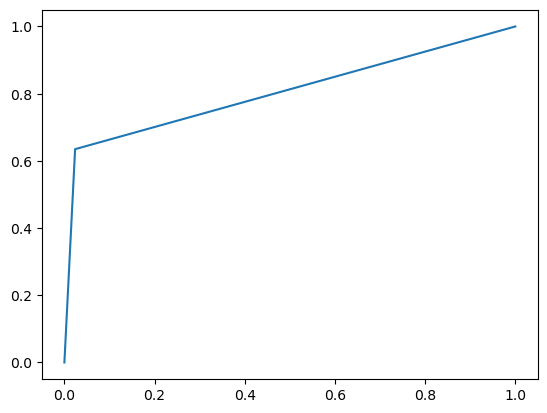

0.8055616965423507

In [121]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.show()
auc(fpr,tpr)

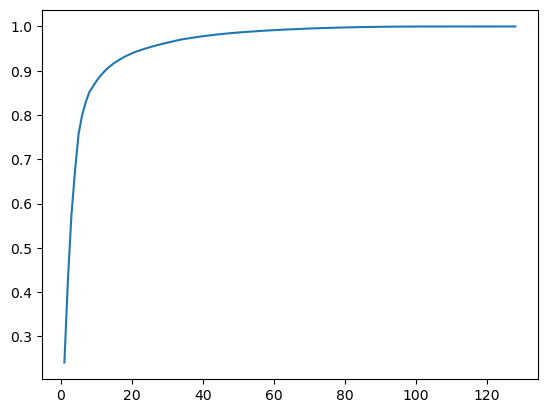

In [123]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
X_train_transformed=pca.fit_transform(X_train)
cum_sum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,X_train.shape[1]+1),cum_sum)
plt.show()


In [135]:
pca2=PCA(n_components=50,random_state=42)
X_train_transformed=pca2.fit_transform(X_train)
X_test_transformed=pca2.transform(X_test)

and score is: 0.863904761904762


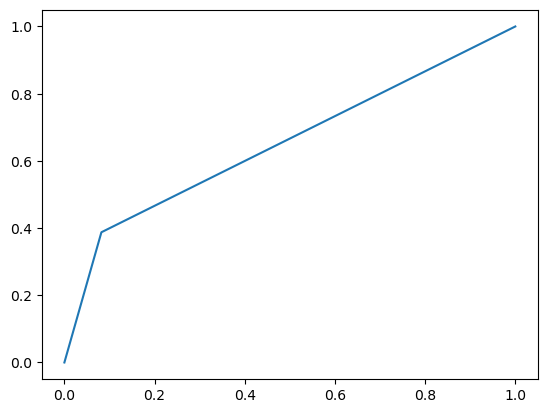

In [136]:
rf2=DecisionTreeClassifier(random_state=42)
rf2.fit(X_train_transformed,y_train)

y_pred=rf2.predict(X_test_transformed)
score=accuracy_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,y_pred)

print('and score is:',score)
plt.plot(fpr,tpr)
plt.show()

In [139]:
w=np.array([3,1,5,7,4])
x=np.array([1,1,0,1,0])
w@x.T

11